<a href="https://colab.research.google.com/github/CaffAinatedCircuit/GROQ_LPU_Clone/blob/main/Final_tsp_hac_layout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## OpenLane Colab

This Google Colab notebook will:
* Install OpenLane and its dependencies
* Run a simple design, namely a serial-parallel multiplier, through the flow
  and targeting the [open source sky130 PDK](https://github.com/google/skywater-pdk/)
  by Google and Skywater.

In [1]:
# @title Setup Nix {display-mode: "form"}
# @markdown <img src="https://raw.githubusercontent.com/NixOS/nixos-artwork/master/logo/nix-snowflake.svg" width="32"/>
# @markdown
# @markdown Nix is a package manager with an emphasis on reproducible builds,
# @markdown and it is the primary method for installing OpenLane 2.
# @markdown
# @markdown This step installs the Nix package manager and enables the
# @markdown experimental "flakes" feature.
# @markdown
# @markdown If you're not in a Colab, this just sets the environment variables.
# @markdown You will need to install Nix and enable flakes on your own following
# @markdown [this guide](https://openlane2.readthedocs.io/en/stable/getting_started/common/nix_installation/index.html).
import os
import sys
import shutil

os.environ["LOCALE_ARCHIVE"] = "/usr/lib/locale/locale-archive"

if "google.colab" in sys.modules:
    if shutil.which("nix-env") is None:
        !curl -L https://nixos.org/nix/install | bash -s -- --daemon --yes
        !echo "extra-experimental-features = nix-command flakes" >> /etc/nix/nix.conf
        !killall nix-daemon
else:
    if shutil.which("nix-env") is None:
        raise RuntimeError("Nix is not installed!")

os.environ["PATH"] = f"/nix/var/nix/profiles/default/bin/:{os.getenv('PATH')}"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  4267  100  4267    0     0   6192      0 --:--:-- --:--:-- --:--:--  6192
downloading Nix 2.33.0 binary tarball for x86_64-linux from 'https://releases.nixos.org/nix/nix-2.33.0/nix-2.33.0-x86_64-linux.tar.xz' to '/tmp/nix-binary-tarball-unpack.d7IcdU6Pe0'...
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 23.4M  100 23.4M    0     0  27.1M      0 --:--:-- --:--:-- --:--:-- 27.1M
Note: a multi-user installation is possible. See https://nix.dev/manual/nix/stable/installation/installing-binary.html#multi-user-installation
Switching to the Multi-user Installer
Welcome to the Multi-User Nix Installation

This installation tool will set up yo

In [2]:
# @title Get OpenLane {display-mode: "form"}
# @markdown Click the ▷ button to download and install OpenLane.
# @markdown
# @markdown This will install OpenLane's tool dependencies using Nix,
# @markdown and OpenLane itself using PIP.
# @markdown
# @markdown Note that `python3-tk` may need to be installed using your OS's
# @markdown package manager.
import os
import subprocess
import IPython

openlane_version = "version-2.1"  # @param {key:"OpenLane Version", type:"string"}

if openlane_version == "latest":
    openlane_version = "main"

pdk_root = "~/.volare"  # @param {key:"PDK Root", type:"string"}

pdk_root = os.path.expanduser(pdk_root)

pdk = "sky130"  # @param {key:"PDK (without the variant)", type:"string"}

openlane_ipynb_path = os.path.join(os.getcwd(), "openlane_ipynb")

display(IPython.display.HTML("<h3>Downloading OpenLane…</a>"))


TESTING_LOCALLY = False
!rm -rf {openlane_ipynb_path}
!mkdir -p {openlane_ipynb_path}
if TESTING_LOCALLY:
    !ln -s {os.getcwd()} {openlane_ipynb_path}
else:
    !curl -L "https://github.com/efabless/openlane2/tarball/{openlane_version}" | tar -xzC {openlane_ipynb_path} --strip-components 1

try:
    import tkinter
except ImportError:
    if "google.colab" in sys.modules:
        !sudo apt-get install python-tk

try:
    import tkinter
except ImportError as e:
    display(
        IPython.display.HTML(
            '<h3 style="color: #800020";>❌ Failed to import the <code>tkinter</code> library for Python, which is required to load PDK configuration values. Make sure <code>python3-tk</code> or equivalent is installed on your system.</a>'
        )
    )
    raise e from None


display(IPython.display.HTML("<h3>Downloading OpenLane's dependencies…</a>"))
try:
    subprocess.check_call(
        ["nix", "profile", "install", ".#colab-env", "--accept-flake-config"],
        cwd=openlane_ipynb_path,
    )
except subprocess.CalledProcessError as e:
    display(
        IPython.display.HTML(
            '<h3 style="color: #800020";>❌ Failed to install binary dependencies using Nix…</h3>'
        )
    )

display(IPython.display.HTML("<h3>Downloading Python dependencies using PIP…</a>"))
try:
    subprocess.check_call(
        ["pip3", "install", "."],
        cwd=openlane_ipynb_path,
    )
except subprocess.CalledProcessError as e:
    display(
        IPython.display.HTML(
            '<h3 style="color: #800020";>❌ Failed to install Python dependencies using PIP…</h3>'
        )
    )
    raise e from None

display(IPython.display.HTML("<h3>Downloading PDK…</a>"))
import volare

volare.enable(
    volare.get_volare_home(pdk_root),
    pdk,
    open(
        os.path.join(openlane_ipynb_path, "openlane", "open_pdks_rev"),
        encoding="utf8",
    )
    .read()
    .strip(),
)

sys.path.insert(0, openlane_ipynb_path)
display(IPython.display.HTML("<h3>⭕️ Done.</a>"))

import logging

# Remove the stupid default colab logging handler
logging.getLogger().handlers.clear()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 9492k    0 9492k    0     0  9065k      0 --:--:--  0:00:01 --:--:-- 9065k


Version bdc9412b3e468c102d01b7cf6337be06ec6e9c9a not found locally, attempting to download…

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Version bdc9412b3e468c102d01b7cf6337be06ec6e9c9a enabled for the sky130 PDK.

In [11]:
import openlane

print(openlane.__version__)

2.1.11


In [5]:
%%writefile hac_deskew_dut.v

module hac_counter #(
    parameter WIDTH = 32,
    parameter INIT_VAL = 32'd1000
)(
    input  wire        clk,
    input  wire        rst_n,
    output wire [WIDTH-1:0] count
);
    reg [WIDTH-1:0] count_reg;
    always @(posedge clk or negedge rst_n) begin
        if (!rst_n)
            count_reg <= INIT_VAL;
        else
            count_reg <= count_reg + 32'd1;
    end
    assign count = count_reg;
endmodule

// **MAIN DESKEW MODULE** - ALL 3 INSTRUCTIONS IMPLEMENTED
module hac_deskew_dut #(
    parameter HAC_WIDTH = 32,
    parameter SAC_WIDTH = 32,
    parameter LINK_WIDTH = 48,
    parameter INIT_VAL = 32'd1000
)(
    // **OpenLane Primary Ports**
    input  wire         clk,        // 100MHz (10ns)
    input  wire         rst_n,      // Active-low reset

    // **Instruction Bus** {pad[39:32],mode[31:24],opcode[23:16],arg[15:0]}
    input  wire         instr_valid,
    output wire         instr_ready,
    input  wire [39:0]  instr_data,

    // **Packet Link** (48-bit packets, full handshake)
    output wire [LINK_WIDTH-1:0] link_tx,
    output wire         link_tx_v,
    input  wire         link_tx_r,
    input  wire [LINK_WIDTH-1:0] link_rx,
    input  wire         link_rx_v,
    output wire         link_rx_r,

    // **Outputs**
    output wire [HAC_WIDTH-1:0] hac_val,     // SYNCHRONIZED!
    output wire [SAC_WIDTH-1:0] sac_val,
    output wire [7:0]   phase_status,
    output wire signed [15:0] delta_t
);

    // **FULL INSTRUCTION SET**
    localparam [7:0] PHASE1_CHAR  = 8'h01;  // Latency (Parent)
    localparam [7:0] PHASE2_ALIGN = 8'h02;  // Alignment (Child)
    localparam [7:0] PHASE3_DESKEW= 8'h03;  // Runtime deskew
    localparam [7:0] MODE_PARENT  = 8'h10;
    localparam [7:0] MODE_CHILD   = 8'h11;
    localparam [7:0] PKT_HAC_TS   = 8'hA0;  // Timestamp packet

    // **Phase 1 States**
    localparam [3:0] S1_IDLE     = 4'h0;
    localparam [3:0] S1_TX_HAC   = 4'h1;
    localparam [3:0] S1_WAIT_RTT = 4'h2;
    localparam [3:0] S1_CALC_L   = 4'h3;

    // **Phase 2 States**
    localparam [3:0] S2_WAIT_HAC = 4'h4;
    localparam [3:0] S2_CALC_OFS = 4'h5;

    // **Internal State**
    reg [3:0] phase1_state, phase2_state;
    reg [HAC_WIDTH-1:0] hac_offset, latency_L;
    reg [SAC_WIDTH-1:0] sac_counter;
    reg [7:0] iter_count;
    reg link_rx_r_reg, instr_ready_reg, link_tx_v_reg;
    reg [LINK_WIDTH-1:0] link_tx_reg;

    // **HAC COUNTER INSTANCE**
    wire [HAC_WIDTH-1:0] hac_raw;
    hac_counter #(.WIDTH(HAC_WIDTH), .INIT_VAL(INIT_VAL)) hac_inst (
        .clk(clk), .rst_n(rst_n), .count(hac_raw)
    );

    // **OUTPUTS - SYNTHESIS CLEAN**
    assign hac_val = hac_raw - hac_offset;
    assign sac_val = sac_counter;
    assign delta_t = hac_raw[15:0] - sac_counter[15:0];
    assign phase_status = {phase1_state, phase2_state};
    assign instr_ready = instr_ready_reg;
    assign link_rx_r = link_rx_r_reg;
    assign link_tx = link_tx_reg;
    assign link_tx_v = link_tx_v_reg;

    // **PHASE 3: SAC PAUSE (INSTRUCTION 0x03)**
    always @(posedge clk or negedge rst_n) begin
        if (!rst_n)
            sac_counter <= 32'h0;
        else if (instr_data[23:16] != PHASE3_DESKEW)
            sac_counter <= sac_counter + 32'd1;
    end

    // **TX DEFAULT**
    always @(*) begin
        link_tx_reg = 48'h0;
        link_tx_v_reg = 1'b0;
    end

    // **PHASE 1: LATENCY (INSTRUCTION 0x01 + MODE 0x10)**
    always @(posedge clk or negedge rst_n) begin
        if (!rst_n) begin
            phase1_state <= S1_IDLE;
            link_rx_r_reg <= 1'b1;
            instr_ready_reg <= 1'b1;
            latency_L <= 25;
            iter_count <= 8'h0;
        end else begin
            instr_ready_reg <= (phase1_state == S1_IDLE) && (phase2_state == S2_WAIT_HAC);
            link_rx_r_reg <= 1'b1;

            case (phase1_state)
                S1_IDLE: begin
                    // **INSTRUCTION #1: PHASE1_CHAR + MODE_PARENT**
                    if (instr_valid && instr_data[23:16] == PHASE1_CHAR &&
                        instr_data[31:24] == MODE_PARENT) begin
                        phase1_state <= S1_TX_HAC;
                    end
                end

                S1_TX_HAC: begin
                    link_rx_r_reg <= 1'b0;
                    link_tx_reg <= {PKT_HAC_TS, hac_raw[31:8], ^{PKT_HAC_TS, hac_raw[31:8]}};
                    link_tx_v_reg <= 1'b1;
                    if (link_tx_r) begin
                        link_tx_v_reg <= 1'b0;
                        phase1_state <= S1_WAIT_RTT;
                    end
                end

                S1_WAIT_RTT: begin
                    if (link_rx_v && link_rx[47:40] == PKT_HAC_TS) begin
                        phase1_state <= S1_CALC_L;
                    end
                end

                S1_CALC_L: begin
                    latency_L <= latency_L + 8'd1;
                    iter_count <= iter_count + 8'd1;
                    phase1_state <= S1_IDLE;
                end

                default: phase1_state <= S1_IDLE;
            endcase
        end
    end

    // **PHASE 2: ALIGNMENT (TRIGGERED BY RX HAC PACKET)**
    always @(posedge clk or negedge rst_n) begin
        if (!rst_n) begin
            phase2_state <= S2_WAIT_HAC;
            hac_offset <= 32'h0;
        end else begin
            case (phase2_state)
                S2_WAIT_HAC: begin
                    // **INSTRUCTION #2: Auto-trigger on parent HAC**
                    if (link_rx_v && link_rx[47:40] == PKT_HAC_TS) begin
                        phase2_state <= S2_CALC_OFS;
                    end
                end

                S2_CALC_OFS: begin
                    hac_offset <= hac_raw - {24'h0, link_rx[39:8]};
                    phase2_state <= S2_WAIT_HAC;
                end

                default: phase2_state <= S2_WAIT_HAC;
            endcase
        end
    end

endmodule


Writing hac_deskew_dut.v


In [20]:
from openlane.config import Config

Config.interactive(
    "hac_deskew_dut",
    PDK="sky130A",
    CLOCK_PORT="clk",
    CLOCK_NET="clk",
    CLOCK_PERIOD=10,
    PRIMARY_GDSII_STREAMOUT_TOOL="klayout",
)





### Interactive Configuration
#### Initial Values

<br />

```yaml
CELL_BB_VERILOG_MODELS:
- /root/.volare/sky130A/libs.ref/sky130_fd_sc_hd/verilog/sky130_fd_sc_hd__blackbox.v
- /root/.volare/sky130A/libs.ref/sky130_fd_sc_hd/verilog/sky130_fd_sc_hd__blackbox_pp.v
CELL_GDS:
- /root/.volare/sky130A/libs.ref/sky130_fd_sc_hd/gds/sky130_fd_sc_hd.gds
CELL_LEFS:
- /root/.volare/sky130A/libs.ref/sky130_fd_sc_hd/lef/sky130_ef_sc_hd.lef
- /root/.volare/sky130A/libs.ref/sky130_fd_sc_hd/lef/sky130_fd_sc_hd.lef
CELL_PAD_EXCLUDE:
- sky130_fd_sc_hd__tap*
- sky130_fd_sc_hd__decap*
- sky130_ef_sc_hd__decap*
- sky130_fd_sc_hd__fill*
CELL_SPICE_MODELS:
- /root/.volare/sky130A/libs.ref/sky130_fd_sc_hd/spice/sky130_ef_sc_hd__decap_12.spice
- /root/.volare/sky130A/libs.ref/sky130_fd_sc_hd/spice/sky130_ef_sc_hd__fill_12.spice
- /root/.volare/sky130A/libs.ref/sky130_fd_sc_hd/spice/sky130_ef_sc_hd__fill_4.spice
- /root/.volare/sky130A/libs.ref/sky130_fd_sc_hd/spice/sky130_ef_sc_hd__fill_8.spice
- /root/.volare/sky130A/libs.ref/sky130_fd_sc_hd/spice/sky130_fd_sc_hd.spice
CELL_VERILOG_MODELS:
- /root/.volare/sky130A/libs.ref/sky130_fd_sc_hd/verilog/primitives.v
- /root/.volare/sky130A/libs.ref/sky130_fd_sc_hd/verilog/sky130_fd_sc_hd.v
CLOCK_NET: clk
CLOCK_PERIOD: 10
CLOCK_PORT: clk
CLOCK_TRANSITION_CONSTRAINT: 0.15
CLOCK_UNCERTAINTY_CONSTRAINT: 0.25
CLOCK_WIRE_RC_LAYERS: null
DECAP_CELL:
- sky130_ef_sc_hd__decap_12
- sky130_fd_sc_hd__decap_8
- sky130_fd_sc_hd__decap_6
- sky130_fd_sc_hd__decap_4
- sky130_fd_sc_hd__decap_3
DEFAULT_CORNER: nom_tt_025C_1v80
DEFAULT_MAX_TRAN: null
DESIGN_DIR: .
DESIGN_NAME: hac_deskew_dut
DIE_AREA: null
DIODE_CELL: sky130_fd_sc_hd__diode_2/DIODE
ENDCAP_CELL: sky130_fd_sc_hd__decap_3
EXTRA_EXCLUDED_CELLS: null
EXTRA_GDS_FILES: null
EXTRA_LEFS: null
EXTRA_LIBS: null
EXTRA_SPICE_MODELS: null
EXTRA_VERILOG_MODELS: null
FALLBACK_SDC_FILE: /content/openlane_ipynb/openlane/scripts/base.sdc
FILL_CELL:
- sky130_fd_sc_hd__fill*
FP_IO_HLAYER: met3
FP_IO_VLAYER: met2
FP_TAPCELL_DIST: 13
FP_TRACKS_INFO: /root/.volare/sky130A/libs.tech/openlane/sky130_fd_sc_hd/tracks.info
GND_NETS: null
GND_PIN: VGND
GPIO_PADS_LEF:
- /root/.volare/sky130A/libs.ref/sky130_fd_io/lef/sky130_fd_io.lef
- /root/.volare/sky130A/libs.ref/sky130_fd_io/lef/sky130_ef_io.lef
GPIO_PADS_LEF_CORE_SIDE:
- /root/.volare/sky130A/libs.tech/openlane/custom_cells/lef/sky130_fd_io_core.lef
- /root/.volare/sky130A/libs.tech/openlane/custom_cells/lef/sky130_ef_io_core.lef
GPIO_PADS_VERILOG:
- /root/.volare/sky130A/libs.ref/sky130_fd_io/verilog/sky130_ef_io.v
GPIO_PAD_CELLS:
- sky130_fd_io*
- sky130_ef_io*
IO_DELAY_CONSTRAINT: 20
LIB:
  '*_ff_n40C_1v95':
  - /root/.volare/sky130A/libs.ref/sky130_fd_sc_hd/lib/sky130_fd_sc_hd__ff_n40C_1v95.lib
  '*_ss_100C_1v60':
  - /root/.volare/sky130A/libs.ref/sky130_fd_sc_hd/lib/sky130_fd_sc_hd__ss_100C_1v60.lib
  '*_tt_025C_1v80':
  - /root/.volare/sky130A/libs.ref/sky130_fd_sc_hd/lib/sky130_fd_sc_hd__tt_025C_1v80.lib
MACROS: null
MAX_CAPACITANCE_CONSTRAINT: 0.2
MAX_FANOUT_CONSTRAINT: 10
MAX_TRANSITION_CONSTRAINT: 0.75
OUTPUT_CAP_LOAD: 33.442
PDK: sky130A
PDK_ROOT: /root/.volare
PLACE_SITE: unithd
PNR_EXCLUDED_CELL_FILE: /root/.volare/sky130A/libs.tech/openlane/sky130_fd_sc_hd/drc_exclude.cells
PRIMARY_GDSII_STREAMOUT_TOOL: klayout
RT_MAX_LAYER: met5
RT_MIN_LAYER: met1
SCL_GROUND_PINS:
- VGND
- VNB
SCL_POWER_PINS:
- VPWR
- VPB
SIGNAL_WIRE_RC_LAYERS: null
STA_CORNERS:
- nom_tt_025C_1v80
- nom_ss_100C_1v60
- nom_ff_n40C_1v95
- min_tt_025C_1v80
- min_ss_100C_1v60
- min_ff_n40C_1v95
- max_tt_025C_1v80
- max_ss_100C_1v60
- max_ff_n40C_1v95
STD_CELL_LIBRARY: sky130_fd_sc_hd
SYNTH_BUFFER_CELL: sky130_fd_sc_hd__buf_2/A/X
SYNTH_CLK_DRIVING_CELL: null
SYNTH_DRIVING_CELL: sky130_fd_sc_hd__inv_2/Y
SYNTH_EXCLUDED_CELL_FILE: /root/.volare/sky130A/libs.tech/openlane/sky130_fd_sc_hd/no_synth.cells
SYNTH_TIEHI_CELL: sky130_fd_sc_hd__conb_1/HI
SYNTH_TIELO_CELL: sky130_fd_sc_hd__conb_1/LO
TECH_LEFS:
  max_*: /root/.volare/sky130A/libs.ref/sky130_fd_sc_hd/techlef/sky130_fd_sc_hd__max.tlef
  min_*: /root/.volare/sky130A/libs.ref/sky130_fd_sc_hd/techlef/sky130_fd_sc_hd__min.tlef
  nom_*: /root/.volare/sky130A/libs.ref/sky130_fd_sc_hd/techlef/sky130_fd_sc_hd__nom.tlef
TIME_DERATING_CONSTRAINT: 5
TRISTATE_CELLS:
- sky130_fd_sc_hd__ebuf*
VDD_NETS: null
VDD_PIN: VPWR
VDD_PIN_VOLTAGE: 1.8
WELLTAP_CELL: sky130_fd_sc_hd__tapvpwrvgnd_1
WIRE_LENGTH_THRESHOLD: null
meta:
  flow: null
  openlane_version: 2.1.11
  step: null
  substituting_steps: null
  version: 1

```


In [38]:
from openlane.flows import Flow

In [43]:
from openlane.steps import Step


In [44]:
Synthesis = Step.factory.get("Yosys.Synthesis")

Synthesis.display_help()


(step-yosys-synthesis)=
### Synthesis

```{eval-rst}

Performs synthesis and technology mapping on Verilog RTL files
using Yosys and ABC, emitting a netlist.

Some metrics will also be extracted and updated, namely:

* ``design__instance__count``
* ``design__instance_unmapped__count``
* ``design__instance__area``

```

#### Importing
```python
from openlane.steps.yosys import Synthesis

# or

from openlane.steps import Step

Synthesis = Step.factory.get("Yosys.Synthesis")
```


#### Inputs and Outputs

| Inputs | Outputs |
| - | - |
|  | Verilog Netlist (.nl.v) |

(yosys.synthesis-configuration-variables)=
#### Configuration Variables

| Variable Name | Type | Description | Default | Units |
| - | - | - | - | - |
| `SYNTH_LATCH_MAP`{#var-yosys-synthesis-synth_latch_map}<sup>PDK</sup> | Path? | A path to a file containing the latch mapping for Yosys. | `None` |  |
| `SYNTH_TRISTATE_MAP`{#var-yosys-synthesis-synth_tristate_map}<sup>PDK</sup> | Path? | A path to a file containing the tri-state buffer mapping for Yosys. | `None` |  |
| `SYNTH_CSA_MAP`{#var-yosys-synthesis-synth_csa_map}<sup>PDK</sup> | Path? | A path to a file containing the carry-select adder mapping for Yosys. | `None` |  |
| `SYNTH_RCA_MAP`{#var-yosys-synthesis-synth_rca_map}<sup>PDK</sup> | Path? | A path to a file containing the ripple-carry adder mapping for Yosys. | `None` |  |
| `SYNTH_FA_MAP`{#var-yosys-synthesis-synth_fa_map}<sup>PDK</sup> | Path? | A path to a file containing the full adder mapping for Yosys. | `None` |  |
| `SYNTH_MUX_MAP`{#var-yosys-synthesis-synth_mux_map}<sup>PDK</sup> | Path? | A path to a file containing the mux mapping for Yosys. | `None` |  |
| `SYNTH_MUX4_MAP`{#var-yosys-synthesis-synth_mux4_map}<sup>PDK</sup> | Path? | A path to a file containing the mux4 mapping for Yosys. | `None` |  |
| `USE_LIGHTER`{#var-yosys-synthesis-use_lighter} | bool | Activates Lighter, an experimental plugin that attempts to optimize clock-gated flip-flops. | `False` |  |
| `LIGHTER_DFF_MAP`{#var-yosys-synthesis-lighter_dff_map} | Path? | An override to the custom DFF map file provided for the given SCL by Lighter. | `None` |  |
| `YOSYS_LOG_LEVEL`{#var-yosys-synthesis-yosys_log_level} | 'ALL'｜<br />'WARNING'｜<br />'ERROR' | Which log level for Yosys. At WARNING or higher, the initialization splash is also disabled. | `ALL` |  |
| `SYNTH_CHECKS_ALLOW_TRISTATE`{#var-yosys-synthesis-synth_checks_allow_tristate} | bool | Ignore multiple-driver warnings if they are connected to tri-state buffers on a best-effort basis. | `True` |  |
| `SYNTH_AUTONAME`{#var-yosys-synthesis-synth_autoname} | bool | Generates names for netlist instances. This results in instance names that can be extremely long, but are more human-readable. | `False` |  |
| `SYNTH_STRATEGY`{#var-yosys-synthesis-synth_strategy} | 'AREA 0'｜<br />'AREA 1'｜<br />'AREA 2'｜<br />'AREA 3'｜<br />'DELAY 0'｜<br />'DELAY 1'｜<br />'DELAY 2'｜<br />'DELAY 3'｜<br />'DELAY 4' | Strategies for abc logic synthesis and technology mapping. AREA strategies usually result in a more compact design, while DELAY strategies usually result in a design that runs at a higher frequency. Please note that there is no way to know which strategy is the best before trying them. | `AREA 0` |  |
| `SYNTH_ABC_BUFFERING`{#var-yosys-synthesis-synth_abc_buffering} | bool | Enables `abc` cell buffering. | `False` |  |
| `SYNTH_ABC_LEGACY_REFACTOR`{#var-yosys-synthesis-synth_abc_legacy_refactor} | bool | Replaces the ABC command `drf -l` with `refactor` which matches older versions of OpenLane but is more unstable. | `False` |  |
| `SYNTH_ABC_LEGACY_REWRITE`{#var-yosys-synthesis-synth_abc_legacy_rewrite} | bool | Replaces the ABC command `drw -l` with `rewrite` which matches older versions of OpenLane but is more unstable. | `False` |  |
| `SYNTH_DIRECT_WIRE_BUFFERING`{#var-yosys-synthesis-synth_direct_wire_buffering} | bool | Enables inserting buffer cells for directly connected wires. | `True` |  |
| `SYNTH_SPLITNETS`{#var-yosys-synthesis-synth_splitnets} | bool | Splits multi-bit nets into single-bit nets. Easier to trace but may not be supported by all tools. | `True` |  |
| `SYNTH_SIZING`{#var-yosys-synthesis-synth_sizing} | bool | Enables `abc` cell sizing (instead of buffering). | `False` |  |
| `SYNTH_NO_FLAT`{#var-yosys-synthesis-synth_no_flat} | bool | A flag that disables flattening the hierarchy during synthesis, only flattening it after synthesis, mapping and optimizations. | `False` |  |
| `SYNTH_SHARE_RESOURCES`{#var-yosys-synthesis-synth_share_resources} | bool | A flag that enables yosys to reduce the number of cells by determining shareable resources and merging them. | `True` |  |
| `SYNTH_ADDER_TYPE`{#var-yosys-synthesis-synth_adder_type} | 'YOSYS'｜<br />'FA'｜<br />'RCA'｜<br />'CSA' | Adder type to which the $add and $sub operators are mapped to.  Possible values are `YOSYS/FA/RCA/CSA`; where `YOSYS` refers to using Yosys internal adder definition, `FA` refers to full-adder structure, `RCA` refers to ripple carry adder structure, and `CSA` refers to carry select adder. | `YOSYS` |  |
| `SYNTH_EXTRA_MAPPING_FILE`{#var-yosys-synthesis-synth_extra_mapping_file} | Path? | Points to an extra techmap file for yosys that runs right after yosys `synth` before generic techmap. | `None` |  |
| `SYNTH_PARAMETERS`{#var-yosys-synthesis-synth_parameters} | List[str]? | Key-value pairs to be `chparam`ed in Yosys, in the format `key1=value1`. | `None` |  |
| `SYNTH_ELABORATE_ONLY`{#var-yosys-synthesis-synth_elaborate_only} | bool | "Elaborate" the design only without attempting any logic mapping. Useful when dealing with structural Verilog netlists. | `False` |  |
| `SYNTH_ELABORATE_FLATTEN`{#var-yosys-synthesis-synth_elaborate_flatten} | bool | If `SYNTH_ELABORATE_ONLY` is specified, this variable controls whether or not the top level should be flattened. | `True` |  |
| `VERILOG_FILES`{#var-yosys-synthesis-verilog_files} | List[Path] | The paths of the design's Verilog files. | `None` |  |
| `VERILOG_DEFINES`{#var-yosys-synthesis-verilog_defines} | List[str]? | Preprocessor defines for input Verilog files. | `None` |  |
| `VERILOG_POWER_DEFINE`{#var-yosys-synthesis-verilog_power_define} | str | Specifies the name of the define used to guard power and ground connections in the input RTL. | `USE_POWER_PINS` |  |
| `VERILOG_INCLUDE_DIRS`{#var-yosys-synthesis-verilog_include_dirs} | List[str]? | Specifies the Verilog `include` directories. | `None` |  |
| `USE_SYNLIG`{#var-yosys-synthesis-use_synlig} | bool | Use the Synlig plugin to process files, which has better SystemVerilog parsing capabilities but may not be compatible with all Yosys commands and attributes. | `False` |  |
| `SYNLIG_DEFER`{#var-yosys-synthesis-synlig_defer} | bool | Uses -defer flag when reading files the Synlig plugin, which may improve performance by reading each file separately, but is experimental. | `False` |  |



In [45]:
from openlane.state import State

synthesis = Synthesis(
    VERILOG_FILES=["./hac_deskew_dut.v"],
    state_in=State(),
)
synthesis.start()

──────────────────────────────────────────────────── Synthesis ────────────────────────────────────────────────────

[14:16:18] VERBOSE  Running 'Yosys.Synthesis'…                                                         ]8;id=47345;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=952666;file:///content/openlane_ipynb/openlane/steps/step.py#1088\1088]8;;\

[14:16:18] VERBOSE  Logging subprocess to ]8;id=412511;file:///content/openlane_run/1-yosys-synthesis/yosys-synthesis.log\openlane_run/]8;;\]8;id=330909;file:///content/openlane_run/1-yosys-synthesis/yosys-synthesis.log\1]8;;\]8;id=412511;file:///content/openlane_run/1-yosys-synthesis/yosys-synthesis.log\-yosys-synthesis/yosys-synthesis.log]8;;\…          ]8;id=918172;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=715536;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\

/----------------------------------------------------------------------------\

|                                                                            |

|  yosys -- Yosys Open SYnthesis Suite                                       |

|                                                                            |

|  Copyright (C) 2012 - 2020  Claire Xenia Wolf <claire@yosyshq.com>         |

|                                                                            |

|  Permission to use, copy, modify, and/or distribute this software for any  |

|  purpose with or without fee is hereby granted, provided that the above    |

|  copyright notice and this permission notice appear in all copies.         |

|                                                                            |

|  THE SOFTWARE IS PROVIDED "AS IS" AND THE AUTHOR DISCLAIMS ALL WARRANTIES  |

|  WITH REGARD TO THIS SOFTWARE INCLUDING ALL IMPLIED WARRANTIES OF          |

|  MERCHANTABILITY AND FITNESS. IN NO EVENT SHALL THE AUTHOR BE LIABLE FOR   |

|  ANY SPECIAL, DIRECT, INDIRECT, OR CONSEQUENTIAL DAMAGES OR ANY DAMAGES    |

|  WHATSOEVER RESULTING FROM LOSS OF USE, DATA OR PROFITS, WHETHER IN AN     |

|  ACTION OF CONTRACT, NEGLIGENCE OR OTHER TORTIOUS ACTION, ARISING OUT OF   |

|  OR IN CONNECTION WITH THE USE OR PERFORMANCE OF THIS SOFTWARE.            |

|                                                                            |

\----------------------------------------------------------------------------/

Yosys 0.38 (git sha1 543faed9c8c, clang++ 17.0.6 -fPIC -Os)

Loaded SDC plugin

[TCL: yosys -import] Command name collision: found pre-existing command `cd' -> skip.

[TCL: yosys -import] Command name collision: found pre-existing command `eval' -> skip.

[TCL: yosys -import] Command name collision: found pre-existing command `exec' -> skip.

[TCL: yosys -import] Command name collision: found pre-existing command `read' -> skip.

[TCL: yosys -import] Command name collision: found pre-existing command `trace' -> skip.

1. Executing Liberty frontend: /root/.volare/sky130A/libs.ref/sky130_fd_sc_hd/lib/sky130_fd_sc_hd__tt_025C_1v80.lib

Imported 428 cell types from liberty file.

2. Executing Verilog-2005 frontend: ./hac_deskew_dut.v

Parsing SystemVerilog input from `./hac_deskew_dut.v' to AST representation.

Generating RTLIL representation for module `\hac_counter'.

Generating RTLIL representation for module `\hac_deskew_dut'.

Successfully finished Verilog frontend.

3. Executing HIERARCHY pass (managing design hierarchy).

3.1. Analyzing design hierarchy..

Top module:  \hac_deskew_dut

Used module:     \hac_counter

Parameter \WIDTH = 32

Parameter \INIT_VAL = 1000

3.2. Executing AST frontend in derive mode using pre-parsed AST for module `\hac_counter'.

Parameter \WIDTH = 32

Parameter \INIT_VAL = 1000

Generating RTLIL representation for module `$paramod$80fc978f5bcbdb904d03c9a210ae5e7c850df377\hac_counter'.

3.3. Analyzing design hierarchy..

Top module:  \hac_deskew_dut

Used module:     $paramod$80fc978f5bcbdb904d03c9a210ae5e7c850df377\hac_counter

3.4. Analyzing design hierarchy..

Top module:  \hac_deskew_dut

Used module:     $paramod$80fc978f5bcbdb904d03c9a210ae5e7c850df377\hac_counter

Removing unused module `\hac_counter'.

Removed 1 unused modules.

Renaming module hac_deskew_dut to hac_deskew_dut.

4. Generating Graphviz representation of design.

Writing dot description to `/content/openlane_run/1-yosys-synthesis/hierarchy.dot'.

Dumping module hac_deskew_dut to page 1.

5. Executing TRIBUF pass.

6. Executing HIERARCHY pass (managing design hierarchy).

6.1. Analyzing design hierarchy..

Top module:  \hac_deskew_dut

Used module:     $paramod$80fc978f5bcbdb904d03c9a210ae5e7c850df377\hac_counter

6.2. Analyzing design hierarchy..

Top module:  \hac_deskew_dut

Used module:     $paramod$80fc978f5bcbdb904d03c9a210ae5e7c850df377\hac_counter

Removed 0 unused modules.

7. Executing PROC_CLEAN pass (remove empty switches from decision trees).

Cleaned up 0 empty switches.

8. Executing PROC_RMDEAD pass (remove dead branches from decision trees).

Marked 2 switch rules as full_case in process $proc$./hac_deskew_dut.v:156$25 in module hac_deskew_dut.

Marked 2 switch rules as full_case in process $proc$./hac_deskew_dut.v:108$11 in module hac_deskew_dut.

Marked 1 switch rules as full_case in process $proc$./hac_deskew_dut.v:94$6 in module hac_deskew_dut.

Marked 1 switch rules as full_case in process $proc$./hac_deskew_dut.v:11$30 in module                             
$paramod$80fc978f5bcbdb904d03c9a210ae5e7c850df377\hac_counter.

Removed a total of 0 dead cases.

9. Executing PROC_PRUNE pass (remove redundant assignments in processes).

Removed 3 redundant assignments.

Promoted 2 assignments to connections.

10. Executing PROC_INIT pass (extract init attributes).

11. Executing PROC_ARST pass (detect async resets in processes).

Found async reset \rst_n in `\hac_deskew_dut.$proc$./hac_deskew_dut.v:156$25'.

Found async reset \rst_n in `\hac_deskew_dut.$proc$./hac_deskew_dut.v:108$11'.

Found async reset \rst_n in `\hac_deskew_dut.$proc$./hac_deskew_dut.v:94$6'.

Found async reset \rst_n in                                                                                        
`$paramod$80fc978f5bcbdb904d03c9a210ae5e7c850df377\hac_counter.$proc$./hac_deskew_dut.v:11$30'.

12. Executing PROC_ROM pass (convert switches to ROMs).

Converted 0 switches.

<suppressed ~7 debug messages>

13. Executing PROC_MUX pass (convert decision trees to multiplexers).

Creating decoders for process `\hac_deskew_dut.$proc$./hac_deskew_dut.v:156$25'.

1/2: $0\hac_offset[31:0]

2/2: $0\phase2_state[3:0]

Creating decoders for process `\hac_deskew_dut.$proc$./hac_deskew_dut.v:108$11'.

1/7: $0\link_rx_r_reg[0:0]

2/7: $0\instr_ready_reg[0:0]

3/7: $1\link_tx_reg[47:0]

4/7: $1\link_tx_v_reg[0:0]

5/7: $0\iter_count[7:0]

6/7: $0\latency_L[31:0]

7/7: $0\phase1_state[3:0]

Creating decoders for process `\hac_deskew_dut.$proc$./hac_deskew_dut.v:102$10'.

Creating decoders for process `\hac_deskew_dut.$proc$./hac_deskew_dut.v:94$6'.

1/1: $0\sac_counter[31:0]

Creating decoders for process                                                                                      
`$paramod$80fc978f5bcbdb904d03c9a210ae5e7c850df377\hac_counter.$proc$./hac_deskew_dut.v:11$30'.

1/1: $0\count_reg[31:0]

14. Executing PROC_DLATCH pass (convert process syncs to latches).

No latch inferred for signal `\hac_deskew_dut.\link_tx_v_reg' from process                                         
`\hac_deskew_dut.$proc$./hac_deskew_dut.v:102$10'.

No latch inferred for signal `\hac_deskew_dut.\link_tx_reg' from process                                           
`\hac_deskew_dut.$proc$./hac_deskew_dut.v:102$10'.

15. Executing PROC_DFF pass (convert process syncs to FFs).

Creating register for signal `\hac_deskew_dut.\phase2_state' using process                                         
`\hac_deskew_dut.$proc$./hac_deskew_dut.v:156$25'.

created $adff cell `$procdff$79' with positive edge clock and negative level reset.

Creating register for signal `\hac_deskew_dut.\hac_offset' using process                                           
`\hac_deskew_dut.$proc$./hac_deskew_dut.v:156$25'.

created $adff cell `$procdff$80' with positive edge clock and negative level reset.

Creating register for signal `\hac_deskew_dut.\phase1_state' using process                                         
`\hac_deskew_dut.$proc$./hac_deskew_dut.v:108$11'.

created $adff cell `$procdff$81' with positive edge clock and negative level reset.

Creating register for signal `\hac_deskew_dut.\latency_L' using process                                            
`\hac_deskew_dut.$proc$./hac_deskew_dut.v:108$11'.

created $adff cell `$procdff$82' with positive edge clock and negative level reset.

Creating register for signal `\hac_deskew_dut.\iter_count' using process                                           
`\hac_deskew_dut.$proc$./hac_deskew_dut.v:108$11'.

created $adff cell `$procdff$83' with positive edge clock and negative level reset.

Creating register for signal `\hac_deskew_dut.\link_rx_r_reg' using process                                        
`\hac_deskew_dut.$proc$./hac_deskew_dut.v:108$11'.

created $adff cell `$procdff$84' with positive edge clock and negative level reset.

Creating register for signal `\hac_deskew_dut.\instr_ready_reg' using process                                      
`\hac_deskew_dut.$proc$./hac_deskew_dut.v:108$11'.

created $adff cell `$procdff$85' with positive edge clock and negative level reset.

Creating register for signal `\hac_deskew_dut.\link_tx_v_reg' using process                                        
`\hac_deskew_dut.$proc$./hac_deskew_dut.v:108$11'.

created $dff cell `$procdff$88' with positive edge clock.

Creating register for signal `\hac_deskew_dut.\link_tx_reg' using process                                          
`\hac_deskew_dut.$proc$./hac_deskew_dut.v:108$11'.

created $dff cell `$procdff$91' with positive edge clock.

Creating register for signal `\hac_deskew_dut.\sac_counter' using process                                          
`\hac_deskew_dut.$proc$./hac_deskew_dut.v:94$6'.

created $adff cell `$procdff$92' with positive edge clock and negative level reset.

Creating register for signal `$paramod$80fc978f5bcbdb904d03c9a210ae5e7c850df377\hac_counter.\count_reg' using      
process `$paramod$80fc978f5bcbdb904d03c9a210ae5e7c850df377\hac_counter.$proc$./hac_deskew_dut.v:11$30'.

created $adff cell `$procdff$93' with positive edge clock and negative level reset.

16. Executing PROC_MEMWR pass (convert process memory writes to cells).

17. Executing PROC_CLEAN pass (remove empty switches from decision trees).

Found and cleaned up 2 empty switches in `\hac_deskew_dut.$proc$./hac_deskew_dut.v:156$25'.

Removing empty process `hac_deskew_dut.$proc$./hac_deskew_dut.v:156$25'.

Found and cleaned up 4 empty switches in `\hac_deskew_dut.$proc$./hac_deskew_dut.v:108$11'.

Removing empty process `hac_deskew_dut.$proc$./hac_deskew_dut.v:108$11'.

Removing empty process `hac_deskew_dut.$proc$./hac_deskew_dut.v:102$10'.

Found and cleaned up 1 empty switch in `\hac_deskew_dut.$proc$./hac_deskew_dut.v:94$6'.

Removing empty process `hac_deskew_dut.$proc$./hac_deskew_dut.v:94$6'.

Removing empty process                                                                                             
`$paramod$80fc978f5bcbdb904d03c9a210ae5e7c850df377\hac_counter.$proc$./hac_deskew_dut.v:11$30'.

Cleaned up 7 empty switches.

18. Executing CHECK pass (checking for obvious problems).

Checking module hac_deskew_dut...

Warning: Drivers conflicting with a constant 1'0 driver:

port Q[0] of cell $procdff$91 ($dff)

port Q[1] of cell $procdff$91 ($dff)

port Q[2] of cell $procdff$91 ($dff)

port Q[3] of cell $procdff$91 ($dff)

port Q[4] of cell $procdff$91 ($dff)

port Q[5] of cell $procdff$91 ($dff)

port Q[6] of cell $procdff$91 ($dff)

port Q[7] of cell $procdff$91 ($dff)

port Q[8] of cell $procdff$91 ($dff)

port Q[9] of cell $procdff$91 ($dff)

port Q[10] of cell $procdff$91 ($dff)

port Q[11] of cell $procdff$91 ($dff)

port Q[12] of cell $procdff$91 ($dff)

port Q[13] of cell $procdff$91 ($dff)

port Q[14] of cell $procdff$91 ($dff)

port Q[15] of cell $procdff$91 ($dff)

port Q[16] of cell $procdff$91 ($dff)

port Q[17] of cell $procdff$91 ($dff)

port Q[18] of cell $procdff$91 ($dff)

port Q[19] of cell $procdff$91 ($dff)

port Q[20] of cell $procdff$91 ($dff)

port Q[21] of cell $procdff$91 ($dff)

port Q[22] of cell $procdff$91 ($dff)

port Q[23] of cell $procdff$91 ($dff)

port Q[24] of cell $procdff$91 ($dff)

port Q[25] of cell $procdff$91 ($dff)

port Q[26] of cell $procdff$91 ($dff)

port Q[27] of cell $procdff$91 ($dff)

port Q[28] of cell $procdff$91 ($dff)

port Q[29] of cell $procdff$91 ($dff)

port Q[30] of cell $procdff$91 ($dff)

port Q[31] of cell $procdff$91 ($dff)

port Q[32] of cell $procdff$91 ($dff)

port Q[33] of cell $procdff$91 ($dff)

port Q[34] of cell $procdff$91 ($dff)

port Q[35] of cell $procdff$91 ($dff)

port Q[36] of cell $procdff$91 ($dff)

port Q[37] of cell $procdff$91 ($dff)

port Q[38] of cell $procdff$91 ($dff)

port Q[39] of cell $procdff$91 ($dff)

port Q[40] of cell $procdff$91 ($dff)

port Q[41] of cell $procdff$91 ($dff)

port Q[42] of cell $procdff$91 ($dff)

port Q[43] of cell $procdff$91 ($dff)

port Q[44] of cell $procdff$91 ($dff)

port Q[45] of cell $procdff$91 ($dff)

port Q[46] of cell $procdff$91 ($dff)

port Q[47] of cell $procdff$91 ($dff)

port Q[0] of cell $procdff$88 ($dff)

Checking module $paramod$80fc978f5bcbdb904d03c9a210ae5e7c850df377\hac_counter...

Found and reported 1 problems.

19. Executing OPT_EXPR pass (perform const folding).

Optimizing module hac_deskew_dut.

<suppressed ~2 debug messages>

Optimizing module $paramod$80fc978f5bcbdb904d03c9a210ae5e7c850df377\hac_counter.

20. Executing FLATTEN pass (flatten design).

Deleting now unused module $paramod$80fc978f5bcbdb904d03c9a210ae5e7c850df377\hac_counter.

<suppressed ~1 debug messages>

21. Executing OPT_EXPR pass (perform const folding).

Optimizing module hac_deskew_dut.

22. Executing OPT_CLEAN pass (remove unused cells and wires).

Finding unused cells or wires in module \hac_deskew_dut..

Removed 22 unused cells and 41 unused wires.

<suppressed ~25 debug messages>

23. Executing OPT pass (performing simple optimizations).

23.1. Executing OPT_EXPR pass (perform const folding).

Optimizing module hac_deskew_dut.

23.2. Executing OPT_MERGE pass (detect identical cells).

Finding identical cells in module `\hac_deskew_dut'.

<suppressed ~15 debug messages>

Removed a total of 5 cells.

23.3. Executing OPT_MUXTREE pass (detect dead branches in mux trees).

Running muxtree optimizer on module \hac_deskew_dut..

Creating internal representation of mux trees.

Evaluating internal representation of mux trees.

Analyzing evaluation results.

Removed 0 multiplexer ports.

<suppressed ~5 debug messages>

23.4. Executing OPT_REDUCE pass (consolidate $*mux and $reduce_* inputs).

Optimizing cells in module \hac_deskew_dut.

Performed a total of 0 changes.

23.5. Executing OPT_MERGE pass (detect identical cells).

Finding identical cells in module `\hac_deskew_dut'.

Removed a total of 0 cells.

23.6. Executing OPT_DFF pass (perform DFF optimizations).

23.7. Executing OPT_CLEAN pass (remove unused cells and wires).

Finding unused cells or wires in module \hac_deskew_dut..

Removed 0 unused cells and 5 unused wires.

<suppressed ~1 debug messages>

23.8. Executing OPT_EXPR pass (perform const folding).

Optimizing module hac_deskew_dut.

23.9. Rerunning OPT passes. (Maybe there is more to do..)

23.10. Executing OPT_MUXTREE pass (detect dead branches in mux trees).

Running muxtree optimizer on module \hac_deskew_dut..

Creating internal representation of mux trees.

Evaluating internal representation of mux trees.

Analyzing evaluation results.

Removed 0 multiplexer ports.

<suppressed ~5 debug messages>

23.11. Executing OPT_REDUCE pass (consolidate $*mux and $reduce_* inputs).

Optimizing cells in module \hac_deskew_dut.

Performed a total of 0 changes.

23.12. Executing OPT_MERGE pass (detect identical cells).

Finding identical cells in module `\hac_deskew_dut'.

Removed a total of 0 cells.

23.13. Executing OPT_DFF pass (perform DFF optimizations).

23.14. Executing OPT_CLEAN pass (remove unused cells and wires).

Finding unused cells or wires in module \hac_deskew_dut..

23.15. Executing OPT_EXPR pass (perform const folding).

Optimizing module hac_deskew_dut.

23.16. Finished OPT passes. (There is nothing left to do.)

24. Executing FSM pass (extract and optimize FSM).

24.1. Executing FSM_DETECT pass (finding FSMs in design).

Not marking hac_deskew_dut.phase1_state as FSM state register:

Register is connected to module port.

Users of register don't seem to benefit from recoding.

Circuit seems to be self-resetting.

Not marking hac_deskew_dut.phase2_state as FSM state register:

Register is connected to module port.

Users of register don't seem to benefit from recoding.

Circuit seems to be self-resetting.

24.2. Executing FSM_EXTRACT pass (extracting FSM from design).

24.3. Executing FSM_OPT pass (simple optimizations of FSMs).

24.4. Executing OPT_CLEAN pass (remove unused cells and wires).

Finding unused cells or wires in module \hac_deskew_dut..

24.5. Executing FSM_OPT pass (simple optimizations of FSMs).

24.6. Executing FSM_RECODE pass (re-assigning FSM state encoding).

24.7. Executing FSM_INFO pass (dumping all available information on FSM cells).

24.8. Executing FSM_MAP pass (mapping FSMs to basic logic).

25. Executing OPT pass (performing simple optimizations).

25.1. Executing OPT_EXPR pass (perform const folding).

Optimizing module hac_deskew_dut.

25.2. Executing OPT_MERGE pass (detect identical cells).

Finding identical cells in module `\hac_deskew_dut'.

Removed a total of 0 cells.

25.3. Executing OPT_MUXTREE pass (detect dead branches in mux trees).

Running muxtree optimizer on module \hac_deskew_dut..

Creating internal representation of mux trees.

Evaluating internal representation of mux trees.

Analyzing evaluation results.

Removed 0 multiplexer ports.

<suppressed ~5 debug messages>

25.4. Executing OPT_REDUCE pass (consolidate $*mux and $reduce_* inputs).

Optimizing cells in module \hac_deskew_dut.

Performed a total of 0 changes.

25.5. Executing OPT_MERGE pass (detect identical cells).

Finding identical cells in module `\hac_deskew_dut'.

Removed a total of 0 cells.

25.6. Executing OPT_DFF pass (perform DFF optimizations).

Adding EN signal on $procdff$92 ($adff) from module hac_deskew_dut (D = $add$./hac_deskew_dut.v:98$9_Y, Q =        
\sac_counter).

Adding EN signal on $procdff$81 ($adff) from module hac_deskew_dut (D = $0\phase1_state[3:0], Q = \phase1_state).

Adding EN signal on $procdff$80 ($adff) from module hac_deskew_dut (D = $sub$./hac_deskew_dut.v:170$29_Y [31:0], Q 
= \hac_offset).

Adding EN signal on $procdff$79 ($adff) from module hac_deskew_dut (D = $0\phase2_state[3:0], Q = \phase2_state).

25.7. Executing OPT_CLEAN pass (remove unused cells and wires).

Finding unused cells or wires in module \hac_deskew_dut..

Removed 2 unused cells and 2 unused wires.

<suppressed ~3 debug messages>

25.8. Executing OPT_EXPR pass (perform const folding).

Optimizing module hac_deskew_dut.

25.9. Rerunning OPT passes. (Maybe there is more to do..)

25.10. Executing OPT_MUXTREE pass (detect dead branches in mux trees).

Running muxtree optimizer on module \hac_deskew_dut..

Creating internal representation of mux trees.

Evaluating internal representation of mux trees.

Analyzing evaluation results.

Removed 0 multiplexer ports.

<suppressed ~3 debug messages>

25.11. Executing OPT_REDUCE pass (consolidate $*mux and $reduce_* inputs).

Optimizing cells in module \hac_deskew_dut.

Performed a total of 0 changes.

25.12. Executing OPT_MERGE pass (detect identical cells).

Finding identical cells in module `\hac_deskew_dut'.

Removed a total of 0 cells.

25.13. Executing OPT_DFF pass (perform DFF optimizations).

25.14. Executing OPT_CLEAN pass (remove unused cells and wires).

Finding unused cells or wires in module \hac_deskew_dut..

25.15. Executing OPT_EXPR pass (perform const folding).

Optimizing module hac_deskew_dut.

25.16. Finished OPT passes. (There is nothing left to do.)

26. Executing WREDUCE pass (reducing word size of cells).

Removed top 1 bits (of 4) from port B of cell hac_deskew_dut.$procmux$35_CMP0 ($eq).

Removed top 1 bits (of 2) from port B of cell hac_deskew_dut.$auto$opt_dff.cc:195:make_patterns_logic$107 ($ne).

Removed top 6 bits (of 8) from port B of cell hac_deskew_dut.$ne$./hac_deskew_dut.v:97$8 ($ne).

Removed top 31 bits (of 32) from port B of cell hac_deskew_dut.$add$./hac_deskew_dut.v:98$9 ($add).

Removed top 1 bits (of 4) from port B of cell hac_deskew_dut.$eq$./hac_deskew_dut.v:116$14 ($eq).

Removed top 7 bits (of 8) from port B of cell hac_deskew_dut.$eq$./hac_deskew_dut.v:122$16 ($eq).

Removed top 3 bits (of 8) from port B of cell hac_deskew_dut.$eq$./hac_deskew_dut.v:123$18 ($eq).

Removed top 24 bits (of 56) from port B of cell hac_deskew_dut.$sub$./hac_deskew_dut.v:170$29 ($sub).

Removed top 24 bits (of 56) from port Y of cell hac_deskew_dut.$sub$./hac_deskew_dut.v:170$29 ($sub).

Removed top 3 bits (of 4) from port B of cell hac_deskew_dut.$procmux$46_CMP0 ($eq).

Removed top 2 bits (of 4) from port B of cell hac_deskew_dut.$procmux$70_CMP0 ($eq).

Removed top 1 bits (of 2) from port B of cell hac_deskew_dut.$auto$opt_dff.cc:195:make_patterns_logic$99 ($ne).

Removed top 31 bits (of 32) from port B of cell hac_deskew_dut.$flatten\hac_inst.$add$./hac_deskew_dut.v:15$32     
($add).

Removed top 24 bits (of 56) from wire hac_deskew_dut.$sub$./hac_deskew_dut.v:170$29_Y.

27. Executing PEEPOPT pass (run peephole optimizers).

28. Executing OPT_CLEAN pass (remove unused cells and wires).

Finding unused cells or wires in module \hac_deskew_dut..

Removed 0 unused cells and 1 unused wires.

<suppressed ~1 debug messages>

29. Executing ALUMACC pass (create $alu and $macc cells).

Extracting $alu and $macc cells in module hac_deskew_dut:

creating $macc model for $add$./hac_deskew_dut.v:98$9 ($add).

creating $macc model for $flatten\hac_inst.$add$./hac_deskew_dut.v:15$32 ($add).

creating $macc model for $sub$./hac_deskew_dut.v:170$29 ($sub).

creating $macc model for $sub$./hac_deskew_dut.v:84$4 ($sub).

creating $macc model for $sub$./hac_deskew_dut.v:86$5 ($sub).

creating $alu model for $macc $sub$./hac_deskew_dut.v:86$5.

creating $alu model for $macc $sub$./hac_deskew_dut.v:84$4.

creating $alu model for $macc $sub$./hac_deskew_dut.v:170$29.

creating $alu model for $macc $flatten\hac_inst.$add$./hac_deskew_dut.v:15$32.

creating $alu model for $macc $add$./hac_deskew_dut.v:98$9.

creating $alu cell for $add$./hac_deskew_dut.v:98$9: $auto$alumacc.cc:485:replace_alu$109

creating $alu cell for $flatten\hac_inst.$add$./hac_deskew_dut.v:15$32: $auto$alumacc.cc:485:replace_alu$112

creating $alu cell for $sub$./hac_deskew_dut.v:170$29: $auto$alumacc.cc:485:replace_alu$115

creating $alu cell for $sub$./hac_deskew_dut.v:84$4: $auto$alumacc.cc:485:replace_alu$118

creating $alu cell for $sub$./hac_deskew_dut.v:86$5: $auto$alumacc.cc:485:replace_alu$121

created 5 $alu and 0 $macc cells.

30. Executing SHARE pass (SAT-based resource sharing).

31. Executing OPT pass (performing simple optimizations).

31.1. Executing OPT_EXPR pass (perform const folding).

Optimizing module hac_deskew_dut.

31.2. Executing OPT_MERGE pass (detect identical cells).

Finding identical cells in module `\hac_deskew_dut'.

Removed a total of 0 cells.

31.3. Executing OPT_MUXTREE pass (detect dead branches in mux trees).

Running muxtree optimizer on module \hac_deskew_dut..

Creating internal representation of mux trees.

Evaluating internal representation of mux trees.

Analyzing evaluation results.

Removed 0 multiplexer ports.

<suppressed ~3 debug messages>

31.4. Executing OPT_REDUCE pass (consolidate $*mux and $reduce_* inputs).

Optimizing cells in module \hac_deskew_dut.

Performed a total of 0 changes.

31.5. Executing OPT_MERGE pass (detect identical cells).

Finding identical cells in module `\hac_deskew_dut'.

Removed a total of 0 cells.

31.6. Executing OPT_DFF pass (perform DFF optimizations).

31.7. Executing OPT_CLEAN pass (remove unused cells and wires).

Finding unused cells or wires in module \hac_deskew_dut..

31.8. Executing OPT_EXPR pass (perform const folding).

Optimizing module hac_deskew_dut.

31.9. Finished OPT passes. (There is nothing left to do.)

32. Executing MEMORY pass.

32.1. Executing OPT_MEM pass (optimize memories).

Performed a total of 0 transformations.

32.2. Executing OPT_MEM_PRIORITY pass (removing unnecessary memory write priority relations).

Performed a total of 0 transformations.

32.3. Executing OPT_MEM_FEEDBACK pass (finding memory read-to-write feedback paths).

32.4. Executing MEMORY_BMUX2ROM pass (converting muxes to ROMs).

32.5. Executing MEMORY_DFF pass (merging $dff cells to $memrd).

32.6. Executing OPT_CLEAN pass (remove unused cells and wires).

Finding unused cells or wires in module \hac_deskew_dut..

32.7. Executing MEMORY_SHARE pass (consolidating $memrd/$memwr cells).

32.8. Executing OPT_MEM_WIDEN pass (optimize memories where all ports are wide).

Performed a total of 0 transformations.

32.9. Executing OPT_CLEAN pass (remove unused cells and wires).

Finding unused cells or wires in module \hac_deskew_dut..

32.10. Executing MEMORY_COLLECT pass (generating $mem cells).

33. Executing OPT_CLEAN pass (remove unused cells and wires).

Finding unused cells or wires in module \hac_deskew_dut..

34. Executing OPT pass (performing simple optimizations).

34.1. Executing OPT_EXPR pass (perform const folding).

Optimizing module hac_deskew_dut.

<suppressed ~5 debug messages>

34.2. Executing OPT_MERGE pass (detect identical cells).

Finding identical cells in module `\hac_deskew_dut'.

Removed a total of 0 cells.

34.3. Executing OPT_DFF pass (perform DFF optimizations).

34.4. Executing OPT_CLEAN pass (remove unused cells and wires).

Finding unused cells or wires in module \hac_deskew_dut..

Removed 0 unused cells and 4 unused wires.

<suppressed ~1 debug messages>

34.5. Finished fast OPT passes.

35. Executing MEMORY_MAP pass (converting memories to logic and flip-flops).

36. Executing OPT pass (performing simple optimizations).

36.1. Executing OPT_EXPR pass (perform const folding).

Optimizing module hac_deskew_dut.

36.2. Executing OPT_MERGE pass (detect identical cells).

Finding identical cells in module `\hac_deskew_dut'.

Removed a total of 0 cells.

36.3. Executing OPT_MUXTREE pass (detect dead branches in mux trees).

Running muxtree optimizer on module \hac_deskew_dut..

Creating internal representation of mux trees.

Evaluating internal representation of mux trees.

Analyzing evaluation results.

Removed 0 multiplexer ports.

<suppressed ~2 debug messages>

36.4. Executing OPT_REDUCE pass (consolidate $*mux and $reduce_* inputs).

Optimizing cells in module \hac_deskew_dut.

Consolidated identical input bits for $mux cell $procmux$40:

Old ports: A=4'0100, B=4'0101, Y=$0\phase2_state[3:0]

New ports: A=1'0, B=1'1, Y=$0\phase2_state[3:0] [0]

New connections: $0\phase2_state[3:0] [3:1] = 3'010

Consolidated identical input bits for $pmux cell $procmux$69:

Old ports: A=4'0000, B=12'000100100011, Y=$0\phase1_state[3:0]

New ports: A=2'00, B=6'011011, Y=$0\phase1_state[3:0] [1:0]

New connections: $0\phase1_state[3:0] [3:2] = 2'00

Optimizing cells in module \hac_deskew_dut.

Performed a total of 2 changes.

36.5. Executing OPT_MERGE pass (detect identical cells).

Finding identical cells in module `\hac_deskew_dut'.

Removed a total of 0 cells.

36.6. Executing OPT_SHARE pass.

36.7. Executing OPT_DFF pass (perform DFF optimizations).

36.8. Executing OPT_CLEAN pass (remove unused cells and wires).

Finding unused cells or wires in module \hac_deskew_dut..

36.9. Executing OPT_EXPR pass (perform const folding).

Optimizing module hac_deskew_dut.

<suppressed ~1 debug messages>

36.10. Rerunning OPT passes. (Maybe there is more to do..)

36.11. Executing OPT_MUXTREE pass (detect dead branches in mux trees).

Running muxtree optimizer on module \hac_deskew_dut..

Creating internal representation of mux trees.

Evaluating internal representation of mux trees.

Analyzing evaluation results.

Removed 0 multiplexer ports.

<suppressed ~1 debug messages>

36.12. Executing OPT_REDUCE pass (consolidate $*mux and $reduce_* inputs).

Optimizing cells in module \hac_deskew_dut.

Performed a total of 0 changes.

36.13. Executing OPT_MERGE pass (detect identical cells).

Finding identical cells in module `\hac_deskew_dut'.

Removed a total of 0 cells.

36.14. Executing OPT_SHARE pass.

36.15. Executing OPT_DFF pass (perform DFF optimizations).

Setting constant 0-bit at position 1 on $auto$ff.cc:266:slice$105 ($adffe) from module hac_deskew_dut.

Setting constant 1-bit at position 2 on $auto$ff.cc:266:slice$105 ($adffe) from module hac_deskew_dut.

Setting constant 0-bit at position 3 on $auto$ff.cc:266:slice$105 ($adffe) from module hac_deskew_dut.

Setting constant 0-bit at position 2 on $auto$ff.cc:266:slice$95 ($adffe) from module hac_deskew_dut.

Setting constant 0-bit at position 3 on $auto$ff.cc:266:slice$95 ($adffe) from module hac_deskew_dut.

36.16. Executing OPT_CLEAN pass (remove unused cells and wires).

Finding unused cells or wires in module \hac_deskew_dut..

Removed 0 unused cells and 1 unused wires.

<suppressed ~1 debug messages>

36.17. Executing OPT_EXPR pass (perform const folding).

Optimizing module hac_deskew_dut.

<suppressed ~3 debug messages>

36.18. Rerunning OPT passes. (Maybe there is more to do..)

36.19. Executing OPT_MUXTREE pass (detect dead branches in mux trees).

Running muxtree optimizer on module \hac_deskew_dut..

Creating internal representation of mux trees.

Evaluating internal representation of mux trees.

Analyzing evaluation results.

Removed 0 multiplexer ports.

<suppressed ~1 debug messages>

36.20. Executing OPT_REDUCE pass (consolidate $*mux and $reduce_* inputs).

Optimizing cells in module \hac_deskew_dut.

Performed a total of 0 changes.

36.21. Executing OPT_MERGE pass (detect identical cells).

Finding identical cells in module `\hac_deskew_dut'.

Removed a total of 0 cells.

36.22. Executing OPT_SHARE pass.

36.23. Executing OPT_DFF pass (perform DFF optimizations).

36.24. Executing OPT_CLEAN pass (remove unused cells and wires).

Finding unused cells or wires in module \hac_deskew_dut..

Removed 0 unused cells and 1 unused wires.

<suppressed ~1 debug messages>

36.25. Executing OPT_EXPR pass (perform const folding).

Optimizing module hac_deskew_dut.

36.26. Rerunning OPT passes. (Maybe there is more to do..)

36.27. Executing OPT_MUXTREE pass (detect dead branches in mux trees).

Running muxtree optimizer on module \hac_deskew_dut..

Creating internal representation of mux trees.

Evaluating internal representation of mux trees.

Analyzing evaluation results.

Removed 0 multiplexer ports.

<suppressed ~1 debug messages>

36.28. Executing OPT_REDUCE pass (consolidate $*mux and $reduce_* inputs).

Optimizing cells in module \hac_deskew_dut.

Performed a total of 0 changes.

36.29. Executing OPT_MERGE pass (detect identical cells).

Finding identical cells in module `\hac_deskew_dut'.

Removed a total of 0 cells.

36.30. Executing OPT_SHARE pass.

36.31. Executing OPT_DFF pass (perform DFF optimizations).

36.32. Executing OPT_CLEAN pass (remove unused cells and wires).

Finding unused cells or wires in module \hac_deskew_dut..

36.33. Executing OPT_EXPR pass (perform const folding).

Optimizing module hac_deskew_dut.

36.34. Finished OPT passes. (There is nothing left to do.)

37. Executing TECHMAP pass (map to technology primitives).

37.1. Executing Verilog-2005 frontend:                                                                             
/nix/store/sx2v0i73mn1ih2z1nk61pm9n5gjgpidy-yosys/bin/../share/yosys/techmap.v

Parsing Verilog input from `/nix/store/sx2v0i73mn1ih2z1nk61pm9n5gjgpidy-yosys/bin/../share/yosys/techmap.v' to AST 
representation.

Generating RTLIL representation for module `\_90_simplemap_bool_ops'.

Generating RTLIL representation for module `\_90_simplemap_reduce_ops'.

Generating RTLIL representation for module `\_90_simplemap_logic_ops'.

Generating RTLIL representation for module `\_90_simplemap_compare_ops'.

Generating RTLIL representation for module `\_90_simplemap_various'.

Generating RTLIL representation for module `\_90_simplemap_registers'.

Generating RTLIL representation for module `\_90_shift_ops_shr_shl_sshl_sshr'.

Generating RTLIL representation for module `\_90_shift_shiftx'.

Generating RTLIL representation for module `\_90_fa'.

Generating RTLIL representation for module `\_90_lcu'.

Generating RTLIL representation for module `\_90_alu'.

Generating RTLIL representation for module `\_90_macc'.

Generating RTLIL representation for module `\_90_alumacc'.

Generating RTLIL representation for module `\$__div_mod_u'.

Generating RTLIL representation for module `\$__div_mod_trunc'.

Generating RTLIL representation for module `\_90_div'.

Generating RTLIL representation for module `\_90_mod'.

Generating RTLIL representation for module `\$__div_mod_floor'.

Generating RTLIL representation for module `\_90_divfloor'.

Generating RTLIL representation for module `\_90_modfloor'.

Generating RTLIL representation for module `\_90_pow'.

Generating RTLIL representation for module `\_90_pmux'.

Generating RTLIL representation for module `\_90_demux'.

Generating RTLIL representation for module `\_90_lut'.

Successfully finished Verilog frontend.

37.2. Continuing TECHMAP pass.

Using template $paramod$6df0329addda9228fcc2546de2aaf14ad26c98e1\_90_alu for cells of type $alu.

Using extmapper simplemap for cells of type $ne.

Using template $paramod$6a42b6fefed750f8a1c58eab59479d960557103c\_90_alu for cells of type $alu.

Using extmapper simplemap for cells of type $logic_not.

Using extmapper simplemap for cells of type $not.

Using extmapper simplemap for cells of type $logic_and.

Using extmapper simplemap for cells of type $eq.

Using extmapper simplemap for cells of type $adffe.

Using extmapper simplemap for cells of type $reduce_and.

Using template $paramod$fbc7873bff55778c0b3173955b7e4bce1d9d6834\_90_alu for cells of type $alu.

Using template $paramod$97565c3687be688407d1272a293bd9d0ae6852dc\_90_pmux for cells of type $pmux.

Using extmapper simplemap for cells of type $adff.

Using extmapper simplemap for cells of type $xor.

Using extmapper simplemap for cells of type $and.

Using template $paramod\_90_lcu\WIDTH=32'00000000000000000000000000010000 for cells of type $lcu.

Using extmapper simplemap for cells of type $pos.

Using extmapper simplemap for cells of type $mux.

Using template $paramod\_90_lcu\WIDTH=32'00000000000000000000000000100000 for cells of type $lcu.

Using extmapper simplemap for cells of type $reduce_or.

Using extmapper simplemap for cells of type $or.

No more expansions possible.

<suppressed ~1112 debug messages>

38. Executing OPT pass (performing simple optimizations).

38.1. Executing OPT_EXPR pass (perform const folding).

Optimizing module hac_deskew_dut.

<suppressed ~512 debug messages>

38.2. Executing OPT_MERGE pass (detect identical cells).

Finding identical cells in module `\hac_deskew_dut'.

<suppressed ~72 debug messages>

Removed a total of 24 cells.

38.3. Executing OPT_DFF pass (perform DFF optimizations).

38.4. Executing OPT_CLEAN pass (remove unused cells and wires).

Finding unused cells or wires in module \hac_deskew_dut..

Removed 99 unused cells and 387 unused wires.

<suppressed ~100 debug messages>

38.5. Finished fast OPT passes.

39. Executing ABC pass (technology mapping using ABC).

39.1. Extracting gate netlist of module `\hac_deskew_dut' to `<abc-temp-dir>/input.blif'..

Extracted 847 gates and 1006 wires to a netlist network with 158 inputs and 152 outputs.

39.1.1. Executing ABC.

Running ABC command: "/nix/store/wq2q0njg3sx8wvj2akz7x1qxwyrv9xlr-yosys-abc/bin/abc" -s -f                         
<abc-temp-dir>/abc.script 2>&1

ABC: ABC command line: "source <abc-temp-dir>/abc.script".

ABC:

ABC: + read_blif <abc-temp-dir>/input.blif

ABC: + read_library <abc-temp-dir>/stdcells.genlib

ABC: Entered genlib library with 13 gates from file "<abc-temp-dir>/stdcells.genlib".

ABC: + strash

ABC: + dretime

ABC: + map

ABC: + write_blif <abc-temp-dir>/output.blif

39.1.2. Re-integrating ABC results.

ABC RESULTS:               NOT cells:        3

ABC RESULTS:                OR cells:      101

ABC RESULTS:              NAND cells:       29

ABC RESULTS:               AND cells:       33

ABC RESULTS:              XNOR cells:       26

ABC RESULTS:            ANDNOT cells:      202

ABC RESULTS:               NOR cells:       75

ABC RESULTS:             ORNOT cells:       85

ABC RESULTS:               XOR cells:      194

ABC RESULTS:        internal signals:      696

ABC RESULTS:           input signals:      158

ABC RESULTS:          output signals:      152

Removing temp directory.

40. Executing OPT pass (performing simple optimizations).

40.1. Executing OPT_EXPR pass (perform const folding).

Optimizing module hac_deskew_dut.

40.2. Executing OPT_MERGE pass (detect identical cells).

Finding identical cells in module `\hac_deskew_dut'.

Removed a total of 0 cells.

40.3. Executing OPT_DFF pass (perform DFF optimizations).

40.4. Executing OPT_CLEAN pass (remove unused cells and wires).

Finding unused cells or wires in module \hac_deskew_dut..

Removed 0 unused cells and 631 unused wires.

<suppressed ~1 debug messages>

40.5. Finished fast OPT passes.

41. Executing HIERARCHY pass (managing design hierarchy).

41.1. Analyzing design hierarchy..

Top module:  \hac_deskew_dut

41.2. Analyzing design hierarchy..

Top module:  \hac_deskew_dut

Removed 0 unused modules.

42. Printing statistics.

=== hac_deskew_dut ===

Number of wires:                636

Number of wire bits:           1220

Number of public wires:          28

Number of public wire bits:     453

Number of memories:               0

Number of memory bits:            0

Number of processes:              0

Number of cells:                849

$_ANDNOT_                     202

$_AND_                         33

$_DFFE_PN0P_                   67

$_DFF_PN0_                     26

$_DFF_PN1_                      8

$_NAND_                        29

$_NOR_                         75

$_NOT_                          3

$_ORNOT_                       85

$_OR_                         101

$_XNOR_                        26

$_XOR_                        194

43. Executing CHECK pass (checking for obvious problems).

Checking module hac_deskew_dut...

Found and reported 0 problems.

44. Generating Graphviz representation of design.

Writing dot description to `/content/openlane_run/1-yosys-synthesis/primitive_techmap.dot'.

Dumping module hac_deskew_dut to page 1.

45. Executing OPT pass (performing simple optimizations).

45.1. Executing OPT_EXPR pass (perform const folding).

Optimizing module hac_deskew_dut.

45.2. Executing OPT_MERGE pass (detect identical cells).

Finding identical cells in module `\hac_deskew_dut'.

Removed a total of 0 cells.

45.3. Executing OPT_MUXTREE pass (detect dead branches in mux trees).

Running muxtree optimizer on module \hac_deskew_dut..

Creating internal representation of mux trees.

No muxes found in this module.

Removed 0 multiplexer ports.

45.4. Executing OPT_REDUCE pass (consolidate $*mux and $reduce_* inputs).

Optimizing cells in module \hac_deskew_dut.

Performed a total of 0 changes.

45.5. Executing OPT_MERGE pass (detect identical cells).

Finding identical cells in module `\hac_deskew_dut'.

Removed a total of 0 cells.

45.6. Executing OPT_DFF pass (perform DFF optimizations).

45.7. Executing OPT_CLEAN pass (remove unused cells and wires).

Finding unused cells or wires in module \hac_deskew_dut..

45.8. Executing OPT_EXPR pass (perform const folding).

Optimizing module hac_deskew_dut.

45.9. Finished OPT passes. (There is nothing left to do.)

46. Executing OPT_CLEAN pass (remove unused cells and wires).

Finding unused cells or wires in module \hac_deskew_dut..

Removed 0 unused cells and 11 unused wires.

<suppressed ~11 debug messages>

{

"creator": "Yosys 0.38 (git sha1 543faed9c8c, clang++ 17.0.6 -fPIC -Os)",

"invocation": "stat -json -liberty /content/openlane_run/tmp/384177a977df4d75a59d479ffb4d2d74.lib ",

"modules": {

"\\hac_deskew_dut": {

"num_wires":         625,

"num_wire_bits":     1063,

"num_pub_wires":     17,

"num_pub_wire_bits": 296,

"num_memories":      0,

"num_memory_bits":   0,

"num_processes":     0,

"num_cells":         849,

"num_cells_by_type": {

"$_ANDNOT_": 202,

"$_AND_": 33,

"$_DFFE_PN0P_": 67,

"$_DFF_PN0_": 26,

"$_DFF_PN1_": 8,

"$_NAND_": 29,

"$_NOR_": 75,

"$_NOT_": 3,

"$_ORNOT_": 85,

"$_OR_": 101,

"$_XNOR_": 26,

"$_XOR_": 194

}

}

},

"design": {

"num_wires":         625,

"num_wire_bits":     1063,

"num_pub_wires":     17,

"num_pub_wire_bits": 296,

"num_memories":      0,

"num_memory_bits":   0,

"num_processes":     0,

"num_cells":         849,

"num_cells_by_type": {

"$_ANDNOT_": 202,

"$_AND_": 33,

"$_DFFE_PN0P_": 67,

"$_DFF_PN0_": 26,

"$_DFF_PN1_": 8,

"$_NAND_": 29,

"$_NOR_": 75,

"$_NOT_": 3,

"$_ORNOT_": 85,

"$_OR_": 101,

"$_XNOR_": 26,

"$_XOR_": 194

}

}

}

47. Printing statistics.

=== hac_deskew_dut ===

Number of wires:                625

Number of wire bits:           1063

Number of public wires:          17

Number of public wire bits:     296

Number of memories:               0

Number of memory bits:            0

Number of processes:              0

Number of cells:                849

$_ANDNOT_                     202

$_AND_                         33

$_DFFE_PN0P_                   67

$_DFF_PN0_                     26

$_DFF_PN1_                      8

$_NAND_                        29

$_NOR_                         75

$_NOT_                          3

$_ORNOT_                       85

$_OR_                         101

$_XNOR_                        26

$_XOR_                        194

Area for cell type $_NOT_ is unknown!

Area for cell type $_AND_ is unknown!

Area for cell type $_NAND_ is unknown!

Area for cell type $_OR_ is unknown!

Area for cell type $_NOR_ is unknown!

Area for cell type $_XOR_ is unknown!

Area for cell type $_XNOR_ is unknown!

Area for cell type $_ANDNOT_ is unknown!

Area for cell type $_ORNOT_ is unknown!

Area for cell type $_DFF_PN0_ is unknown!

Area for cell type $_DFF_PN1_ is unknown!

Area for cell type $_DFFE_PN0P_ is unknown!

mapping tbuf

[INFO] Applying tri-state buffer mapping from                                                                      
'/root/.volare/sky130A/libs.tech/openlane/sky130_fd_sc_hd/tribuff_map.v'...

48. Executing TECHMAP pass (map to technology primitives).

48.1. Executing Verilog-2005 frontend: /root/.volare/sky130A/libs.tech/openlane/sky130_fd_sc_hd/tribuff_map.v

Parsing Verilog input from `/root/.volare/sky130A/libs.tech/openlane/sky130_fd_sc_hd/tribuff_map.v' to AST         
representation.

Generating RTLIL representation for module `\$_TBUF_'.

Successfully finished Verilog frontend.

48.2. Continuing TECHMAP pass.

No more expansions possible.

<suppressed ~3 debug messages>

49. Executing SIMPLEMAP pass (map simple cells to gate primitives).

[INFO] Applying latch mapping from '/root/.volare/sky130A/libs.tech/openlane/sky130_fd_sc_hd/latch_map.v'...

50. Executing TECHMAP pass (map to technology primitives).

50.1. Executing Verilog-2005 frontend: /root/.volare/sky130A/libs.tech/openlane/sky130_fd_sc_hd/latch_map.v

Parsing Verilog input from `/root/.volare/sky130A/libs.tech/openlane/sky130_fd_sc_hd/latch_map.v' to AST           
representation.

Generating RTLIL representation for module `\$_DLATCH_P_'.

Generating RTLIL representation for module `\$_DLATCH_N_'.

Successfully finished Verilog frontend.

50.2. Continuing TECHMAP pass.

No more expansions possible.

<suppressed ~4 debug messages>

51. Executing SIMPLEMAP pass (map simple cells to gate primitives).

52. Executing DFFLIBMAP pass (mapping DFF cells to sequential cells from liberty file).

cell sky130_fd_sc_hd__dfxtp_2 (noninv, pins=3, area=21.27) is a direct match for cell type $_DFF_P_.

cell sky130_fd_sc_hd__dfrtp_2 (noninv, pins=4, area=26.28) is a direct match for cell type $_DFF_PN0_.

cell sky130_fd_sc_hd__dfstp_2 (noninv, pins=4, area=26.28) is a direct match for cell type $_DFF_PN1_.

cell sky130_fd_sc_hd__dfbbn_2 (noninv, pins=6, area=35.03) is a direct match for cell type $_DFFSR_NNN_.

final dff cell mappings:

unmapped dff cell: $_DFF_N_

\sky130_fd_sc_hd__dfxtp_2 _DFF_P_ (.CLK( C), .D( D), .Q( Q));

unmapped dff cell: $_DFF_NN0_

unmapped dff cell: $_DFF_NN1_

unmapped dff cell: $_DFF_NP0_

unmapped dff cell: $_DFF_NP1_

\sky130_fd_sc_hd__dfrtp_2 _DFF_PN0_ (.CLK( C), .D( D), .Q( Q), .RESET_B( R));

\sky130_fd_sc_hd__dfstp_2 _DFF_PN1_ (.CLK( C), .D( D), .Q( Q), .SET_B( R));

unmapped dff cell: $_DFF_PP0_

unmapped dff cell: $_DFF_PP1_

\sky130_fd_sc_hd__dfbbn_2 _DFFSR_NNN_ (.CLK_N( C), .D( D), .Q( Q), .Q_N(~Q), .RESET_B( R), .SET_B( S));

unmapped dff cell: $_DFFSR_NNP_

unmapped dff cell: $_DFFSR_NPN_

unmapped dff cell: $_DFFSR_NPP_

unmapped dff cell: $_DFFSR_PNN_

unmapped dff cell: $_DFFSR_PNP_

unmapped dff cell: $_DFFSR_PPN_

unmapped dff cell: $_DFFSR_PPP_

52.1. Executing DFFLEGALIZE pass (convert FFs to types supported by the target).

Mapping DFF cells in module `\hac_deskew_dut':

mapped 93 $_DFF_PN0_ cells to \sky130_fd_sc_hd__dfrtp_2 cells.

mapped 8 $_DFF_PN1_ cells to \sky130_fd_sc_hd__dfstp_2 cells.

{

"creator": "Yosys 0.38 (git sha1 543faed9c8c, clang++ 17.0.6 -fPIC -Os)",

"invocation": "stat -json -liberty /content/openlane_run/tmp/384177a977df4d75a59d479ffb4d2d74.lib ",

"modules": {

"\\hac_deskew_dut": {

"num_wires":         692,

"num_wire_bits":     1130,

"num_pub_wires":     17,

"num_pub_wire_bits": 296,

"num_memories":      0,

"num_memory_bits":   0,

"num_processes":     0,

"num_cells":         916,

"area":              2653.795200,

"num_cells_by_type": {

"$_ANDNOT_": 202,

"$_AND_": 33,

"$_MUX_": 67,

"$_NAND_": 29,

"$_NOR_": 75,

"$_NOT_": 3,

"$_ORNOT_": 85,

"$_OR_": 101,

"$_XNOR_": 26,

"$_XOR_": 194,

"sky130_fd_sc_hd__dfrtp_2": 93,

"sky130_fd_sc_hd__dfstp_2": 8

}

}

},

"design": {

"num_wires":         692,

"num_wire_bits":     1130,

"num_pub_wires":     17,

"num_pub_wire_bits": 296,

"num_memories":      0,

"num_memory_bits":   0,

"num_processes":     0,

"num_cells":         916,

"area":              2653.795200,

"num_cells_by_type": {

"$_ANDNOT_": 202,

"$_AND_": 33,

"$_MUX_": 67,

"$_NAND_": 29,

"$_NOR_": 75,

"$_NOT_": 3,

"$_ORNOT_": 85,

"$_OR_": 101,

"$_XNOR_": 26,

"$_XOR_": 194,

"sky130_fd_sc_hd__dfrtp_2": 93,

"sky130_fd_sc_hd__dfstp_2": 8

}

}

}

53. Printing statistics.

=== hac_deskew_dut ===

Number of wires:                692

Number of wire bits:           1130

Number of public wires:          17

Number of public wire bits:     296

Number of memories:               0

Number of memory bits:            0

Number of processes:              0

Number of cells:                916

$_ANDNOT_                     202

$_AND_                         33

$_MUX_                         67

$_NAND_                        29

$_NOR_                         75

$_NOT_                          3

$_ORNOT_                       85

$_OR_                         101

$_XNOR_                        26

$_XOR_                        194

sky130_fd_sc_hd__dfrtp_2       93

sky130_fd_sc_hd__dfstp_2        8

Area for cell type $_NOT_ is unknown!

Area for cell type $_AND_ is unknown!

Area for cell type $_NAND_ is unknown!

Area for cell type $_OR_ is unknown!

Area for cell type $_NOR_ is unknown!

Area for cell type $_XOR_ is unknown!

Area for cell type $_XNOR_ is unknown!

Area for cell type $_ANDNOT_ is unknown!

Area for cell type $_ORNOT_ is unknown!

Area for cell type $_MUX_ is unknown!

Chip area for module '\hac_deskew_dut': 2653.795200

[INFO] Using strategy "AREA 0"...

54. Executing ABC pass (technology mapping using ABC).

54.1. Extracting gate netlist of module `\hac_deskew_dut' to `/tmp/yosys-abc-Yjq6aL/input.blif'..

Extracted 815 gates and 973 wires to a netlist network with 158 inputs and 149 outputs.

54.1.1. Executing ABC.

Running ABC command: "/nix/store/wq2q0njg3sx8wvj2akz7x1qxwyrv9xlr-yosys-abc/bin/abc" -s -f                         
/tmp/yosys-abc-Yjq6aL/abc.script 2>&1

ABC: ABC command line: "source /tmp/yosys-abc-Yjq6aL/abc.script".

ABC:

ABC: + read_blif /tmp/yosys-abc-Yjq6aL/input.blif

ABC: + read_lib -w /content/openlane_run/tmp/384177a977df4d75a59d479ffb4d2d74.lib

ABC: Parsing finished successfully.  Parsing time =     0.29 sec

ABC: Scl_LibertyReadGenlib() skipped sequential cell "sky130_fd_sc_hd__dfbbn_2".

ABC: Scl_LibertyReadGenlib() skipped sequential cell "sky130_fd_sc_hd__dfrbp_2".

ABC: Scl_LibertyReadGenlib() skipped sequential cell "sky130_fd_sc_hd__dfrtp_2".

ABC: Scl_LibertyReadGenlib() skipped sequential cell "sky130_fd_sc_hd__dfrtp_4".

ABC: Scl_LibertyReadGenlib() skipped sequential cell "sky130_fd_sc_hd__dfsbp_2".

ABC: Scl_LibertyReadGenlib() skipped sequential cell "sky130_fd_sc_hd__dfstp_2".

ABC: Scl_LibertyReadGenlib() skipped sequential cell "sky130_fd_sc_hd__dfstp_4".

ABC: Scl_LibertyReadGenlib() skipped sequential cell "sky130_fd_sc_hd__dfxbp_2".

ABC: Scl_LibertyReadGenlib() skipped sequential cell "sky130_fd_sc_hd__dfxtp_2".

ABC: Scl_LibertyReadGenlib() skipped sequential cell "sky130_fd_sc_hd__dfxtp_4".

ABC: Scl_LibertyReadGenlib() skipped sequential cell "sky130_fd_sc_hd__dlxtn_1".

ABC: Scl_LibertyReadGenlib() skipped sequential cell "sky130_fd_sc_hd__dlxtn_2".

ABC: Scl_LibertyReadGenlib() skipped sequential cell "sky130_fd_sc_hd__dlxtn_4".

ABC: Scl_LibertyReadGenlib() skipped sequential cell "sky130_fd_sc_hd__dlxtp_1".

ABC: Scl_LibertyReadGenlib() skipped three-state cell "sky130_fd_sc_hd__ebufn_2".

ABC: Scl_LibertyReadGenlib() skipped three-state cell "sky130_fd_sc_hd__ebufn_4".

ABC: Scl_LibertyReadGenlib() skipped three-state cell "sky130_fd_sc_hd__ebufn_8".

ABC: Library "sky130_fd_sc_hd__tt_025C_1v80" from "/content/openlane_run/tmp/384177a977df4d75a59d479ffb4d2d74.lib" 
has 175 cells (17 skipped: 14 seq; 3 tri-state; 0 no func; 0 dont_use).  Time =     0.37 sec

ABC: Memory =    9.54 MB. Time =     0.37 sec

ABC: Warning: Detected 2 multi-output gates (for example, "sky130_fd_sc_hd__fa_1").

ABC: + read_constr -v /content/openlane_run/1-yosys-synthesis/synthesis.sdc

ABC: Setting driving cell to be "sky130_fd_sc_hd__inv_2/Y".

ABC: Setting output load to be 33.442001.

ABC: + read_constr /content/openlane_run/1-yosys-synthesis/synthesis.sdc

ABC: + fx

ABC: + mfs

ABC: + strash

ABC: + drf -l

ABC: + balance

ABC: + drw -l

ABC: + drf -l

ABC: + balance

ABC: + drw -l

ABC: + drw -l -z

ABC: + balance

ABC: + drf -l -z

ABC: + drw -l -z

ABC: + balance

ABC: + retime -D -D 10000 -M 5

ABC: + scleanup

ABC: Error: The network is combinational.

ABC: + fraig_store

ABC: + balance

ABC: + fraig_store

ABC: + balance

ABC: + drw -l

ABC: + drf -l

ABC: + balance

ABC: + drw -l

ABC: + drw -l -z

ABC: + balance

ABC: + drf -l -z

ABC: + drw -l -z

ABC: + balance

ABC: + fraig_store

ABC: + balance

ABC: + drw -l

ABC: + drf -l

ABC: + balance

ABC: + drw -l

ABC: + drw -l -z

ABC: + balance

ABC: + drf -l -z

ABC: + drw -l -z

ABC: + balance

ABC: + fraig_store

ABC: + balance

ABC: + drw -l

ABC: + drf -l

ABC: + balance

ABC: + drw -l

ABC: + drw -l -z

ABC: + balance

ABC: + drf -l -z

ABC: + drw -l -z

ABC: + balance

ABC: + fraig_store

ABC: + fraig_restore

ABC: + amap -m -Q 0.1 -F 20 -A 20 -C 5000

ABC: + retime -D -D 10000

ABC: + &get -n

ABC: + &st

ABC: + &dch

ABC: + &nf

ABC: + &put

ABC: +

ABC: + stime -p

ABC: Cannot find the default PI driving cell (sky130_fd_sc_hd__inv_2/Y) in the library.

ABC: WireLoad = "none"  Gates =    685 (  4.5 %)   Cap = 12.9 ff (  4.8 %)   Area =     6502.49 ( 85.1 %)   Delay =
4063.96 ps  (  2.2 %)

ABC: Path  0 --      19 : 0    1 pi                       A =   0.00  Df =   0.0   -0.0 ps  S =   0.0 ps  Cin =    
0.0 ff  Cout =   1.5 ff  Cmax =   0.0 ff  G =    0

ABC: Path  1 --     680 : 4    3 sky130_fd_sc_hd__or4_2   A =   8.76  Df = 678.2 -568.8 ps  S = 121.9 ps  Cin =    
1.5 ff  Cout =   8.6 ff  Cmax = 310.4 ff  G =  535

ABC: Path  2 --     683 : 5    5 sky130_fd_sc_hd__o311a_2 A =  11.26  Df =1092.8 -656.0 ps  S = 132.4 ps  Cin =    
2.4 ff  Cout =  21.8 ff  Cmax = 293.9 ff  G =  889

ABC: Path  3 --     689 : 4    5 sky130_fd_sc_hd__and4_2  A =  10.01  Df =1371.6 -656.5 ps  S =  95.8 ps  Cin =    
1.5 ff  Cout =  11.8 ff  Cmax = 300.3 ff  G =  743

ABC: Path  4 --     696 : 4    5 sky130_fd_sc_hd__and4_2  A =  10.01  Df =1632.1 -646.3 ps  S =  95.8 ps  Cin =    
1.5 ff  Cout =  11.8 ff  Cmax = 300.3 ff  G =  743

ABC: Path  5 --     703 : 4    5 sky130_fd_sc_hd__and4_2  A =  10.01  Df =1909.5 -624.5 ps  S = 127.7 ps  Cin =    
1.5 ff  Cout =  18.8 ff  Cmax = 300.3 ff  G = 1188

ABC: Path  6 --     709 : 4    5 sky130_fd_sc_hd__and4_2  A =  10.01  Df =2176.2 -613.8 ps  S =  95.8 ps  Cin =    
1.5 ff  Cout =  11.8 ff  Cmax = 300.3 ff  G =  743

ABC: Path  7 --     716 : 4    5 sky130_fd_sc_hd__and4_2  A =  10.01  Df =2436.7 -603.6 ps  S =  95.8 ps  Cin =    
1.5 ff  Cout =  11.8 ff  Cmax = 300.3 ff  G =  743

ABC: Path  8 --     723 : 4    5 sky130_fd_sc_hd__and4_2  A =  10.01  Df =2697.1 -593.3 ps  S =  95.8 ps  Cin =    
1.5 ff  Cout =  11.8 ff  Cmax = 300.3 ff  G =  743

ABC: Path  9 --     730 : 4    5 sky130_fd_sc_hd__and4_2  A =  10.01  Df =2957.6 -583.1 ps  S =  95.8 ps  Cin =    
1.5 ff  Cout =  11.8 ff  Cmax = 300.3 ff  G =  743

ABC: Path 10 --     737 : 4    5 sky130_fd_sc_hd__and4_2  A =  10.01  Df =3218.0 -572.8 ps  S =  95.8 ps  Cin =    
1.5 ff  Cout =  11.8 ff  Cmax = 300.3 ff  G =  743

ABC: Path 11 --     744 : 4    4 sky130_fd_sc_hd__and4_2  A =  10.01  Df =3491.0 -555.0 ps  S = 118.2 ps  Cin =    
1.5 ff  Cout =  16.8 ff  Cmax = 300.3 ff  G = 1058

ABC: Path 12 --     748 : 3    2 sky130_fd_sc_hd__and3_2  A =   7.51  Df =3736.6 -568.4 ps  S =  90.7 ps  Cin =    
1.5 ff  Cout =  13.1 ff  Cmax = 309.5 ff  G =  846

ABC: Path 13 --     750 : 2    1 sky130_fd_sc_hd__nor2_2  A =   6.26  Df =4064.0 -324.2 ps  S = 373.5 ps  Cin =    
4.4 ff  Cout =  33.4 ff  Cmax = 141.9 ff  G =  756

ABC: Start-point = pi18 (\instr_data [21]).  End-point = po112 ($auto$rtlil.cc:2684:MuxGate$2958).

ABC: + print_stats -m

ABC: netlist                       : i/o =  158/  149  lat =    0  nd =   685  edge =   1678  area =6503.92  delay 
=13.00  lev = 13

ABC: + write_blif /tmp/yosys-abc-Yjq6aL/output.blif

54.1.2. Re-integrating ABC results.

ABC RESULTS:   sky130_fd_sc_hd__and4bb_2 cells:        1

ABC RESULTS:   sky130_fd_sc_hd__o41a_2 cells:        1

ABC RESULTS:   sky130_fd_sc_hd__a311oi_2 cells:        1

ABC RESULTS:   sky130_fd_sc_hd__nand4_2 cells:        1

ABC RESULTS:   sky130_fd_sc_hd__o221a_2 cells:        2

ABC RESULTS:   sky130_fd_sc_hd__or3b_2 cells:        2

ABC RESULTS:   sky130_fd_sc_hd__or4b_2 cells:        5

ABC RESULTS:   sky130_fd_sc_hd__nor4_2 cells:        1

ABC RESULTS:   sky130_fd_sc_hd__o22a_2 cells:        1

ABC RESULTS:   sky130_fd_sc_hd__nor3b_2 cells:        1

ABC RESULTS:   sky130_fd_sc_hd__a311o_2 cells:        2

ABC RESULTS:   sky130_fd_sc_hd__and4_2 cells:       18

ABC RESULTS:   sky130_fd_sc_hd__o2111a_2 cells:        1

ABC RESULTS:   sky130_fd_sc_hd__a211oi_2 cells:        5

ABC RESULTS:   sky130_fd_sc_hd__a21boi_2 cells:        3

ABC RESULTS:   sky130_fd_sc_hd__o21bai_2 cells:        2

ABC RESULTS:   sky130_fd_sc_hd__nand3b_2 cells:        3

ABC RESULTS:   sky130_fd_sc_hd__o21ba_2 cells:        3

ABC RESULTS:   sky130_fd_sc_hd__or4_2 cells:        6

ABC RESULTS:   sky130_fd_sc_hd__o21a_2 cells:        8

ABC RESULTS:   sky130_fd_sc_hd__nor3_2 cells:        2

ABC RESULTS:   sky130_fd_sc_hd__o31a_2 cells:        6

ABC RESULTS:   sky130_fd_sc_hd__a22o_2 cells:        3

ABC RESULTS:   sky130_fd_sc_hd__o211a_2 cells:        3

ABC RESULTS:   sky130_fd_sc_hd__a221o_2 cells:        1

ABC RESULTS:   sky130_fd_sc_hd__a31oi_2 cells:        1

ABC RESULTS:   sky130_fd_sc_hd__a21bo_2 cells:        5

ABC RESULTS:   sky130_fd_sc_hd__nor2_2 cells:       74

ABC RESULTS:   sky130_fd_sc_hd__inv_2 cells:       31

ABC RESULTS:   sky130_fd_sc_hd__o32a_2 cells:        2

ABC RESULTS:   sky130_fd_sc_hd__or2_2 cells:       28

ABC RESULTS:   sky130_fd_sc_hd__or3_2 cells:        5

ABC RESULTS:   sky130_fd_sc_hd__o311a_2 cells:        3

ABC RESULTS:   sky130_fd_sc_hd__and3_2 cells:       16

ABC RESULTS:   sky130_fd_sc_hd__o31ai_2 cells:        1

ABC RESULTS:   sky130_fd_sc_hd__nand2b_2 cells:       46

ABC RESULTS:   sky130_fd_sc_hd__and2b_2 cells:       93

ABC RESULTS:   sky130_fd_sc_hd__a21oi_2 cells:       35

ABC RESULTS:   sky130_fd_sc_hd__a21o_2 cells:       22

ABC RESULTS:   sky130_fd_sc_hd__a211o_2 cells:        8

ABC RESULTS:   sky130_fd_sc_hd__nand2_2 cells:       43

ABC RESULTS:   sky130_fd_sc_hd__and2_2 cells:       25

ABC RESULTS:   sky130_fd_sc_hd__a31o_2 cells:       21

ABC RESULTS:   sky130_fd_sc_hd__o21ai_2 cells:        6

ABC RESULTS:   sky130_fd_sc_hd__xor2_2 cells:       41

ABC RESULTS:   sky130_fd_sc_hd__xnor2_2 cells:       72

ABC RESULTS:   sky130_fd_sc_hd__mux2_1 cells:       25

ABC RESULTS:        internal signals:      666

ABC RESULTS:           input signals:      158

ABC RESULTS:          output signals:      149

Removing temp directory.

55. Executing SETUNDEF pass (replace undef values with defined constants).

56. Executing HILOMAP pass (mapping to constant drivers).

57. Executing SPLITNETS pass (splitting up multi-bit signals).

58. Executing OPT_CLEAN pass (remove unused cells and wires).

Finding unused cells or wires in module \hac_deskew_dut..

Removed 3 unused cells and 1097 unused wires.

<suppressed ~4 debug messages>

59. Executing INSBUF pass (insert buffer cells for connected wires).

60. Executing CHECK pass (checking for obvious problems).

Checking module hac_deskew_dut...

Found and reported 0 problems.

{

"creator": "Yosys 0.38 (git sha1 543faed9c8c, clang++ 17.0.6 -fPIC -Os)",

"invocation": "stat -json -liberty /content/openlane_run/tmp/384177a977df4d75a59d479ffb4d2d74.lib ",

"modules": {

"\\hac_deskew_dut": {

"num_wires":         716,

"num_wire_bits":     933,

"num_pub_wires":     79,

"num_pub_wire_bits": 296,

"num_memories":      0,

"num_memory_bits":   0,

"num_processes":     0,

"num_cells":         840,

"area":              9358.976000,

"num_cells_by_type": {

"sky130_fd_sc_hd__a211o_2": 8,

"sky130_fd_sc_hd__a211oi_2": 5,

"sky130_fd_sc_hd__a21bo_2": 5,

"sky130_fd_sc_hd__a21boi_2": 3,

"sky130_fd_sc_hd__a21o_2": 22,

"sky130_fd_sc_hd__a21oi_2": 35,

"sky130_fd_sc_hd__a221o_2": 1,

"sky130_fd_sc_hd__a22o_2": 3,

"sky130_fd_sc_hd__a311o_2": 2,

"sky130_fd_sc_hd__a311oi_2": 1,

"sky130_fd_sc_hd__a31o_2": 21,

"sky130_fd_sc_hd__a31oi_2": 1,

"sky130_fd_sc_hd__and2_2": 25,

"sky130_fd_sc_hd__and2b_2": 93,

"sky130_fd_sc_hd__and3_2": 16,

"sky130_fd_sc_hd__and4_2": 18,

"sky130_fd_sc_hd__and4bb_2": 1,

"sky130_fd_sc_hd__conb_1": 54,

"sky130_fd_sc_hd__dfrtp_2": 93,

"sky130_fd_sc_hd__dfstp_2": 8,

"sky130_fd_sc_hd__inv_2": 31,

"sky130_fd_sc_hd__mux2_1": 25,

"sky130_fd_sc_hd__nand2_2": 43,

"sky130_fd_sc_hd__nand2b_2": 46,

"sky130_fd_sc_hd__nand3b_2": 3,

"sky130_fd_sc_hd__nand4_2": 1,

"sky130_fd_sc_hd__nor2_2": 74,

"sky130_fd_sc_hd__nor3_2": 2,

"sky130_fd_sc_hd__nor3b_2": 1,

"sky130_fd_sc_hd__nor4_2": 1,

"sky130_fd_sc_hd__o2111a_2": 1,

"sky130_fd_sc_hd__o211a_2": 3,

"sky130_fd_sc_hd__o21a_2": 8,

"sky130_fd_sc_hd__o21ai_2": 6,

"sky130_fd_sc_hd__o21ba_2": 3,

"sky130_fd_sc_hd__o21bai_2": 2,

"sky130_fd_sc_hd__o221a_2": 2,

"sky130_fd_sc_hd__o22a_2": 1,

"sky130_fd_sc_hd__o311a_2": 3,

"sky130_fd_sc_hd__o31a_2": 6,

"sky130_fd_sc_hd__o31ai_2": 1,

"sky130_fd_sc_hd__o32a_2": 2,

"sky130_fd_sc_hd__o41a_2": 1,

"sky130_fd_sc_hd__or2_2": 28,

"sky130_fd_sc_hd__or3_2": 5,

"sky130_fd_sc_hd__or3b_2": 2,

"sky130_fd_sc_hd__or4_2": 6,

"sky130_fd_sc_hd__or4b_2": 5,

"sky130_fd_sc_hd__xnor2_2": 72,

"sky130_fd_sc_hd__xor2_2": 41

}

}

},

"design": {

"num_wires":         716,

"num_wire_bits":     933,

"num_pub_wires":     79,

"num_pub_wire_bits": 296,

"num_memories":      0,

"num_memory_bits":   0,

"num_processes":     0,

"num_cells":         840,

"area":              9358.976000,

"num_cells_by_type": {

"sky130_fd_sc_hd__a211o_2": 8,

"sky130_fd_sc_hd__a211oi_2": 5,

"sky130_fd_sc_hd__a21bo_2": 5,

"sky130_fd_sc_hd__a21boi_2": 3,

"sky130_fd_sc_hd__a21o_2": 22,

"sky130_fd_sc_hd__a21oi_2": 35,

"sky130_fd_sc_hd__a221o_2": 1,

"sky130_fd_sc_hd__a22o_2": 3,

"sky130_fd_sc_hd__a311o_2": 2,

"sky130_fd_sc_hd__a311oi_2": 1,

"sky130_fd_sc_hd__a31o_2": 21,

"sky130_fd_sc_hd__a31oi_2": 1,

"sky130_fd_sc_hd__and2_2": 25,

"sky130_fd_sc_hd__and2b_2": 93,

"sky130_fd_sc_hd__and3_2": 16,

"sky130_fd_sc_hd__and4_2": 18,

"sky130_fd_sc_hd__and4bb_2": 1,

"sky130_fd_sc_hd__conb_1": 54,

"sky130_fd_sc_hd__dfrtp_2": 93,

"sky130_fd_sc_hd__dfstp_2": 8,

"sky130_fd_sc_hd__inv_2": 31,

"sky130_fd_sc_hd__mux2_1": 25,

"sky130_fd_sc_hd__nand2_2": 43,

"sky130_fd_sc_hd__nand2b_2": 46,

"sky130_fd_sc_hd__nand3b_2": 3,

"sky130_fd_sc_hd__nand4_2": 1,

"sky130_fd_sc_hd__nor2_2": 74,

"sky130_fd_sc_hd__nor3_2": 2,

"sky130_fd_sc_hd__nor3b_2": 1,

"sky130_fd_sc_hd__nor4_2": 1,

"sky130_fd_sc_hd__o2111a_2": 1,

"sky130_fd_sc_hd__o211a_2": 3,

"sky130_fd_sc_hd__o21a_2": 8,

"sky130_fd_sc_hd__o21ai_2": 6,

"sky130_fd_sc_hd__o21ba_2": 3,

"sky130_fd_sc_hd__o21bai_2": 2,

"sky130_fd_sc_hd__o221a_2": 2,

"sky130_fd_sc_hd__o22a_2": 1,

"sky130_fd_sc_hd__o311a_2": 3,

"sky130_fd_sc_hd__o31a_2": 6,

"sky130_fd_sc_hd__o31ai_2": 1,

"sky130_fd_sc_hd__o32a_2": 2,

"sky130_fd_sc_hd__o41a_2": 1,

"sky130_fd_sc_hd__or2_2": 28,

"sky130_fd_sc_hd__or3_2": 5,

"sky130_fd_sc_hd__or3b_2": 2,

"sky130_fd_sc_hd__or4_2": 6,

"sky130_fd_sc_hd__or4b_2": 5,

"sky130_fd_sc_hd__xnor2_2": 72,

"sky130_fd_sc_hd__xor2_2": 41

}

}

}

61. Printing statistics.

=== hac_deskew_dut ===

Number of wires:                716

Number of wire bits:            933

Number of public wires:          79

Number of public wire bits:     296

Number of memories:               0

Number of memory bits:            0

Number of processes:              0

Number of cells:                840

sky130_fd_sc_hd__a211o_2        8

sky130_fd_sc_hd__a211oi_2       5

sky130_fd_sc_hd__a21bo_2        5

sky130_fd_sc_hd__a21boi_2       3

sky130_fd_sc_hd__a21o_2        22

sky130_fd_sc_hd__a21oi_2       35

sky130_fd_sc_hd__a221o_2        1

sky130_fd_sc_hd__a22o_2         3

sky130_fd_sc_hd__a311o_2        2

sky130_fd_sc_hd__a311oi_2       1

sky130_fd_sc_hd__a31o_2        21

sky130_fd_sc_hd__a31oi_2        1

sky130_fd_sc_hd__and2_2        25

sky130_fd_sc_hd__and2b_2       93

sky130_fd_sc_hd__and3_2        16

sky130_fd_sc_hd__and4_2        18

sky130_fd_sc_hd__and4bb_2       1

sky130_fd_sc_hd__conb_1        54

sky130_fd_sc_hd__dfrtp_2       93

sky130_fd_sc_hd__dfstp_2        8

sky130_fd_sc_hd__inv_2         31

sky130_fd_sc_hd__mux2_1        25

sky130_fd_sc_hd__nand2_2       43

sky130_fd_sc_hd__nand2b_2      46

sky130_fd_sc_hd__nand3b_2       3

sky130_fd_sc_hd__nand4_2        1

sky130_fd_sc_hd__nor2_2        74

sky130_fd_sc_hd__nor3_2         2

sky130_fd_sc_hd__nor3b_2        1

sky130_fd_sc_hd__nor4_2         1

sky130_fd_sc_hd__o2111a_2       1

sky130_fd_sc_hd__o211a_2        3

sky130_fd_sc_hd__o21a_2         8

sky130_fd_sc_hd__o21ai_2        6

sky130_fd_sc_hd__o21ba_2        3

sky130_fd_sc_hd__o21bai_2       2

sky130_fd_sc_hd__o221a_2        2

sky130_fd_sc_hd__o22a_2         1

sky130_fd_sc_hd__o311a_2        3

sky130_fd_sc_hd__o31a_2         6

sky130_fd_sc_hd__o31ai_2        1

sky130_fd_sc_hd__o32a_2         2

sky130_fd_sc_hd__o41a_2         1

sky130_fd_sc_hd__or2_2         28

sky130_fd_sc_hd__or3_2          5

sky130_fd_sc_hd__or3b_2         2

sky130_fd_sc_hd__or4_2          6

sky130_fd_sc_hd__or4b_2         5

sky130_fd_sc_hd__xnor2_2       72

sky130_fd_sc_hd__xor2_2        41

Chip area for module '\hac_deskew_dut': 9358.976000

62. Executing Verilog backend.

Dumping module `\hac_deskew_dut'.

63. Executing JSON backend.

Warnings: 1 unique messages, 1 total

End of script. Logfile hash: be7d166e60, CPU: user 2.97s system 0.11s, MEM: 245.04 MB peak

Yosys 0.38 (git sha1 543faed9c8c, clang++ 17.0.6 -fPIC -Os)

Time spent: 41% 2x abc (2 sec), 24% 7x stat (1 sec), ...

[14:16:28] VERBOSE  Parsing synthesis checks…                                                           ]8;id=418842;file:///content/openlane_ipynb/openlane/steps/yosys.py\yosys.py]8;;\:]8;id=255181;file:///content/openlane_ipynb/openlane/steps/yosys.py#58\58]8;;\

{'nl': Path('/content/openlane_run/1-yosys-synthesis/hac_deskew_dut.nl.v'), 'pnl': None, 'pnl-sdf-friendly': None, 'pnl-npc': None, 'def': None, 'lef': None, 'openroad-lef': None, 'odb': None, 'sdc': None, 'sdf': None, 'spef': None, 'lib': None, 'spice': None, 'mag': None, 'gds': None, 'mag_gds': None, 'klayout_gds': None, 'json_h': None, 'vh': None, 'metrics': {'design__instance__count': 840, 'design__instance__area': Decimal('9358.976000'), 'design__instance_unmapped__count': 0, 'synthesis__check_error__count': 1}}

In [18]:
display(synthesis)

#### Time Elapsed: 9.90s
#### Views updated:
* Verilog Netlist


In [47]:
Floorplan = Step.factory.get("OpenROAD.Floorplan")
Floorplan.display_help()



(step-openroad-floorplan)=
### Floorplan Initialization

```{eval-rst}

Creates DEF and ODB files with the initial floorplan based on the Yosys netlist.

```

#### Importing
```python
from openlane.steps.openroad import Floorplan

# or

from openlane.steps import Step

Floorplan = Step.factory.get("OpenROAD.Floorplan")
```


#### Inputs and Outputs

| Inputs | Outputs |
| - | - |
| Verilog Netlist (.nl.v) | OpenDB Database (.odb) |
|  | Design Exchange Format (.def) |
|  | Design Constraints (.sdc) |
|  | Verilog Netlist (.nl.v) |
|  | Powered Verilog Netlist (.pnl.v) |

(openroad.floorplan-configuration-variables)=
#### Configuration Variables

| Variable Name | Type | Description | Default | Units |
| - | - | - | - | - |
| `PDN_CONNECT_MACROS_TO_GRID`{#var-openroad-floorplan-pdn_connect_macros_to_grid} | bool | Enables the connection of macros to the top level power grid. | `True` |  |
| `PDN_MACRO_CONNECTIONS`{#var-openroad-floorplan-pdn_macro_connections} | List[str]? | Specifies explicit power connections of internal macros to the top level power grid, in the format: regex matching macro instance names, power domain vdd and ground net names, and macro vdd and ground pin names `<instance_name_rx> <vdd_net> <gnd_net> <vdd_pin> <gnd_pin>`. | `None` |  |
| `PDN_ENABLE_GLOBAL_CONNECTIONS`{#var-openroad-floorplan-pdn_enable_global_connections} | bool | Enables the creation of global connections in PDN generation. | `True` |  |
| `PNR_SDC_FILE`{#var-openroad-floorplan-pnr_sdc_file} | Path? | Specifies the SDC file used during all implementation (PnR) steps | `None` |  |
| `FP_DEF_TEMPLATE`{#var-openroad-floorplan-fp_def_template} | Path? | Points to the DEF file to be used as a template. | `None` |  |
| `FP_SIZING`{#var-openroad-floorplan-fp_sizing} | 'absolute'｜<br />'relative' | Sizing mode for floorplanning | `relative` |  |
| `FP_ASPECT_RATIO`{#var-openroad-floorplan-fp_aspect_ratio} | Decimal | The core's aspect ratio (height / width). | `1` |  |
| `FP_CORE_UTIL`{#var-openroad-floorplan-fp_core_util} | Decimal | The core utilization percentage. | `50` | % |
| `FP_OBSTRUCTIONS`{#var-openroad-floorplan-fp_obstructions} | List[Tuple[Decimal, Decimal, Decimal, Decimal]]? | Obstructions applied at floorplanning stage. Placement sites are never generated at these locations, which guarantees that it will remain empty throughout the entire flow. | `None` | µm |
| `PL_SOFT_OBSTRUCTIONS`{#var-openroad-floorplan-pl_soft_obstructions} | List[Tuple[Decimal, Decimal, Decimal, Decimal]]? | Soft placement blockages applied at the floorplanning stage. Areas that are soft-blocked will not be used by the initial placer, however, later phases such as buffer insertion or clock tree synthesis are still allowed to place cells in this area. | `None` | µm |
| `CORE_AREA`{#var-openroad-floorplan-core_area} | Tuple[Decimal, Decimal, Decimal, Decimal]? | Specifies a core area (i.e. die area minus margins) to be used in floorplanning. It must be paired with `DIE_AREA`. | `None` | µm |
| `BOTTOM_MARGIN_MULT`{#var-openroad-floorplan-bottom_margin_mult} | Decimal | The core margin, in multiples of site heights, from the bottom boundary. If `DIEA_AREA` and `CORE_AREA` are set, this variable has no effect. | `4` |  |
| `TOP_MARGIN_MULT`{#var-openroad-floorplan-top_margin_mult} | Decimal | The core margin, in multiples of site heights, from the top boundary. If `DIE_AREA` and `CORE_AREA` are set, this variable has no effect. | `4` |  |
| `LEFT_MARGIN_MULT`{#var-openroad-floorplan-left_margin_mult} | Decimal | The core margin, in multiples of site widths, from the left boundary. If `DIE_AREA` are `CORE_AREA` are set, this variable has no effect. | `12` |  |
| `RIGHT_MARGIN_MULT`{#var-openroad-floorplan-right_margin_mult} | Decimal | The core margin, in multiples of site widths, from the right boundary. If `DIE_AREA` are `CORE_AREA` are set, this variable has no effect. | `12` |  |
| `EXTRA_SITES`{#var-openroad-floorplan-extra_sites}<sup>PDK</sup> | List[str]? | Explicitly specify sites other than `PLACE_SITE` to create rows for. If the alternate-site standard cells properly declare the `SITE` property, you do not need to provide this explicitly. | `None` |  |



In [52]:
Floorplan = Step.factory.get("OpenROAD.Floorplan")
fp = Floorplan(
    state_in=synthesis.state_out,
    # === Floorplan configuration variables ===
    FP_SIZING="absolute",
    DIE_AREA=(Decimal("0"), Decimal("0"), Decimal("600"), Decimal("600")),
    CORE_AREA=(Decimal("50"), Decimal("50"), Decimal("550"), Decimal("550")),

    FP_CORE_UTIL=Decimal("35"),
    FP_ASPECT_RATIO=Decimal("1.0"),
)
fp.start()

──────────────────────────────────────────── Floorplan Initialization ─────────────────────────────────────────────

[14:21:58] VERBOSE  Running 'OpenROAD.Floorplan'…                                                      ]8;id=625;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=32770;file:///content/openlane_ipynb/openlane/steps/step.py#1088\1088]8;;\

[14:21:58] VERBOSE  Logging subprocess to ]8;id=83650;file:///content/openlane_run/2-openroad-floorplan/openroad-floorplan.log\openlane_run/]8;;\]8;id=566416;file:///content/openlane_run/2-openroad-floorplan/openroad-floorplan.log\2]8;;\]8;id=83650;file:///content/openlane_run/2-openroad-floorplan/openroad-floorplan.log\-openroad-floorplan/openroad-floorplan.log]8;;\…    ]8;id=642552;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=196356;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\

Reading library file at '/root/.volare/sky130A/libs.ref/sky130_fd_sc_hd/lib/sky130_fd_sc_hd__tt_025C_1v80.lib'…

Reading technology LEF file at '/root/.volare/sky130A/libs.ref/sky130_fd_sc_hd/techlef/sky130_fd_sc_hd__nom.tlef'…

[INFO ODB-0227] LEF file: /root/.volare/sky130A/libs.ref/sky130_fd_sc_hd/techlef/sky130_fd_sc_hd__nom.tlef, created
13 layers, 25 vias

Reading cell LEF file at '/root/.volare/sky130A/libs.ref/sky130_fd_sc_hd/lef/sky130_ef_sc_hd.lef'…

The NOWIREEXTENSIONATPIN statement will be ignored. See file                                                       
/root/.volare/sky130A/libs.ref/sky130_fd_sc_hd/lef/sky130_ef_sc_hd.lef at line 2.

[INFO ODB-0227] LEF file: /root/.volare/sky130A/libs.ref/sky130_fd_sc_hd/lef/sky130_ef_sc_hd.lef, created 4 library
cells

Reading cell LEF file at '/root/.volare/sky130A/libs.ref/sky130_fd_sc_hd/lef/sky130_fd_sc_hd.lef'…

The NOWIREEXTENSIONATPIN statement will be ignored. See file                                                       
/root/.volare/sky130A/libs.ref/sky130_fd_sc_hd/lef/sky130_fd_sc_hd.lef at line 2.

[INFO ODB-0227] LEF file: /root/.volare/sky130A/libs.ref/sky130_fd_sc_hd/lef/sky130_fd_sc_hd.lef, created 437      
library cells

Reading top-level netlist at '/content/openlane_run/1-yosys-synthesis/hac_deskew_dut.nl.v'…

Linking design 'hac_deskew_dut' from netlist…

Reading design constraints file at '/content/openlane_ipynb/openlane/scripts/base.sdc'…

[INFO] Using clock clk…

[INFO] Setting output delay to: 2

[INFO] Setting input delay to: 2

[INFO] Setting load to: 0.033442

[INFO] Setting clock uncertainty to: 0.25

[INFO] Setting clock transition to: 0.1499999999999999944488848768742172978818416595458984375

[INFO] Setting timing derate to: 5%

Using site height: 2.72 and site width: 0.46…

[INFO] Using absolute sizing for the floorplan.

[INFO] Using the set CORE_AREA; ignoring core margin parameters

[14:22:00] WARNING  [IFP-0028] Core area lower left (50.000, 50.000) snapped to (50.140, 51.680).   ]8;id=602640;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=875740;file:///content/openlane_ipynb/openlane/steps/openroad.py#235\235]8;;\

[INFO IFP-0001] Added 183 rows of 1086 site unithd.

[INFO IFP-0030] Inserted 0 tiecells using sky130_fd_sc_hd__conb_1/LO.

[INFO IFP-0030] Inserted 0 tiecells using sky130_fd_sc_hd__conb_1/HI.

[INFO] Extracting DIE_AREA and CORE_AREA from the floorplan

[INFO] Floorplanned on a die area of 0.0 0.0 600.0 600.0 (µm).

[INFO] Floorplanned on a core area of 50.14 51.68 549.7 549.44 (µm).

Writing metric design__die__bbox: 0.0 0.0 600.0 600.0

Writing metric design__core__bbox: 50.14 51.68 549.7 549.44

Setting global connections for newly added cells…

[INFO] Setting global connections...

Writing OpenROAD database to '/content/openlane_run/2-openroad-floorplan/hac_deskew_dut.odb'…

Writing netlist to '/content/openlane_run/2-openroad-floorplan/hac_deskew_dut.nl.v'…

Writing powered netlist to '/content/openlane_run/2-openroad-floorplan/hac_deskew_dut.pnl.v'…

Writing layout to '/content/openlane_run/2-openroad-floorplan/hac_deskew_dut.def'…

Writing timing constraints to '/content/openlane_run/2-openroad-floorplan/hac_deskew_dut.sdc'…

{'nl': Path('/content/openlane_run/2-openroad-floorplan/hac_deskew_dut.nl.v'), 'pnl': Path('/content/openlane_run/2-openroad-floorplan/hac_deskew_dut.pnl.v'), 'pnl-sdf-friendly': None, 'pnl-npc': None, 'def': Path('/content/openlane_run/2-openroad-floorplan/hac_deskew_dut.def'), 'lef': None, 'openroad-lef': None, 'odb': Path('/content/openlane_run/2-openroad-floorplan/hac_deskew_dut.odb'), 'sdc': Path('/content/openlane_run/2-openroad-floorplan/hac_deskew_dut.sdc'), 'sdf': None, 'spef': None, 'lib': None, 'spice': None, 'mag': None, 'gds': None, 'mag_gds': None, 'klayout_gds': None, 'json_h': None, 'vh': None, 'metrics': {'design__instance__count': 840, 'design__instance__area': Decimal('9358.976000'), 'design__instance_unmapped__count': 0, 'synthesis__check_error__count': 1, 'design__die__bbox': '0.0 0.0 600.0 600.0', 'design__core__bbox': '50.14 51.68 549.7 549.44', 'flow__warnings__count': 3, 'flow__errors__count': 0}}

──────────────────────────────────────────── Render Image (w/ KLayout) ────────────────────────────────────────────

[14:22:19] VERBOSE  Running 'KLayout.Render'…                                                          ]8;id=210798;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=222115;file:///content/openlane_ipynb/openlane/steps/step.py#1088\1088]8;;\

[14:22:19] VERBOSE  Logging subprocess to ]8;id=978411;file:///tmp/openlane_klayout_tmp_jko2m3ui/klayout-render.log\..]8;;\]8;id=372598;file:///tmp/openlane_klayout_tmp_jko2m3ui/klayout-render.log\/tmp/openlane_klayout_tmp_jko2m3ui/]8;;\]8;id=861388;file:///tmp/openlane_klayout_tmp_jko2m3ui/klayout-render.log\klayout-render.log]8;;\…     ]8;id=768099;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=697949;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\

#### Time Elapsed: 2.34s
#### Views updated:
* Verilog Netlist
* Powered Verilog Netlist
* Design Exchange Format
* OpenDB Database
* Design Constraints
#### Preview:
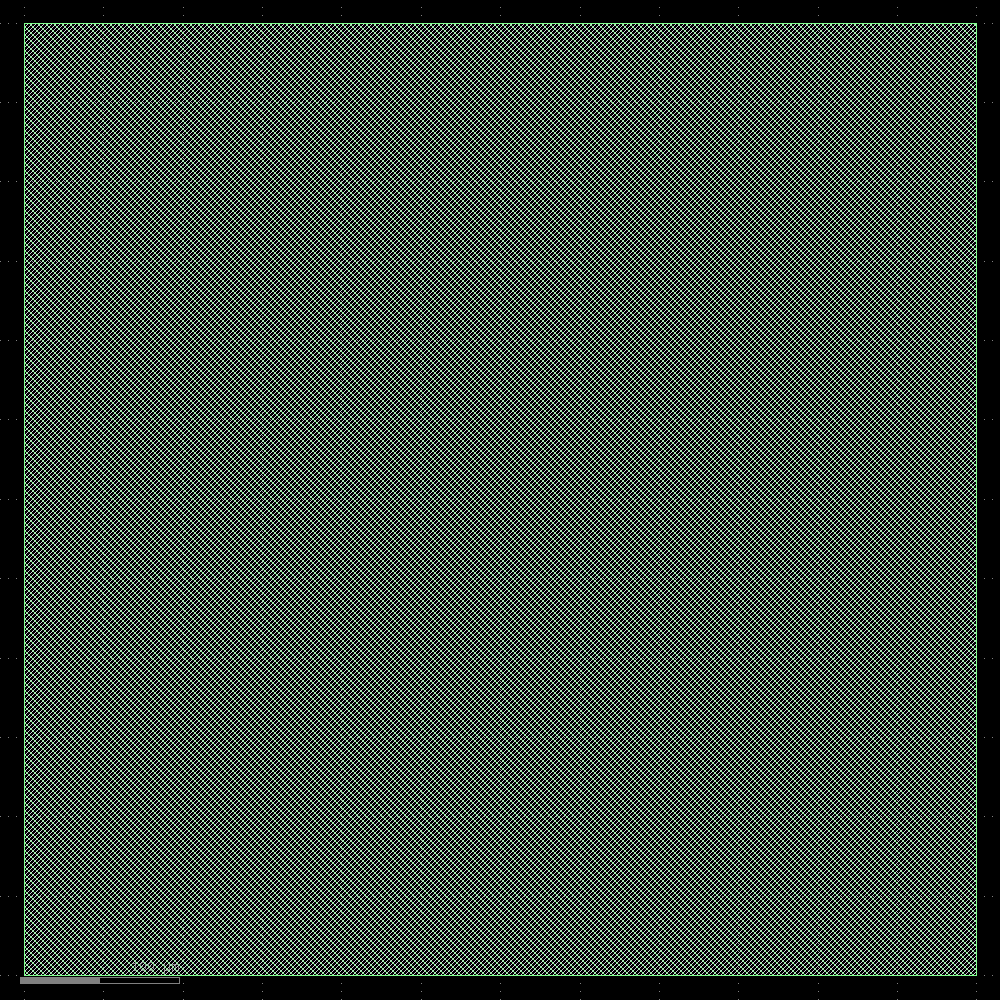

In [54]:
display(fp)

In [55]:
TapEndcapInsertion = Step.factory.get("OpenROAD.TapEndcapInsertion")

tdi = TapEndcapInsertion(state_in=fp.state_out)
tdi.start()

─────────────────────────────────────────────── Tap/Decap Insertion ───────────────────────────────────────────────

[14:22:40] VERBOSE  Running 'OpenROAD.TapEndcapInsertion'…                                             ]8;id=315837;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=518352;file:///content/openlane_ipynb/openlane/steps/step.py#1088\1088]8;;\

[14:22:40] VERBOSE  Logging subprocess to                                                              ]8;id=833765;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=509686;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\
                    ]8;id=801961;file:///content/openlane_run/3-openroad-tapendcapinsertion/openroad-tapendcapinsertion.log\openlane_run/]8;;\]8;id=136424;file:///content/openlane_run/3-openroad-tapendcapinsertion/openroad-tapendcapinsertion.log\3]8;;\]8;id=801961;file:///content/openlane_run/3-openroad-tapendcapinsertion/openroad-tapendcapinsertion.log\-openroad-tapendcapinsertion/openroad-tapendcapinsertion.log]8;;\…                    

Reading OpenROAD database at '/content/openlane_run/2-openroad-floorplan/hac_deskew_dut.odb'…

Reading library file at '/root/.volare/sky130A/libs.ref/sky130_fd_sc_hd/lib/sky130_fd_sc_hd__tt_025C_1v80.lib'…

Reading design constraints file at '/content/openlane_ipynb/openlane/scripts/base.sdc'…

[INFO] Using clock clk…

[INFO] Setting output delay to: 2

[INFO] Setting input delay to: 2

[INFO] Setting load to: 0.033442

[INFO] Setting clock uncertainty to: 0.25

[INFO] Setting clock transition to: 0.1499999999999999944488848768742172978818416595458984375

[INFO] Setting timing derate to: 5%

[INFO TAP-0004] Inserted 366 endcaps.

[INFO TAP-0005] Inserted 3515 tapcells.

Setting global connections for newly added cells…

[INFO] Setting global connections...

Writing OpenROAD database to '/content/openlane_run/3-openroad-tapendcapinsertion/hac_deskew_dut.odb'…

Writing netlist to '/content/openlane_run/3-openroad-tapendcapinsertion/hac_deskew_dut.nl.v'…

Writing powered netlist to '/content/openlane_run/3-openroad-tapendcapinsertion/hac_deskew_dut.pnl.v'…

Writing layout to '/content/openlane_run/3-openroad-tapendcapinsertion/hac_deskew_dut.def'…

Writing timing constraints to '/content/openlane_run/3-openroad-tapendcapinsertion/hac_deskew_dut.sdc'…

{'nl': Path('/content/openlane_run/3-openroad-tapendcapinsertion/hac_deskew_dut.nl.v'), 'pnl': Path('/content/openlane_run/3-openroad-tapendcapinsertion/hac_deskew_dut.pnl.v'), 'pnl-sdf-friendly': None, 'pnl-npc': None, 'def': Path('/content/openlane_run/3-openroad-tapendcapinsertion/hac_deskew_dut.def'), 'lef': None, 'openroad-lef': None, 'odb': Path('/content/openlane_run/3-openroad-tapendcapinsertion/hac_deskew_dut.odb'), 'sdc': Path('/content/openlane_run/3-openroad-tapendcapinsertion/hac_deskew_dut.sdc'), 'sdf': None, 'spef': None, 'lib': None, 'spice': None, 'mag': None, 'gds': None, 'mag_gds': None, 'klayout_gds': None, 'json_h': None, 'vh': None, 'metrics': {'design__instance__count': 4355, 'design__instance__area': Decimal('13756.9'), 'design__instance_unmapped__count': 0, 'synthesis__check_error__count': 1, 'design__die__bbox': '0.0 0.0 600.0 600.0', 'design__core__bbox': '50.14 51.68 549.7 549.44', 'flow__warnings__count': 0, 'flow__errors__count': 0, 'design__io': 232, 'design__die__area': 360000, 'design__core__area': 248661, 'design__instance__count__stdcell': 4355, 'design__instance__area__stdcell': Decimal('13756.9'), 'design__instance__count__macros': 0, 'design__instance__area__macros': 0, 'design__instance__utilization': Decimal('0.0553241'), 'design__instance__utilization__stdcell': Decimal('0.0553241')}}

──────────────────────────────────────────── Render Image (w/ KLayout) ────────────────────────────────────────────

[14:22:49] VERBOSE  Running 'KLayout.Render'…                                                          ]8;id=635164;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=171252;file:///content/openlane_ipynb/openlane/steps/step.py#1088\1088]8;;\

[14:22:49] VERBOSE  Logging subprocess to ]8;id=813064;file:///tmp/openlane_klayout_tmp_u2d5dqq_/klayout-render.log\..]8;;\]8;id=523682;file:///tmp/openlane_klayout_tmp_u2d5dqq_/klayout-render.log\/tmp/openlane_klayout_tmp_u2d5dqq_/]8;;\]8;id=392884;file:///tmp/openlane_klayout_tmp_u2d5dqq_/klayout-render.log\klayout-render.log]8;;\…     ]8;id=391641;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=690409;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\

#### Time Elapsed: 1.13s
#### Views updated:
* Verilog Netlist
* Powered Verilog Netlist
* Design Exchange Format
* OpenDB Database
* Design Constraints
#### Preview:
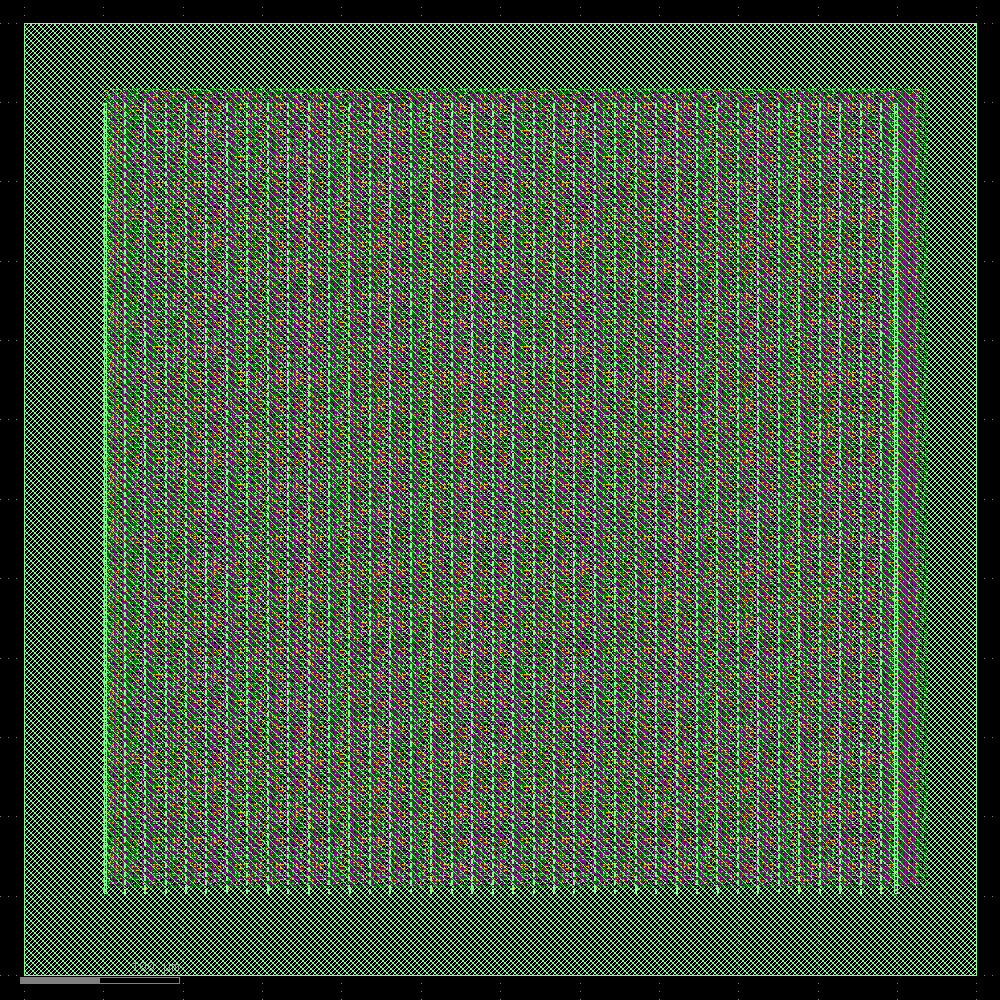

In [56]:
display(tdi)

In [57]:
IOPlacement = Step.factory.get("OpenROAD.IOPlacement")

ioplace = IOPlacement(state_in=tdi.state_out)
ioplace.start()

────────────────────────────────────────────────── I/O Placement ──────────────────────────────────────────────────

[14:22:55] VERBOSE  Running 'OpenROAD.IOPlacement'…                                                    ]8;id=725692;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=622250;file:///content/openlane_ipynb/openlane/steps/step.py#1088\1088]8;;\

[14:22:55] VERBOSE  Logging subprocess to                                                              ]8;id=208193;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=394418;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\
                    ]8;id=992647;file:///content/openlane_run/4-openroad-ioplacement/openroad-ioplacement.log\openlane_run/]8;;\]8;id=179530;file:///content/openlane_run/4-openroad-ioplacement/openroad-ioplacement.log\4]8;;\]8;id=992647;file:///content/openlane_run/4-openroad-ioplacement/openroad-ioplacement.log\-openroad-ioplacement/openroad-ioplacement.log]8;;\…                                  

Reading OpenROAD database at '/content/openlane_run/3-openroad-tapendcapinsertion/hac_deskew_dut.odb'…

Reading library file at '/root/.volare/sky130A/libs.ref/sky130_fd_sc_hd/lib/sky130_fd_sc_hd__tt_025C_1v80.lib'…

Reading design constraints file at '/content/openlane_ipynb/openlane/scripts/base.sdc'…

[INFO] Using clock clk…

[INFO] Setting output delay to: 2

[INFO] Setting input delay to: 2

[INFO] Setting load to: 0.033442

[INFO] Setting clock uncertainty to: 0.25

[INFO] Setting clock transition to: 0.1499999999999999944488848768742172978818416595458984375

[INFO] Setting timing derate to: 5%

[INFO] place_pins args: -min_distance 3

Found 0 macro blocks.

[INFO PPL-0010] Tentative 0 to set up sections.

[INFO PPL-0001] Number of slots           728

[INFO PPL-0002] Number of I/O             232

[INFO PPL-0003] Number of I/O w/sink      200

[INFO PPL-0004] Number of I/O w/o sink    32

[INFO PPL-0005] Slots per section         200

[INFO PPL-0006] Slots increase factor     0.01

[INFO PPL-0008] Successfully assigned pins to sections.

[INFO PPL-0012] I/O nets HPWL: 80969.26 um.

Setting global connections for newly added cells…

[INFO] Setting global connections...

Writing OpenROAD database to '/content/openlane_run/4-openroad-ioplacement/hac_deskew_dut.odb'…

Writing netlist to '/content/openlane_run/4-openroad-ioplacement/hac_deskew_dut.nl.v'…

Writing powered netlist to '/content/openlane_run/4-openroad-ioplacement/hac_deskew_dut.pnl.v'…

Writing layout to '/content/openlane_run/4-openroad-ioplacement/hac_deskew_dut.def'…

Writing timing constraints to '/content/openlane_run/4-openroad-ioplacement/hac_deskew_dut.sdc'…

{'nl': Path('/content/openlane_run/4-openroad-ioplacement/hac_deskew_dut.nl.v'), 'pnl': Path('/content/openlane_run/4-openroad-ioplacement/hac_deskew_dut.pnl.v'), 'pnl-sdf-friendly': None, 'pnl-npc': None, 'def': Path('/content/openlane_run/4-openroad-ioplacement/hac_deskew_dut.def'), 'lef': None, 'openroad-lef': None, 'odb': Path('/content/openlane_run/4-openroad-ioplacement/hac_deskew_dut.odb'), 'sdc': Path('/content/openlane_run/4-openroad-ioplacement/hac_deskew_dut.sdc'), 'sdf': None, 'spef': None, 'lib': None, 'spice': None, 'mag': None, 'gds': None, 'mag_gds': None, 'klayout_gds': None, 'json_h': None, 'vh': None, 'metrics': {'design__instance__count': 4355, 'design__instance__area': Decimal('13756.9'), 'design__instance_unmapped__count': 0, 'synthesis__check_error__count': 1, 'design__die__bbox': '0.0 0.0 600.0 600.0', 'design__core__bbox': '50.14 51.68 549.7 549.44', 'flow__warnings__count': 0, 'flow__errors__count': 0, 'design__io': 232, 'design__die__area': 360000, 'design__core__area': 248661, 'design__instance__count__stdcell': 4355, 'design__instance__area__stdcell': Decimal('13756.9'), 'design__instance__count__macros': 0, 'design__instance__area__macros': 0, 'design__instance__utilization': Decimal('0.0553241'), 'design__instance__utilization__stdcell': Decimal('0.0553241'), 'floorplan__design__io': 232, 'design__io__hpwl': 80969260}}

──────────────────────────────────────────── Render Image (w/ KLayout) ────────────────────────────────────────────

[14:24:21] VERBOSE  Running 'KLayout.Render'…                                                          ]8;id=191373;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=614667;file:///content/openlane_ipynb/openlane/steps/step.py#1088\1088]8;;\

[14:24:21] VERBOSE  Logging subprocess to ]8;id=896371;file:///tmp/openlane_klayout_tmp_sg_e1zsa/klayout-render.log\..]8;;\]8;id=260089;file:///tmp/openlane_klayout_tmp_sg_e1zsa/klayout-render.log\/tmp/openlane_klayout_tmp_sg_e1zsa/]8;;\]8;id=515604;file:///tmp/openlane_klayout_tmp_sg_e1zsa/klayout-render.log\klayout-render.log]8;;\…     ]8;id=589621;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=432983;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\

#### Time Elapsed: 1.20s
#### Views updated:
* Verilog Netlist
* Powered Verilog Netlist
* Design Exchange Format
* OpenDB Database
* Design Constraints
#### Preview:
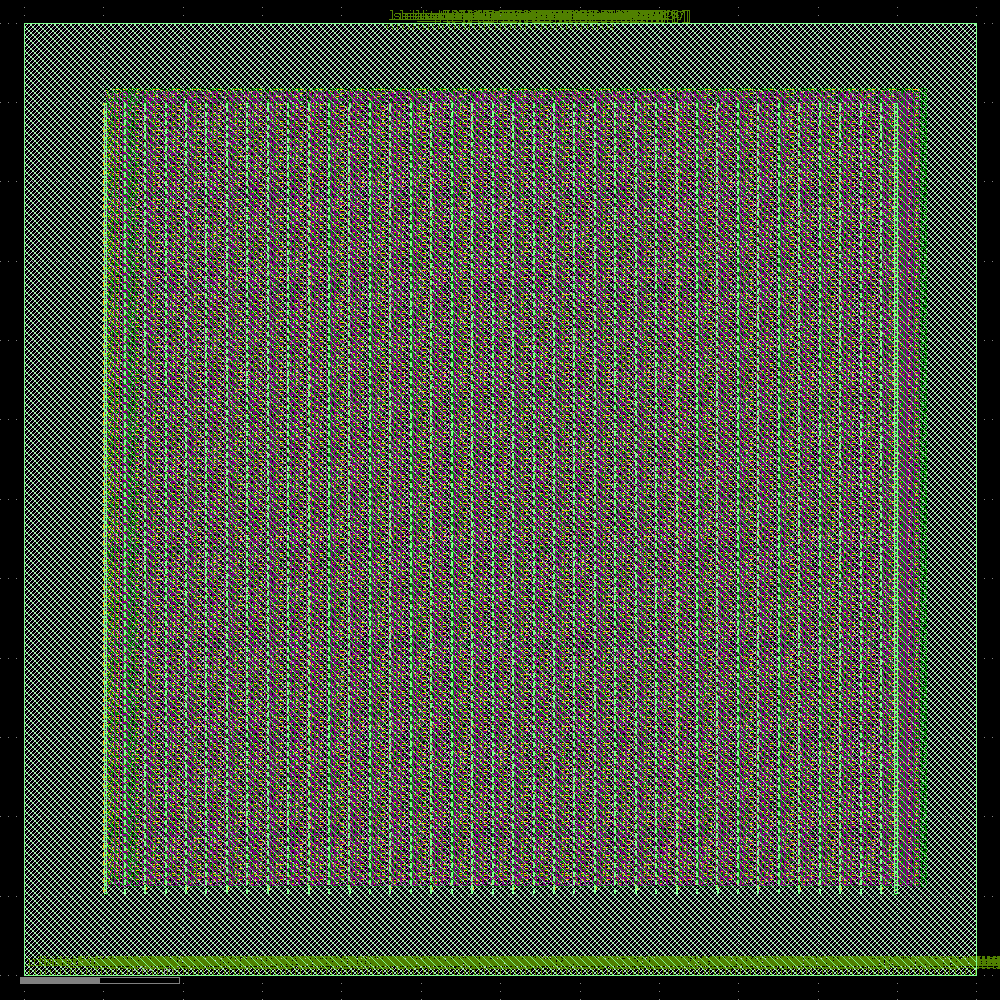

In [59]:
display(ioplace)

In [60]:
GeneratePDN = Step.factory.get("OpenROAD.GeneratePDN")

pdn = GeneratePDN(
    state_in=ioplace.state_out,
    FP_PDN_VWIDTH=2,
    FP_PDN_HWIDTH=2,
    FP_PDN_VPITCH=30,
    FP_PDN_HPITCH=30,
)
pdn.start()

────────────────────────────────────── Power Distribution Network Generation ──────────────────────────────────────

[14:24:42] VERBOSE  Running 'OpenROAD.GeneratePDN'…                                                    ]8;id=71773;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=604840;file:///content/openlane_ipynb/openlane/steps/step.py#1088\1088]8;;\

[14:24:42] INFO     'FP_PDN_CFG' not explicitly set, setting it to                                 ]8;id=126964;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=798529;file:///content/openlane_ipynb/openlane/steps/openroad.py#1174\1174]8;;\
                    /content/openlane_ipynb/openlane/scripts/openroad/common/pdn_cfg.tcl…                          

[14:24:42] VERBOSE  Logging subprocess to                                                              ]8;id=415355;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=214224;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\
                    ]8;id=419184;file:///content/openlane_run/6-openroad-generatepdn/openroad-generatepdn.log\openlane_run/]8;;\]8;id=48556;file:///content/openlane_run/6-openroad-generatepdn/openroad-generatepdn.log\6]8;;\]8;id=419184;file:///content/openlane_run/6-openroad-generatepdn/openroad-generatepdn.log\-openroad-generatepdn/openroad-generatepdn.log]8;;\…                                  

Reading OpenROAD database at '/content/openlane_run/4-openroad-ioplacement/hac_deskew_dut.odb'…

Reading library file at '/root/.volare/sky130A/libs.ref/sky130_fd_sc_hd/lib/sky130_fd_sc_hd__tt_025C_1v80.lib'…

Reading design constraints file at '/content/openlane_ipynb/openlane/scripts/base.sdc'…

[INFO] Using clock clk…

[INFO] Setting output delay to: 2

[INFO] Setting input delay to: 2

[INFO] Setting load to: 0.033442

[INFO] Setting clock uncertainty to: 0.25

[INFO] Setting clock transition to: 0.1499999999999999944488848768742172978818416595458984375

[INFO] Setting timing derate to: 5%

[INFO] Setting global connections...

[INFO PDN-0001] Inserting grid: stdcell_grid

Setting global connections for newly added cells…

[INFO] Setting global connections...

Writing OpenROAD database to '/content/openlane_run/6-openroad-generatepdn/hac_deskew_dut.odb'…

Writing netlist to '/content/openlane_run/6-openroad-generatepdn/hac_deskew_dut.nl.v'…

Writing powered netlist to '/content/openlane_run/6-openroad-generatepdn/hac_deskew_dut.pnl.v'…

Writing layout to '/content/openlane_run/6-openroad-generatepdn/hac_deskew_dut.def'…

Writing timing constraints to '/content/openlane_run/6-openroad-generatepdn/hac_deskew_dut.sdc'…

[INFO PSM-0040] All shapes on net VPWR are connected.

[INFO PSM-0040] All shapes on net VGND are connected.

{'nl': Path('/content/openlane_run/6-openroad-generatepdn/hac_deskew_dut.nl.v'), 'pnl': Path('/content/openlane_run/6-openroad-generatepdn/hac_deskew_dut.pnl.v'), 'pnl-sdf-friendly': None, 'pnl-npc': None, 'def': Path('/content/openlane_run/6-openroad-generatepdn/hac_deskew_dut.def'), 'lef': None, 'openroad-lef': None, 'odb': Path('/content/openlane_run/6-openroad-generatepdn/hac_deskew_dut.odb'), 'sdc': Path('/content/openlane_run/6-openroad-generatepdn/hac_deskew_dut.sdc'), 'sdf': None, 'spef': None, 'lib': None, 'spice': None, 'mag': None, 'gds': None, 'mag_gds': None, 'klayout_gds': None, 'json_h': None, 'vh': None, 'metrics': {'design__instance__count': 4355, 'design__instance__area': Decimal('13756.9'), 'design__instance_unmapped__count': 0, 'synthesis__check_error__count': 1, 'design__die__bbox': '0.0 0.0 600.0 600.0', 'design__core__bbox': '50.14 51.68 549.7 549.44', 'flow__warnings__count': 0, 'flow__errors__count': 0, 'design__io': 234, 'design__die__area': 360000, 'design__core__area': 248661, 'design__instance__count__stdcell': 4355, 'design__instance__area__stdcell': Decimal('13756.9'), 'design__instance__count__macros': 0, 'design__instance__area__macros': 0, 'design__instance__utilization': Decimal('0.0553241'), 'design__instance__utilization__stdcell': Decimal('0.0553241'), 'floorplan__design__io': 232, 'design__io__hpwl': 80969260, 'design__power_grid_violation__count__net:VGND': 0, 'design__power_grid_violation__count__net:VPWR': 0, 'design__power_grid_violation__count': 0}}

──────────────────────────────────────────── Render Image (w/ KLayout) ────────────────────────────────────────────

[14:24:56] VERBOSE  Running 'KLayout.Render'…                                                          ]8;id=529949;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=873512;file:///content/openlane_ipynb/openlane/steps/step.py#1088\1088]8;;\

[14:24:56] VERBOSE  Logging subprocess to ]8;id=825554;file:///tmp/openlane_klayout_tmp_1g6i7v03/klayout-render.log\..]8;;\]8;id=990162;file:///tmp/openlane_klayout_tmp_1g6i7v03/klayout-render.log\/tmp/openlane_klayout_tmp_1g6i7v03/]8;;\]8;id=719362;file:///tmp/openlane_klayout_tmp_1g6i7v03/klayout-render.log\klayout-render.log]8;;\…     ]8;id=156306;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=920710;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\

#### Time Elapsed: 1.54s
#### Views updated:
* Verilog Netlist
* Powered Verilog Netlist
* Design Exchange Format
* OpenDB Database
* Design Constraints
#### Preview:
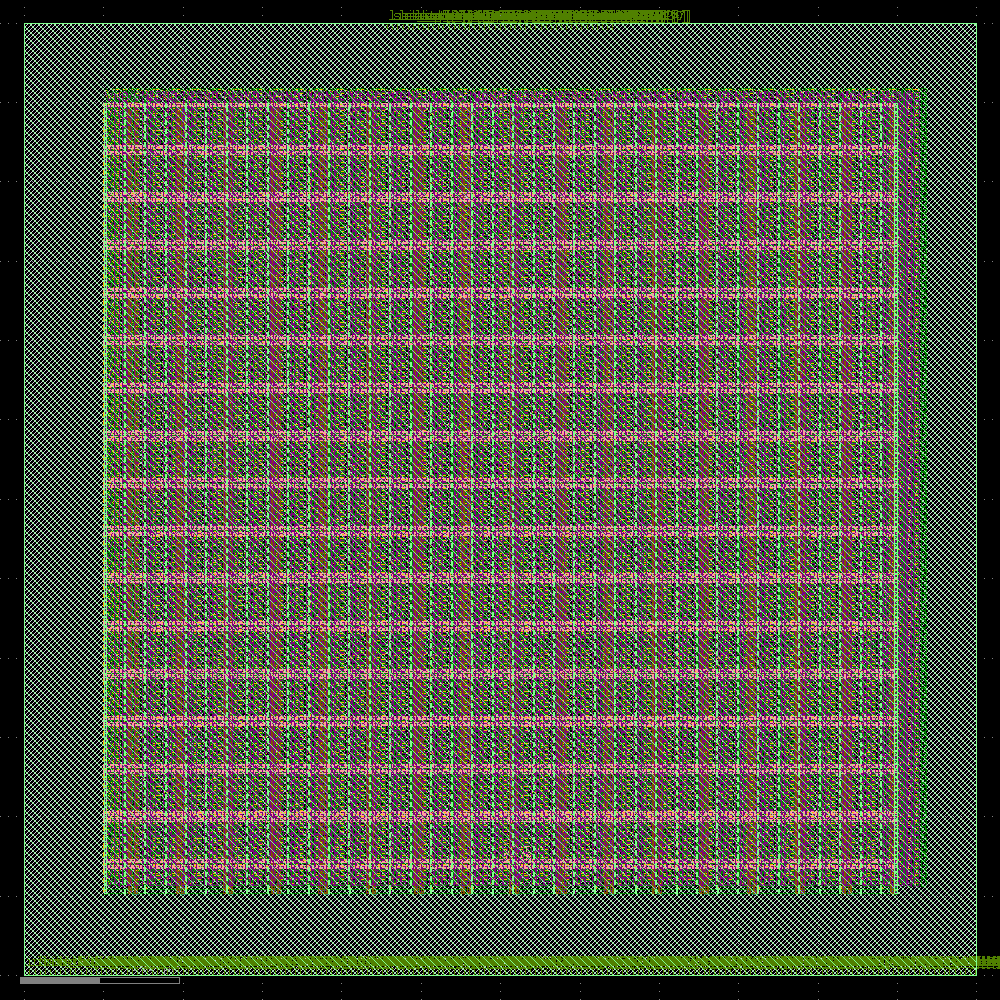

In [61]:
display(pdn)

In [62]:
GlobalPlacement = Step.factory.get("OpenROAD.GlobalPlacement")

gpl = GlobalPlacement(state_in=pdn.state_out)
gpl.start()

──────────────────────────────────────────────── Global Placement ─────────────────────────────────────────────────

[14:25:16] VERBOSE  Running 'OpenROAD.GlobalPlacement'…                                                ]8;id=796324;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=958311;file:///content/openlane_ipynb/openlane/steps/step.py#1088\1088]8;;\

[14:25:16] INFO     'PL_TARGET_DENSITY_PCT' not explicitly set, using dynamically calculated       ]8;id=707948;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=583984;file:///content/openlane_ipynb/openlane/steps/openroad.py#1260\1260]8;;\
                    target density: 15.5324100…                                                                    

[14:25:16] VERBOSE  Logging subprocess to                                                              ]8;id=229782;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=302277;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\
                    ]8;id=248216;file:///content/openlane_run/7-openroad-globalplacement/openroad-globalplacement.log\openlane_run/]8;;\]8;id=625245;file:///content/openlane_run/7-openroad-globalplacement/openroad-globalplacement.log\7]8;;\]8;id=248216;file:///content/openlane_run/7-openroad-globalplacement/openroad-globalplacement.log\-openroad-globalplacement/openroad-globalplacement.log]8;;\…                          

Reading OpenROAD database at '/content/openlane_run/6-openroad-generatepdn/hac_deskew_dut.odb'…

Reading library file at '/root/.volare/sky130A/libs.ref/sky130_fd_sc_hd/lib/sky130_fd_sc_hd__tt_025C_1v80.lib'…

Reading design constraints file at '/content/openlane_ipynb/openlane/scripts/base.sdc'…

[INFO] Using clock clk…

[INFO] Setting output delay to: 2

[INFO] Setting input delay to: 2

[INFO] Setting load to: 0.033442

[INFO] Setting clock uncertainty to: 0.25

[INFO] Setting clock transition to: 0.1499999999999999944488848768742172978818416595458984375

[INFO] Setting timing derate to: 5%

[INFO] Setting RC values…

[INFO] Setting signal min routing layer to: met1 and clock min routing layer to met1.

[INFO] Setting signal max routing layer to: met5 and clock max routing layer to met5.

[INFO GPL-0002] DBU: 1000

[INFO GPL-0003] SiteSize: (  0.460  2.720 ) um

[INFO GPL-0004] CoreBBox: ( 50.140 51.680 ) ( 549.700 549.440 ) um

[INFO GPL-0006] NumInstances:              4721

[INFO GPL-0007] NumPlaceInstances:          840

[INFO GPL-0008] NumFixedInstances:         3881

[INFO GPL-0009] NumDummyInstances:            0

[INFO GPL-0010] NumNets:                    933

[INFO GPL-0011] NumPins:                   3053

[INFO GPL-0012] DieBBox:  (  0.000  0.000 ) ( 600.000 600.000 ) um

[INFO GPL-0013] CoreBBox: ( 50.140 51.680 ) ( 549.700 549.440 ) um

[INFO GPL-0016] CoreArea:            248660.986 um^2

[INFO GPL-0017] NonPlaceInstsArea:     5771.786 um^2

[INFO GPL-0018] PlaceInstsArea:        9358.976 um^2

[INFO GPL-0019] Util:                     3.853 %

[INFO GPL-0020] StdInstsArea:          9358.976 um^2

[INFO GPL-0021] MacroInstsArea:           0.000 um^2

[InitialPlace]  Iter: 1 CG residual: 0.00281073 HPWL: 93605000

[InitialPlace]  Iter: 2 CG residual: 0.00006303 HPWL: 53310193

[InitialPlace]  Iter: 3 CG residual: 0.00006841 HPWL: 43894229

[InitialPlace]  Iter: 4 CG residual: 0.00000432 HPWL: 37990164

[InitialPlace]  Iter: 5 CG residual: 0.00000077 HPWL: 36145486

[INFO GPL-0031] FillerInit:NumGCells:      3489

[INFO GPL-0032] FillerInit:NumGNets:        933

[INFO GPL-0033] FillerInit:NumGPins:       3053

[INFO GPL-0023] TargetDensity:            0.155

[INFO GPL-0024] AvrgPlaceInstArea:       11.142 um^2

[INFO GPL-0025] IdealBinArea:            71.732 um^2

[INFO GPL-0026] IdealBinCnt:               3466

[INFO GPL-0027] TotalBinArea:        248660.986 um^2

[INFO GPL-0028] BinCnt:        32     32

[INFO GPL-0029] BinSize: ( 15.612 15.555 )

[INFO GPL-0030] NumBins: 1024

[NesterovSolve] Iter:    1 overflow: 0.856 HPWL: 44431333

[INFO GPL-0100] worst slack 2.97e-09

[INFO GPL-0103] Weighted 87 nets.

[NesterovSolve] Iter:   10 overflow: 0.690 HPWL: 51162886

[NesterovSolve] Iter:   20 overflow: 0.666 HPWL: 51653942

[NesterovSolve] Iter:   30 overflow: 0.661 HPWL: 51412163

[NesterovSolve] Iter:   40 overflow: 0.672 HPWL: 51378823

[NesterovSolve] Iter:   50 overflow: 0.671 HPWL: 51500878

[NesterovSolve] Iter:   60 overflow: 0.668 HPWL: 51470315

[NesterovSolve] Iter:   70 overflow: 0.669 HPWL: 51419494

[NesterovSolve] Iter:   80 overflow: 0.669 HPWL: 51455967

[NesterovSolve] Iter:   90 overflow: 0.669 HPWL: 51472164

[NesterovSolve] Iter:  100 overflow: 0.669 HPWL: 51437645

[NesterovSolve] Iter:  110 overflow: 0.668 HPWL: 51460923

[NesterovSolve] Iter:  120 overflow: 0.668 HPWL: 51478727

[NesterovSolve] Iter:  130 overflow: 0.667 HPWL: 51475854

[NesterovSolve] Iter:  140 overflow: 0.666 HPWL: 51510624

[NesterovSolve] Iter:  150 overflow: 0.664 HPWL: 51576585

[NesterovSolve] Iter:  160 overflow: 0.661 HPWL: 51646705

[NesterovSolve] Iter:  170 overflow: 0.658 HPWL: 51777757

[NesterovSolve] Iter:  180 overflow: 0.651 HPWL: 51973457

[NesterovSolve] Iter:  190 overflow: 0.643 HPWL: 52173651

[INFO GPL-0100] worst slack 2.85e-09

[INFO GPL-0103] Weighted 87 nets.

[NesterovSolve] Iter:  200 overflow: 0.631 HPWL: 52481846

[NesterovSolve] Iter:  210 overflow: 0.616 HPWL: 52908217

[NesterovSolve] Snapshot saved at iter = 216

[NesterovSolve] Iter:  220 overflow: 0.596 HPWL: 53184248

[NesterovSolve] Iter:  230 overflow: 0.569 HPWL: 53580480

[NesterovSolve] Iter:  240 overflow: 0.538 HPWL: 54005485

[NesterovSolve] Iter:  250 overflow: 0.502 HPWL: 54607869

[INFO GPL-0100] worst slack 2.69e-09

[INFO GPL-0103] Weighted 87 nets.

[NesterovSolve] Iter:  260 overflow: 0.459 HPWL: 54448448

[NesterovSolve] Iter:  270 overflow: 0.397 HPWL: 53800930

[NesterovSolve] Iter:  280 overflow: 0.344 HPWL: 53490406

[NesterovSolve] Iter:  290 overflow: 0.329 HPWL: 53722328

[NesterovSolve] Iter:  300 overflow: 0.301 HPWL: 53810734

[INFO GPL-0100] worst slack 2.48e-09

[INFO GPL-0103] Weighted 87 nets.

[NesterovSolve] Iter:  310 overflow: 0.267 HPWL: 53880055

[NesterovSolve] Iter:  320 overflow: 0.240 HPWL: 53954744

[NesterovSolve] Iter:  330 overflow: 0.205 HPWL: 54016104

[INFO GPL-0100] worst slack 2.42e-09

[INFO GPL-0103] Weighted 87 nets.

[INFO GPL-0075] Routability numCall: 1 inflationIterCnt: 1 bloatIterCnt: 0

[INFO GPL-0036] TileBBox: (    0    0 ) ( 6900 6900 ) DBU

[INFO GPL-0038] TileCnt:      86   86

[INFO GPL-0039] numRoutingLayers: 6

[INFO GPL-0040] NumTiles: 7396

[INFO GPL-0063] TotalRouteOverflowH2: 0.20000004768371582

[INFO GPL-0064] TotalRouteOverflowV2: 0

[INFO GPL-0065] OverflowTileCnt2: 1

[INFO GPL-0066] 0.5%RC: 0.8893

[INFO GPL-0067] 1.0%RC: 0.8138

[INFO GPL-0068] 2.0%RC: 0.7380

[INFO GPL-0069] 5.0%RC: 0.6836

[INFO GPL-0070] 0.5rcK: 1

[INFO GPL-0071] 1.0rcK: 1

[INFO GPL-0072] 2.0rcK: 0

[INFO GPL-0073] 5.0rcK: 0

[INFO GPL-0074] FinalRC: 0.8516

[INFO GPL-0077] FinalRC lower than targetRC(1), routability not needed.

[NesterovSolve] Iter:  340 overflow: 0.174 HPWL: 54113976

[NesterovSolve] Iter:  350 overflow: 0.148 HPWL: 54232140

[INFO GPL-0100] worst slack 2.41e-09

[INFO GPL-0103] Weighted 87 nets.

[NesterovSolve] Iter:  360 overflow: 0.129 HPWL: 54330022

[NesterovSolve] Iter:  370 overflow: 0.105 HPWL: 54371838

[NesterovSolve] Finished with Overflow: 0.098684

[INFO] Setting RC values…

Setting global connections for newly added cells…

[INFO] Setting global connections...

Writing OpenROAD database to '/content/openlane_run/7-openroad-globalplacement/hac_deskew_dut.odb'…

Writing netlist to '/content/openlane_run/7-openroad-globalplacement/hac_deskew_dut.nl.v'…

Writing powered netlist to '/content/openlane_run/7-openroad-globalplacement/hac_deskew_dut.pnl.v'…

Writing layout to '/content/openlane_run/7-openroad-globalplacement/hac_deskew_dut.def'…

Writing timing constraints to '/content/openlane_run/7-openroad-globalplacement/hac_deskew_dut.sdc'…

{'nl': Path('/content/openlane_run/7-openroad-globalplacement/hac_deskew_dut.nl.v'), 'pnl': Path('/content/openlane_run/7-openroad-globalplacement/hac_deskew_dut.pnl.v'), 'pnl-sdf-friendly': None, 'pnl-npc': None, 'def': Path('/content/openlane_run/7-openroad-globalplacement/hac_deskew_dut.def'), 'lef': None, 'openroad-lef': None, 'odb': Path('/content/openlane_run/7-openroad-globalplacement/hac_deskew_dut.odb'), 'sdc': Path('/content/openlane_run/7-openroad-globalplacement/hac_deskew_dut.sdc'), 'sdf': None, 'spef': None, 'lib': None, 'spice': None, 'mag': None, 'gds': None, 'mag_gds': None, 'klayout_gds': None, 'json_h': None, 'vh': None, 'metrics': {'design__instance__count': 4355, 'design__instance__area': Decimal('13756.9'), 'design__instance_unmapped__count': 0, 'synthesis__check_error__count': 1, 'design__die__bbox': '0.0 0.0 600.0 600.0', 'design__core__bbox': '50.14 51.68 549.7 549.44', 'flow__warnings__count': 0, 'flow__errors__count': 0, 'design__io': 234, 'design__die__area': 360000, 'design__core__area': 248661, 'design__instance__count__stdcell': 4355, 'design__instance__area__stdcell': Decimal('13756.9'), 'design__instance__count__macros': 0, 'design__instance__area__macros': 0, 'design__instance__utilization': Decimal('0.0553241'), 'design__instance__utilization__stdcell': Decimal('0.0553241'), 'floorplan__design__io': 232, 'design__io__hpwl': 80969260, 'design__power_grid_violation__count__net:VGND': 0, 'design__power_grid_violation__count__net:VPWR': 0, 'design__power_grid_violation__count': 0}}

──────────────────────────────────────────── Render Image (w/ KLayout) ────────────────────────────────────────────

[14:25:31] VERBOSE  Running 'KLayout.Render'…                                                          ]8;id=428874;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=396979;file:///content/openlane_ipynb/openlane/steps/step.py#1088\1088]8;;\

[14:25:31] VERBOSE  Logging subprocess to ]8;id=819161;file:///tmp/openlane_klayout_tmp_ay3llh80/klayout-render.log\..]8;;\]8;id=241386;file:///tmp/openlane_klayout_tmp_ay3llh80/klayout-render.log\/tmp/openlane_klayout_tmp_ay3llh80/]8;;\]8;id=178860;file:///tmp/openlane_klayout_tmp_ay3llh80/klayout-render.log\klayout-render.log]8;;\…     ]8;id=503435;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=263863;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\

#### Time Elapsed: 5.19s
#### Views updated:
* Verilog Netlist
* Powered Verilog Netlist
* Design Exchange Format
* OpenDB Database
* Design Constraints
#### Preview:
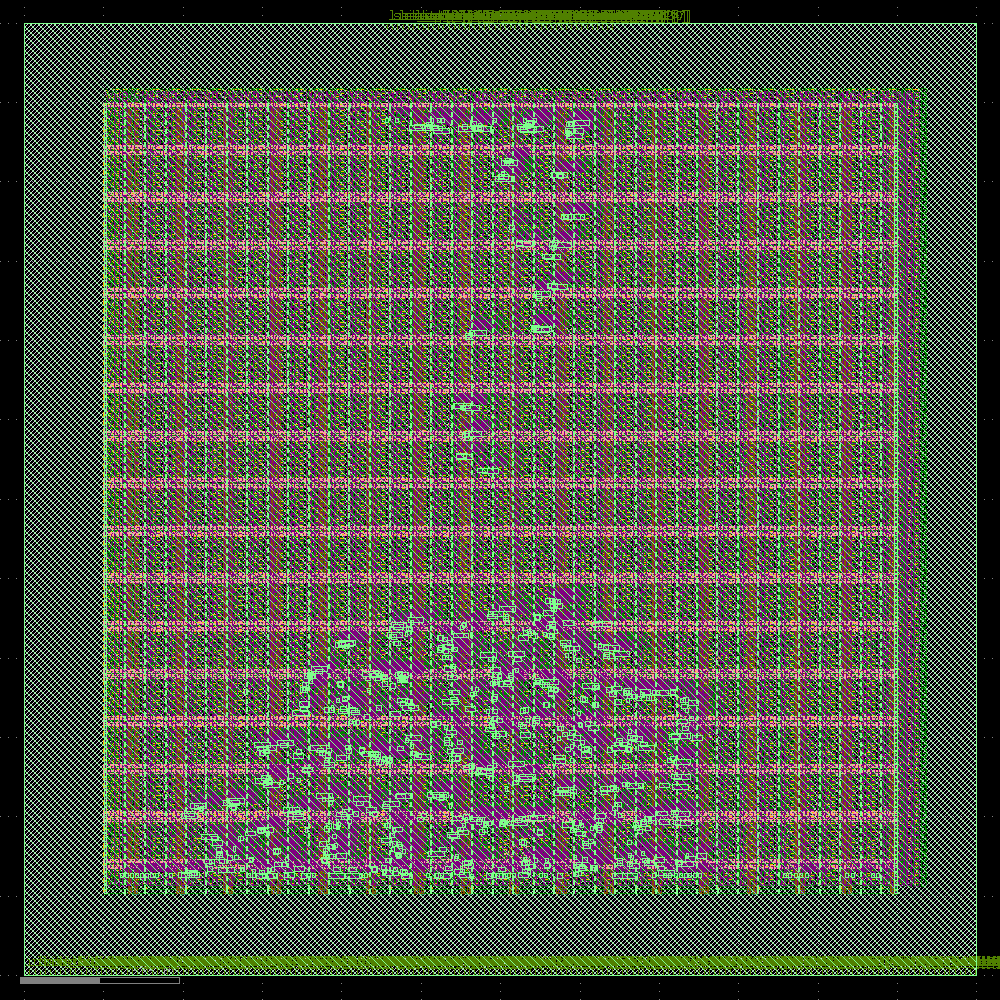

In [63]:
display(gpl)

In [64]:
DetailedPlacement = Step.factory.get("OpenROAD.DetailedPlacement")

dpl = DetailedPlacement(state_in=gpl.state_out)
dpl.start()

─────────────────────────────────────────────── Detailed Placement ────────────────────────────────────────────────

[14:25:58] VERBOSE  Running 'OpenROAD.DetailedPlacement'…                                              ]8;id=273159;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=463046;file:///content/openlane_ipynb/openlane/steps/step.py#1088\1088]8;;\

[14:25:58] VERBOSE  Logging subprocess to                                                              ]8;id=51490;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=637254;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\
                    ]8;id=764653;file:///content/openlane_run/8-openroad-detailedplacement/openroad-detailedplacement.log\openlane_run/]8;;\]8;id=233252;file:///content/openlane_run/8-openroad-detailedplacement/openroad-detailedplacement.log\8]8;;\]8;id=764653;file:///content/openlane_run/8-openroad-detailedplacement/openroad-detailedplacement.log\-openroad-detailedplacement/openroad-detailedplacement.log]8;;\…                      

Reading OpenROAD database at '/content/openlane_run/7-openroad-globalplacement/hac_deskew_dut.odb'…

Reading library file at '/root/.volare/sky130A/libs.ref/sky130_fd_sc_hd/lib/sky130_fd_sc_hd__tt_025C_1v80.lib'…

Reading design constraints file at '/content/openlane_ipynb/openlane/scripts/base.sdc'…

[INFO] Using clock clk…

[INFO] Setting output delay to: 2

[INFO] Setting input delay to: 2

[INFO] Setting load to: 0.033442

[INFO] Setting clock uncertainty to: 0.25

[INFO] Setting clock transition to: 0.1499999999999999944488848768742172978818416595458984375

[INFO] Setting timing derate to: 5%

Placement Analysis

---------------------------------

total displacement       1730.1 u

average displacement        0.4 u

max displacement            9.0 u

original HPWL           54474.1 u

legalized HPWL          55729.8 u

delta HPWL                    2 %

[INFO DPL-0020] Mirrored 358 instances

[INFO DPL-0021] HPWL before           55729.8 u

[INFO DPL-0022] HPWL after            54988.7 u

[INFO DPL-0023] HPWL delta               -1.3 %

Setting global connections for newly added cells…

[INFO] Setting global connections...

Writing OpenROAD database to '/content/openlane_run/8-openroad-detailedplacement/hac_deskew_dut.odb'…

Writing netlist to '/content/openlane_run/8-openroad-detailedplacement/hac_deskew_dut.nl.v'…

Writing powered netlist to '/content/openlane_run/8-openroad-detailedplacement/hac_deskew_dut.pnl.v'…

Writing layout to '/content/openlane_run/8-openroad-detailedplacement/hac_deskew_dut.def'…

Writing timing constraints to '/content/openlane_run/8-openroad-detailedplacement/hac_deskew_dut.sdc'…

{'nl': Path('/content/openlane_run/8-openroad-detailedplacement/hac_deskew_dut.nl.v'), 'pnl': Path('/content/openlane_run/8-openroad-detailedplacement/hac_deskew_dut.pnl.v'), 'pnl-sdf-friendly': None, 'pnl-npc': None, 'def': Path('/content/openlane_run/8-openroad-detailedplacement/hac_deskew_dut.def'), 'lef': None, 'openroad-lef': None, 'odb': Path('/content/openlane_run/8-openroad-detailedplacement/hac_deskew_dut.odb'), 'sdc': Path('/content/openlane_run/8-openroad-detailedplacement/hac_deskew_dut.sdc'), 'sdf': None, 'spef': None, 'lib': None, 'spice': None, 'mag': None, 'gds': None, 'mag_gds': None, 'klayout_gds': None, 'json_h': None, 'vh': None, 'metrics': {'design__instance__count': 4355, 'design__instance__area': Decimal('13756.9'), 'design__instance_unmapped__count': 0, 'synthesis__check_error__count': 1, 'design__die__bbox': '0.0 0.0 600.0 600.0', 'design__core__bbox': '50.14 51.68 549.7 549.44', 'flow__warnings__count': 0, 'flow__errors__count': 0, 'design__io': 234, 'design__die__area': 360000, 'design__core__area': 248661, 'design__instance__count__stdcell': 4355, 'design__instance__area__stdcell': Decimal('13756.9'), 'design__instance__count__macros': 0, 'design__instance__area__macros': 0, 'design__instance__utilization': Decimal('0.0553241'), 'design__instance__utilization__stdcell': Decimal('0.0553241'), 'floorplan__design__io': 232, 'design__io__hpwl': 80969260, 'design__power_grid_violation__count__net:VGND': 0, 'design__power_grid_violation__count__net:VPWR': 0, 'design__power_grid_violation__count': 0, 'design__instance__displacement__total': Decimal('1730.07'), 'design__instance__displacement__mean': Decimal('0.366'), 'design__instance__displacement__max': Decimal('8.956'), 'route__wirelength__estimated': Decimal('55729.8'), 'design__violations': 0}}

──────────────────────────────────────────── Render Image (w/ KLayout) ────────────────────────────────────────────

[14:26:12] VERBOSE  Running 'KLayout.Render'…                                                          ]8;id=341658;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=976400;file:///content/openlane_ipynb/openlane/steps/step.py#1088\1088]8;;\

[14:26:12] VERBOSE  Logging subprocess to ]8;id=645290;file:///tmp/openlane_klayout_tmp_ohxtrvra/klayout-render.log\..]8;;\]8;id=387545;file:///tmp/openlane_klayout_tmp_ohxtrvra/klayout-render.log\/tmp/openlane_klayout_tmp_ohxtrvra/]8;;\]8;id=52983;file:///tmp/openlane_klayout_tmp_ohxtrvra/klayout-render.log\klayout-render.log]8;;\…     ]8;id=142963;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=799472;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\

#### Time Elapsed: 1.02s
#### Views updated:
* Verilog Netlist
* Powered Verilog Netlist
* Design Exchange Format
* OpenDB Database
* Design Constraints
#### Preview:
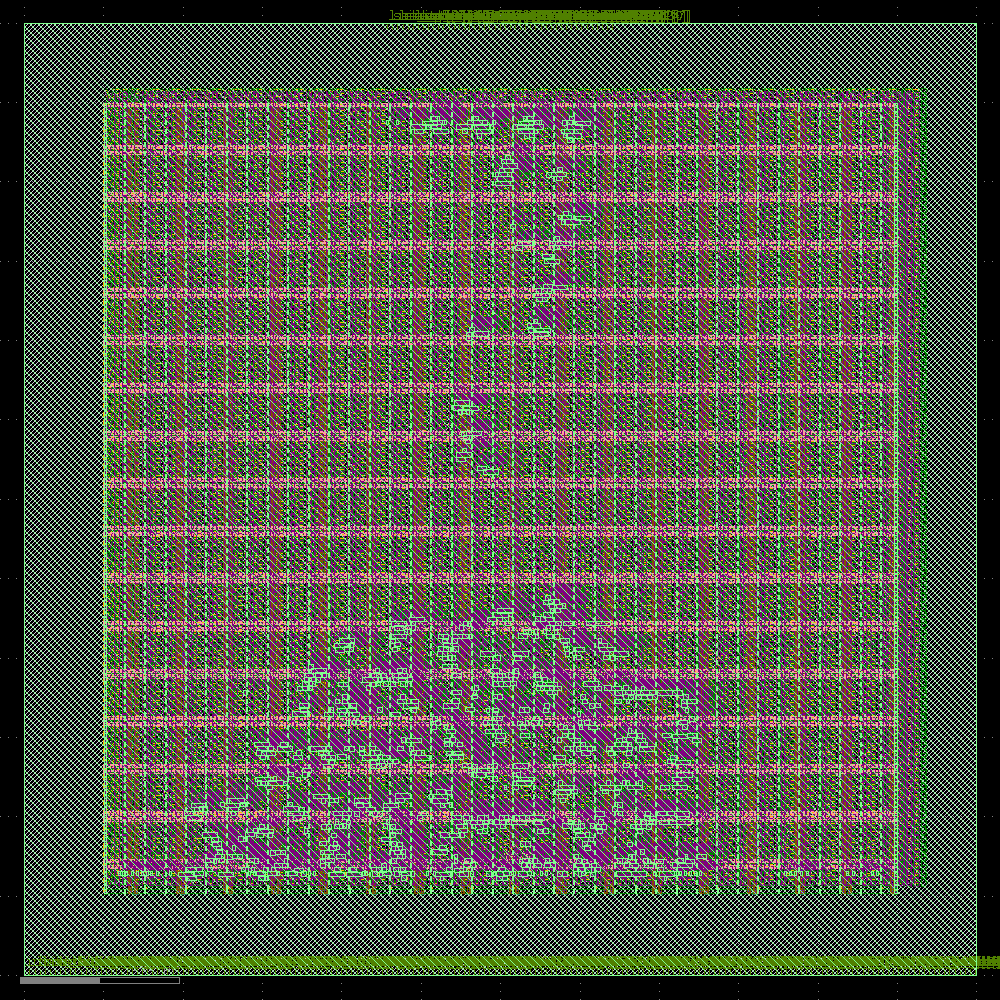

In [65]:
display(dpl)

In [66]:
CTS = Step.factory.get("OpenROAD.CTS")

cts = CTS(state_in=dpl.state_out)
cts.start()

────────────────────────────────────────────── Clock Tree Synthesis ───────────────────────────────────────────────

[14:26:31] VERBOSE  Running 'OpenROAD.CTS'…                                                            ]8;id=265386;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=81994;file:///content/openlane_ipynb/openlane/steps/step.py#1088\1088]8;;\

[14:26:31] VERBOSE  Logging subprocess to ]8;id=362842;file:///content/openlane_run/9-openroad-cts/openroad-cts.log\openlane_run/]8;;\]8;id=229713;file:///content/openlane_run/9-openroad-cts/openroad-cts.log\9]8;;\]8;id=362842;file:///content/openlane_run/9-openroad-cts/openroad-cts.log\-openroad-cts/openroad-cts.log]8;;\…                ]8;id=170308;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=90631;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\

Reading timing models for corner nom_tt_025C_1v80…

Reading timing library for the 'nom_tt_025C_1v80' corner at                                                        
'/root/.volare/sky130A/libs.ref/sky130_fd_sc_hd/lib/sky130_fd_sc_hd__tt_025C_1v80.lib'…

Reading timing models for corner nom_ff_n40C_1v95…

Reading timing library for the 'nom_ff_n40C_1v95' corner at                                                        
'/root/.volare/sky130A/libs.ref/sky130_fd_sc_hd/lib/sky130_fd_sc_hd__ff_n40C_1v95.lib'…

Reading timing models for corner nom_ss_100C_1v60…

Reading timing library for the 'nom_ss_100C_1v60' corner at                                                        
'/root/.volare/sky130A/libs.ref/sky130_fd_sc_hd/lib/sky130_fd_sc_hd__ss_100C_1v60.lib'…

Reading OpenROAD database at '/content/openlane_run/8-openroad-detailedplacement/hac_deskew_dut.odb'…

Reading design constraints file at '/content/openlane_ipynb/openlane/scripts/base.sdc'…

[INFO] Using clock clk…

[INFO] Setting output delay to: 2

[INFO] Setting input delay to: 2

[INFO] Setting load to: 0.033442

[INFO] Setting clock uncertainty to: 0.25

[INFO] Setting clock transition to: 0.1499999999999999944488848768742172978818416595458984375

[INFO] Setting timing derate to: 5%

[INFO] Setting RC values…

[INFO] Configuring cts characterization…

[INFO] Performing clock tree synthesis…

[INFO] Looking for the following net(s): clk

[INFO] Running Clock Tree Synthesis…

[INFO CTS-0050] Root buffer is sky130_fd_sc_hd__clkbuf_16.

[INFO CTS-0051] Sink buffer is sky130_fd_sc_hd__clkbuf_8.

[INFO CTS-0052] The following clock buffers will be used for CTS:

sky130_fd_sc_hd__clkbuf_2

sky130_fd_sc_hd__clkbuf_4

sky130_fd_sc_hd__clkbuf_8

[INFO CTS-0049] Characterization buffer is sky130_fd_sc_hd__clkbuf_8.

[INFO CTS-0007] Net "clk" found for clock "clk".

[INFO CTS-0010]  Clock net "clk" has 101 sinks.

[INFO CTS-0008] TritonCTS found 1 clock nets.

[INFO CTS-0097] Characterization used 3 buffer(s) types.

[INFO CTS-0200] 0 placement blockages have been identified.

[INFO CTS-0201] 0 placed hard macros will be treated like blockages.

[INFO CTS-0027] Generating H-Tree topology for net clk.

[INFO CTS-0028]  Total number of sinks: 101.

[INFO CTS-0029]  Sinks will be clustered in groups of up to 25 and with maximum cluster diameter of 50.0 um.

[INFO CTS-0030]  Number of static layers: 0.

[INFO CTS-0020]  Wire segment unit: 13600  dbu (13 um).

[INFO CTS-0023]  Original sink region: [(105145, 63860), (419715, 537140)].

[INFO CTS-0024]  Normalized sink region: [(7.73125, 4.69559), (30.8614, 39.4956)].

[INFO CTS-0025]     Width:  23.1301.

[INFO CTS-0026]     Height: 34.8000.

Level 1

Direction: Vertical

Sinks per sub-region: 51

Sub-region size: 23.1301 X 17.4000

[INFO CTS-0034]     Segment length (rounded): 8.

Level 2

Direction: Horizontal

Sinks per sub-region: 26

Sub-region size: 11.5651 X 17.4000

[INFO CTS-0034]     Segment length (rounded): 6.

Level 3

Direction: Vertical

Sinks per sub-region: 13

Sub-region size: 11.5651 X 8.7000

[INFO CTS-0034]     Segment length (rounded): 4.

[INFO CTS-0032]  Stop criterion found. Max number of sinks is 15.

[INFO CTS-0035]  Number of sinks covered: 101.

[INFO CTS-0018]     Created 9 clock buffers.

[INFO CTS-0012]     Minimum number of buffers in the clock path: 2.

[INFO CTS-0013]     Maximum number of buffers in the clock path: 2.

[INFO CTS-0015]     Created 9 clock nets.

[INFO CTS-0016]     Fanout distribution for the current clock = 7:1, 9:1, 11:1, 12:2, 13:1, 15:1, 22:1..

[INFO CTS-0017]     Max level of the clock tree: 3.

[INFO CTS-0098] Clock net "clk"

[INFO CTS-0099]  Sinks 108

[INFO CTS-0100]  Leaf buffers 0

[INFO CTS-0101]  Average sink wire length 778.97 um

[INFO CTS-0102]  Path depth 2 - 2

[INFO CTS-0207]  Leaf load cells 7

[INFO] Repairing long wires on clock nets…

[INFO RSZ-0058] Using max wire length 6335um.

Setting global connections for newly added cells…

[INFO] Setting global connections...

Writing OpenROAD database to '/content/openlane_run/9-openroad-cts/hac_deskew_dut.odb'…

Writing netlist to '/content/openlane_run/9-openroad-cts/hac_deskew_dut.nl.v'…

Writing powered netlist to '/content/openlane_run/9-openroad-cts/hac_deskew_dut.pnl.v'…

Writing layout to '/content/openlane_run/9-openroad-cts/hac_deskew_dut.def'…

Writing timing constraints to '/content/openlane_run/9-openroad-cts/hac_deskew_dut.sdc'…

[INFO] Legalizing…

Placement Analysis

---------------------------------

total displacement         38.8 u

average displacement        0.0 u

max displacement            6.1 u

original HPWL           56609.5 u

legalized HPWL          57354.5 u

delta HPWL                    1 %

[INFO DPL-0020] Mirrored 359 instances

[INFO DPL-0021] HPWL before           57354.5 u

[INFO DPL-0022] HPWL after            56578.4 u

[INFO DPL-0023] HPWL delta               -1.4 %

Setting global connections for newly added cells…

[INFO] Setting global connections...

Writing OpenROAD database to '/content/openlane_run/9-openroad-cts/hac_deskew_dut.odb'…

Writing netlist to '/content/openlane_run/9-openroad-cts/hac_deskew_dut.nl.v'…

Writing powered netlist to '/content/openlane_run/9-openroad-cts/hac_deskew_dut.pnl.v'…

Writing layout to '/content/openlane_run/9-openroad-cts/hac_deskew_dut.def'…

Writing timing constraints to '/content/openlane_run/9-openroad-cts/hac_deskew_dut.sdc'…

{'nl': Path('/content/openlane_run/9-openroad-cts/hac_deskew_dut.nl.v'), 'pnl': Path('/content/openlane_run/9-openroad-cts/hac_deskew_dut.pnl.v'), 'pnl-sdf-friendly': None, 'pnl-npc': None, 'def': Path('/content/openlane_run/9-openroad-cts/hac_deskew_dut.def'), 'lef': None, 'openroad-lef': None, 'odb': Path('/content/openlane_run/9-openroad-cts/hac_deskew_dut.odb'), 'sdc': Path('/content/openlane_run/9-openroad-cts/hac_deskew_dut.sdc'), 'sdf': None, 'spef': None, 'lib': None, 'spice': None, 'mag': None, 'gds': None, 'mag_gds': None, 'klayout_gds': None, 'json_h': None, 'vh': None, 'metrics': {'design__instance__count': 4371, 'design__instance__area': Decimal('14073.5'), 'design__instance_unmapped__count': 0, 'synthesis__check_error__count': 1, 'design__die__bbox': '0.0 0.0 600.0 600.0', 'design__core__bbox': '50.14 51.68 549.7 549.44', 'flow__warnings__count': 33696, 'flow__errors__count': 0, 'design__io': 234, 'design__die__area': 360000, 'design__core__area': 248661, 'design__instance__count__stdcell': 4371, 'design__instance__area__stdcell': Decimal('14073.5'), 'design__instance__count__macros': 0, 'design__instance__area__macros': 0, 'design__instance__utilization': Decimal('0.0565971'), 'design__instance__utilization__stdcell': Decimal('0.0565971'), 'floorplan__design__io': 232, 'design__io__hpwl': 80969260, 'design__power_grid_violation__count__net:VGND': 0, 'design__power_grid_violation__count__net:VPWR': 0, 'design__power_grid_violation__count': 0, 'design__instance__displacement__total': Decimal('38.795'), 'design__instance__displacement__mean': Decimal('0.008'), 'design__instance__displacement__max': Decimal('6.11'), 'route__wirelength__estimated': Decimal('57354.5'), 'design__violations': 0}}

──────────────────────────────────────────── Render Image (w/ KLayout) ────────────────────────────────────────────

[14:26:59] VERBOSE  Running 'KLayout.Render'…                                                          ]8;id=5557;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=688830;file:///content/openlane_ipynb/openlane/steps/step.py#1088\1088]8;;\

[14:26:59] VERBOSE  Logging subprocess to ]8;id=963954;file:///tmp/openlane_klayout_tmp_u8_urjv3/klayout-render.log\..]8;;\]8;id=830081;file:///tmp/openlane_klayout_tmp_u8_urjv3/klayout-render.log\/tmp/openlane_klayout_tmp_u8_urjv3/]8;;\]8;id=99441;file:///tmp/openlane_klayout_tmp_u8_urjv3/klayout-render.log\klayout-render.log]8;;\…     ]8;id=140780;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=24682;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\

#### Time Elapsed: 13.50s
#### Views updated:
* Verilog Netlist
* Powered Verilog Netlist
* Design Exchange Format
* OpenDB Database
* Design Constraints
#### Preview:
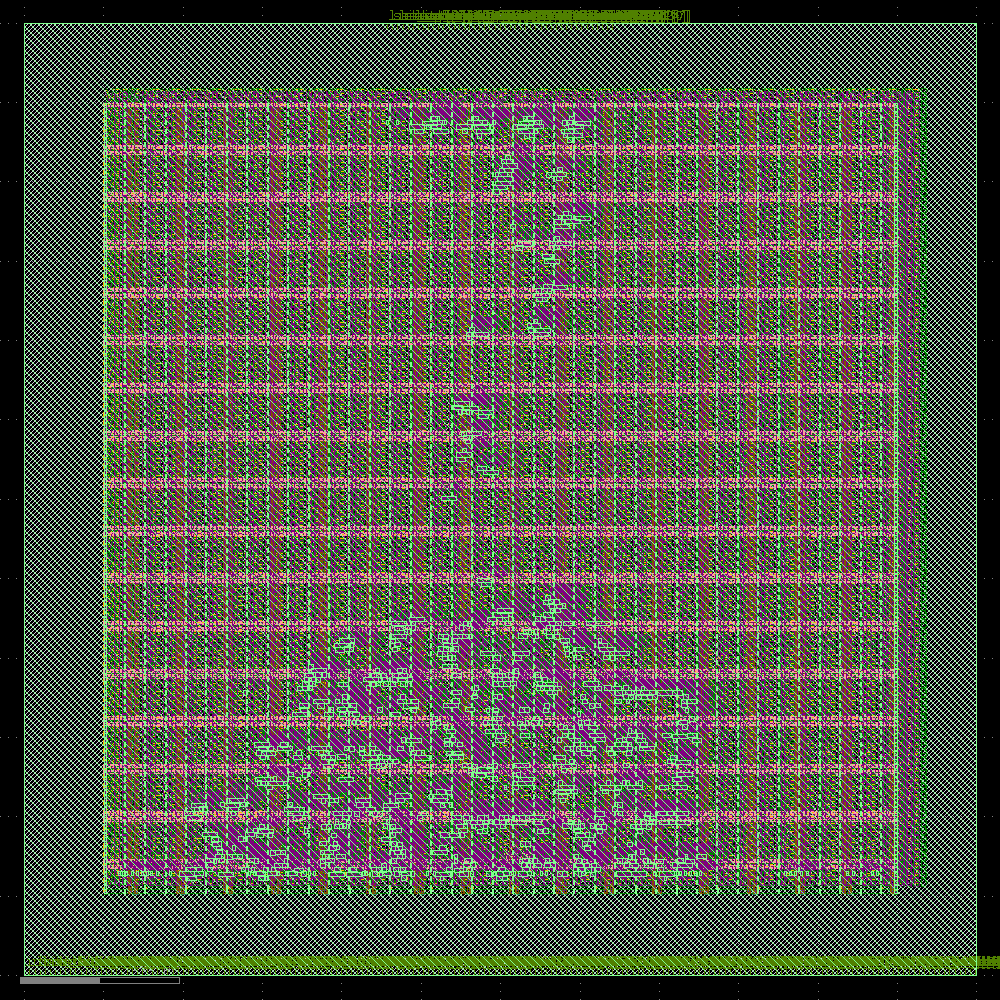

In [67]:
display(cts)

In [68]:
GlobalRouting = Step.factory.get("OpenROAD.GlobalRouting")

grt = GlobalRouting(state_in=cts.state_out)
grt.start()

───────────────────────────────────────────────── Global Routing ──────────────────────────────────────────────────

[14:27:27] VERBOSE  Running 'OpenROAD.GlobalRouting'…                                                  ]8;id=59270;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=444451;file:///content/openlane_ipynb/openlane/steps/step.py#1088\1088]8;;\

[14:27:27] VERBOSE  Logging subprocess to                                                              ]8;id=139459;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=553703;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\
                    ]8;id=246515;file:///content/openlane_run/10-openroad-globalrouting/openroad-globalrouting.log\openlane_run/]8;;\]8;id=879852;file:///content/openlane_run/10-openroad-globalrouting/openroad-globalrouting.log\10]8;;\]8;id=246515;file:///content/openlane_run/10-openroad-globalrouting/openroad-globalrouting.log\-openroad-globalrouting/openroad-globalrouting.log]8;;\…                             

Reading OpenROAD database at '/content/openlane_run/9-openroad-cts/hac_deskew_dut.odb'…

Reading library file at '/root/.volare/sky130A/libs.ref/sky130_fd_sc_hd/lib/sky130_fd_sc_hd__tt_025C_1v80.lib'…

Reading design constraints file at '/content/openlane_ipynb/openlane/scripts/base.sdc'…

[INFO] Using clock clk…

[INFO] Setting output delay to: 2

[INFO] Setting input delay to: 2

[INFO] Setting load to: 0.033442

[INFO] Setting clock uncertainty to: 0.25

[INFO] Setting clock transition to: 0.1499999999999999944488848768742172978818416595458984375

[INFO] Setting timing derate to: 5%

[INFO] Setting signal min routing layer to: met1 and clock min routing layer to met1.

[INFO] Setting signal max routing layer to: met5 and clock max routing layer to met5.

-congestion_iterations 50 -verbose

[INFO GRT-0020] Min routing layer: met1

[INFO GRT-0021] Max routing layer: met5

[INFO GRT-0022] Global adjustment: 30%

[INFO GRT-0023] Grid origin: (0, 0)

[INFO GRT-0043] No OR_DEFAULT vias defined.

[INFO GRT-0088] Layer li1     Track-Pitch = 0.4600  line-2-Via Pitch: 0.3400

[INFO GRT-0088] Layer met1    Track-Pitch = 0.3400  line-2-Via Pitch: 0.3400

[INFO GRT-0088] Layer met2    Track-Pitch = 0.4600  line-2-Via Pitch: 0.3500

[INFO GRT-0088] Layer met3    Track-Pitch = 0.6800  line-2-Via Pitch: 0.6150

[INFO GRT-0088] Layer met4    Track-Pitch = 0.9200  line-2-Via Pitch: 1.0400

[INFO GRT-0088] Layer met5    Track-Pitch = 3.4000  line-2-Via Pitch: 3.1100

[INFO GRT-0019] Found 10 clock nets.

[INFO GRT-0001] Minimum degree: 2

[INFO GRT-0002] Maximum degree: 102

[INFO GRT-0003] Macros: 0

[INFO GRT-0043] No OR_DEFAULT vias defined.

[INFO GRT-0004] Blockages: 1995

[INFO GRT-0053] Routing resources analysis:

Routing      Original      Derated      Resource

Layer     Direction    Resources     Resources    Reduction (%)

---------------------------------------------------------------

li1        Vertical            0             0          0.00%

met1       Horizontal     149554         81676          45.39%

met2       Vertical       112144         73040          34.87%

met3       Horizontal      74734         50812          32.01%

met4       Vertical        45064         24625          45.36%

met5       Horizontal      14878          6531          56.10%

---------------------------------------------------------------

[INFO GRT-0197] Via related to pin nodes: 4557

[INFO GRT-0198] Via related Steiner nodes: 102

[INFO GRT-0199] Via filling finished.

[INFO GRT-0111] Final number of vias: 5807

[INFO GRT-0112] Final usage 3D: 25668

[INFO GRT-0096] Final congestion report:

Layer         Resource        Demand        Usage (%)    Max H / Max V / Total Overflow

---------------------------------------------------------------------------------------

li1                  0             0            0.00%             0 /  0 /  0

met1             81676          3639            4.46%             0 /  0 /  0

met2             73040          4607            6.31%             0 /  0 /  0

met3             50812             1            0.00%             0 /  0 /  0

met4             24625             0            0.00%             0 /  0 /  0

met5              6531             0            0.00%             0 /  0 /  0

---------------------------------------------------------------------------------------

Total           236684          8247            3.48%             0 /  0 /  0

[INFO GRT-0018] Total wirelength: 76189 um

[INFO GRT-0014] Routed nets: 910

[INFO] Setting RC values…

Setting global connections for newly added cells…

[INFO] Setting global connections...

Writing OpenROAD database to '/content/openlane_run/10-openroad-globalrouting/hac_deskew_dut.odb'…

Writing layout to '/content/openlane_run/10-openroad-globalrouting/hac_deskew_dut.def'…

{'nl': Path('/content/openlane_run/9-openroad-cts/hac_deskew_dut.nl.v'), 'pnl': Path('/content/openlane_run/9-openroad-cts/hac_deskew_dut.pnl.v'), 'pnl-sdf-friendly': None, 'pnl-npc': None, 'def': Path('/content/openlane_run/10-openroad-globalrouting/hac_deskew_dut.def'), 'lef': None, 'openroad-lef': None, 'odb': Path('/content/openlane_run/10-openroad-globalrouting/hac_deskew_dut.odb'), 'sdc': Path('/content/openlane_run/9-openroad-cts/hac_deskew_dut.sdc'), 'sdf': None, 'spef': None, 'lib': None, 'spice': None, 'mag': None, 'gds': None, 'mag_gds': None, 'klayout_gds': None, 'json_h': None, 'vh': None, 'metrics': {'design__instance__count': 4371, 'design__instance__area': Decimal('14073.5'), 'design__instance_unmapped__count': 0, 'synthesis__check_error__count': 1, 'design__die__bbox': '0.0 0.0 600.0 600.0', 'design__core__bbox': '50.14 51.68 549.7 549.44', 'flow__warnings__count': 0, 'flow__errors__count': 0, 'design__io': 234, 'design__die__area': 360000, 'design__core__area': 248661, 'design__instance__count__stdcell': 4371, 'design__instance__area__stdcell': Decimal('14073.5'), 'design__instance__count__macros': 0, 'design__instance__area__macros': 0, 'design__instance__utilization': Decimal('0.0565971'), 'design__instance__utilization__stdcell': Decimal('0.0565971'), 'floorplan__design__io': 232, 'design__io__hpwl': 80969260, 'design__power_grid_violation__count__net:VGND': 0, 'design__power_grid_violation__count__net:VPWR': 0, 'design__power_grid_violation__count': 0, 'design__instance__displacement__total': Decimal('38.795'), 'design__instance__displacement__mean': Decimal('0.008'), 'design__instance__displacement__max': Decimal('6.11'), 'route__wirelength__estimated': Decimal('57354.5'), 'design__violations': 0, 'antenna__violating__nets': 4, 'antenna__violating__pins': 6}}

In [69]:
  DetailedRouting = Step.factory.get("OpenROAD.DetailedRouting")

  drt = DetailedRouting(state_in=grt.state_out)
  drt.start()

──────────────────────────────────────────────── Detailed Routing ─────────────────────────────────────────────────

[14:27:50] VERBOSE  Running 'OpenROAD.DetailedRouting'…                                                ]8;id=316857;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=776820;file:///content/openlane_ipynb/openlane/steps/step.py#1088\1088]8;;\

[14:27:50] INFO     Running TritonRoute with 2 threads…                                            ]8;id=91883;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=609383;file:///content/openlane_ipynb/openlane/steps/openroad.py#1619\1619]8;;\

[14:27:50] VERBOSE  Logging subprocess to                                                              ]8;id=650781;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=228698;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\
                    ]8;id=24441;file:///content/openlane_run/11-openroad-detailedrouting/openroad-detailedrouting.log\openlane_run/]8;;\]8;id=605682;file:///content/openlane_run/11-openroad-detailedrouting/openroad-detailedrouting.log\11]8;;\]8;id=24441;file:///content/openlane_run/11-openroad-detailedrouting/openroad-detailedrouting.log\-openroad-detailedrouting/openroad-detailedrouting.log]8;;\…                         

Reading OpenROAD database at '/content/openlane_run/10-openroad-globalrouting/hac_deskew_dut.odb'…

Reading library file at '/root/.volare/sky130A/libs.ref/sky130_fd_sc_hd/lib/sky130_fd_sc_hd__tt_025C_1v80.lib'…

Reading design constraints file at '/content/openlane_ipynb/openlane/scripts/base.sdc'…

[INFO] Using clock clk…

[INFO] Setting output delay to: 2

[INFO] Setting input delay to: 2

[INFO] Setting load to: 0.033442

[INFO] Setting clock uncertainty to: 0.25

[INFO] Setting clock transition to: 0.1499999999999999944488848768742172978818416595458984375

[INFO] Setting timing derate to: 5%

[INFO ORD-0030] Using 2 thread(s).

[INFO DRT-0149] Reading tech and libs.

[14:27:50] WARNING  [DRT-0349] LEF58_ENCLOSURE with no CUTCLASS is not supported. Skipping for      ]8;id=139373;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=620555;file:///content/openlane_ipynb/openlane/steps/openroad.py#235\235]8;;\
                    layer mcon                                                                                     

[14:27:50] WARNING  [DRT-0349] LEF58_ENCLOSURE with no CUTCLASS is not supported. Skipping for      ]8;id=5027;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=887217;file:///content/openlane_ipynb/openlane/steps/openroad.py#235\235]8;;\
                    layer mcon                                                                                     

[14:27:50] WARNING  [DRT-0349] LEF58_ENCLOSURE with no CUTCLASS is not supported. Skipping for      ]8;id=794360;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=940754;file:///content/openlane_ipynb/openlane/steps/openroad.py#235\235]8;;\
                    layer via                                                                                      

[14:27:50] WARNING  [DRT-0349] LEF58_ENCLOSURE with no CUTCLASS is not supported. Skipping for      ]8;id=60966;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=281935;file:///content/openlane_ipynb/openlane/steps/openroad.py#235\235]8;;\
                    layer via                                                                                      

[14:27:50] WARNING  [DRT-0349] LEF58_ENCLOSURE with no CUTCLASS is not supported. Skipping for      ]8;id=276517;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=904771;file:///content/openlane_ipynb/openlane/steps/openroad.py#235\235]8;;\
                    layer via2                                                                                     

[14:27:50] WARNING  [DRT-0349] LEF58_ENCLOSURE with no CUTCLASS is not supported. Skipping for      ]8;id=184860;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=476814;file:///content/openlane_ipynb/openlane/steps/openroad.py#235\235]8;;\
                    layer via2                                                                                     

[14:27:50] WARNING  [DRT-0349] LEF58_ENCLOSURE with no CUTCLASS is not supported. Skipping for      ]8;id=850890;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=544175;file:///content/openlane_ipynb/openlane/steps/openroad.py#235\235]8;;\
                    layer via3                                                                                     

[14:27:50] WARNING  [DRT-0349] LEF58_ENCLOSURE with no CUTCLASS is not supported. Skipping for      ]8;id=745769;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=543368;file:///content/openlane_ipynb/openlane/steps/openroad.py#235\235]8;;\
                    layer via3                                                                                     

[14:27:50] WARNING  [DRT-0349] LEF58_ENCLOSURE with no CUTCLASS is not supported. Skipping for      ]8;id=423711;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=399381;file:///content/openlane_ipynb/openlane/steps/openroad.py#235\235]8;;\
                    layer via4                                                                                     

[14:27:50] WARNING  [DRT-0349] LEF58_ENCLOSURE with no CUTCLASS is not supported. Skipping for      ]8;id=152683;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=715668;file:///content/openlane_ipynb/openlane/steps/openroad.py#235\235]8;;\
                    layer via4                                                                                     

Units:                1000

Number of layers:     13

Number of macros:     441

Number of vias:       29

Number of viarulegen: 25

[INFO DRT-0150] Reading design.

Design:                   hac_deskew_dut

Die area:                 ( 0 0 ) ( 600000 600000 )

Number of track patterns: 12

Number of DEF vias:       0

Number of components:     4737

Number of terminals:      234

Number of snets:          2

Number of nets:           942

[INFO DRT-0167] List of default vias:

Layer via

default via: M1M2_PR

Layer via2

default via: M2M3_PR

Layer via3

default via: M3M4_PR

Layer via4

default via: M4M5_PR

[INFO DRT-0162] Library cell analysis.

[INFO DRT-0163] Instance analysis.

[INFO DRT-0164] Number of unique instances = 148.

[INFO DRT-0168] Init region query.

[INFO DRT-0024]   Complete FR_MASTERSLICE.

[INFO DRT-0024]   Complete Fr_VIA.

[INFO DRT-0024]   Complete li1.

[INFO DRT-0024]   Complete mcon.

[INFO DRT-0024]   Complete met1.

[INFO DRT-0024]   Complete via.

[INFO DRT-0024]   Complete met2.

[INFO DRT-0024]   Complete via2.

[INFO DRT-0024]   Complete met3.

[INFO DRT-0024]   Complete via3.

[INFO DRT-0024]   Complete met4.

[INFO DRT-0024]   Complete via4.

[INFO DRT-0024]   Complete met5.

[INFO DRT-0033] FR_MASTERSLICE shape region query size = 0.

[INFO DRT-0033] FR_VIA shape region query size = 0.

[INFO DRT-0033] li1 shape region query size = 44548.

[INFO DRT-0033] mcon shape region query size = 0.

[INFO DRT-0033] met1 shape region query size = 14660.

[INFO DRT-0033] via shape region query size = 18216.

[INFO DRT-0033] met2 shape region query size = 6304.

[INFO DRT-0033] via2 shape region query size = 15180.

[INFO DRT-0033] met3 shape region query size = 9108.

[INFO DRT-0033] via3 shape region query size = 15180.

[INFO DRT-0033] met4 shape region query size = 3647.

[INFO DRT-0033] via4 shape region query size = 545.

[INFO DRT-0033] met5 shape region query size = 611.

[INFO DRT-0165] Start pin access.

[INFO DRT-0078]   Complete 550 pins.

[INFO DRT-0079]   Complete 100 unique inst patterns.

[INFO DRT-0081]   Complete 142 unique inst patterns.

[INFO DRT-0084]   Complete 654 groups.

#scanned instances     = 4737

#unique  instances     = 148

#stdCellGenAp          = 4034

#stdCellValidPlanarAp  = 59

#stdCellValidViaAp     = 3140

#stdCellPinNoAp        = 0

#stdCellPinCnt         = 2846

#instTermValidViaApCnt = 0

#macroGenAp            = 0

#macroValidPlanarAp    = 0

#macroValidViaAp       = 0

#macroNoAp             = 0

[INFO DRT-0166] Complete pin access.

[INFO DRT-0267] cpu time = 00:00:32, elapsed time = 00:00:21, memory = 130.83 (MB), peak = 245.04 (MB)

Number of guides:     6662

[INFO DRT-0169] Post process guides.

[INFO DRT-0176] GCELLGRID X 0 DO 86 STEP 6900 ;

[INFO DRT-0177] GCELLGRID Y 0 DO 86 STEP 6900 ;

[INFO DRT-0028]   Complete FR_MASTERSLICE.

[INFO DRT-0028]   Complete Fr_VIA.

[INFO DRT-0028]   Complete li1.

[INFO DRT-0028]   Complete mcon.

[INFO DRT-0028]   Complete met1.

[INFO DRT-0028]   Complete via.

[INFO DRT-0028]   Complete met2.

[INFO DRT-0028]   Complete via2.

[INFO DRT-0028]   Complete met3.

[INFO DRT-0028]   Complete via3.

[INFO DRT-0028]   Complete met4.

[INFO DRT-0028]   Complete via4.

[INFO DRT-0028]   Complete met5.

[INFO DRT-0178] Init guide query.

[INFO DRT-0035]   Complete FR_MASTERSLICE (guide).

[INFO DRT-0035]   Complete Fr_VIA (guide).

[INFO DRT-0035]   Complete li1 (guide).

[INFO DRT-0035]   Complete mcon (guide).

[INFO DRT-0035]   Complete met1 (guide).

[INFO DRT-0035]   Complete via (guide).

[INFO DRT-0035]   Complete met2 (guide).

[INFO DRT-0035]   Complete via2 (guide).

[INFO DRT-0035]   Complete met3 (guide).

[INFO DRT-0035]   Complete via3 (guide).

[INFO DRT-0035]   Complete met4 (guide).

[INFO DRT-0035]   Complete via4 (guide).

[INFO DRT-0035]   Complete met5 (guide).

[INFO DRT-0036] FR_MASTERSLICE guide region query size = 0.

[INFO DRT-0036] FR_VIA guide region query size = 0.

[INFO DRT-0036] li1 guide region query size = 2168.

[INFO DRT-0036] mcon guide region query size = 0.

[INFO DRT-0036] met1 guide region query size = 1903.

[INFO DRT-0036] via guide region query size = 0.

[INFO DRT-0036] met2 guide region query size = 1104.

[INFO DRT-0036] via2 guide region query size = 0.

[INFO DRT-0036] met3 guide region query size = 0.

[INFO DRT-0036] via3 guide region query size = 0.

[INFO DRT-0036] met4 guide region query size = 0.

[INFO DRT-0036] via4 guide region query size = 0.

[INFO DRT-0036] met5 guide region query size = 0.

[INFO DRT-0179] Init gr pin query.

[INFO DRT-0245] skipped writing guide updates to database.

[INFO DRT-0185] Post process initialize RPin region query.

[INFO DRT-0181] Start track assignment.

[INFO DRT-0184] Done with 3272 vertical wires in 2 frboxes and 1903 horizontal wires in 2 frboxes.

[INFO DRT-0186] Done with 252 vertical wires in 2 frboxes and 429 horizontal wires in 2 frboxes.

[INFO DRT-0182] Complete track assignment.

[INFO DRT-0267] cpu time = 00:00:01, elapsed time = 00:00:01, memory = 146.85 (MB), peak = 245.04 (MB)

[INFO DRT-0187] Start routing data preparation.

[INFO DRT-0267] cpu time = 00:00:00, elapsed time = 00:00:00, memory = 146.85 (MB), peak = 245.04 (MB)

[INFO DRT-0194] Start detail routing.

[INFO DRT-0195] Start 0th optimization iteration.

Completing 10% with 0 violations.

elapsed time = 00:00:00, memory = 154.71 (MB).

Completing 20% with 0 violations.

elapsed time = 00:00:01, memory = 166.33 (MB).

Completing 30% with 26 violations.

elapsed time = 00:00:01, memory = 180.92 (MB).

Completing 40% with 26 violations.

elapsed time = 00:00:03, memory = 185.43 (MB).

Completing 50% with 26 violations.

elapsed time = 00:00:03, memory = 190.90 (MB).

Completing 60% with 96 violations.

elapsed time = 00:00:05, memory = 196.54 (MB).

Completing 70% with 96 violations.

elapsed time = 00:00:06, memory = 196.54 (MB).

Completing 80% with 131 violations.

elapsed time = 00:00:06, memory = 196.63 (MB).

Completing 90% with 131 violations.

elapsed time = 00:00:09, memory = 199.44 (MB).

Completing 100% with 169 violations.

elapsed time = 00:00:09, memory = 199.44 (MB).

[INFO DRT-0199]   Number of violations = 314.

Viol/Layer         li1   mcon   met1   met2

Cut Spacing          0      1      0      0

Metal Spacing        2      0     39      5

Min Hole             0      0      4      0

Recheck              0      0    108     37

Short                0      0    112      6

[INFO DRT-0267] cpu time = 00:00:19, elapsed time = 00:00:11, memory = 534.40 (MB), peak = 534.22 (MB)

Total wire length = 60714 um.

Total wire length on LAYER li1 = 0 um.

Total wire length on LAYER met1 = 25826 um.

Total wire length on LAYER met2 = 34888 um.

Total wire length on LAYER met3 = 0 um.

Total wire length on LAYER met4 = 0 um.

Total wire length on LAYER met5 = 0 um.

Total number of vias = 5792.

Up-via summary (total 5792):

-----------------------

FR_MASTERSLICE       0

li1    2708

met1    3084

met2       0

met3       0

met4       0

-----------------------

5792

[INFO DRT-0195] Start 1st optimization iteration.

Completing 10% with 314 violations.

elapsed time = 00:00:00, memory = 534.40 (MB).

Completing 20% with 314 violations.

elapsed time = 00:00:02, memory = 534.40 (MB).

Completing 30% with 233 violations.

elapsed time = 00:00:03, memory = 534.40 (MB).

Completing 40% with 233 violations.

elapsed time = 00:00:04, memory = 534.40 (MB).

Completing 50% with 233 violations.

elapsed time = 00:00:05, memory = 534.40 (MB).

Completing 60% with 151 violations.

elapsed time = 00:00:06, memory = 534.40 (MB).

Completing 70% with 151 violations.

elapsed time = 00:00:07, memory = 534.40 (MB).

Completing 80% with 99 violations.

elapsed time = 00:00:07, memory = 534.40 (MB).

Completing 90% with 99 violations.

elapsed time = 00:00:08, memory = 534.40 (MB).

Completing 100% with 42 violations.

elapsed time = 00:00:09, memory = 534.40 (MB).

[INFO DRT-0199]   Number of violations = 42.

Viol/Layer        met1   met2

Metal Spacing        9      3

Short               28      2

[INFO DRT-0267] cpu time = 00:00:15, elapsed time = 00:00:09, memory = 534.48 (MB), peak = 534.34 (MB)

Total wire length = 60527 um.

Total wire length on LAYER li1 = 0 um.

Total wire length on LAYER met1 = 25761 um.

Total wire length on LAYER met2 = 34765 um.

Total wire length on LAYER met3 = 0 um.

Total wire length on LAYER met4 = 0 um.

Total wire length on LAYER met5 = 0 um.

Total number of vias = 5774.

Up-via summary (total 5774):

-----------------------

FR_MASTERSLICE       0

li1    2704

met1    3070

met2       0

met3       0

met4       0

-----------------------

5774

[INFO DRT-0195] Start 2nd optimization iteration.

Completing 10% with 42 violations.

elapsed time = 00:00:00, memory = 534.48 (MB).

Completing 20% with 42 violations.

elapsed time = 00:00:01, memory = 534.68 (MB).

Completing 30% with 44 violations.

elapsed time = 00:00:01, memory = 534.68 (MB).

Completing 40% with 44 violations.

elapsed time = 00:00:02, memory = 534.68 (MB).

Completing 50% with 44 violations.

elapsed time = 00:00:02, memory = 534.68 (MB).

Completing 60% with 37 violations.

elapsed time = 00:00:02, memory = 534.68 (MB).

Completing 70% with 37 violations.

elapsed time = 00:00:03, memory = 534.68 (MB).

Completing 80% with 16 violations.

elapsed time = 00:00:03, memory = 534.68 (MB).

Completing 90% with 16 violations.

elapsed time = 00:00:03, memory = 534.68 (MB).

Completing 100% with 20 violations.

elapsed time = 00:00:04, memory = 534.68 (MB).

[INFO DRT-0199]   Number of violations = 20.

Viol/Layer        met1   met2

Metal Spacing        4      0

Short               15      1

[INFO DRT-0267] cpu time = 00:00:07, elapsed time = 00:00:04, memory = 534.68 (MB), peak = 534.59 (MB)

Total wire length = 60496 um.

Total wire length on LAYER li1 = 0 um.

Total wire length on LAYER met1 = 25744 um.

Total wire length on LAYER met2 = 34751 um.

Total wire length on LAYER met3 = 0 um.

Total wire length on LAYER met4 = 0 um.

Total wire length on LAYER met5 = 0 um.

Total number of vias = 5769.

Up-via summary (total 5769):

-----------------------

FR_MASTERSLICE       0

li1    2704

met1    3065

met2       0

met3       0

met4       0

-----------------------

5769

[INFO DRT-0195] Start 3rd optimization iteration.

Completing 10% with 20 violations.

elapsed time = 00:00:00, memory = 534.75 (MB).

Completing 20% with 20 violations.

elapsed time = 00:00:00, memory = 534.75 (MB).

Completing 30% with 12 violations.

elapsed time = 00:00:00, memory = 534.75 (MB).

Completing 40% with 12 violations.

elapsed time = 00:00:00, memory = 534.75 (MB).

Completing 50% with 12 violations.

elapsed time = 00:00:00, memory = 534.75 (MB).

Completing 60% with 11 violations.

elapsed time = 00:00:00, memory = 534.75 (MB).

Completing 70% with 11 violations.

elapsed time = 00:00:01, memory = 534.75 (MB).

Completing 80% with 1 violations.

elapsed time = 00:00:01, memory = 534.75 (MB).

Completing 90% with 1 violations.

elapsed time = 00:00:01, memory = 534.75 (MB).

Completing 100% with 0 violations.

elapsed time = 00:00:02, memory = 534.75 (MB).

[INFO DRT-0199]   Number of violations = 0.

[INFO DRT-0267] cpu time = 00:00:02, elapsed time = 00:00:02, memory = 534.75 (MB), peak = 534.72 (MB)

Total wire length = 60502 um.

Total wire length on LAYER li1 = 0 um.

Total wire length on LAYER met1 = 25691 um.

Total wire length on LAYER met2 = 34764 um.

Total wire length on LAYER met3 = 46 um.

Total wire length on LAYER met4 = 0 um.

Total wire length on LAYER met5 = 0 um.

Total number of vias = 5786.

Up-via summary (total 5786):

-----------------------

FR_MASTERSLICE       0

li1    2704

met1    3077

met2       5

met3       0

met4       0

-----------------------

5786

[INFO DRT-0198] Complete detail routing.

Total wire length = 60502 um.

Total wire length on LAYER li1 = 0 um.

Total wire length on LAYER met1 = 25691 um.

Total wire length on LAYER met2 = 34764 um.

Total wire length on LAYER met3 = 46 um.

Total wire length on LAYER met4 = 0 um.

Total wire length on LAYER met5 = 0 um.

Total number of vias = 5786.

Up-via summary (total 5786):

-----------------------

FR_MASTERSLICE       0

li1    2704

met1    3077

met2       5

met3       0

met4       0

-----------------------

5786

[INFO DRT-0267] cpu time = 00:00:45, elapsed time = 00:00:28, memory = 534.75 (MB), peak = 534.72 (MB)

[INFO DRT-0180] Post processing.

Setting global connections for newly added cells…

[INFO] Setting global connections...

Writing OpenROAD database to '/content/openlane_run/11-openroad-detailedrouting/hac_deskew_dut.odb'…

Writing netlist to '/content/openlane_run/11-openroad-detailedrouting/hac_deskew_dut.nl.v'…

Writing powered netlist to '/content/openlane_run/11-openroad-detailedrouting/hac_deskew_dut.pnl.v'…

Writing layout to '/content/openlane_run/11-openroad-detailedrouting/hac_deskew_dut.def'…

Writing timing constraints to '/content/openlane_run/11-openroad-detailedrouting/hac_deskew_dut.sdc'…

{'nl': Path('/content/openlane_run/11-openroad-detailedrouting/hac_deskew_dut.nl.v'), 'pnl': Path('/content/openlane_run/11-openroad-detailedrouting/hac_deskew_dut.pnl.v'), 'pnl-sdf-friendly': None, 'pnl-npc': None, 'def': Path('/content/openlane_run/11-openroad-detailedrouting/hac_deskew_dut.def'), 'lef': None, 'openroad-lef': None, 'odb': Path('/content/openlane_run/11-openroad-detailedrouting/hac_deskew_dut.odb'), 'sdc': Path('/content/openlane_run/11-openroad-detailedrouting/hac_deskew_dut.sdc'), 'sdf': None, 'spef': None, 'lib': None, 'spice': None, 'mag': None, 'gds': None, 'mag_gds': None, 'klayout_gds': None, 'json_h': None, 'vh': None, 'metrics': {'design__instance__count': 4371, 'design__instance__area': Decimal('14073.5'), 'design__instance_unmapped__count': 0, 'synthesis__check_error__count': 1, 'design__die__bbox': '0.0 0.0 600.0 600.0', 'design__core__bbox': '50.14 51.68 549.7 549.44', 'flow__warnings__count': 10, 'flow__errors__count': 0, 'design__io': 234, 'design__die__area': 360000, 'design__core__area': 248661, 'design__instance__count__stdcell': 4371, 'design__instance__area__stdcell': Decimal('14073.5'), 'design__instance__count__macros': 0, 'design__instance__area__macros': 0, 'design__instance__utilization': Decimal('0.0565971'), 'design__instance__utilization__stdcell': Decimal('0.0565971'), 'floorplan__design__io': 232, 'design__io__hpwl': 80969260, 'design__power_grid_violation__count__net:VGND': 0, 'design__power_grid_violation__count__net:VPWR': 0, 'design__power_grid_violation__count': 0, 'design__instance__displacement__total': Decimal('38.795'), 'design__instance__displacement__mean': Decimal('0.008'), 'design__instance__displacement__max': Decimal('6.11'), 'route__wirelength__estimated': Decimal('57354.5'), 'design__violations': 0, 'antenna__violating__nets': 4, 'antenna__violating__pins': 6, 'route__net': 942, 'route__net__special': 2, 'route__drc_errors__iter:1': 314, 'route__wirelength__iter:1': 60714, 'route__drc_errors__iter:2': 42, 'route__wirelength__iter:2': 60527, 'route__drc_errors__iter:3': 20, 'route__wirelength__iter:3': 60496, 'route__drc_errors__iter:4': 0, 'route__wirelength__iter:4': 60502, 'route__drc_errors': 0, 'route__wirelength': 60502, 'route__vias': 5786, 'route__vias__singlecut': 5786, 'route__vias__multicut': 0}}

──────────────────────────────────────────── Render Image (w/ KLayout) ────────────────────────────────────────────

[14:28:45] VERBOSE  Running 'KLayout.Render'…                                                          ]8;id=788604;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=651492;file:///content/openlane_ipynb/openlane/steps/step.py#1088\1088]8;;\

[14:28:45] VERBOSE  Logging subprocess to ]8;id=66034;file:///tmp/openlane_klayout_tmp_sr5jae_2/klayout-render.log\..]8;;\]8;id=724988;file:///tmp/openlane_klayout_tmp_sr5jae_2/klayout-render.log\/tmp/openlane_klayout_tmp_sr5jae_2/]8;;\]8;id=270145;file:///tmp/openlane_klayout_tmp_sr5jae_2/klayout-render.log\klayout-render.log]8;;\…     ]8;id=8090;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=843624;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\

#### Time Elapsed: 52.48s
#### Views updated:
* Verilog Netlist
* Powered Verilog Netlist
* Design Exchange Format
* OpenDB Database
* Design Constraints
#### Preview:
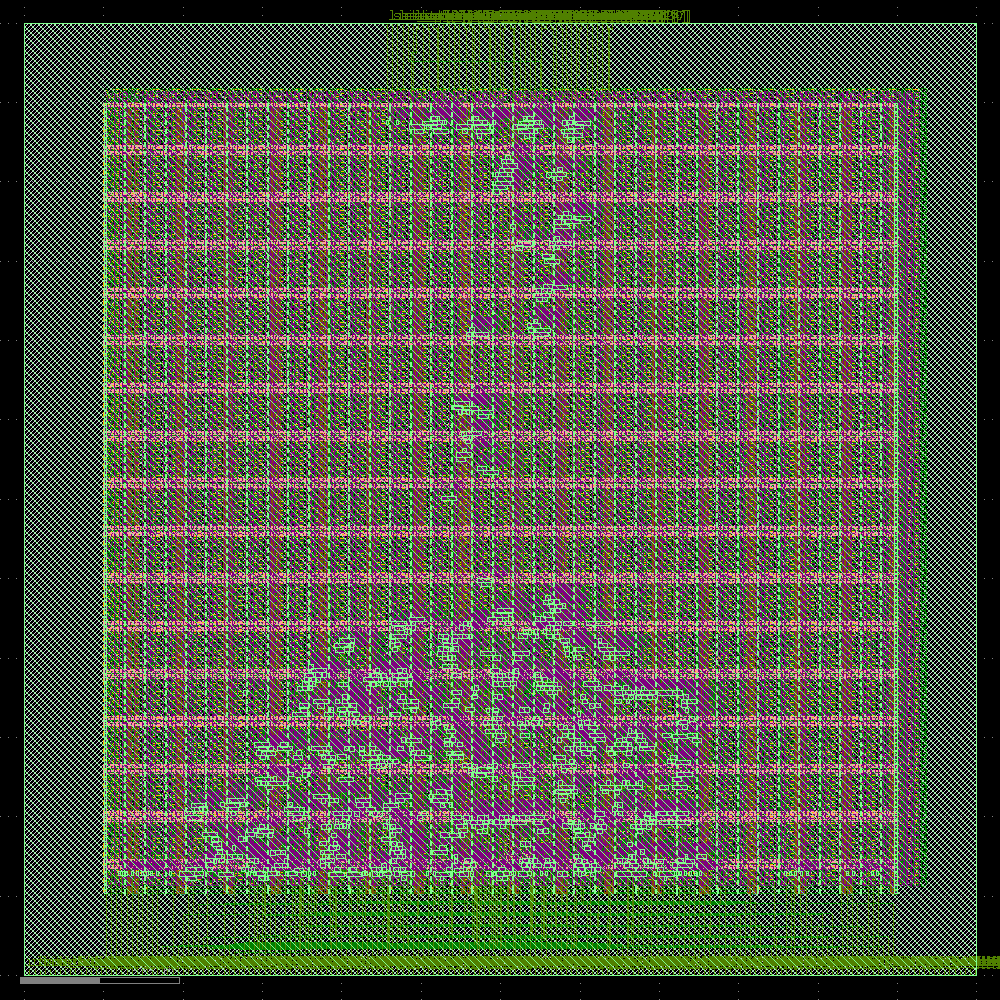

In [70]:
display(drt)

In [71]:
FillInsertion = Step.factory.get("OpenROAD.FillInsertion")

fill = FillInsertion(state_in=drt.state_out)
fill.start()

───────────────────────────────────────────────── Fill Insertion ──────────────────────────────────────────────────

[14:29:00] VERBOSE  Running 'OpenROAD.FillInsertion'…                                                  ]8;id=221586;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=402612;file:///content/openlane_ipynb/openlane/steps/step.py#1088\1088]8;;\

[14:29:00] VERBOSE  Logging subprocess to                                                              ]8;id=300156;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=320901;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\
                    ]8;id=15379;file:///content/openlane_run/12-openroad-fillinsertion/openroad-fillinsertion.log\openlane_run/]8;;\]8;id=8380;file:///content/openlane_run/12-openroad-fillinsertion/openroad-fillinsertion.log\12]8;;\]8;id=15379;file:///content/openlane_run/12-openroad-fillinsertion/openroad-fillinsertion.log\-openroad-fillinsertion/openroad-fillinsertion.log]8;;\…                             

Reading OpenROAD database at '/content/openlane_run/11-openroad-detailedrouting/hac_deskew_dut.odb'…

Reading library file at '/root/.volare/sky130A/libs.ref/sky130_fd_sc_hd/lib/sky130_fd_sc_hd__tt_025C_1v80.lib'…

Reading design constraints file at '/content/openlane_ipynb/openlane/scripts/base.sdc'…

[INFO] Using clock clk…

[INFO] Setting output delay to: 2

[INFO] Setting input delay to: 2

[INFO] Setting load to: 0.033442

[INFO] Setting clock uncertainty to: 0.25

[INFO] Setting clock transition to: 0.1499999999999999944488848768742172978818416595458984375

[INFO] Setting timing derate to: 5%

sky130_ef_sc_hd__decap_12 sky130_fd_sc_hd__decap_8 sky130_fd_sc_hd__decap_6 sky130_fd_sc_hd__decap_4               
sky130_fd_sc_hd__decap_3 sky130_fd_sc_hd__fill*

[INFO DPL-0001] Placed 20788 filler instances.

Setting global connections for newly added cells…

[INFO] Setting global connections...

Writing OpenROAD database to '/content/openlane_run/12-openroad-fillinsertion/hac_deskew_dut.odb'…

Writing netlist to '/content/openlane_run/12-openroad-fillinsertion/hac_deskew_dut.nl.v'…

Writing powered netlist to '/content/openlane_run/12-openroad-fillinsertion/hac_deskew_dut.pnl.v'…

Writing layout to '/content/openlane_run/12-openroad-fillinsertion/hac_deskew_dut.def'…

Writing timing constraints to '/content/openlane_run/12-openroad-fillinsertion/hac_deskew_dut.sdc'…

{'nl': Path('/content/openlane_run/12-openroad-fillinsertion/hac_deskew_dut.nl.v'), 'pnl': Path('/content/openlane_run/12-openroad-fillinsertion/hac_deskew_dut.pnl.v'), 'pnl-sdf-friendly': None, 'pnl-npc': None, 'def': Path('/content/openlane_run/12-openroad-fillinsertion/hac_deskew_dut.def'), 'lef': None, 'openroad-lef': None, 'odb': Path('/content/openlane_run/12-openroad-fillinsertion/hac_deskew_dut.odb'), 'sdc': Path('/content/openlane_run/12-openroad-fillinsertion/hac_deskew_dut.sdc'), 'sdf': None, 'spef': None, 'lib': None, 'spice': None, 'mag': None, 'gds': None, 'mag_gds': None, 'klayout_gds': None, 'json_h': None, 'vh': None, 'metrics': {'design__instance__count': 4371, 'design__instance__area': Decimal('14073.5'), 'design__instance_unmapped__count': 0, 'synthesis__check_error__count': 1, 'design__die__bbox': '0.0 0.0 600.0 600.0', 'design__core__bbox': '50.14 51.68 549.7 549.44', 'flow__warnings__count': 0, 'flow__errors__count': 0, 'design__io': 234, 'design__die__area': 360000, 'design__core__area': 248661, 'design__instance__count__stdcell': 4371, 'design__instance__area__stdcell': Decimal('14073.5'), 'design__instance__count__macros': 0, 'design__instance__area__macros': 0, 'design__instance__utilization': Decimal('0.0565971'), 'design__instance__utilization__stdcell': Decimal('0.0565971'), 'floorplan__design__io': 232, 'design__io__hpwl': 80969260, 'design__power_grid_violation__count__net:VGND': 0, 'design__power_grid_violation__count__net:VPWR': 0, 'design__power_grid_violation__count': 0, 'design__instance__displacement__total': Decimal('38.795'), 'design__instance__displacement__mean': Decimal('0.008'), 'design__instance__displacement__max': Decimal('6.11'), 'route__wirelength__estimated': Decimal('57354.5'), 'design__violations': 0, 'antenna__violating__nets': 4, 'antenna__violating__pins': 6, 'route__net': 942, 'route__net__special': 2, 'route__drc_errors__iter:1': 314, 'route__wirelength__iter:1': 60714, 'route__drc_errors__iter:2': 42, 'route__wirelength__iter:2': 60527, 'route__drc_errors__iter:3': 20, 'route__wirelength__iter:3': 60496, 'route__drc_errors__iter:4': 0, 'route__wirelength__iter:4': 60502, 'route__drc_errors': 0, 'route__wirelength': 60502, 'route__vias': 5786, 'route__vias__singlecut': 5786, 'route__vias__multicut': 0}}

──────────────────────────────────────────── Render Image (w/ KLayout) ────────────────────────────────────────────

[14:29:09] VERBOSE  Running 'KLayout.Render'…                                                          ]8;id=760596;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=163074;file:///content/openlane_ipynb/openlane/steps/step.py#1088\1088]8;;\

[14:29:09] VERBOSE  Logging subprocess to ]8;id=528775;file:///tmp/openlane_klayout_tmp_cpl4fzu_/klayout-render.log\..]8;;\]8;id=500431;file:///tmp/openlane_klayout_tmp_cpl4fzu_/klayout-render.log\/tmp/openlane_klayout_tmp_cpl4fzu_/]8;;\]8;id=937264;file:///tmp/openlane_klayout_tmp_cpl4fzu_/klayout-render.log\klayout-render.log]8;;\…     ]8;id=732401;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=993910;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\

#### Time Elapsed: 1.52s
#### Views updated:
* Verilog Netlist
* Powered Verilog Netlist
* Design Exchange Format
* OpenDB Database
* Design Constraints
#### Preview:
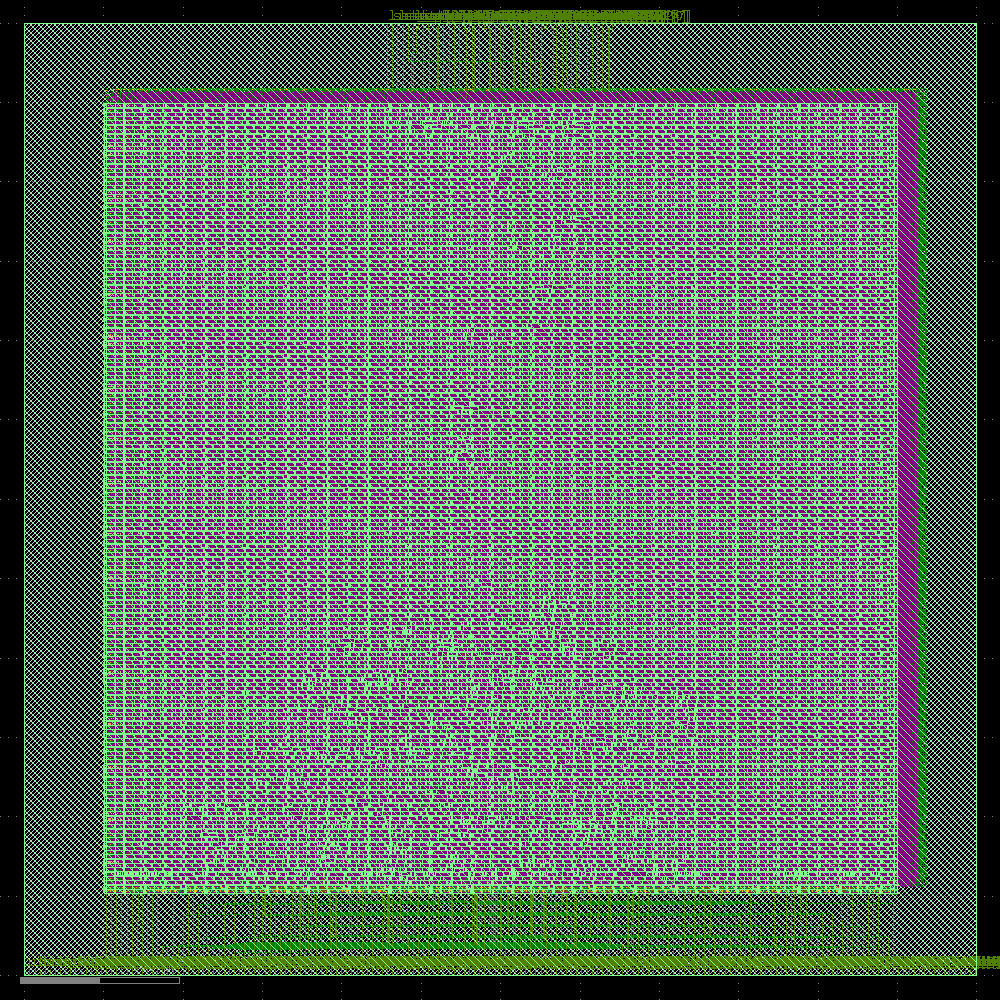

In [72]:
display(fill)

In [73]:
RCX = Step.factory.get("OpenROAD.RCX")

rcx = RCX(state_in=fill.state_out)
rcx.start()

─────────────────────────────────── Parasitic Resistance/Capacitance Extraction ───────────────────────────────────

[14:29:27] VERBOSE  Running 'OpenROAD.RCX'…                                                            ]8;id=229338;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=197384;file:///content/openlane_ipynb/openlane/steps/step.py#1088\1088]8;;\

[14:29:27] INFO     Running RCX for corners matching min_*                                         ]8;id=699449;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=414661;file:///content/openlane_ipynb/openlane/steps/openroad.py#1748\1748]8;;\
                    (/content/openlane_run/13-openroad-rcx/min/rcx.log)…                                           

[14:29:27] INFO     Running RCX for corners matching nom_*                                         ]8;id=903717;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=210457;file:///content/openlane_ipynb/openlane/steps/openroad.py#1748\1748]8;;\
                    (/content/openlane_run/13-openroad-rcx/nom/rcx.log)…                                           

[14:29:27] VERBOSE  Logging subprocess to ]8;id=410125;file:///content/openlane_run/13-openroad-rcx/min/rcx.log\openlane_run/]8;;\]8;id=549594;file:///content/openlane_run/13-openroad-rcx/min/rcx.log\13]8;;\]8;id=410125;file:///content/openlane_run/13-openroad-rcx/min/rcx.log\-openroad-rcx/min/rcx.log]8;;\…                    ]8;id=572115;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=573017;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\

[14:29:27] VERBOSE  Logging subprocess to ]8;id=484853;file:///content/openlane_run/13-openroad-rcx/nom/rcx.log\openlane_run/]8;;\]8;id=197461;file:///content/openlane_run/13-openroad-rcx/nom/rcx.log\13]8;;\]8;id=484853;file:///content/openlane_run/13-openroad-rcx/nom/rcx.log\-openroad-rcx/nom/rcx.log]8;;\…                    ]8;id=275110;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=516077;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\

[14:29:30] INFO     Finished RCX for corners matching min_*.                                       ]8;id=267482;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=528962;file:///content/openlane_ipynb/openlane/steps/openroad.py#1757\1757]8;;\

[14:29:30] INFO     Running RCX for corners matching max_*                                         ]8;id=578223;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=610533;file:///content/openlane_ipynb/openlane/steps/openroad.py#1748\1748]8;;\
                    (/content/openlane_run/13-openroad-rcx/max/rcx.log)…                                           

[14:29:30] VERBOSE  Logging subprocess to ]8;id=307115;file:///content/openlane_run/13-openroad-rcx/max/rcx.log\openlane_run/]8;;\]8;id=680794;file:///content/openlane_run/13-openroad-rcx/max/rcx.log\13]8;;\]8;id=307115;file:///content/openlane_run/13-openroad-rcx/max/rcx.log\-openroad-rcx/max/rcx.log]8;;\…                    ]8;id=317478;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=687538;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\

[14:29:30] INFO     Finished RCX for corners matching nom_*.                                       ]8;id=713655;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=558284;file:///content/openlane_ipynb/openlane/steps/openroad.py#1757\1757]8;;\

[14:29:32] INFO     Finished RCX for corners matching max_*.                                       ]8;id=322393;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=529635;file:///content/openlane_ipynb/openlane/steps/openroad.py#1757\1757]8;;\

{'nl': Path('/content/openlane_run/12-openroad-fillinsertion/hac_deskew_dut.nl.v'), 'pnl': Path('/content/openlane_run/12-openroad-fillinsertion/hac_deskew_dut.pnl.v'), 'pnl-sdf-friendly': None, 'pnl-npc': None, 'def': Path('/content/openlane_run/12-openroad-fillinsertion/hac_deskew_dut.def'), 'lef': None, 'openroad-lef': None, 'odb': Path('/content/openlane_run/12-openroad-fillinsertion/hac_deskew_dut.odb'), 'sdc': Path('/content/openlane_run/12-openroad-fillinsertion/hac_deskew_dut.sdc'), 'sdf': None, 'spef': {'nom_*': Path('/content/openlane_run/13-openroad-rcx/nom/hac_deskew_dut.nom.spef'), 'min_*': Path('/content/openlane_run/13-openroad-rcx/min/hac_deskew_dut.min.spef'), 'max_*': Path('/content/openlane_run/13-openroad-rcx/max/hac_deskew_dut.max.spef')}, 'lib': None, 'spice': None, 'mag': None, 'gds': None, 'mag_gds': None, 'klayout_gds': None, 'json_h': None, 'vh': None, 'metrics': {'design__instance__count': 4371, 'design__instance__area': Decimal('14073.5'), 'design__instance_unmapped__count': 0, 'synthesis__check_error__count': 1, 'design__die__bbox': '0.0 0.0 600.0 600.0', 'design__core__bbox': '50.14 51.68 549.7 549.44', 'flow__warnings__count': 0, 'flow__errors__count': 0, 'design__io': 234, 'design__die__area': 360000, 'design__core__area': 248661, 'design__instance__count__stdcell': 4371, 'design__instance__area__stdcell': Decimal('14073.5'), 'design__instance__count__macros': 0, 'design__instance__area__macros': 0, 'design__instance__utilization': Decimal('0.0565971'), 'design__instance__utilization__stdcell': Decimal('0.0565971'), 'floorplan__design__io': 232, 'design__io__hpwl': 80969260, 'design__power_grid_violation__count__net:VGND': 0, 'design__power_grid_violation__count__net:VPWR': 0, 'design__power_grid_violation__count': 0, 'design__instance__displacement__total': Decimal('38.795'), 'design__instance__displacement__mean': Decimal('0.008'), 'design__instance__displacement__max': Decimal('6.11'), 'route__wirelength__estimated': Decimal('57354.5'), 'design__violations': 0, 'antenna__violating__nets': 4, 'antenna__violating__pins': 6, 'route__net': 942, 'route__net__special': 2, 'route__drc_errors__iter:1': 314, 'route__wirelength__iter:1': 60714, 'route__drc_errors__iter:2': 42, 'route__wirelength__iter:2': 60527, 'route__drc_errors__iter:3': 20, 'route__wirelength__iter:3': 60496, 'route__drc_errors__iter:4': 0, 'route__wirelength__iter:4': 60502, 'route__drc_errors': 0, 'route__wirelength': 60502, 'route__vias': 5786, 'route__vias__singlecut': 5786, 'route__vias__multicut': 0}}

In [74]:
STAPostPNR = Step.factory.get("OpenROAD.STAPostPNR")

sta_post_pnr = STAPostPNR(state_in=rcx.state_out)
sta_post_pnr.start()

──────────────────────────────────────── Static Timing Analysis (Post-PnR) ────────────────────────────────────────

[14:29:57] VERBOSE  Running 'OpenROAD.STAPostPNR'…                                                     ]8;id=678706;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=172293;file:///content/openlane_ipynb/openlane/steps/step.py#1088\1088]8;;\

[14:29:57] INFO     Starting STA for the nom_tt_025C_1v80 timing corner…                            ]8;id=154781;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=940076;file:///content/openlane_ipynb/openlane/steps/openroad.py#561\561]8;;\

[14:29:57] INFO     Starting STA for the nom_ss_100C_1v60 timing corner…                            ]8;id=45187;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=877977;file:///content/openlane_ipynb/openlane/steps/openroad.py#561\561]8;;\

[14:29:57] VERBOSE  Logging subprocess to                                                              ]8;id=364908;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=869477;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\
                    ]8;id=60284;file:///content/openlane_run/14-openroad-stapostpnr/nom_tt_025C_1v80/sta.log\openlane_run/]8;;\]8;id=982472;file:///content/openlane_run/14-openroad-stapostpnr/nom_tt_025C_1v80/sta.log\14]8;;\]8;id=60284;file:///content/openlane_run/14-openroad-stapostpnr/nom_tt_025C_1v80/sta.log\-openroad-stapostpnr/nom_tt_025C_1v80/sta.log]8;;\…                                  

[14:29:57] VERBOSE  Logging subprocess to                                                              ]8;id=609008;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=688180;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\
                    ]8;id=70255;file:///content/openlane_run/14-openroad-stapostpnr/nom_ss_100C_1v60/sta.log\openlane_run/]8;;\]8;id=675885;file:///content/openlane_run/14-openroad-stapostpnr/nom_ss_100C_1v60/sta.log\14]8;;\]8;id=70255;file:///content/openlane_run/14-openroad-stapostpnr/nom_ss_100C_1v60/sta.log\-openroad-stapostpnr/nom_ss_100C_1v60/sta.log]8;;\…                                  

[14:30:00] INFO     Finished STA for the nom_tt_025C_1v80 timing corner.                            ]8;id=24079;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=58294;file:///content/openlane_ipynb/openlane/steps/openroad.py#576\576]8;;\

[14:30:00] INFO     Finished STA for the nom_ss_100C_1v60 timing corner.                            ]8;id=27108;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=51818;file:///content/openlane_ipynb/openlane/steps/openroad.py#576\576]8;;\

[14:30:00] VERBOSE  Logging subprocess to                                                              ]8;id=682088;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=847409;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\
                    ]8;id=572548;file:///content/openlane_run/14-openroad-stapostpnr/nom_tt_025C_1v80/filter_unannotated.log\openlane_run/]8;;\]8;id=581728;file:///content/openlane_run/14-openroad-stapostpnr/nom_tt_025C_1v80/filter_unannotated.log\14]8;;\]8;id=572548;file:///content/openlane_run/14-openroad-stapostpnr/nom_tt_025C_1v80/filter_unannotated.log\-openroad-stapostpnr/nom_tt_025C_1v80/filter_unannotated.log]8;;\…                   

[14:30:00] VERBOSE  Logging subprocess to                                                              ]8;id=462806;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=383349;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\
                    ]8;id=633679;file:///content/openlane_run/14-openroad-stapostpnr/nom_ss_100C_1v60/filter_unannotated.log\openlane_run/]8;;\]8;id=875230;file:///content/openlane_run/14-openroad-stapostpnr/nom_ss_100C_1v60/filter_unannotated.log\14]8;;\]8;id=633679;file:///content/openlane_run/14-openroad-stapostpnr/nom_ss_100C_1v60/filter_unannotated.log\-openroad-stapostpnr/nom_ss_100C_1v60/filter_unannotated.log]8;;\…                   

[14:30:02] INFO     Starting STA for the nom_ff_n40C_1v95 timing corner…                            ]8;id=72841;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=873908;file:///content/openlane_ipynb/openlane/steps/openroad.py#561\561]8;;\

[14:30:02] VERBOSE  Logging subprocess to                                                              ]8;id=156995;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=361419;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\
                    ]8;id=71024;file:///content/openlane_run/14-openroad-stapostpnr/nom_ff_n40C_1v95/sta.log\openlane_run/]8;;\]8;id=409353;file:///content/openlane_run/14-openroad-stapostpnr/nom_ff_n40C_1v95/sta.log\14]8;;\]8;id=71024;file:///content/openlane_run/14-openroad-stapostpnr/nom_ff_n40C_1v95/sta.log\-openroad-stapostpnr/nom_ff_n40C_1v95/sta.log]8;;\…                                  

[14:30:02] INFO     Starting STA for the min_tt_025C_1v80 timing corner…                            ]8;id=316613;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=845321;file:///content/openlane_ipynb/openlane/steps/openroad.py#561\561]8;;\

[14:30:02] VERBOSE  Logging subprocess to                                                              ]8;id=516169;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=825451;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\
                    ]8;id=130997;file:///content/openlane_run/14-openroad-stapostpnr/min_tt_025C_1v80/sta.log\openlane_run/]8;;\]8;id=861377;file:///content/openlane_run/14-openroad-stapostpnr/min_tt_025C_1v80/sta.log\14]8;;\]8;id=130997;file:///content/openlane_run/14-openroad-stapostpnr/min_tt_025C_1v80/sta.log\-openroad-stapostpnr/min_tt_025C_1v80/sta.log]8;;\…                                  

[14:30:05] INFO     Finished STA for the min_tt_025C_1v80 timing corner.                            ]8;id=386787;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=951586;file:///content/openlane_ipynb/openlane/steps/openroad.py#576\576]8;;\

[14:30:05] VERBOSE  Logging subprocess to                                                              ]8;id=19005;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=823322;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\
                    ]8;id=797394;file:///content/openlane_run/14-openroad-stapostpnr/min_tt_025C_1v80/filter_unannotated.log\openlane_run/]8;;\]8;id=575519;file:///content/openlane_run/14-openroad-stapostpnr/min_tt_025C_1v80/filter_unannotated.log\14]8;;\]8;id=797394;file:///content/openlane_run/14-openroad-stapostpnr/min_tt_025C_1v80/filter_unannotated.log\-openroad-stapostpnr/min_tt_025C_1v80/filter_unannotated.log]8;;\…                   

[14:30:07] INFO     Finished STA for the nom_ff_n40C_1v95 timing corner.                            ]8;id=185351;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=276813;file:///content/openlane_ipynb/openlane/steps/openroad.py#576\576]8;;\

[14:30:07] VERBOSE  Logging subprocess to                                                              ]8;id=90176;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=744009;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\
                    ]8;id=824122;file:///content/openlane_run/14-openroad-stapostpnr/nom_ff_n40C_1v95/filter_unannotated.log\openlane_run/]8;;\]8;id=600244;file:///content/openlane_run/14-openroad-stapostpnr/nom_ff_n40C_1v95/filter_unannotated.log\14]8;;\]8;id=824122;file:///content/openlane_run/14-openroad-stapostpnr/nom_ff_n40C_1v95/filter_unannotated.log\-openroad-stapostpnr/nom_ff_n40C_1v95/filter_unannotated.log]8;;\…                   

[14:30:07] INFO     Starting STA for the min_ss_100C_1v60 timing corner…                            ]8;id=77066;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=189971;file:///content/openlane_ipynb/openlane/steps/openroad.py#561\561]8;;\

[14:30:07] VERBOSE  Logging subprocess to                                                              ]8;id=156011;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=171352;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\
                    ]8;id=529977;file:///content/openlane_run/14-openroad-stapostpnr/min_ss_100C_1v60/sta.log\openlane_run/]8;;\]8;id=840013;file:///content/openlane_run/14-openroad-stapostpnr/min_ss_100C_1v60/sta.log\14]8;;\]8;id=529977;file:///content/openlane_run/14-openroad-stapostpnr/min_ss_100C_1v60/sta.log\-openroad-stapostpnr/min_ss_100C_1v60/sta.log]8;;\…                                  

[14:30:09] INFO     Starting STA for the min_ff_n40C_1v95 timing corner…                            ]8;id=370580;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=304621;file:///content/openlane_ipynb/openlane/steps/openroad.py#561\561]8;;\

[14:30:09] VERBOSE  Logging subprocess to                                                              ]8;id=507185;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=608319;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\
                    ]8;id=618126;file:///content/openlane_run/14-openroad-stapostpnr/min_ff_n40C_1v95/sta.log\openlane_run/]8;;\]8;id=38135;file:///content/openlane_run/14-openroad-stapostpnr/min_ff_n40C_1v95/sta.log\14]8;;\]8;id=618126;file:///content/openlane_run/14-openroad-stapostpnr/min_ff_n40C_1v95/sta.log\-openroad-stapostpnr/min_ff_n40C_1v95/sta.log]8;;\…                                  

[14:30:11] INFO     Finished STA for the min_ss_100C_1v60 timing corner.                            ]8;id=495123;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=364799;file:///content/openlane_ipynb/openlane/steps/openroad.py#576\576]8;;\

[14:30:11] VERBOSE  Logging subprocess to                                                              ]8;id=992283;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=530101;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\
                    ]8;id=803291;file:///content/openlane_run/14-openroad-stapostpnr/min_ss_100C_1v60/filter_unannotated.log\openlane_run/]8;;\]8;id=759786;file:///content/openlane_run/14-openroad-stapostpnr/min_ss_100C_1v60/filter_unannotated.log\14]8;;\]8;id=803291;file:///content/openlane_run/14-openroad-stapostpnr/min_ss_100C_1v60/filter_unannotated.log\-openroad-stapostpnr/min_ss_100C_1v60/filter_unannotated.log]8;;\…                   

[14:30:12] INFO     Starting STA for the max_tt_025C_1v80 timing corner…                            ]8;id=148713;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=617982;file:///content/openlane_ipynb/openlane/steps/openroad.py#561\561]8;;\

[14:30:12] VERBOSE  Logging subprocess to                                                              ]8;id=855776;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=713517;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\
                    ]8;id=378328;file:///content/openlane_run/14-openroad-stapostpnr/max_tt_025C_1v80/sta.log\openlane_run/]8;;\]8;id=453982;file:///content/openlane_run/14-openroad-stapostpnr/max_tt_025C_1v80/sta.log\14]8;;\]8;id=378328;file:///content/openlane_run/14-openroad-stapostpnr/max_tt_025C_1v80/sta.log\-openroad-stapostpnr/max_tt_025C_1v80/sta.log]8;;\…                                  

[14:30:14] INFO     Finished STA for the min_ff_n40C_1v95 timing corner.                            ]8;id=685592;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=917883;file:///content/openlane_ipynb/openlane/steps/openroad.py#576\576]8;;\

[14:30:14] VERBOSE  Logging subprocess to                                                              ]8;id=95587;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=573642;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\
                    ]8;id=943470;file:///content/openlane_run/14-openroad-stapostpnr/min_ff_n40C_1v95/filter_unannotated.log\openlane_run/]8;;\]8;id=788887;file:///content/openlane_run/14-openroad-stapostpnr/min_ff_n40C_1v95/filter_unannotated.log\14]8;;\]8;id=943470;file:///content/openlane_run/14-openroad-stapostpnr/min_ff_n40C_1v95/filter_unannotated.log\-openroad-stapostpnr/min_ff_n40C_1v95/filter_unannotated.log]8;;\…                   

[14:30:15] INFO     Starting STA for the max_ss_100C_1v60 timing corner…                            ]8;id=707191;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=586218;file:///content/openlane_ipynb/openlane/steps/openroad.py#561\561]8;;\

[14:30:15] VERBOSE  Logging subprocess to                                                              ]8;id=52473;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=429436;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\
                    ]8;id=709456;file:///content/openlane_run/14-openroad-stapostpnr/max_ss_100C_1v60/sta.log\openlane_run/]8;;\]8;id=363112;file:///content/openlane_run/14-openroad-stapostpnr/max_ss_100C_1v60/sta.log\14]8;;\]8;id=709456;file:///content/openlane_run/14-openroad-stapostpnr/max_ss_100C_1v60/sta.log\-openroad-stapostpnr/max_ss_100C_1v60/sta.log]8;;\…                                  

[14:30:15] INFO     Finished STA for the max_tt_025C_1v80 timing corner.                            ]8;id=727575;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=552752;file:///content/openlane_ipynb/openlane/steps/openroad.py#576\576]8;;\

[14:30:15] VERBOSE  Logging subprocess to                                                              ]8;id=736112;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=477841;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\
                    ]8;id=989668;file:///content/openlane_run/14-openroad-stapostpnr/max_tt_025C_1v80/filter_unannotated.log\openlane_run/]8;;\]8;id=389806;file:///content/openlane_run/14-openroad-stapostpnr/max_tt_025C_1v80/filter_unannotated.log\14]8;;\]8;id=989668;file:///content/openlane_run/14-openroad-stapostpnr/max_tt_025C_1v80/filter_unannotated.log\-openroad-stapostpnr/max_tt_025C_1v80/filter_unannotated.log]8;;\…                   

[14:30:17] INFO     Starting STA for the max_ff_n40C_1v95 timing corner…                            ]8;id=281894;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=459576;file:///content/openlane_ipynb/openlane/steps/openroad.py#561\561]8;;\

[14:30:17] VERBOSE  Logging subprocess to                                                              ]8;id=98663;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=896445;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\
                    ]8;id=565374;file:///content/openlane_run/14-openroad-stapostpnr/max_ff_n40C_1v95/sta.log\openlane_run/]8;;\]8;id=268770;file:///content/openlane_run/14-openroad-stapostpnr/max_ff_n40C_1v95/sta.log\14]8;;\]8;id=565374;file:///content/openlane_run/14-openroad-stapostpnr/max_ff_n40C_1v95/sta.log\-openroad-stapostpnr/max_ff_n40C_1v95/sta.log]8;;\…                                  

[14:30:18] INFO     Finished STA for the max_ss_100C_1v60 timing corner.                            ]8;id=719897;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=985753;file:///content/openlane_ipynb/openlane/steps/openroad.py#576\576]8;;\

[14:30:18] VERBOSE  Logging subprocess to                                                              ]8;id=112704;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=184894;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\
                    ]8;id=729034;file:///content/openlane_run/14-openroad-stapostpnr/max_ss_100C_1v60/filter_unannotated.log\openlane_run/]8;;\]8;id=643288;file:///content/openlane_run/14-openroad-stapostpnr/max_ss_100C_1v60/filter_unannotated.log\14]8;;\]8;id=729034;file:///content/openlane_run/14-openroad-stapostpnr/max_ss_100C_1v60/filter_unannotated.log\-openroad-stapostpnr/max_ss_100C_1v60/filter_unannotated.log]8;;\…                   

[14:30:21] INFO     Finished STA for the max_ff_n40C_1v95 timing corner.                            ]8;id=126391;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=535107;file:///content/openlane_ipynb/openlane/steps/openroad.py#576\576]8;;\

[14:30:21] VERBOSE  Logging subprocess to                                                              ]8;id=691110;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=708240;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\
                    ]8;id=307941;file:///content/openlane_run/14-openroad-stapostpnr/max_ff_n40C_1v95/filter_unannotated.log\openlane_run/]8;;\]8;id=771654;file:///content/openlane_run/14-openroad-stapostpnr/max_ff_n40C_1v95/filter_unannotated.log\14]8;;\]8;id=307941;file:///content/openlane_run/14-openroad-stapostpnr/max_ff_n40C_1v95/filter_unannotated.log\-openroad-stapostpnr/max_ff_n40C_1v95/filter_unannotated.log]8;;\…                   

┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━━┓
┃                      ┃       ┃       ┃      ┃       ┃ of   ┃       ┃      ┃       ┃      ┃ of    ┃      ┃       ┃
┃                      ┃       ┃ Reg   ┃      ┃       ┃ whi… ┃       ┃ Reg  ┃       ┃      ┃ which ┃      ┃       ┃
┃                      ┃ Hold  ┃ to    ┃      ┃ Hold  ┃ reg  ┃ Setup ┃ to   ┃       ┃ Set… ┃ reg   ┃ Max  ┃ Max   ┃
┃                      ┃ Worst ┃ Reg   ┃ Hold ┃ Vio   ┃ to   ┃ Worst ┃ Reg  ┃ Setup ┃ Vio  ┃ to    ┃ Cap  ┃ Slew  ┃
┃ Corner/Group         ┃ Slack ┃ Paths ┃ TNS  ┃ Count ┃ reg  ┃ Slack ┃ Pat… ┃ TNS   ┃ Cou… ┃ reg   ┃ Vio… ┃ Viol… ┃
┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━━┩
│ Overall              │ 0.07… │ 0.07… │ 0.0… │ 0     │ 0    │ -2.1… │ 0.4… │ -19.… │ 69   │ 0     │ 10   │ 341   │
│ nom_tt_025C_1v80     │ 0.26… │ 0.26… │ 0.0… │ 0     │ 0    │ 2.73… │ 5.3… │ 0.00… │ 0    │ 0     │ 2    │ 169   │
│ nom_ss_100C_1v60     │ 0.78… │ 0.78… │ 0.0… │ 0     │ 0    │ -2.0… │ 0.5… │ -17.… │ 23   │ 0     │ 10   │ 318   │
│ nom_ff_n40C_1v95     │ 0.07… │ 0.07… │ 0.0… │ 0     │ 0    │ 4.52… │ 6.9… │ 0.00… │ 0    │ 0     │ 2    │ 147   │
│ min_tt_025C_1v80     │ 0.26… │ 0.26… │ 0.0… │ 0     │ 0    │ 2.82… │ 5.3… │ 0.00… │ 0    │ 0     │ 2    │ 163   │
│ min_ss_100C_1v60     │ 0.78… │ 0.78… │ 0.0… │ 0     │ 0    │ -1.9… │ 0.5… │ -14.… │ 21   │ 0     │ 6    │ 306   │
│ min_ff_n40C_1v95     │ 0.07… │ 0.07… │ 0.0… │ 0     │ 0    │ 4.59… │ 6.9… │ 0.00… │ 0    │ 0     │ 2    │ 145   │
│ max_tt_025C_1v80     │ 0.26… │ 0.26… │ 0.0… │ 0     │ 0    │ 2.65… │ 5.2… │ 0.00… │ 0    │ 0     │ 2    │ 177   │
│ max_ss_100C_1v60     │ 0.79… │ 0.79… │ 0.0… │ 0     │ 0    │ -2.1… │ 0.4… │ -19.… │ 25   │ 0     │ 10   │ 341   │
│ max_ff_n40C_1v95     │ 0.07… │ 0.07… │ 0.0… │ 0     │ 0    │ 4.46… │ 6.9… │ 0.00… │ 0    │ 0     │ 2    │ 151   │
└──────────────────────┴───────┴───────┴──────┴───────┴──────┴───────┴──────┴───────┴──────┴───────┴──────┴───────┘

┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┓
┃                      ┃ Hold     ┃ Reg to   ┃          ┃          ┃ of which  ┃ Setup    ┃           ┃          ┃           ┃ of which ┃           ┃          ┃
┃                      ┃ Worst    ┃ Reg      ┃          ┃ Hold Vio ┃ reg to    ┃ Worst    ┃ Reg to    ┃ Setup    ┃ Setup Vio ┃ reg to   ┃ Max Cap   ┃ Max Slew ┃
┃ Corner/Group         ┃ Slack    ┃ Paths    ┃ Hold TNS ┃ Count    ┃ reg       ┃ Slack    ┃ Reg Paths ┃ TNS      ┃ Count     ┃ reg      ┃ Violatio… ┃ Violati… ┃
┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━┩
│ Overall              │ 0.0735   │ 0.0736   │ 0.0000   │ 0        │ 0         │ -2.1899  │ 0.4526    │ -19.8988 │ 69        │ 0        │ 10        │ 341      │
│ nom_tt_025C_1v80     │ 0.2642   │ 0.2642   │ 0.0000   │ 0        │ 0         │ 2.7369   │ 5.3029    │ 0.0000   │ 0         │ 0        │ 2         │ 169      │
│ nom_ss_100C_1v60     │ 0.7897   │ 0.7897   │ 0.0000   │ 0        │ 0         │ -2.0560  │ 0.5189    │ -17.2819 │ 23        │ 0        │ 10        │ 318      │
│ nom_ff_n40C_1v95     │ 0.0755   │ 0.0755   │ 0.0000   │ 0        │ 0         │ 4.5235   │ 6.9443    │ 0.0000   │ 0         │ 0        │ 2         │ 147      │
│ min_tt_025C_1v80     │ 0.2613   │ 0.2613   │ 0.0000   │ 0        │ 0         │ 2.8209   │ 5.3592    │ 0.0000   │ 0         │ 0        │ 2         │ 163      │
│ min_ss_100C_1v60     │ 0.7849   │ 0.7849   │ 0.0000   │ 0        │ 0         │ -1.9050  │ 0.5895    │ -14.4983 │ 21        │ 0        │ 6         │ 306      │
│ min_ff_n40C_1v95     │ 0.0735   │ 0.0736   │ 0.0000   │ 0        │ 0         │ 4.5987   │ 6.9741    │ 0.0000   │ 0         │ 0        │ 2         │ 145      │
│ max_tt_025C_1v80     │ 0.2670   │ 0.2670   │ 0.0000   │ 0        │ 0         │ 2.6585   │ 5.2552    │ 0.0000   │ 0         │ 0        │ 2         │ 177      │
│ max_ss_100C_1v60     │ 0.7945   │ 0.7945   │ 0.0000   │ 0        │ 0         │ -2.1899  │ 0.4526    │ -19.8988 │ 25        │ 0        │ 10        │ 341      │
│ max_ff_n40C_1v95     │ 0.0777   │ 0.0777   │ 0.0000   │ 0        │ 0         │ 4.4603   │ 6.9173    │ 0.0000   │ 0         │ 0        │ 2         │ 151      │
└──────────────────────┴──────────┴──────────┴──────────┴──────────┴───────────┴──────────┴───────────┴──────────┴───────────┴──────────┴───────────┴──────────┘

{'nl': Path('/content/openlane_run/12-openroad-fillinsertion/hac_deskew_dut.nl.v'), 'pnl': Path('/content/openlane_run/12-openroad-fillinsertion/hac_deskew_dut.pnl.v'), 'pnl-sdf-friendly': None, 'pnl-npc': None, 'def': Path('/content/openlane_run/12-openroad-fillinsertion/hac_deskew_dut.def'), 'lef': None, 'openroad-lef': None, 'odb': Path('/content/openlane_run/12-openroad-fillinsertion/hac_deskew_dut.odb'), 'sdc': Path('/content/openlane_run/12-openroad-fillinsertion/hac_deskew_dut.sdc'), 'sdf': {'nom_tt_025C_1v80': Path('/content/openlane_run/14-openroad-stapostpnr/nom_tt_025C_1v80/hac_deskew_dut__nom_tt_025C_1v80.sdf'), 'nom_ss_100C_1v60': Path('/content/openlane_run/14-openroad-stapostpnr/nom_ss_100C_1v60/hac_deskew_dut__nom_ss_100C_1v60.sdf'), 'nom_ff_n40C_1v95': Path('/content/openlane_run/14-openroad-stapostpnr/nom_ff_n40C_1v95/hac_deskew_dut__nom_ff_n40C_1v95.sdf'), 'min_tt_025C_1v80': Path('/content/openlane_run/14-openroad-stapostpnr/min_tt_025C_1v80/hac_deskew_dut__min_tt_025C_1v80.sdf'), 'min_ss_100C_1v60': Path('/content/openlane_run/14-openroad-stapostpnr/min_ss_100C_1v60/hac_deskew_dut__min_ss_100C_1v60.sdf'), 'min_ff_n40C_1v95': Path('/content/openlane_run/14-openroad-stapostpnr/min_ff_n40C_1v95/hac_deskew_dut__min_ff_n40C_1v95.sdf'), 'max_tt_025C_1v80': Path('/content/openlane_run/14-openroad-stapostpnr/max_tt_025C_1v80/hac_deskew_dut__max_tt_025C_1v80.sdf'), 'max_ss_100C_1v60': Path('/content/openlane_run/14-openroad-stapostpnr/max_ss_100C_1v60/hac_deskew_dut__max_ss_100C_1v60.sdf'), 'max_ff_n40C_1v95': Path('/content/openlane_run/14-openroad-stapostpnr/max_ff_n40C_1v95/hac_deskew_dut__max_ff_n40C_1v95.sdf')}, 'spef': {'nom_*': Path('/content/openlane_run/13-openroad-rcx/nom/hac_deskew_dut.nom.spef'), 'min_*': Path('/content/openlane_run/13-openroad-rcx/min/hac_deskew_dut.min.spef'), 'max_*': Path('/content/openlane_run/13-openroad-rcx/max/hac_deskew_dut.max.spef')}, 'lib': {'nom_tt_025C_1v80': Path('/content/openlane_run/14-openroad-stapostpnr/nom_tt_025C_1v80/hac_deskew_dut__nom_tt_025C_1v80.lib'), 'nom_ss_100C_1v60': Path('/content/openlane_run/14-openroad-stapostpnr/nom_ss_100C_1v60/hac_deskew_dut__nom_ss_100C_1v60.lib'), 'nom_ff_n40C_1v95': Path('/content/openlane_run/14-openroad-stapostpnr/nom_ff_n40C_1v95/hac_deskew_dut__nom_ff_n40C_1v95.lib'), 'min_tt_025C_1v80': Path('/content/openlane_run/14-openroad-stapostpnr/min_tt_025C_1v80/hac_deskew_dut__min_tt_025C_1v80.lib'), 'min_ss_100C_1v60': Path('/content/openlane_run/14-openroad-stapostpnr/min_ss_100C_1v60/hac_deskew_dut__min_ss_100C_1v60.lib'), 'min_ff_n40C_1v95': Path('/content/openlane_run/14-openroad-stapostpnr/min_ff_n40C_1v95/hac_deskew_dut__min_ff_n40C_1v95.lib'), 'max_tt_025C_1v80': Path('/content/openlane_run/14-openroad-stapostpnr/max_tt_025C_1v80/hac_deskew_dut__max_tt_025C_1v80.lib'), 'max_ss_100C_1v60': Path('/content/openlane_run/14-openroad-stapostpnr/max_ss_100C_1v60/hac_deskew_dut__max_ss_100C_1v60.lib'), 'max_ff_n40C_1v95': Path('/content/openlane_run/14-openroad-stapostpnr/max_ff_n40C_1v95/hac_deskew_dut__max_ff_n40C_1v95.lib')}, 'spice': None, 'mag': None, 'gds': None, 'mag_gds': None, 'klayout_gds': None, 'json_h': None, 'vh': None, 'metrics': {'design__instance__count': 4371, 'design__instance__area': Decimal('14073.5'), 'design__instance_unmapped__count': 0, 'synthesis__check_error__count': 1, 'design__die__bbox': '0.0 0.0 600.0 600.0', 'design__core__bbox': '50.14 51.68 549.7 549.44', 'flow__warnings__count': 1, 'flow__errors__count': 0, 'design__io': 234, 'design__die__area': 360000, 'design__core__area': 248661, 'design__instance__count__stdcell': 4371, 'design__instance__area__stdcell': Decimal('14073.5'), 'design__instance__count__macros': 0, 'design__instance__area__macros': 0, 'design__instance__utilization': Decimal('0.0565971'), 'design__instance__utilization__stdcell': Decimal('0.0565971'), 'floorplan__design__io': 232, 'design__io__hpwl': 80969260, 'design__power_grid_violation__count__net:VGND': 0, 'design__power_gri

In [80]:
RepairHold = Step.factory.get("OpenROAD.RepairHold")


In [81]:
RepairTiming = Step.factory.get("OpenROAD.RepairTiming")


In [83]:
CTS = Step.factory.get("OpenROAD.CTS")

cts = CTS(
    state_in=dpl.state_out,
    CTS_REPAIR_HOLD=True,
    CTS_TARGET_SKEW=0.05,
)
cts.start()

cts_fixed_state = cts.state_out


────────────────────────────────────────────── Clock Tree Synthesis ───────────────────────────────────────────────

[14:40:38] VERBOSE  Running 'OpenROAD.CTS'…                                                            ]8;id=118226;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=201326;file:///content/openlane_ipynb/openlane/steps/step.py#1088\1088]8;;\

[14:40:38] VERBOSE  Logging subprocess to ]8;id=188952;file:///content/openlane_run/15-openroad-cts/openroad-cts.log\openlane_run/]8;;\]8;id=439809;file:///content/openlane_run/15-openroad-cts/openroad-cts.log\15]8;;\]8;id=188952;file:///content/openlane_run/15-openroad-cts/openroad-cts.log\-openroad-cts/openroad-cts.log]8;;\…               ]8;id=956236;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=497965;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\

Reading timing models for corner nom_tt_025C_1v80…

Reading timing library for the 'nom_tt_025C_1v80' corner at                                                        
'/root/.volare/sky130A/libs.ref/sky130_fd_sc_hd/lib/sky130_fd_sc_hd__tt_025C_1v80.lib'…

Reading timing models for corner nom_ff_n40C_1v95…

Reading timing library for the 'nom_ff_n40C_1v95' corner at                                                        
'/root/.volare/sky130A/libs.ref/sky130_fd_sc_hd/lib/sky130_fd_sc_hd__ff_n40C_1v95.lib'…

Reading timing models for corner nom_ss_100C_1v60…

Reading timing library for the 'nom_ss_100C_1v60' corner at                                                        
'/root/.volare/sky130A/libs.ref/sky130_fd_sc_hd/lib/sky130_fd_sc_hd__ss_100C_1v60.lib'…

Reading OpenROAD database at '/content/openlane_run/8-openroad-detailedplacement/hac_deskew_dut.odb'…

Reading design constraints file at '/content/openlane_ipynb/openlane/scripts/base.sdc'…

[INFO] Using clock clk…

[INFO] Setting output delay to: 2

[INFO] Setting input delay to: 2

[INFO] Setting load to: 0.033442

[INFO] Setting clock uncertainty to: 0.25

[INFO] Setting clock transition to: 0.1499999999999999944488848768742172978818416595458984375

[INFO] Setting timing derate to: 5%

[INFO] Setting RC values…

[INFO] Configuring cts characterization…

[INFO] Performing clock tree synthesis…

[INFO] Looking for the following net(s): clk

[INFO] Running Clock Tree Synthesis…

[INFO CTS-0050] Root buffer is sky130_fd_sc_hd__clkbuf_16.

[INFO CTS-0051] Sink buffer is sky130_fd_sc_hd__clkbuf_8.

[INFO CTS-0052] The following clock buffers will be used for CTS:

sky130_fd_sc_hd__clkbuf_2

sky130_fd_sc_hd__clkbuf_4

sky130_fd_sc_hd__clkbuf_8

[INFO CTS-0049] Characterization buffer is sky130_fd_sc_hd__clkbuf_8.

[INFO CTS-0007] Net "clk" found for clock "clk".

[INFO CTS-0010]  Clock net "clk" has 101 sinks.

[INFO CTS-0008] TritonCTS found 1 clock nets.

[INFO CTS-0097] Characterization used 3 buffer(s) types.

[INFO CTS-0200] 0 placement blockages have been identified.

[INFO CTS-0201] 0 placed hard macros will be treated like blockages.

[INFO CTS-0027] Generating H-Tree topology for net clk.

[INFO CTS-0028]  Total number of sinks: 101.

[INFO CTS-0029]  Sinks will be clustered in groups of up to 25 and with maximum cluster diameter of 50.0 um.

[INFO CTS-0030]  Number of static layers: 0.

[INFO CTS-0020]  Wire segment unit: 13600  dbu (13 um).

[INFO CTS-0023]  Original sink region: [(105145, 63860), (419715, 537140)].

[INFO CTS-0024]  Normalized sink region: [(7.73125, 4.69559), (30.8614, 39.4956)].

[INFO CTS-0025]     Width:  23.1301.

[INFO CTS-0026]     Height: 34.8000.

Level 1

Direction: Vertical

Sinks per sub-region: 51

Sub-region size: 23.1301 X 17.4000

[INFO CTS-0034]     Segment length (rounded): 8.

Level 2

Direction: Horizontal

Sinks per sub-region: 26

Sub-region size: 11.5651 X 17.4000

[INFO CTS-0034]     Segment length (rounded): 6.

Level 3

Direction: Vertical

Sinks per sub-region: 13

Sub-region size: 11.5651 X 8.7000

[INFO CTS-0034]     Segment length (rounded): 4.

[INFO CTS-0032]  Stop criterion found. Max number of sinks is 15.

[INFO CTS-0035]  Number of sinks covered: 101.

[INFO CTS-0018]     Created 9 clock buffers.

[INFO CTS-0012]     Minimum number of buffers in the clock path: 2.

[INFO CTS-0013]     Maximum number of buffers in the clock path: 2.

[INFO CTS-0015]     Created 9 clock nets.

[INFO CTS-0016]     Fanout distribution for the current clock = 7:1, 9:1, 11:1, 12:2, 13:1, 15:1, 22:1..

[INFO CTS-0017]     Max level of the clock tree: 3.

[INFO CTS-0098] Clock net "clk"

[INFO CTS-0099]  Sinks 108

[INFO CTS-0100]  Leaf buffers 0

[INFO CTS-0101]  Average sink wire length 778.97 um

[INFO CTS-0102]  Path depth 2 - 2

[INFO CTS-0207]  Leaf load cells 7

[INFO] Repairing long wires on clock nets…

[INFO RSZ-0058] Using max wire length 6335um.

Setting global connections for newly added cells…

[INFO] Setting global connections...

Writing OpenROAD database to '/content/openlane_run/15-openroad-cts/hac_deskew_dut.odb'…

Writing netlist to '/content/openlane_run/15-openroad-cts/hac_deskew_dut.nl.v'…

Writing powered netlist to '/content/openlane_run/15-openroad-cts/hac_deskew_dut.pnl.v'…

Writing layout to '/content/openlane_run/15-openroad-cts/hac_deskew_dut.def'…

Writing timing constraints to '/content/openlane_run/15-openroad-cts/hac_deskew_dut.sdc'…

[INFO] Legalizing…

Placement Analysis

---------------------------------

total displacement         38.8 u

average displacement        0.0 u

max displacement            6.1 u

original HPWL           56609.5 u

legalized HPWL          57354.5 u

delta HPWL                    1 %

[INFO DPL-0020] Mirrored 359 instances

[INFO DPL-0021] HPWL before           57354.5 u

[INFO DPL-0022] HPWL after            56578.4 u

[INFO DPL-0023] HPWL delta               -1.4 %

Setting global connections for newly added cells…

[INFO] Setting global connections...

Writing OpenROAD database to '/content/openlane_run/15-openroad-cts/hac_deskew_dut.odb'…

Writing netlist to '/content/openlane_run/15-openroad-cts/hac_deskew_dut.nl.v'…

Writing powered netlist to '/content/openlane_run/15-openroad-cts/hac_deskew_dut.pnl.v'…

Writing layout to '/content/openlane_run/15-openroad-cts/hac_deskew_dut.def'…

Writing timing constraints to '/content/openlane_run/15-openroad-cts/hac_deskew_dut.sdc'…

In [84]:
# Routing
GlobalRouting = Step.factory.get("OpenROAD.GlobalRouting")
grt = GlobalRouting(state_in=cts_fixed_state)
grt.start()

DetailedRouting = Step.factory.get("OpenROAD.DetailedRouting")
drt = DetailedRouting(state_in=grt.state_out)
drt.start()

FillInsertion = Step.factory.get("OpenROAD.FillInsertion")
fill = FillInsertion(state_in=drt.state_out)
fill.start()

# RCX
RCX = Step.factory.get("OpenROAD.RCX")
rcx = RCX(state_in=fill.state_out)
rcx.start()

# Post-PNR STA
STAPostPNR = Step.factory.get("OpenROAD.STAPostPNR")
sta_post_pnr = STAPostPNR(state_in=rcx.state_out)
sta_post_pnr.start()


───────────────────────────────────────────────── Global Routing ──────────────────────────────────────────────────

[14:41:19] VERBOSE  Running 'OpenROAD.GlobalRouting'…                                                  ]8;id=532209;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=845953;file:///content/openlane_ipynb/openlane/steps/step.py#1088\1088]8;;\

[14:41:19] VERBOSE  Logging subprocess to                                                              ]8;id=448310;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=758322;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\
                    ]8;id=989484;file:///content/openlane_run/16-openroad-globalrouting/openroad-globalrouting.log\openlane_run/]8;;\]8;id=404412;file:///content/openlane_run/16-openroad-globalrouting/openroad-globalrouting.log\16]8;;\]8;id=989484;file:///content/openlane_run/16-openroad-globalrouting/openroad-globalrouting.log\-openroad-globalrouting/openroad-globalrouting.log]8;;\…                             

Reading OpenROAD database at '/content/openlane_run/15-openroad-cts/hac_deskew_dut.odb'…

Reading library file at '/root/.volare/sky130A/libs.ref/sky130_fd_sc_hd/lib/sky130_fd_sc_hd__tt_025C_1v80.lib'…

Reading design constraints file at '/content/openlane_ipynb/openlane/scripts/base.sdc'…

[INFO] Using clock clk…

[INFO] Setting output delay to: 2

[INFO] Setting input delay to: 2

[INFO] Setting load to: 0.033442

[INFO] Setting clock uncertainty to: 0.25

[INFO] Setting clock transition to: 0.1499999999999999944488848768742172978818416595458984375

[INFO] Setting timing derate to: 5%

[INFO] Setting signal min routing layer to: met1 and clock min routing layer to met1.

[INFO] Setting signal max routing layer to: met5 and clock max routing layer to met5.

-congestion_iterations 50 -verbose

[INFO GRT-0020] Min routing layer: met1

[INFO GRT-0021] Max routing layer: met5

[INFO GRT-0022] Global adjustment: 30%

[INFO GRT-0023] Grid origin: (0, 0)

[INFO GRT-0043] No OR_DEFAULT vias defined.

[INFO GRT-0088] Layer li1     Track-Pitch = 0.4600  line-2-Via Pitch: 0.3400

[INFO GRT-0088] Layer met1    Track-Pitch = 0.3400  line-2-Via Pitch: 0.3400

[INFO GRT-0088] Layer met2    Track-Pitch = 0.4600  line-2-Via Pitch: 0.3500

[INFO GRT-0088] Layer met3    Track-Pitch = 0.6800  line-2-Via Pitch: 0.6150

[INFO GRT-0088] Layer met4    Track-Pitch = 0.9200  line-2-Via Pitch: 1.0400

[INFO GRT-0088] Layer met5    Track-Pitch = 3.4000  line-2-Via Pitch: 3.1100

[INFO GRT-0019] Found 10 clock nets.

[INFO GRT-0001] Minimum degree: 2

[INFO GRT-0002] Maximum degree: 102

[INFO GRT-0003] Macros: 0

[INFO GRT-0043] No OR_DEFAULT vias defined.

[INFO GRT-0004] Blockages: 1995

[INFO GRT-0053] Routing resources analysis:

Routing      Original      Derated      Resource

Layer     Direction    Resources     Resources    Reduction (%)

---------------------------------------------------------------

li1        Vertical            0             0          0.00%

met1       Horizontal     149554         81676          45.39%

met2       Vertical       112144         73040          34.87%

met3       Horizontal      74734         50812          32.01%

met4       Vertical        45064         24625          45.36%

met5       Horizontal      14878          6531          56.10%

---------------------------------------------------------------

[INFO GRT-0197] Via related to pin nodes: 4557

[INFO GRT-0198] Via related Steiner nodes: 102

[INFO GRT-0199] Via filling finished.

[INFO GRT-0111] Final number of vias: 5807

[INFO GRT-0112] Final usage 3D: 25668

[INFO GRT-0096] Final congestion report:

Layer         Resource        Demand        Usage (%)    Max H / Max V / Total Overflow

---------------------------------------------------------------------------------------

li1                  0             0            0.00%             0 /  0 /  0

met1             81676          3639            4.46%             0 /  0 /  0

met2             73040          4607            6.31%             0 /  0 /  0

met3             50812             1            0.00%             0 /  0 /  0

met4             24625             0            0.00%             0 /  0 /  0

met5              6531             0            0.00%             0 /  0 /  0

---------------------------------------------------------------------------------------

Total           236684          8247            3.48%             0 /  0 /  0

[INFO GRT-0018] Total wirelength: 76189 um

[INFO GRT-0014] Routed nets: 910

[INFO] Setting RC values…

Setting global connections for newly added cells…

[INFO] Setting global connections...

Writing OpenROAD database to '/content/openlane_run/16-openroad-globalrouting/hac_deskew_dut.odb'…

Writing layout to '/content/openlane_run/16-openroad-globalrouting/hac_deskew_dut.def'…

──────────────────────────────────────────────── Detailed Routing ─────────────────────────────────────────────────

[14:41:21] VERBOSE  Running 'OpenROAD.DetailedRouting'…                                                ]8;id=82467;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=281606;file:///content/openlane_ipynb/openlane/steps/step.py#1088\1088]8;;\

[14:41:21] INFO     Running TritonRoute with 2 threads…                                            ]8;id=316632;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=369033;file:///content/openlane_ipynb/openlane/steps/openroad.py#1619\1619]8;;\

[14:41:21] VERBOSE  Logging subprocess to                                                              ]8;id=671451;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=938558;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\
                    ]8;id=528221;file:///content/openlane_run/17-openroad-detailedrouting/openroad-detailedrouting.log\openlane_run/]8;;\]8;id=103057;file:///content/openlane_run/17-openroad-detailedrouting/openroad-detailedrouting.log\17]8;;\]8;id=528221;file:///content/openlane_run/17-openroad-detailedrouting/openroad-detailedrouting.log\-openroad-detailedrouting/openroad-detailedrouting.log]8;;\…                         

Reading OpenROAD database at '/content/openlane_run/16-openroad-globalrouting/hac_deskew_dut.odb'…

Reading library file at '/root/.volare/sky130A/libs.ref/sky130_fd_sc_hd/lib/sky130_fd_sc_hd__tt_025C_1v80.lib'…

Reading design constraints file at '/content/openlane_ipynb/openlane/scripts/base.sdc'…

[INFO] Using clock clk…

[INFO] Setting output delay to: 2

[INFO] Setting input delay to: 2

[INFO] Setting load to: 0.033442

[INFO] Setting clock uncertainty to: 0.25

[INFO] Setting clock transition to: 0.1499999999999999944488848768742172978818416595458984375

[INFO] Setting timing derate to: 5%

[INFO ORD-0030] Using 2 thread(s).

[INFO DRT-0149] Reading tech and libs.

[14:41:21] WARNING  [DRT-0349] LEF58_ENCLOSURE with no CUTCLASS is not supported. Skipping for      ]8;id=15920;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=649210;file:///content/openlane_ipynb/openlane/steps/openroad.py#235\235]8;;\
                    layer mcon                                                                                     

[14:41:22] WARNING  [DRT-0349] LEF58_ENCLOSURE with no CUTCLASS is not supported. Skipping for      ]8;id=397433;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=245363;file:///content/openlane_ipynb/openlane/steps/openroad.py#235\235]8;;\
                    layer mcon                                                                                     

[14:41:22] WARNING  [DRT-0349] LEF58_ENCLOSURE with no CUTCLASS is not supported. Skipping for      ]8;id=870544;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=897108;file:///content/openlane_ipynb/openlane/steps/openroad.py#235\235]8;;\
                    layer via                                                                                      

[14:41:22] WARNING  [DRT-0349] LEF58_ENCLOSURE with no CUTCLASS is not supported. Skipping for      ]8;id=372057;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=674267;file:///content/openlane_ipynb/openlane/steps/openroad.py#235\235]8;;\
                    layer via                                                                                      

[14:41:22] WARNING  [DRT-0349] LEF58_ENCLOSURE with no CUTCLASS is not supported. Skipping for      ]8;id=680020;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=577581;file:///content/openlane_ipynb/openlane/steps/openroad.py#235\235]8;;\
                    layer via2                                                                                     

[14:41:22] WARNING  [DRT-0349] LEF58_ENCLOSURE with no CUTCLASS is not supported. Skipping for      ]8;id=365275;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=879974;file:///content/openlane_ipynb/openlane/steps/openroad.py#235\235]8;;\
                    layer via2                                                                                     

[14:41:22] WARNING  [DRT-0349] LEF58_ENCLOSURE with no CUTCLASS is not supported. Skipping for      ]8;id=649432;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=815268;file:///content/openlane_ipynb/openlane/steps/openroad.py#235\235]8;;\
                    layer via3                                                                                     

[14:41:22] WARNING  [DRT-0349] LEF58_ENCLOSURE with no CUTCLASS is not supported. Skipping for      ]8;id=520384;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=811930;file:///content/openlane_ipynb/openlane/steps/openroad.py#235\235]8;;\
                    layer via3                                                                                     

[14:41:22] WARNING  [DRT-0349] LEF58_ENCLOSURE with no CUTCLASS is not supported. Skipping for      ]8;id=106297;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=880463;file:///content/openlane_ipynb/openlane/steps/openroad.py#235\235]8;;\
                    layer via4                                                                                     

[14:41:22] WARNING  [DRT-0349] LEF58_ENCLOSURE with no CUTCLASS is not supported. Skipping for      ]8;id=847918;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=282803;file:///content/openlane_ipynb/openlane/steps/openroad.py#235\235]8;;\
                    layer via4                                                                                     

Units:                1000

Number of layers:     13

Number of macros:     441

Number of vias:       29

Number of viarulegen: 25

[INFO DRT-0150] Reading design.

Design:                   hac_deskew_dut

Die area:                 ( 0 0 ) ( 600000 600000 )

Number of track patterns: 12

Number of DEF vias:       0

Number of components:     4737

Number of terminals:      234

Number of snets:          2

Number of nets:           942

[INFO DRT-0167] List of default vias:

Layer via

default via: M1M2_PR

Layer via2

default via: M2M3_PR

Layer via3

default via: M3M4_PR

Layer via4

default via: M4M5_PR

[INFO DRT-0162] Library cell analysis.

[INFO DRT-0163] Instance analysis.

[INFO DRT-0164] Number of unique instances = 148.

[INFO DRT-0168] Init region query.

[INFO DRT-0024]   Complete FR_MASTERSLICE.

[INFO DRT-0024]   Complete Fr_VIA.

[INFO DRT-0024]   Complete li1.

[INFO DRT-0024]   Complete mcon.

[INFO DRT-0024]   Complete met1.

[INFO DRT-0024]   Complete via.

[INFO DRT-0024]   Complete met2.

[INFO DRT-0024]   Complete via2.

[INFO DRT-0024]   Complete met3.

[INFO DRT-0024]   Complete via3.

[INFO DRT-0024]   Complete met4.

[INFO DRT-0024]   Complete via4.

[INFO DRT-0024]   Complete met5.

[INFO DRT-0033] FR_MASTERSLICE shape region query size = 0.

[INFO DRT-0033] FR_VIA shape region query size = 0.

[INFO DRT-0033] li1 shape region query size = 44548.

[INFO DRT-0033] mcon shape region query size = 0.

[INFO DRT-0033] met1 shape region query size = 14660.

[INFO DRT-0033] via shape region query size = 18216.

[INFO DRT-0033] met2 shape region query size = 6304.

[INFO DRT-0033] via2 shape region query size = 15180.

[INFO DRT-0033] met3 shape region query size = 9108.

[INFO DRT-0033] via3 shape region query size = 15180.

[INFO DRT-0033] met4 shape region query size = 3647.

[INFO DRT-0033] via4 shape region query size = 545.

[INFO DRT-0033] met5 shape region query size = 611.

[INFO DRT-0165] Start pin access.

[INFO DRT-0078]   Complete 550 pins.

[INFO DRT-0079]   Complete 100 unique inst patterns.

[INFO DRT-0081]   Complete 142 unique inst patterns.

[INFO DRT-0084]   Complete 654 groups.

#scanned instances     = 4737

#unique  instances     = 148

#stdCellGenAp          = 4034

#stdCellValidPlanarAp  = 59

#stdCellValidViaAp     = 3140

#stdCellPinNoAp        = 0

#stdCellPinCnt         = 2846

#instTermValidViaApCnt = 0

#macroGenAp            = 0

#macroValidPlanarAp    = 0

#macroValidViaAp       = 0

#macroNoAp             = 0

[INFO DRT-0166] Complete pin access.

[INFO DRT-0267] cpu time = 00:00:32, elapsed time = 00:00:19, memory = 130.96 (MB), peak = 245.04 (MB)

Number of guides:     6662

[INFO DRT-0169] Post process guides.

[INFO DRT-0176] GCELLGRID X 0 DO 86 STEP 6900 ;

[INFO DRT-0177] GCELLGRID Y 0 DO 86 STEP 6900 ;

[INFO DRT-0028]   Complete FR_MASTERSLICE.

[INFO DRT-0028]   Complete Fr_VIA.

[INFO DRT-0028]   Complete li1.

[INFO DRT-0028]   Complete mcon.

[INFO DRT-0028]   Complete met1.

[INFO DRT-0028]   Complete via.

[INFO DRT-0028]   Complete met2.

[INFO DRT-0028]   Complete via2.

[INFO DRT-0028]   Complete met3.

[INFO DRT-0028]   Complete via3.

[INFO DRT-0028]   Complete met4.

[INFO DRT-0028]   Complete via4.

[INFO DRT-0028]   Complete met5.

[INFO DRT-0178] Init guide query.

[INFO DRT-0035]   Complete FR_MASTERSLICE (guide).

[INFO DRT-0035]   Complete Fr_VIA (guide).

[INFO DRT-0035]   Complete li1 (guide).

[INFO DRT-0035]   Complete mcon (guide).

[INFO DRT-0035]   Complete met1 (guide).

[INFO DRT-0035]   Complete via (guide).

[INFO DRT-0035]   Complete met2 (guide).

[INFO DRT-0035]   Complete via2 (guide).

[INFO DRT-0035]   Complete met3 (guide).

[INFO DRT-0035]   Complete via3 (guide).

[INFO DRT-0035]   Complete met4 (guide).

[INFO DRT-0035]   Complete via4 (guide).

[INFO DRT-0035]   Complete met5 (guide).

[INFO DRT-0036] FR_MASTERSLICE guide region query size = 0.

[INFO DRT-0036] FR_VIA guide region query size = 0.

[INFO DRT-0036] li1 guide region query size = 2168.

[INFO DRT-0036] mcon guide region query size = 0.

[INFO DRT-0036] met1 guide region query size = 1903.

[INFO DRT-0036] via guide region query size = 0.

[INFO DRT-0036] met2 guide region query size = 1104.

[INFO DRT-0036] via2 guide region query size = 0.

[INFO DRT-0036] met3 guide region query size = 0.

[INFO DRT-0036] via3 guide region query size = 0.

[INFO DRT-0036] met4 guide region query size = 0.

[INFO DRT-0036] via4 guide region query size = 0.

[INFO DRT-0036] met5 guide region query size = 0.

[INFO DRT-0179] Init gr pin query.

[INFO DRT-0245] skipped writing guide updates to database.

[INFO DRT-0185] Post process initialize RPin region query.

[INFO DRT-0181] Start track assignment.

[INFO DRT-0184] Done with 3272 vertical wires in 2 frboxes and 1903 horizontal wires in 2 frboxes.

[INFO DRT-0186] Done with 252 vertical wires in 2 frboxes and 429 horizontal wires in 2 frboxes.

[INFO DRT-0182] Complete track assignment.

[INFO DRT-0267] cpu time = 00:00:01, elapsed time = 00:00:01, memory = 147.06 (MB), peak = 245.04 (MB)

[INFO DRT-0187] Start routing data preparation.

[INFO DRT-0267] cpu time = 00:00:00, elapsed time = 00:00:00, memory = 147.06 (MB), peak = 245.04 (MB)

[INFO DRT-0194] Start detail routing.

[INFO DRT-0195] Start 0th optimization iteration.

Completing 10% with 0 violations.

elapsed time = 00:00:00, memory = 154.92 (MB).

Completing 20% with 0 violations.

elapsed time = 00:00:01, memory = 165.84 (MB).

Completing 30% with 26 violations.

elapsed time = 00:00:03, memory = 181.07 (MB).

Completing 40% with 26 violations.

elapsed time = 00:00:05, memory = 185.57 (MB).

Completing 50% with 26 violations.

elapsed time = 00:00:05, memory = 191.04 (MB).

Completing 60% with 96 violations.

elapsed time = 00:00:07, memory = 196.69 (MB).

Completing 70% with 96 violations.

elapsed time = 00:00:07, memory = 196.69 (MB).

Completing 80% with 131 violations.

elapsed time = 00:00:08, memory = 196.79 (MB).

Completing 90% with 131 violations.

elapsed time = 00:00:10, memory = 199.61 (MB).

Completing 100% with 169 violations.

elapsed time = 00:00:11, memory = 199.61 (MB).

[INFO DRT-0199]   Number of violations = 314.

Viol/Layer         li1   mcon   met1   met2

Cut Spacing          0      1      0      0

Metal Spacing        2      0     39      5

Min Hole             0      0      4      0

Recheck              0      0    108     37

Short                0      0    112      6

[INFO DRT-0267] cpu time = 00:00:19, elapsed time = 00:00:12, memory = 534.51 (MB), peak = 534.27 (MB)

Total wire length = 60714 um.

Total wire length on LAYER li1 = 0 um.

Total wire length on LAYER met1 = 25826 um.

Total wire length on LAYER met2 = 34888 um.

Total wire length on LAYER met3 = 0 um.

Total wire length on LAYER met4 = 0 um.

Total wire length on LAYER met5 = 0 um.

Total number of vias = 5792.

Up-via summary (total 5792):

-----------------------

FR_MASTERSLICE       0

li1    2708

met1    3084

met2       0

met3       0

met4       0

-----------------------

5792

[INFO DRT-0195] Start 1st optimization iteration.

Completing 10% with 314 violations.

elapsed time = 00:00:00, memory = 534.51 (MB).

Completing 20% with 314 violations.

elapsed time = 00:00:01, memory = 534.51 (MB).

Completing 30% with 233 violations.

elapsed time = 00:00:02, memory = 534.51 (MB).

Completing 40% with 233 violations.

elapsed time = 00:00:04, memory = 534.51 (MB).

Completing 50% with 233 violations.

elapsed time = 00:00:05, memory = 534.51 (MB).

Completing 60% with 151 violations.

elapsed time = 00:00:06, memory = 534.51 (MB).

Completing 70% with 151 violations.

elapsed time = 00:00:07, memory = 534.51 (MB).

Completing 80% with 99 violations.

elapsed time = 00:00:08, memory = 534.51 (MB).

Completing 90% with 99 violations.

elapsed time = 00:00:09, memory = 534.51 (MB).

Completing 100% with 42 violations.

elapsed time = 00:00:10, memory = 534.51 (MB).

[INFO DRT-0199]   Number of violations = 42.

Viol/Layer        met1   met2

Metal Spacing        9      3

Short               28      2

[INFO DRT-0267] cpu time = 00:00:15, elapsed time = 00:00:10, memory = 534.58 (MB), peak = 534.27 (MB)

Total wire length = 60527 um.

Total wire length on LAYER li1 = 0 um.

Total wire length on LAYER met1 = 25761 um.

Total wire length on LAYER met2 = 34765 um.

Total wire length on LAYER met3 = 0 um.

Total wire length on LAYER met4 = 0 um.

Total wire length on LAYER met5 = 0 um.

Total number of vias = 5774.

Up-via summary (total 5774):

-----------------------

FR_MASTERSLICE       0

li1    2704

met1    3070

met2       0

met3       0

met4       0

-----------------------

5774

[INFO DRT-0195] Start 2nd optimization iteration.

Completing 10% with 42 violations.

elapsed time = 00:00:00, memory = 534.58 (MB).

Completing 20% with 42 violations.

elapsed time = 00:00:01, memory = 534.59 (MB).

Completing 30% with 44 violations.

elapsed time = 00:00:01, memory = 534.59 (MB).

Completing 40% with 44 violations.

elapsed time = 00:00:02, memory = 534.59 (MB).

Completing 50% with 44 violations.

elapsed time = 00:00:02, memory = 534.59 (MB).

Completing 60% with 37 violations.

elapsed time = 00:00:02, memory = 534.59 (MB).

Completing 70% with 37 violations.

elapsed time = 00:00:03, memory = 541.73 (MB).

Completing 80% with 16 violations.

elapsed time = 00:00:03, memory = 534.59 (MB).

Completing 90% with 16 violations.

elapsed time = 00:00:03, memory = 534.59 (MB).

Completing 100% with 20 violations.

elapsed time = 00:00:04, memory = 534.59 (MB).

[INFO DRT-0199]   Number of violations = 20.

Viol/Layer        met1   met2

Metal Spacing        4      0

Short               15      1

[INFO DRT-0267] cpu time = 00:00:07, elapsed time = 00:00:04, memory = 534.59 (MB), peak = 541.45 (MB)

Total wire length = 60496 um.

Total wire length on LAYER li1 = 0 um.

Total wire length on LAYER met1 = 25744 um.

Total wire length on LAYER met2 = 34751 um.

Total wire length on LAYER met3 = 0 um.

Total wire length on LAYER met4 = 0 um.

Total wire length on LAYER met5 = 0 um.

Total number of vias = 5769.

Up-via summary (total 5769):

-----------------------

FR_MASTERSLICE       0

li1    2704

met1    3065

met2       0

met3       0

met4       0

-----------------------

5769

[INFO DRT-0195] Start 3rd optimization iteration.

Completing 10% with 20 violations.

elapsed time = 00:00:00, memory = 534.59 (MB).

Completing 20% with 20 violations.

elapsed time = 00:00:00, memory = 534.59 (MB).

Completing 30% with 12 violations.

elapsed time = 00:00:00, memory = 534.59 (MB).

Completing 40% with 12 violations.

elapsed time = 00:00:00, memory = 534.59 (MB).

Completing 50% with 12 violations.

elapsed time = 00:00:00, memory = 534.59 (MB).

Completing 60% with 11 violations.

elapsed time = 00:00:00, memory = 534.59 (MB).

Completing 70% with 11 violations.

elapsed time = 00:00:00, memory = 534.59 (MB).

Completing 80% with 1 violations.

elapsed time = 00:00:01, memory = 534.59 (MB).

Completing 90% with 1 violations.

elapsed time = 00:00:01, memory = 534.59 (MB).

Completing 100% with 0 violations.

elapsed time = 00:00:01, memory = 534.59 (MB).

[INFO DRT-0199]   Number of violations = 0.

[INFO DRT-0267] cpu time = 00:00:02, elapsed time = 00:00:01, memory = 534.59 (MB), peak = 541.45 (MB)

Total wire length = 60502 um.

Total wire length on LAYER li1 = 0 um.

Total wire length on LAYER met1 = 25691 um.

Total wire length on LAYER met2 = 34764 um.

Total wire length on LAYER met3 = 46 um.

Total wire length on LAYER met4 = 0 um.

Total wire length on LAYER met5 = 0 um.

Total number of vias = 5786.

Up-via summary (total 5786):

-----------------------

FR_MASTERSLICE       0

li1    2704

met1    3077

met2       5

met3       0

met4       0

-----------------------

5786

[INFO DRT-0198] Complete detail routing.

Total wire length = 60502 um.

Total wire length on LAYER li1 = 0 um.

Total wire length on LAYER met1 = 25691 um.

Total wire length on LAYER met2 = 34764 um.

Total wire length on LAYER met3 = 46 um.

Total wire length on LAYER met4 = 0 um.

Total wire length on LAYER met5 = 0 um.

Total number of vias = 5786.

Up-via summary (total 5786):

-----------------------

FR_MASTERSLICE       0

li1    2704

met1    3077

met2       5

met3       0

met4       0

-----------------------

5786

[INFO DRT-0267] cpu time = 00:00:45, elapsed time = 00:00:28, memory = 534.59 (MB), peak = 541.45 (MB)

[INFO DRT-0180] Post processing.

Setting global connections for newly added cells…

[INFO] Setting global connections...

Writing OpenROAD database to '/content/openlane_run/17-openroad-detailedrouting/hac_deskew_dut.odb'…

Writing netlist to '/content/openlane_run/17-openroad-detailedrouting/hac_deskew_dut.nl.v'…

Writing powered netlist to '/content/openlane_run/17-openroad-detailedrouting/hac_deskew_dut.pnl.v'…

Writing layout to '/content/openlane_run/17-openroad-detailedrouting/hac_deskew_dut.def'…

Writing timing constraints to '/content/openlane_run/17-openroad-detailedrouting/hac_deskew_dut.sdc'…

───────────────────────────────────────────────── Fill Insertion ──────────────────────────────────────────────────

[14:42:12] VERBOSE  Running 'OpenROAD.FillInsertion'…                                                  ]8;id=357001;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=469788;file:///content/openlane_ipynb/openlane/steps/step.py#1088\1088]8;;\

[14:42:12] VERBOSE  Logging subprocess to                                                              ]8;id=472610;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=39002;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\
                    ]8;id=3501;file:///content/openlane_run/18-openroad-fillinsertion/openroad-fillinsertion.log\openlane_run/]8;;\]8;id=87318;file:///content/openlane_run/18-openroad-fillinsertion/openroad-fillinsertion.log\18]8;;\]8;id=3501;file:///content/openlane_run/18-openroad-fillinsertion/openroad-fillinsertion.log\-openroad-fillinsertion/openroad-fillinsertion.log]8;;\…                             

Reading OpenROAD database at '/content/openlane_run/17-openroad-detailedrouting/hac_deskew_dut.odb'…

Reading library file at '/root/.volare/sky130A/libs.ref/sky130_fd_sc_hd/lib/sky130_fd_sc_hd__tt_025C_1v80.lib'…

Reading design constraints file at '/content/openlane_ipynb/openlane/scripts/base.sdc'…

[INFO] Using clock clk…

[INFO] Setting output delay to: 2

[INFO] Setting input delay to: 2

[INFO] Setting load to: 0.033442

[INFO] Setting clock uncertainty to: 0.25

[INFO] Setting clock transition to: 0.1499999999999999944488848768742172978818416595458984375

[INFO] Setting timing derate to: 5%

sky130_ef_sc_hd__decap_12 sky130_fd_sc_hd__decap_8 sky130_fd_sc_hd__decap_6 sky130_fd_sc_hd__decap_4               
sky130_fd_sc_hd__decap_3 sky130_fd_sc_hd__fill*

[INFO DPL-0001] Placed 20788 filler instances.

Setting global connections for newly added cells…

[INFO] Setting global connections...

Writing OpenROAD database to '/content/openlane_run/18-openroad-fillinsertion/hac_deskew_dut.odb'…

Writing netlist to '/content/openlane_run/18-openroad-fillinsertion/hac_deskew_dut.nl.v'…

Writing powered netlist to '/content/openlane_run/18-openroad-fillinsertion/hac_deskew_dut.pnl.v'…

Writing layout to '/content/openlane_run/18-openroad-fillinsertion/hac_deskew_dut.def'…

Writing timing constraints to '/content/openlane_run/18-openroad-fillinsertion/hac_deskew_dut.sdc'…

─────────────────────────────────── Parasitic Resistance/Capacitance Extraction ───────────────────────────────────

[14:42:14] VERBOSE  Running 'OpenROAD.RCX'…                                                            ]8;id=291237;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=177415;file:///content/openlane_ipynb/openlane/steps/step.py#1088\1088]8;;\

[14:42:14] INFO     Running RCX for corners matching nom_*                                         ]8;id=301326;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=176369;file:///content/openlane_ipynb/openlane/steps/openroad.py#1748\1748]8;;\
                    (/content/openlane_run/19-openroad-rcx/nom/rcx.log)…                                           

[14:42:14] INFO     Running RCX for corners matching min_*                                         ]8;id=770742;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=527994;file:///content/openlane_ipynb/openlane/steps/openroad.py#1748\1748]8;;\
                    (/content/openlane_run/19-openroad-rcx/min/rcx.log)…                                           

[14:42:14] VERBOSE  Logging subprocess to ]8;id=556465;file:///content/openlane_run/19-openroad-rcx/nom/rcx.log\openlane_run/]8;;\]8;id=615645;file:///content/openlane_run/19-openroad-rcx/nom/rcx.log\19]8;;\]8;id=556465;file:///content/openlane_run/19-openroad-rcx/nom/rcx.log\-openroad-rcx/nom/rcx.log]8;;\…                    ]8;id=62543;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=664780;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\

[14:42:14] VERBOSE  Logging subprocess to ]8;id=585070;file:///content/openlane_run/19-openroad-rcx/min/rcx.log\openlane_run/]8;;\]8;id=411016;file:///content/openlane_run/19-openroad-rcx/min/rcx.log\19]8;;\]8;id=585070;file:///content/openlane_run/19-openroad-rcx/min/rcx.log\-openroad-rcx/min/rcx.log]8;;\…                    ]8;id=594258;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=755653;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\

[14:42:17] INFO     Finished RCX for corners matching nom_*.                                       ]8;id=332220;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=764675;file:///content/openlane_ipynb/openlane/steps/openroad.py#1757\1757]8;;\

[14:42:17] INFO     Running RCX for corners matching max_*                                         ]8;id=306328;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=145462;file:///content/openlane_ipynb/openlane/steps/openroad.py#1748\1748]8;;\
                    (/content/openlane_run/19-openroad-rcx/max/rcx.log)…                                           

[14:42:17] VERBOSE  Logging subprocess to ]8;id=382585;file:///content/openlane_run/19-openroad-rcx/max/rcx.log\openlane_run/]8;;\]8;id=861855;file:///content/openlane_run/19-openroad-rcx/max/rcx.log\19]8;;\]8;id=382585;file:///content/openlane_run/19-openroad-rcx/max/rcx.log\-openroad-rcx/max/rcx.log]8;;\…                    ]8;id=640107;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=963238;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\

[14:42:17] INFO     Finished RCX for corners matching min_*.                                       ]8;id=869828;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=729351;file:///content/openlane_ipynb/openlane/steps/openroad.py#1757\1757]8;;\

[14:42:18] INFO     Finished RCX for corners matching max_*.                                       ]8;id=252583;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=796529;file:///content/openlane_ipynb/openlane/steps/openroad.py#1757\1757]8;;\

──────────────────────────────────────── Static Timing Analysis (Post-PnR) ────────────────────────────────────────

[14:42:18] VERBOSE  Running 'OpenROAD.STAPostPNR'…                                                     ]8;id=792159;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=732245;file:///content/openlane_ipynb/openlane/steps/step.py#1088\1088]8;;\

[14:42:18] INFO     Starting STA for the nom_tt_025C_1v80 timing corner…                            ]8;id=612402;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=573021;file:///content/openlane_ipynb/openlane/steps/openroad.py#561\561]8;;\

[14:42:18] INFO     Starting STA for the nom_ss_100C_1v60 timing corner…                            ]8;id=646652;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=415921;file:///content/openlane_ipynb/openlane/steps/openroad.py#561\561]8;;\

[14:42:18] VERBOSE  Logging subprocess to                                                              ]8;id=576890;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=673355;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\
                    ]8;id=313402;file:///content/openlane_run/20-openroad-stapostpnr/nom_ss_100C_1v60/sta.log\openlane_run/]8;;\]8;id=480339;file:///content/openlane_run/20-openroad-stapostpnr/nom_ss_100C_1v60/sta.log\20]8;;\]8;id=313402;file:///content/openlane_run/20-openroad-stapostpnr/nom_ss_100C_1v60/sta.log\-openroad-stapostpnr/nom_ss_100C_1v60/sta.log]8;;\…                                  

[14:42:18] VERBOSE  Logging subprocess to                                                              ]8;id=674893;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=870578;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\
                    ]8;id=50971;file:///content/openlane_run/20-openroad-stapostpnr/nom_tt_025C_1v80/sta.log\openlane_run/]8;;\]8;id=96114;file:///content/openlane_run/20-openroad-stapostpnr/nom_tt_025C_1v80/sta.log\20]8;;\]8;id=50971;file:///content/openlane_run/20-openroad-stapostpnr/nom_tt_025C_1v80/sta.log\-openroad-stapostpnr/nom_tt_025C_1v80/sta.log]8;;\…                                  

[14:42:21] INFO     Finished STA for the nom_tt_025C_1v80 timing corner.                            ]8;id=678195;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=991854;file:///content/openlane_ipynb/openlane/steps/openroad.py#576\576]8;;\

[14:42:21] VERBOSE  Logging subprocess to                                                              ]8;id=965680;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=315090;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\
                    ]8;id=921253;file:///content/openlane_run/20-openroad-stapostpnr/nom_tt_025C_1v80/filter_unannotated.log\openlane_run/]8;;\]8;id=350425;file:///content/openlane_run/20-openroad-stapostpnr/nom_tt_025C_1v80/filter_unannotated.log\20]8;;\]8;id=921253;file:///content/openlane_run/20-openroad-stapostpnr/nom_tt_025C_1v80/filter_unannotated.log\-openroad-stapostpnr/nom_tt_025C_1v80/filter_unannotated.log]8;;\…                   

[14:42:21] INFO     Finished STA for the nom_ss_100C_1v60 timing corner.                            ]8;id=247919;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=624903;file:///content/openlane_ipynb/openlane/steps/openroad.py#576\576]8;;\

[14:42:21] VERBOSE  Logging subprocess to                                                              ]8;id=734099;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=977858;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\
                    ]8;id=212007;file:///content/openlane_run/20-openroad-stapostpnr/nom_ss_100C_1v60/filter_unannotated.log\openlane_run/]8;;\]8;id=703783;file:///content/openlane_run/20-openroad-stapostpnr/nom_ss_100C_1v60/filter_unannotated.log\20]8;;\]8;id=212007;file:///content/openlane_run/20-openroad-stapostpnr/nom_ss_100C_1v60/filter_unannotated.log\-openroad-stapostpnr/nom_ss_100C_1v60/filter_unannotated.log]8;;\…                   

[14:42:22] INFO     Starting STA for the nom_ff_n40C_1v95 timing corner…                            ]8;id=274145;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=871910;file:///content/openlane_ipynb/openlane/steps/openroad.py#561\561]8;;\

[14:42:22] VERBOSE  Logging subprocess to                                                              ]8;id=414245;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=923313;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\
                    ]8;id=979246;file:///content/openlane_run/20-openroad-stapostpnr/nom_ff_n40C_1v95/sta.log\openlane_run/]8;;\]8;id=647080;file:///content/openlane_run/20-openroad-stapostpnr/nom_ff_n40C_1v95/sta.log\20]8;;\]8;id=979246;file:///content/openlane_run/20-openroad-stapostpnr/nom_ff_n40C_1v95/sta.log\-openroad-stapostpnr/nom_ff_n40C_1v95/sta.log]8;;\…                                  

[14:42:22] INFO     Starting STA for the min_tt_025C_1v80 timing corner…                            ]8;id=234548;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=174185;file:///content/openlane_ipynb/openlane/steps/openroad.py#561\561]8;;\

[14:42:22] VERBOSE  Logging subprocess to                                                              ]8;id=910963;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=377920;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\
                    ]8;id=235007;file:///content/openlane_run/20-openroad-stapostpnr/min_tt_025C_1v80/sta.log\openlane_run/]8;;\]8;id=128673;file:///content/openlane_run/20-openroad-stapostpnr/min_tt_025C_1v80/sta.log\20]8;;\]8;id=235007;file:///content/openlane_run/20-openroad-stapostpnr/min_tt_025C_1v80/sta.log\-openroad-stapostpnr/min_tt_025C_1v80/sta.log]8;;\…                                  

[14:42:27] INFO     Finished STA for the min_tt_025C_1v80 timing corner.                            ]8;id=416028;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=215024;file:///content/openlane_ipynb/openlane/steps/openroad.py#576\576]8;;\

[14:42:27] VERBOSE  Logging subprocess to                                                              ]8;id=205672;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=974508;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\
                    ]8;id=679860;file:///content/openlane_run/20-openroad-stapostpnr/min_tt_025C_1v80/filter_unannotated.log\openlane_run/]8;;\]8;id=120298;file:///content/openlane_run/20-openroad-stapostpnr/min_tt_025C_1v80/filter_unannotated.log\20]8;;\]8;id=679860;file:///content/openlane_run/20-openroad-stapostpnr/min_tt_025C_1v80/filter_unannotated.log\-openroad-stapostpnr/min_tt_025C_1v80/filter_unannotated.log]8;;\…                   

[14:42:28] INFO     Finished STA for the nom_ff_n40C_1v95 timing corner.                            ]8;id=493742;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=982981;file:///content/openlane_ipynb/openlane/steps/openroad.py#576\576]8;;\

[14:42:28] VERBOSE  Logging subprocess to                                                              ]8;id=993130;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=418396;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\
                    ]8;id=566435;file:///content/openlane_run/20-openroad-stapostpnr/nom_ff_n40C_1v95/filter_unannotated.log\openlane_run/]8;;\]8;id=700476;file:///content/openlane_run/20-openroad-stapostpnr/nom_ff_n40C_1v95/filter_unannotated.log\20]8;;\]8;id=566435;file:///content/openlane_run/20-openroad-stapostpnr/nom_ff_n40C_1v95/filter_unannotated.log\-openroad-stapostpnr/nom_ff_n40C_1v95/filter_unannotated.log]8;;\…                   

[14:42:28] INFO     Starting STA for the min_ss_100C_1v60 timing corner…                            ]8;id=794375;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=565659;file:///content/openlane_ipynb/openlane/steps/openroad.py#561\561]8;;\

[14:42:28] VERBOSE  Logging subprocess to                                                              ]8;id=720658;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=866194;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\
                    ]8;id=694359;file:///content/openlane_run/20-openroad-stapostpnr/min_ss_100C_1v60/sta.log\openlane_run/]8;;\]8;id=488539;file:///content/openlane_run/20-openroad-stapostpnr/min_ss_100C_1v60/sta.log\20]8;;\]8;id=694359;file:///content/openlane_run/20-openroad-stapostpnr/min_ss_100C_1v60/sta.log\-openroad-stapostpnr/min_ss_100C_1v60/sta.log]8;;\…                                  

[14:42:29] INFO     Starting STA for the min_ff_n40C_1v95 timing corner…                            ]8;id=909328;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=134742;file:///content/openlane_ipynb/openlane/steps/openroad.py#561\561]8;;\

[14:42:29] VERBOSE  Logging subprocess to                                                              ]8;id=237346;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=162464;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\
                    ]8;id=849466;file:///content/openlane_run/20-openroad-stapostpnr/min_ff_n40C_1v95/sta.log\openlane_run/]8;;\]8;id=598135;file:///content/openlane_run/20-openroad-stapostpnr/min_ff_n40C_1v95/sta.log\20]8;;\]8;id=849466;file:///content/openlane_run/20-openroad-stapostpnr/min_ff_n40C_1v95/sta.log\-openroad-stapostpnr/min_ff_n40C_1v95/sta.log]8;;\…                                  

[14:42:31] INFO     Finished STA for the min_ss_100C_1v60 timing corner.                            ]8;id=257112;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=877994;file:///content/openlane_ipynb/openlane/steps/openroad.py#576\576]8;;\

[14:42:31] VERBOSE  Logging subprocess to                                                              ]8;id=225748;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=404230;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\
                    ]8;id=404734;file:///content/openlane_run/20-openroad-stapostpnr/min_ss_100C_1v60/filter_unannotated.log\openlane_run/]8;;\]8;id=900477;file:///content/openlane_run/20-openroad-stapostpnr/min_ss_100C_1v60/filter_unannotated.log\20]8;;\]8;id=404734;file:///content/openlane_run/20-openroad-stapostpnr/min_ss_100C_1v60/filter_unannotated.log\-openroad-stapostpnr/min_ss_100C_1v60/filter_unannotated.log]8;;\…                   

[14:42:32] INFO     Starting STA for the max_tt_025C_1v80 timing corner…                            ]8;id=851788;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=177917;file:///content/openlane_ipynb/openlane/steps/openroad.py#561\561]8;;\

[14:42:32] VERBOSE  Logging subprocess to                                                              ]8;id=810574;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=954982;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\
                    ]8;id=78361;file:///content/openlane_run/20-openroad-stapostpnr/max_tt_025C_1v80/sta.log\openlane_run/]8;;\]8;id=419839;file:///content/openlane_run/20-openroad-stapostpnr/max_tt_025C_1v80/sta.log\20]8;;\]8;id=78361;file:///content/openlane_run/20-openroad-stapostpnr/max_tt_025C_1v80/sta.log\-openroad-stapostpnr/max_tt_025C_1v80/sta.log]8;;\…                                  

[14:42:33] INFO     Finished STA for the min_ff_n40C_1v95 timing corner.                            ]8;id=178078;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=750563;file:///content/openlane_ipynb/openlane/steps/openroad.py#576\576]8;;\

[14:42:33] VERBOSE  Logging subprocess to                                                              ]8;id=72618;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=930390;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\
                    ]8;id=223352;file:///content/openlane_run/20-openroad-stapostpnr/min_ff_n40C_1v95/filter_unannotated.log\openlane_run/]8;;\]8;id=168644;file:///content/openlane_run/20-openroad-stapostpnr/min_ff_n40C_1v95/filter_unannotated.log\20]8;;\]8;id=223352;file:///content/openlane_run/20-openroad-stapostpnr/min_ff_n40C_1v95/filter_unannotated.log\-openroad-stapostpnr/min_ff_n40C_1v95/filter_unannotated.log]8;;\…                   

[14:42:34] INFO     Starting STA for the max_ss_100C_1v60 timing corner…                            ]8;id=586362;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=787913;file:///content/openlane_ipynb/openlane/steps/openroad.py#561\561]8;;\

[14:42:34] VERBOSE  Logging subprocess to                                                              ]8;id=894673;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=863359;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\
                    ]8;id=442769;file:///content/openlane_run/20-openroad-stapostpnr/max_ss_100C_1v60/sta.log\openlane_run/]8;;\]8;id=588500;file:///content/openlane_run/20-openroad-stapostpnr/max_ss_100C_1v60/sta.log\20]8;;\]8;id=442769;file:///content/openlane_run/20-openroad-stapostpnr/max_ss_100C_1v60/sta.log\-openroad-stapostpnr/max_ss_100C_1v60/sta.log]8;;\…                                  

[14:42:35] INFO     Finished STA for the max_tt_025C_1v80 timing corner.                            ]8;id=207136;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=249205;file:///content/openlane_ipynb/openlane/steps/openroad.py#576\576]8;;\

[14:42:35] VERBOSE  Logging subprocess to                                                              ]8;id=696859;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=779227;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\
                    ]8;id=665784;file:///content/openlane_run/20-openroad-stapostpnr/max_tt_025C_1v80/filter_unannotated.log\openlane_run/]8;;\]8;id=197032;file:///content/openlane_run/20-openroad-stapostpnr/max_tt_025C_1v80/filter_unannotated.log\20]8;;\]8;id=665784;file:///content/openlane_run/20-openroad-stapostpnr/max_tt_025C_1v80/filter_unannotated.log\-openroad-stapostpnr/max_tt_025C_1v80/filter_unannotated.log]8;;\…                   

[14:42:36] INFO     Starting STA for the max_ff_n40C_1v95 timing corner…                            ]8;id=670288;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=160074;file:///content/openlane_ipynb/openlane/steps/openroad.py#561\561]8;;\

[14:42:36] VERBOSE  Logging subprocess to                                                              ]8;id=716579;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=339144;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\
                    ]8;id=754894;file:///content/openlane_run/20-openroad-stapostpnr/max_ff_n40C_1v95/sta.log\openlane_run/]8;;\]8;id=629921;file:///content/openlane_run/20-openroad-stapostpnr/max_ff_n40C_1v95/sta.log\20]8;;\]8;id=754894;file:///content/openlane_run/20-openroad-stapostpnr/max_ff_n40C_1v95/sta.log\-openroad-stapostpnr/max_ff_n40C_1v95/sta.log]8;;\…                                  

[14:42:37] INFO     Finished STA for the max_ss_100C_1v60 timing corner.                            ]8;id=244899;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=538028;file:///content/openlane_ipynb/openlane/steps/openroad.py#576\576]8;;\

[14:42:37] VERBOSE  Logging subprocess to                                                              ]8;id=367070;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=32902;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\
                    ]8;id=876362;file:///content/openlane_run/20-openroad-stapostpnr/max_ss_100C_1v60/filter_unannotated.log\openlane_run/]8;;\]8;id=553736;file:///content/openlane_run/20-openroad-stapostpnr/max_ss_100C_1v60/filter_unannotated.log\20]8;;\]8;id=876362;file:///content/openlane_run/20-openroad-stapostpnr/max_ss_100C_1v60/filter_unannotated.log\-openroad-stapostpnr/max_ss_100C_1v60/filter_unannotated.log]8;;\…                   

[14:42:41] INFO     Finished STA for the max_ff_n40C_1v95 timing corner.                            ]8;id=593380;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=405385;file:///content/openlane_ipynb/openlane/steps/openroad.py#576\576]8;;\

[14:42:41] VERBOSE  Logging subprocess to                                                              ]8;id=525800;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=350138;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\
                    ]8;id=582373;file:///content/openlane_run/20-openroad-stapostpnr/max_ff_n40C_1v95/filter_unannotated.log\openlane_run/]8;;\]8;id=191750;file:///content/openlane_run/20-openroad-stapostpnr/max_ff_n40C_1v95/filter_unannotated.log\20]8;;\]8;id=582373;file:///content/openlane_run/20-openroad-stapostpnr/max_ff_n40C_1v95/filter_unannotated.log\-openroad-stapostpnr/max_ff_n40C_1v95/filter_unannotated.log]8;;\…                   

┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━━┓
┃                      ┃       ┃       ┃      ┃       ┃ of   ┃       ┃      ┃       ┃      ┃ of    ┃      ┃       ┃
┃                      ┃       ┃ Reg   ┃      ┃       ┃ whi… ┃       ┃ Reg  ┃       ┃      ┃ which ┃      ┃       ┃
┃                      ┃ Hold  ┃ to    ┃      ┃ Hold  ┃ reg  ┃ Setup ┃ to   ┃       ┃ Set… ┃ reg   ┃ Max  ┃ Max   ┃
┃                      ┃ Worst ┃ Reg   ┃ Hold ┃ Vio   ┃ to   ┃ Worst ┃ Reg  ┃ Setup ┃ Vio  ┃ to    ┃ Cap  ┃ Slew  ┃
┃ Corner/Group         ┃ Slack ┃ Paths ┃ TNS  ┃ Count ┃ reg  ┃ Slack ┃ Pat… ┃ TNS   ┃ Cou… ┃ reg   ┃ Vio… ┃ Viol… ┃
┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━━┩
│ Overall              │ 0.07… │ 0.07… │ 0.0… │ 0     │ 0    │ -2.1… │ 0.4… │ -19.… │ 69   │ 0     │ 10   │ 341   │
│ nom_tt_025C_1v80     │ 0.26… │ 0.26… │ 0.0… │ 0     │ 0    │ 2.73… │ 5.3… │ 0.00… │ 0    │ 0     │ 2    │ 169   │
│ nom_ss_100C_1v60     │ 0.78… │ 0.78… │ 0.0… │ 0     │ 0    │ -2.0… │ 0.5… │ -17.… │ 23   │ 0     │ 10   │ 318   │
│ nom_ff_n40C_1v95     │ 0.07… │ 0.07… │ 0.0… │ 0     │ 0    │ 4.52… │ 6.9… │ 0.00… │ 0    │ 0     │ 2    │ 147   │
│ min_tt_025C_1v80     │ 0.26… │ 0.26… │ 0.0… │ 0     │ 0    │ 2.82… │ 5.3… │ 0.00… │ 0    │ 0     │ 2    │ 163   │
│ min_ss_100C_1v60     │ 0.78… │ 0.78… │ 0.0… │ 0     │ 0    │ -1.9… │ 0.5… │ -14.… │ 21   │ 0     │ 6    │ 306   │
│ min_ff_n40C_1v95     │ 0.07… │ 0.07… │ 0.0… │ 0     │ 0    │ 4.59… │ 6.9… │ 0.00… │ 0    │ 0     │ 2    │ 145   │
│ max_tt_025C_1v80     │ 0.26… │ 0.26… │ 0.0… │ 0     │ 0    │ 2.65… │ 5.2… │ 0.00… │ 0    │ 0     │ 2    │ 177   │
│ max_ss_100C_1v60     │ 0.79… │ 0.79… │ 0.0… │ 0     │ 0    │ -2.1… │ 0.4… │ -19.… │ 25   │ 0     │ 10   │ 341   │
│ max_ff_n40C_1v95     │ 0.07… │ 0.07… │ 0.0… │ 0     │ 0    │ 4.46… │ 6.9… │ 0.00… │ 0    │ 0     │ 2    │ 151   │
└──────────────────────┴───────┴───────┴──────┴───────┴──────┴───────┴──────┴───────┴──────┴───────┴──────┴───────┘

┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┓
┃                      ┃ Hold     ┃ Reg to   ┃          ┃          ┃ of which  ┃ Setup    ┃           ┃          ┃           ┃ of which ┃           ┃          ┃
┃                      ┃ Worst    ┃ Reg      ┃          ┃ Hold Vio ┃ reg to    ┃ Worst    ┃ Reg to    ┃ Setup    ┃ Setup Vio ┃ reg to   ┃ Max Cap   ┃ Max Slew ┃
┃ Corner/Group         ┃ Slack    ┃ Paths    ┃ Hold TNS ┃ Count    ┃ reg       ┃ Slack    ┃ Reg Paths ┃ TNS      ┃ Count     ┃ reg      ┃ Violatio… ┃ Violati… ┃
┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━┩
│ Overall              │ 0.0735   │ 0.0736   │ 0.0000   │ 0        │ 0         │ -2.1899  │ 0.4526    │ -19.8988 │ 69        │ 0        │ 10        │ 341      │
│ nom_tt_025C_1v80     │ 0.2642   │ 0.2642   │ 0.0000   │ 0        │ 0         │ 2.7369   │ 5.3029    │ 0.0000   │ 0         │ 0        │ 2         │ 169      │
│ nom_ss_100C_1v60     │ 0.7897   │ 0.7897   │ 0.0000   │ 0        │ 0         │ -2.0560  │ 0.5189    │ -17.2819 │ 23        │ 0        │ 10        │ 318      │
│ nom_ff_n40C_1v95     │ 0.0755   │ 0.0755   │ 0.0000   │ 0        │ 0         │ 4.5235   │ 6.9443    │ 0.0000   │ 0         │ 0        │ 2         │ 147      │
│ min_tt_025C_1v80     │ 0.2613   │ 0.2613   │ 0.0000   │ 0        │ 0         │ 2.8209   │ 5.3592    │ 0.0000   │ 0         │ 0        │ 2         │ 163      │
│ min_ss_100C_1v60     │ 0.7849   │ 0.7849   │ 0.0000   │ 0        │ 0         │ -1.9050  │ 0.5895    │ -14.4983 │ 21        │ 0        │ 6         │ 306      │
│ min_ff_n40C_1v95     │ 0.0735   │ 0.0736   │ 0.0000   │ 0        │ 0         │ 4.5987   │ 6.9741    │ 0.0000   │ 0         │ 0        │ 2         │ 145      │
│ max_tt_025C_1v80     │ 0.2670   │ 0.2670   │ 0.0000   │ 0        │ 0         │ 2.6585   │ 5.2552    │ 0.0000   │ 0         │ 0        │ 2         │ 177      │
│ max_ss_100C_1v60     │ 0.7945   │ 0.7945   │ 0.0000   │ 0        │ 0         │ -2.1899  │ 0.4526    │ -19.8988 │ 25        │ 0        │ 10        │ 341      │
│ max_ff_n40C_1v95     │ 0.0777   │ 0.0777   │ 0.0000   │ 0        │ 0         │ 4.4603   │ 6.9173    │ 0.0000   │ 0         │ 0        │ 2         │ 151      │
└──────────────────────┴──────────┴──────────┴──────────┴──────────┴───────────┴──────────┴───────────┴──────────┴───────────┴──────────┴───────────┴──────────┘

{'nl': Path('/content/openlane_run/18-openroad-fillinsertion/hac_deskew_dut.nl.v'), 'pnl': Path('/content/openlane_run/18-openroad-fillinsertion/hac_deskew_dut.pnl.v'), 'pnl-sdf-friendly': None, 'pnl-npc': None, 'def': Path('/content/openlane_run/18-openroad-fillinsertion/hac_deskew_dut.def'), 'lef': None, 'openroad-lef': None, 'odb': Path('/content/openlane_run/18-openroad-fillinsertion/hac_deskew_dut.odb'), 'sdc': Path('/content/openlane_run/18-openroad-fillinsertion/hac_deskew_dut.sdc'), 'sdf': {'nom_tt_025C_1v80': Path('/content/openlane_run/20-openroad-stapostpnr/nom_tt_025C_1v80/hac_deskew_dut__nom_tt_025C_1v80.sdf'), 'nom_ss_100C_1v60': Path('/content/openlane_run/20-openroad-stapostpnr/nom_ss_100C_1v60/hac_deskew_dut__nom_ss_100C_1v60.sdf'), 'nom_ff_n40C_1v95': Path('/content/openlane_run/20-openroad-stapostpnr/nom_ff_n40C_1v95/hac_deskew_dut__nom_ff_n40C_1v95.sdf'), 'min_tt_025C_1v80': Path('/content/openlane_run/20-openroad-stapostpnr/min_tt_025C_1v80/hac_deskew_dut__min_tt_025C_1v80.sdf'), 'min_ss_100C_1v60': Path('/content/openlane_run/20-openroad-stapostpnr/min_ss_100C_1v60/hac_deskew_dut__min_ss_100C_1v60.sdf'), 'min_ff_n40C_1v95': Path('/content/openlane_run/20-openroad-stapostpnr/min_ff_n40C_1v95/hac_deskew_dut__min_ff_n40C_1v95.sdf'), 'max_tt_025C_1v80': Path('/content/openlane_run/20-openroad-stapostpnr/max_tt_025C_1v80/hac_deskew_dut__max_tt_025C_1v80.sdf'), 'max_ss_100C_1v60': Path('/content/openlane_run/20-openroad-stapostpnr/max_ss_100C_1v60/hac_deskew_dut__max_ss_100C_1v60.sdf'), 'max_ff_n40C_1v95': Path('/content/openlane_run/20-openroad-stapostpnr/max_ff_n40C_1v95/hac_deskew_dut__max_ff_n40C_1v95.sdf')}, 'spef': {'nom_*': Path('/content/openlane_run/19-openroad-rcx/nom/hac_deskew_dut.nom.spef'), 'min_*': Path('/content/openlane_run/19-openroad-rcx/min/hac_deskew_dut.min.spef'), 'max_*': Path('/content/openlane_run/19-openroad-rcx/max/hac_deskew_dut.max.spef')}, 'lib': {'nom_tt_025C_1v80': Path('/content/openlane_run/20-openroad-stapostpnr/nom_tt_025C_1v80/hac_deskew_dut__nom_tt_025C_1v80.lib'), 'nom_ss_100C_1v60': Path('/content/openlane_run/20-openroad-stapostpnr/nom_ss_100C_1v60/hac_deskew_dut__nom_ss_100C_1v60.lib'), 'nom_ff_n40C_1v95': Path('/content/openlane_run/20-openroad-stapostpnr/nom_ff_n40C_1v95/hac_deskew_dut__nom_ff_n40C_1v95.lib'), 'min_tt_025C_1v80': Path('/content/openlane_run/20-openroad-stapostpnr/min_tt_025C_1v80/hac_deskew_dut__min_tt_025C_1v80.lib'), 'min_ss_100C_1v60': Path('/content/openlane_run/20-openroad-stapostpnr/min_ss_100C_1v60/hac_deskew_dut__min_ss_100C_1v60.lib'), 'min_ff_n40C_1v95': Path('/content/openlane_run/20-openroad-stapostpnr/min_ff_n40C_1v95/hac_deskew_dut__min_ff_n40C_1v95.lib'), 'max_tt_025C_1v80': Path('/content/openlane_run/20-openroad-stapostpnr/max_tt_025C_1v80/hac_deskew_dut__max_tt_025C_1v80.lib'), 'max_ss_100C_1v60': Path('/content/openlane_run/20-openroad-stapostpnr/max_ss_100C_1v60/hac_deskew_dut__max_ss_100C_1v60.lib'), 'max_ff_n40C_1v95': Path('/content/openlane_run/20-openroad-stapostpnr/max_ff_n40C_1v95/hac_deskew_dut__max_ff_n40C_1v95.lib')}, 'spice': None, 'mag': None, 'gds': None, 'mag_gds': None, 'klayout_gds': None, 'json_h': None, 'vh': None, 'metrics': {'design__instance__count': 4371, 'design__instance__area': Decimal('14073.5'), 'design__instance_unmapped__count': 0, 'synthesis__check_error__count': 1, 'design__die__bbox': '0.0 0.0 600.0 600.0', 'design__core__bbox': '50.14 51.68 549.7 549.44', 'flow__warnings__count': 1, 'flow__errors__count': 0, 'design__io': 234, 'design__die__area': 360000, 'design__core__area': 248661, 'design__instance__count__stdcell': 4371, 'design__instance__area__stdcell': Decimal('14073.5'), 'design__instance__count__macros': 0, 'design__instance__area__macros': 0, 'design__instance__utilization': Decimal('0.0565971'), 'design__instance__utilization__stdcell': Decimal('0.0565971'), 'floorplan__design__io': 232, 'design__io__hpwl': 80969260, 'design__power_grid_violation__count__net:VGND': 0, 'design__power_gri

In [85]:
StreamOut = Step.factory.get("KLayout.StreamOut")

gds = StreamOut(state_in=sta_post_pnr.state_out)
gds.start()

─────────────────────────────────────────── GDSII Stream Out (KLayout) ────────────────────────────────────────────

[14:44:01] VERBOSE  Running 'KLayout.StreamOut'…                                                       ]8;id=340077;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=631025;file:///content/openlane_ipynb/openlane/steps/step.py#1088\1088]8;;\

[14:44:01] VERBOSE  Logging subprocess to ]8;id=156436;file:///content/openlane_run/21-klayout-streamout/klayout-streamout.log\openlane_run/]8;;\]8;id=368496;file:///content/openlane_run/21-klayout-streamout/klayout-streamout.log\21]8;;\]8;id=156436;file:///content/openlane_run/21-klayout-streamout/klayout-streamout.log\-klayout-streamout/klayout-streamout.log]8;;\…     ]8;id=571100;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=402371;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\

[INFO] Clearing cells…

[INFO] Merging GDS files…

[INFO] Copying top level cell 'hac_deskew_dut'…

[INFO] Checking for missing GDS…

[INFO] All LEF cells have matching GDS cells.

[INFO] Writing out GDS '/content/openlane_run/21-klayout-streamout/hac_deskew_dut.klayout.gds'…

[INFO] Done.

{'nl': Path('/content/openlane_run/18-openroad-fillinsertion/hac_deskew_dut.nl.v'), 'pnl': Path('/content/openlane_run/18-openroad-fillinsertion/hac_deskew_dut.pnl.v'), 'pnl-sdf-friendly': None, 'pnl-npc': None, 'def': Path('/content/openlane_run/18-openroad-fillinsertion/hac_deskew_dut.def'), 'lef': None, 'openroad-lef': None, 'odb': Path('/content/openlane_run/18-openroad-fillinsertion/hac_deskew_dut.odb'), 'sdc': Path('/content/openlane_run/18-openroad-fillinsertion/hac_deskew_dut.sdc'), 'sdf': {'nom_tt_025C_1v80': Path('/content/openlane_run/20-openroad-stapostpnr/nom_tt_025C_1v80/hac_deskew_dut__nom_tt_025C_1v80.sdf'), 'nom_ss_100C_1v60': Path('/content/openlane_run/20-openroad-stapostpnr/nom_ss_100C_1v60/hac_deskew_dut__nom_ss_100C_1v60.sdf'), 'nom_ff_n40C_1v95': Path('/content/openlane_run/20-openroad-stapostpnr/nom_ff_n40C_1v95/hac_deskew_dut__nom_ff_n40C_1v95.sdf'), 'min_tt_025C_1v80': Path('/content/openlane_run/20-openroad-stapostpnr/min_tt_025C_1v80/hac_deskew_dut__min_tt_025C_1v80.sdf'), 'min_ss_100C_1v60': Path('/content/openlane_run/20-openroad-stapostpnr/min_ss_100C_1v60/hac_deskew_dut__min_ss_100C_1v60.sdf'), 'min_ff_n40C_1v95': Path('/content/openlane_run/20-openroad-stapostpnr/min_ff_n40C_1v95/hac_deskew_dut__min_ff_n40C_1v95.sdf'), 'max_tt_025C_1v80': Path('/content/openlane_run/20-openroad-stapostpnr/max_tt_025C_1v80/hac_deskew_dut__max_tt_025C_1v80.sdf'), 'max_ss_100C_1v60': Path('/content/openlane_run/20-openroad-stapostpnr/max_ss_100C_1v60/hac_deskew_dut__max_ss_100C_1v60.sdf'), 'max_ff_n40C_1v95': Path('/content/openlane_run/20-openroad-stapostpnr/max_ff_n40C_1v95/hac_deskew_dut__max_ff_n40C_1v95.sdf')}, 'spef': {'nom_*': Path('/content/openlane_run/19-openroad-rcx/nom/hac_deskew_dut.nom.spef'), 'min_*': Path('/content/openlane_run/19-openroad-rcx/min/hac_deskew_dut.min.spef'), 'max_*': Path('/content/openlane_run/19-openroad-rcx/max/hac_deskew_dut.max.spef')}, 'lib': {'nom_tt_025C_1v80': Path('/content/openlane_run/20-openroad-stapostpnr/nom_tt_025C_1v80/hac_deskew_dut__nom_tt_025C_1v80.lib'), 'nom_ss_100C_1v60': Path('/content/openlane_run/20-openroad-stapostpnr/nom_ss_100C_1v60/hac_deskew_dut__nom_ss_100C_1v60.lib'), 'nom_ff_n40C_1v95': Path('/content/openlane_run/20-openroad-stapostpnr/nom_ff_n40C_1v95/hac_deskew_dut__nom_ff_n40C_1v95.lib'), 'min_tt_025C_1v80': Path('/content/openlane_run/20-openroad-stapostpnr/min_tt_025C_1v80/hac_deskew_dut__min_tt_025C_1v80.lib'), 'min_ss_100C_1v60': Path('/content/openlane_run/20-openroad-stapostpnr/min_ss_100C_1v60/hac_deskew_dut__min_ss_100C_1v60.lib'), 'min_ff_n40C_1v95': Path('/content/openlane_run/20-openroad-stapostpnr/min_ff_n40C_1v95/hac_deskew_dut__min_ff_n40C_1v95.lib'), 'max_tt_025C_1v80': Path('/content/openlane_run/20-openroad-stapostpnr/max_tt_025C_1v80/hac_deskew_dut__max_tt_025C_1v80.lib'), 'max_ss_100C_1v60': Path('/content/openlane_run/20-openroad-stapostpnr/max_ss_100C_1v60/hac_deskew_dut__max_ss_100C_1v60.lib'), 'max_ff_n40C_1v95': Path('/content/openlane_run/20-openroad-stapostpnr/max_ff_n40C_1v95/hac_deskew_dut__max_ff_n40C_1v95.lib')}, 'spice': None, 'mag': None, 'gds': Path('/content/openlane_run/21-klayout-streamout/hac_deskew_dut.gds'), 'mag_gds': None, 'klayout_gds': Path('/content/openlane_run/21-klayout-streamout/hac_deskew_dut.klayout.gds'), 'json_h': None, 'vh': None, 'metrics': {'design__instance__count': 4371, 'design__instance__area': Decimal('14073.5'), 'design__instance_unmapped__count': 0, 'synthesis__check_error__count': 1, 'design__die__bbox': '0.0 0.0 600.0 600.0', 'design__core__bbox': '50.14 51.68 549.7 549.44', 'flow__warnings__count': 1, 'flow__errors__count': 0, 'design__io': 234, 'design__die__area': 360000, 'design__core__area': 248661, 'design__instance__count__stdcell': 4371, 'design__instance__area__stdcell': Decimal('14073.5'), 'design__instance__count__macros': 0, 'design__instance__area__macros': 0, 'design__instance__utilization': Decimal('0.0565971'), 'design__instance__utilization__stdcell': Decimal('0.056

──────────────────────────────────────────── Render Image (w/ KLayout) ────────────────────────────────────────────

[14:44:23] VERBOSE  Running 'KLayout.Render'…                                                          ]8;id=887595;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=984364;file:///content/openlane_ipynb/openlane/steps/step.py#1088\1088]8;;\

[14:44:23] VERBOSE  Logging subprocess to ]8;id=668597;file:///tmp/openlane_klayout_tmp_eiif3umg/klayout-render.log\..]8;;\]8;id=630931;file:///tmp/openlane_klayout_tmp_eiif3umg/klayout-render.log\/tmp/openlane_klayout_tmp_eiif3umg/]8;;\]8;id=352208;file:///tmp/openlane_klayout_tmp_eiif3umg/klayout-render.log\klayout-render.log]8;;\…     ]8;id=653258;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=318062;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\

#### Time Elapsed: 1.94s
#### Views updated:
* GDSII Stream
* GDSII Stream (KLayout)
#### Preview:
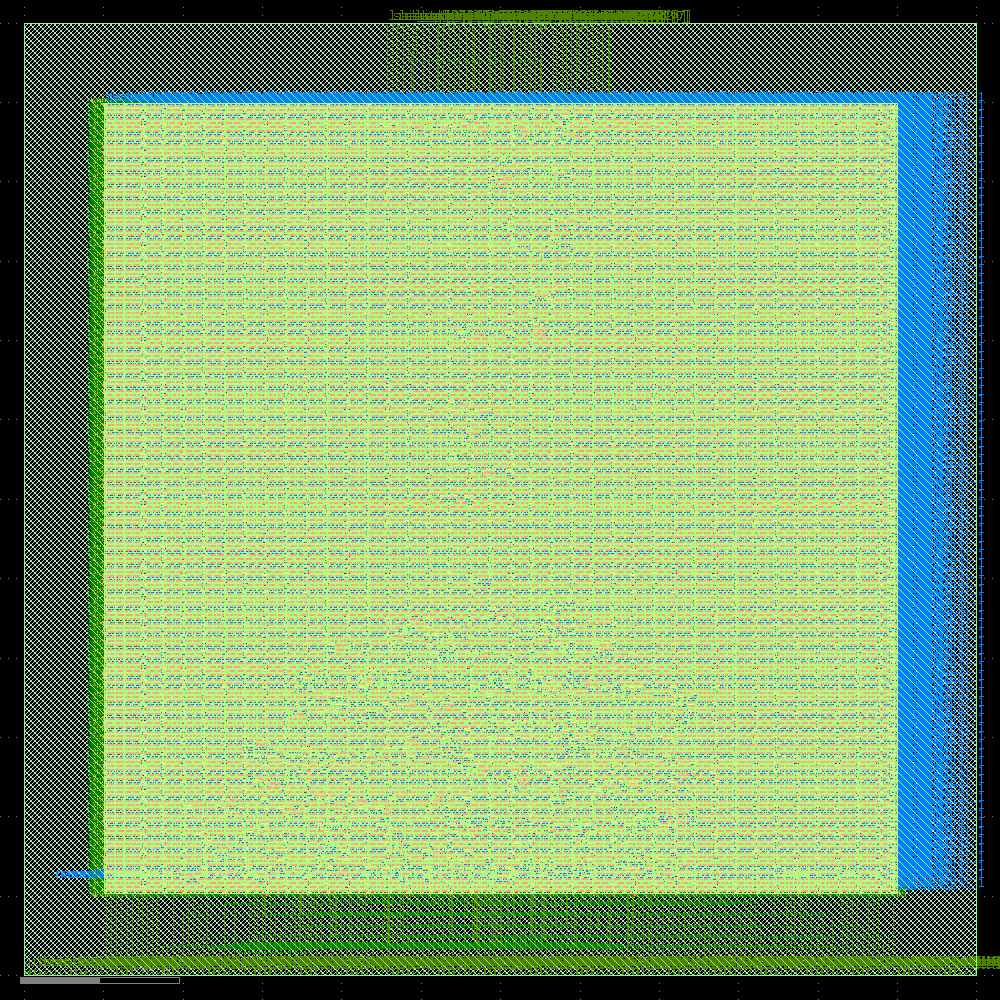

In [86]:
display(gds)

In [87]:
DRC = Step.factory.get("Magic.DRC")

drc = DRC(state_in=gds.state_out)
drc.start()

─────────────────────────────────────────────── Design Rule Checks ────────────────────────────────────────────────

[14:44:41] VERBOSE  Running 'Magic.DRC'…                                                               ]8;id=729071;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=132765;file:///content/openlane_ipynb/openlane/steps/step.py#1088\1088]8;;\

[14:44:41] VERBOSE  Logging subprocess to ]8;id=277373;file:///content/openlane_run/22-magic-drc/magic-drc.log\openlane_run/]8;;\]8;id=702283;file:///content/openlane_run/22-magic-drc/magic-drc.log\22]8;;\]8;id=277373;file:///content/openlane_run/22-magic-drc/magic-drc.log\-magic-drc/magic-drc.log]8;;\…                     ]8;id=680150;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=724525;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\

Magic 8.3 revision 483 - Compiled on Sun Jun  2 18:57:41 UTC 2024.

Starting magic under Tcl interpreter

Using the terminal as the console.

Using NULL graphics device.

Processing system .magicrc file

Sourcing design .magicrc for technology sky130A ...

2 Magic internal units = 1 Lambda

Input style sky130(): scaleFactor=2, multiplier=2

The following types are not handled by extraction and will be treated as non-electrical types:

ubm

Scaled tech values by 2 / 1 to match internal grid scaling

Loading sky130A Device Generator Menu ...

Loading "/content/openlane_ipynb/openlane/scripts/magic/wrapper.tcl" from command line.

Warning: Calma reading is not undoable!  I hope that's OK.

Library written using GDS-II Release 6.0

Library name: LIB

Reading "VIA_M2M3_PR".

Reading "VIA_M1M2_PR_MR".

Reading "VIA_M1M2_PR".

Reading "VIA_L1M1_PR_MR".

Reading "VIA_via2_3_2000_480_1_6_320_320".

Reading "VIA_via3_4_2000_480_1_5_400_400".

Reading "VIA_via4_5_2000_480_1_5_400_400".

Reading "VIA_via5_6_2000_2000_1_1_1600_1600".

Reading "sky130_fd_sc_hd__inv_12".

Reading "sky130_fd_sc_hd__inv_6".

Reading "sky130_fd_sc_hd__clkinv_8".

Reading "sky130_fd_sc_hd__inv_8".

Reading "sky130_fd_sc_hd__clkbuf_16".

Reading "sky130_fd_sc_hd__conb_1".

Reading "sky130_fd_sc_hd__dfstp_2".

Reading "sky130_fd_sc_hd__dfrtp_2".

Reading "sky130_fd_sc_hd__o31ai_2".

Reading "sky130_fd_sc_hd__a31oi_2".

Reading "sky130_fd_sc_hd__a221o_2".

Reading "sky130_fd_sc_hd__o32a_2".

Reading "sky130_fd_sc_hd__o2111a_2".

Reading "sky130_fd_sc_hd__nor3b_2".

Reading "sky130_fd_sc_hd__a22o_2".

Reading "sky130_fd_sc_hd__mux2_1".

Reading "sky130_fd_sc_hd__o22a_2".

Reading "sky130_fd_sc_hd__nor4_2".

Reading "sky130_fd_sc_hd__or3_2".

Reading "sky130_fd_sc_hd__or3b_2".

Reading "sky130_fd_sc_hd__o211a_2".

Reading "sky130_fd_sc_hd__o21ai_2".

Reading "sky130_fd_sc_hd__o21bai_2".

Reading "sky130_fd_sc_hd__and3_2".

Reading "sky130_fd_sc_hd__a211oi_2".

Reading "sky130_fd_sc_hd__a211o_2".

Reading "sky130_fd_sc_hd__nand4_2".

Reading "sky130_fd_sc_hd__o311a_2".

Reading "sky130_fd_sc_hd__a311oi_2".

Reading "sky130_fd_sc_hd__a311o_2".

Reading "sky130_fd_sc_hd__o221a_2".

Reading "sky130_fd_sc_hd__nand3b_2".

Reading "sky130_fd_sc_hd__a21bo_2".

Reading "sky130_fd_sc_hd__and4_2".

Reading "sky130_fd_sc_hd__o41a_2".

Reading "sky130_fd_sc_hd__a31o_2".

Reading "sky130_fd_sc_hd__o31a_2".

Reading "sky130_fd_sc_hd__a21boi_2".

Reading "sky130_fd_sc_hd__and4bb_2".

Reading "sky130_fd_sc_hd__or4_2".

Reading "sky130_fd_sc_hd__a21o_2".

Reading "sky130_fd_sc_hd__a21oi_2".

Reading "sky130_fd_sc_hd__xor2_2".

Reading "sky130_fd_sc_hd__o21ba_2".

Reading "sky130_fd_sc_hd__or4b_2".

Reading "sky130_fd_sc_hd__and2_2".

Reading "sky130_fd_sc_hd__o21a_2".

Reading "sky130_fd_sc_hd__and2b_2".

Reading "sky130_fd_sc_hd__nor2_2".

Reading "sky130_fd_sc_hd__xnor2_2".

Reading "sky130_fd_sc_hd__nor3_2".

Reading "sky130_fd_sc_hd__nand2_2".

Reading "sky130_fd_sc_hd__or2_2".

Reading "sky130_fd_sc_hd__nand2b_2".

Reading "sky130_fd_sc_hd__inv_2".

Reading "sky130_fd_sc_hd__tapvpwrvgnd_1".

Reading "sky130_fd_sc_hd__decap_4".

Reading "sky130_fd_sc_hd__fill_2".

Reading "sky130_fd_sc_hd__decap_8".

Reading "sky130_fd_sc_hd__fill_1".

Reading "sky130_fd_sc_hd__decap_6".

Reading "sky130_ef_sc_hd__decap_12".

Reading "sky130_fd_sc_hd__decap_3".

Reading "hac_deskew_dut".

5000 uses

10000 uses

15000 uses

20000 uses

25000 uses

30000 uses

35000 uses

40000 uses

[INFO] Loading hac_deskew_dut

DRC style is now "drc(full)"

Loading DRC CIF style.

No errors found.

[INFO] COUNT: 0

[INFO] Should be divided by 3 or 4

[INFO] DRC Checking DONE (/content/openlane_run/22-magic-drc/reports/drc_violations.magic.rpt)

[INFO] Saving mag view with DRC errors (/content/openlane_run/22-magic-drc/views/hac_deskew_dut.drc.mag)

[INFO] Saved

{'nl': Path('/content/openlane_run/18-openroad-fillinsertion/hac_deskew_dut.nl.v'), 'pnl': Path('/content/openlane_run/18-openroad-fillinsertion/hac_deskew_dut.pnl.v'), 'pnl-sdf-friendly': None, 'pnl-npc': None, 'def': Path('/content/openlane_run/18-openroad-fillinsertion/hac_deskew_dut.def'), 'lef': None, 'openroad-lef': None, 'odb': Path('/content/openlane_run/18-openroad-fillinsertion/hac_deskew_dut.odb'), 'sdc': Path('/content/openlane_run/18-openroad-fillinsertion/hac_deskew_dut.sdc'), 'sdf': {'nom_tt_025C_1v80': Path('/content/openlane_run/20-openroad-stapostpnr/nom_tt_025C_1v80/hac_deskew_dut__nom_tt_025C_1v80.sdf'), 'nom_ss_100C_1v60': Path('/content/openlane_run/20-openroad-stapostpnr/nom_ss_100C_1v60/hac_deskew_dut__nom_ss_100C_1v60.sdf'), 'nom_ff_n40C_1v95': Path('/content/openlane_run/20-openroad-stapostpnr/nom_ff_n40C_1v95/hac_deskew_dut__nom_ff_n40C_1v95.sdf'), 'min_tt_025C_1v80': Path('/content/openlane_run/20-openroad-stapostpnr/min_tt_025C_1v80/hac_deskew_dut__min_tt_025C_1v80.sdf'), 'min_ss_100C_1v60': Path('/content/openlane_run/20-openroad-stapostpnr/min_ss_100C_1v60/hac_deskew_dut__min_ss_100C_1v60.sdf'), 'min_ff_n40C_1v95': Path('/content/openlane_run/20-openroad-stapostpnr/min_ff_n40C_1v95/hac_deskew_dut__min_ff_n40C_1v95.sdf'), 'max_tt_025C_1v80': Path('/content/openlane_run/20-openroad-stapostpnr/max_tt_025C_1v80/hac_deskew_dut__max_tt_025C_1v80.sdf'), 'max_ss_100C_1v60': Path('/content/openlane_run/20-openroad-stapostpnr/max_ss_100C_1v60/hac_deskew_dut__max_ss_100C_1v60.sdf'), 'max_ff_n40C_1v95': Path('/content/openlane_run/20-openroad-stapostpnr/max_ff_n40C_1v95/hac_deskew_dut__max_ff_n40C_1v95.sdf')}, 'spef': {'nom_*': Path('/content/openlane_run/19-openroad-rcx/nom/hac_deskew_dut.nom.spef'), 'min_*': Path('/content/openlane_run/19-openroad-rcx/min/hac_deskew_dut.min.spef'), 'max_*': Path('/content/openlane_run/19-openroad-rcx/max/hac_deskew_dut.max.spef')}, 'lib': {'nom_tt_025C_1v80': Path('/content/openlane_run/20-openroad-stapostpnr/nom_tt_025C_1v80/hac_deskew_dut__nom_tt_025C_1v80.lib'), 'nom_ss_100C_1v60': Path('/content/openlane_run/20-openroad-stapostpnr/nom_ss_100C_1v60/hac_deskew_dut__nom_ss_100C_1v60.lib'), 'nom_ff_n40C_1v95': Path('/content/openlane_run/20-openroad-stapostpnr/nom_ff_n40C_1v95/hac_deskew_dut__nom_ff_n40C_1v95.lib'), 'min_tt_025C_1v80': Path('/content/openlane_run/20-openroad-stapostpnr/min_tt_025C_1v80/hac_deskew_dut__min_tt_025C_1v80.lib'), 'min_ss_100C_1v60': Path('/content/openlane_run/20-openroad-stapostpnr/min_ss_100C_1v60/hac_deskew_dut__min_ss_100C_1v60.lib'), 'min_ff_n40C_1v95': Path('/content/openlane_run/20-openroad-stapostpnr/min_ff_n40C_1v95/hac_deskew_dut__min_ff_n40C_1v95.lib'), 'max_tt_025C_1v80': Path('/content/openlane_run/20-openroad-stapostpnr/max_tt_025C_1v80/hac_deskew_dut__max_tt_025C_1v80.lib'), 'max_ss_100C_1v60': Path('/content/openlane_run/20-openroad-stapostpnr/max_ss_100C_1v60/hac_deskew_dut__max_ss_100C_1v60.lib'), 'max_ff_n40C_1v95': Path('/content/openlane_run/20-openroad-stapostpnr/max_ff_n40C_1v95/hac_deskew_dut__max_ff_n40C_1v95.lib')}, 'spice': None, 'mag': None, 'gds': Path('/content/openlane_run/21-klayout-streamout/hac_deskew_dut.gds'), 'mag_gds': None, 'klayout_gds': Path('/content/openlane_run/21-klayout-streamout/hac_deskew_dut.klayout.gds'), 'json_h': None, 'vh': None, 'metrics': {'design__instance__count': 4371, 'design__instance__area': Decimal('14073.5'), 'design__instance_unmapped__count': 0, 'synthesis__check_error__count': 1, 'design__die__bbox': '0.0 0.0 600.0 600.0', 'design__core__bbox': '50.14 51.68 549.7 549.44', 'flow__warnings__count': 1, 'flow__errors__count': 0, 'design__io': 234, 'design__die__area': 360000, 'design__core__area': 248661, 'design__instance__count__stdcell': 4371, 'design__instance__area__stdcell': Decimal('14073.5'), 'design__instance__count__macros': 0, 'design__instance__area__macros': 0, 'design__instance__utilization': Decimal('0.0565971'), 'design__instance__utilization__stdcell': Decimal('0.056

In [88]:
SpiceExtraction = Step.factory.get("Magic.SpiceExtraction")

spx = SpiceExtraction(state_in=drc.state_out)
spx.start()

───────────────────────────────────────────── SPICE Model Extraction ──────────────────────────────────────────────

[14:45:44] VERBOSE  Running 'Magic.SpiceExtraction'…                                                   ]8;id=65511;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=239558;file:///content/openlane_ipynb/openlane/steps/step.py#1088\1088]8;;\

[14:45:44] VERBOSE  Logging subprocess to                                                              ]8;id=466303;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=11949;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\
                    ]8;id=444752;file:///content/openlane_run/23-magic-spiceextraction/magic-spiceextraction.log\openlane_run/]8;;\]8;id=250004;file:///content/openlane_run/23-magic-spiceextraction/magic-spiceextraction.log\23]8;;\]8;id=444752;file:///content/openlane_run/23-magic-spiceextraction/magic-spiceextraction.log\-magic-spiceextraction/magic-spiceextraction.log]8;;\…                               

Magic 8.3 revision 483 - Compiled on Sun Jun  2 18:57:41 UTC 2024.

Starting magic under Tcl interpreter

Using the terminal as the console.

Using NULL graphics device.

Processing system .magicrc file

Sourcing design .magicrc for technology sky130A ...

2 Magic internal units = 1 Lambda

Input style sky130(): scaleFactor=2, multiplier=2

The following types are not handled by extraction and will be treated as non-electrical types:

ubm

Scaled tech values by 2 / 1 to match internal grid scaling

Loading sky130A Device Generator Menu ...

Loading "/content/openlane_ipynb/openlane/scripts/magic/wrapper.tcl" from command line.

> lef read /root/.volare/sky130A/libs.ref/sky130_fd_sc_hd/techlef/sky130_fd_sc_hd__nom.tlef

Reading LEF data from file /root/.volare/sky130A/libs.ref/sky130_fd_sc_hd/techlef/sky130_fd_sc_hd__nom.tlef.

This action cannot be undone.

LEF read, Line 78 (Message): Unknown keyword "ANTENNAMODEL" in LEF file; ignoring.

LEF read, Line 79 (Message): Unknown keyword "ANTENNADIFFSIDEAREARATIO" in LEF file; ignoring.

LEF read, Line 112 (Message): Unknown keyword "MINENCLOSEDAREA" in LEF file; ignoring.

LEF read, Line 114 (Message): Unknown keyword "ANTENNAMODEL" in LEF file; ignoring.

LEF read, Line 115 (Message): Unknown keyword "ANTENNADIFFSIDEAREARATIO" in LEF file; ignoring.

LEF read, Line 121 (Message): Unknown keyword "MAXIMUMDENSITY" in LEF file; ignoring.

LEF read, Line 122 (Message): Unknown keyword "DENSITYCHECKWINDOW" in LEF file; ignoring.

LEF read, Line 123 (Message): Unknown keyword "DENSITYCHECKSTEP" in LEF file; ignoring.

LEF read, Line 156 (Message): Unknown keyword "MINENCLOSEDAREA" in LEF file; ignoring.

LEF read, Line 164 (Message): Unknown keyword "ANTENNAMODEL" in LEF file; ignoring.

LEF read, Line 165 (Message): Unknown keyword "ANTENNADIFFSIDEAREARATIO" in LEF file; ignoring.

LEF read, Line 167 (Message): Unknown keyword "MAXIMUMDENSITY" in LEF file; ignoring.

LEF read, Line 168 (Message): Unknown keyword "DENSITYCHECKWINDOW" in LEF file; ignoring.

LEF read, Line 169 (Message): Unknown keyword "DENSITYCHECKSTEP" in LEF file; ignoring.

LEF read, Line 206 (Message): Unknown keyword "ANTENNAMODEL" in LEF file; ignoring.

LEF read, Line 207 (Message): Unknown keyword "ANTENNADIFFSIDEAREARATIO" in LEF file; ignoring.

LEF read, Line 209 (Message): Unknown keyword "MAXIMUMDENSITY" in LEF file; ignoring.

LEF read, Line 210 (Message): Unknown keyword "DENSITYCHECKWINDOW" in LEF file; ignoring.

LEF read, Line 211 (Message): Unknown keyword "DENSITYCHECKSTEP" in LEF file; ignoring.

LEF read, Line 248 (Message): Unknown keyword "ANTENNAMODEL" in LEF file; ignoring.

LEF read, Line 249 (Message): Unknown keyword "ANTENNADIFFSIDEAREARATIO" in LEF file; ignoring.

LEF read, Line 251 (Message): Unknown keyword "MAXIMUMDENSITY" in LEF file; ignoring.

LEF read, Line 252 (Message): Unknown keyword "DENSITYCHECKWINDOW" in LEF file; ignoring.

LEF read, Line 253 (Message): Unknown keyword "DENSITYCHECKSTEP" in LEF file; ignoring.

LEF read, Line 290 (Message): Unknown keyword "ANTENNAMODEL" in LEF file; ignoring.

LEF read, Line 291 (Message): Unknown keyword "ANTENNADIFFSIDEAREARATIO" in LEF file; ignoring.

LEF read: Processed 797 lines.

> lef read /root/.volare/sky130A/libs.ref/sky130_fd_sc_hd/lef/sky130_ef_sc_hd.lef

Reading LEF data from file /root/.volare/sky130A/libs.ref/sky130_fd_sc_hd/lef/sky130_ef_sc_hd.lef.

This action cannot be undone.

LEF read: Processed 278 lines.

> lef read /root/.volare/sky130A/libs.ref/sky130_fd_sc_hd/lef/sky130_fd_sc_hd.lef

Reading LEF data from file /root/.volare/sky130A/libs.ref/sky130_fd_sc_hd/lef/sky130_fd_sc_hd.lef.

This action cannot be undone.

LEF read: Processed 56535 lines.

> def read /content/openlane_run/18-openroad-fillinsertion/hac_deskew_dut.def -noblockage -labels

Reading DEF data from file /content/openlane_run/18-openroad-fillinsertion/hac_deskew_dut.def.

This action cannot be undone.

Processed 4 vias total.

Processed 25525 subcell instances total.

Processed 234 pins total.

Processed 2 special nets total.

Processed 942 nets total.

DEF read: Processed 51909 lines.

Moving label "_0171_" from metal2 to via1 in cell hac_deskew_dut.

Moving label "_0193_" from metal1 to via1 in cell hac_deskew_dut.

Moving label "_0313_" from metal1 to via1 in cell hac_deskew_dut.

Moving label "hac_offset\[11\]" from metal1 to via1 in cell hac_deskew_dut.

Moving label "sac_val[3]" from metal2 to via1 in cell hac_deskew_dut.

Processing hac_deskew_dut

Extracting sky130_ef_sc_hd__decap_12 into sky130_ef_sc_hd__decap_12.ext:

Extracting sky130_fd_sc_hd__decap_3 into sky130_fd_sc_hd__decap_3.ext:

Extracting sky130_fd_sc_hd__fill_1 into sky130_fd_sc_hd__fill_1.ext:

Extracting sky130_fd_sc_hd__tapvpwrvgnd_1 into sky130_fd_sc_hd__tapvpwrvgnd_1.ext:

Extracting sky130_fd_sc_hd__decap_4 into sky130_fd_sc_hd__decap_4.ext:

Extracting sky130_fd_sc_hd__decap_6 into sky130_fd_sc_hd__decap_6.ext:

Extracting sky130_fd_sc_hd__decap_8 into sky130_fd_sc_hd__decap_8.ext:

Extracting sky130_fd_sc_hd__fill_2 into sky130_fd_sc_hd__fill_2.ext:

Extracting sky130_fd_sc_hd__xnor2_2 into sky130_fd_sc_hd__xnor2_2.ext:

Extracting sky130_fd_sc_hd__o31a_2 into sky130_fd_sc_hd__o31a_2.ext:

Extracting sky130_fd_sc_hd__conb_1 into sky130_fd_sc_hd__conb_1.ext:

Extracting sky130_fd_sc_hd__and2b_2 into sky130_fd_sc_hd__and2b_2.ext:

Extracting sky130_fd_sc_hd__or4b_2 into sky130_fd_sc_hd__or4b_2.ext:

Extracting sky130_fd_sc_hd__or4_2 into sky130_fd_sc_hd__or4_2.ext:

Extracting sky130_fd_sc_hd__dfrtp_2 into sky130_fd_sc_hd__dfrtp_2.ext:

Extracting sky130_fd_sc_hd__inv_2 into sky130_fd_sc_hd__inv_2.ext:

Extracting sky130_fd_sc_hd__a21oi_2 into sky130_fd_sc_hd__a21oi_2.ext:

Extracting sky130_fd_sc_hd__nor2_2 into sky130_fd_sc_hd__nor2_2.ext:

Extracting sky130_fd_sc_hd__or3b_2 into sky130_fd_sc_hd__or3b_2.ext:

Extracting sky130_fd_sc_hd__nand3b_2 into sky130_fd_sc_hd__nand3b_2.ext:

Extracting sky130_fd_sc_hd__dfstp_2 into sky130_fd_sc_hd__dfstp_2.ext:

Extracting sky130_fd_sc_hd__xor2_2 into sky130_fd_sc_hd__xor2_2.ext:

Extracting sky130_fd_sc_hd__mux2_1 into sky130_fd_sc_hd__mux2_1.ext:

Extracting sky130_fd_sc_hd__o21ai_2 into sky130_fd_sc_hd__o21ai_2.ext:

Extracting sky130_fd_sc_hd__or2_2 into sky130_fd_sc_hd__or2_2.ext:

Extracting sky130_fd_sc_hd__nand2_2 into sky130_fd_sc_hd__nand2_2.ext:

Extracting sky130_fd_sc_hd__nand2b_2 into sky130_fd_sc_hd__nand2b_2.ext:

Extracting sky130_fd_sc_hd__and2_2 into sky130_fd_sc_hd__and2_2.ext:

Extracting sky130_fd_sc_hd__nor4_2 into sky130_fd_sc_hd__nor4_2.ext:

Extracting sky130_fd_sc_hd__a211oi_2 into sky130_fd_sc_hd__a211oi_2.ext:

Extracting sky130_fd_sc_hd__o211a_2 into sky130_fd_sc_hd__o211a_2.ext:

Extracting sky130_fd_sc_hd__a31o_2 into sky130_fd_sc_hd__a31o_2.ext:

Extracting sky130_fd_sc_hd__a21o_2 into sky130_fd_sc_hd__a21o_2.ext:

Extracting sky130_fd_sc_hd__a211o_2 into sky130_fd_sc_hd__a211o_2.ext:

Extracting sky130_fd_sc_hd__o221a_2 into sky130_fd_sc_hd__o221a_2.ext:

Extracting sky130_fd_sc_hd__o311a_2 into sky130_fd_sc_hd__o311a_2.ext:

Extracting sky130_fd_sc_hd__o21a_2 into sky130_fd_sc_hd__o21a_2.ext:

Extracting sky130_fd_sc_hd__nand4_2 into sky130_fd_sc_hd__nand4_2.ext:

Extracting sky130_fd_sc_hd__nor3_2 into sky130_fd_sc_hd__nor3_2.ext:

Extracting sky130_fd_sc_hd__a311oi_2 into sky130_fd_sc_hd__a311oi_2.ext:

Extracting sky130_fd_sc_hd__o32a_2 into sky130_fd_sc_hd__o32a_2.ext:

Extracting sky130_fd_sc_hd__and3_2 into sky130_fd_sc_hd__and3_2.ext:

Extracting sky130_fd_sc_hd__a311o_2 into sky130_fd_sc_hd__a311o_2.ext:

Extracting sky130_fd_sc_hd__or3_2 into sky130_fd_sc_hd__or3_2.ext:

Extracting sky130_fd_sc_hd__o31ai_2 into sky130_fd_sc_hd__o31ai_2.ext:

Extracting sky130_fd_sc_hd__a221o_2 into sky130_fd_sc_hd__a221o_2.ext:

Extracting sky130_fd_sc_hd__a22o_2 into sky130_fd_sc_hd__a22o_2.ext:

Extracting sky130_fd_sc_hd__a21bo_2 into sky130_fd_sc_hd__a21bo_2.ext:

Extracting sky130_fd_sc_hd__a31oi_2 into sky130_fd_sc_hd__a31oi_2.ext:

Extracting sky130_fd_sc_hd__o21ba_2 into sky130_fd_sc_hd__o21ba_2.ext:

Extracting sky130_fd_sc_hd__and4_2 into sky130_fd_sc_hd__and4_2.ext:

Extracting sky130_fd_sc_hd__o22a_2 into sky130_fd_sc_hd__o22a_2.ext:

Extracting sky130_fd_sc_hd__clkbuf_16 into sky130_fd_sc_hd__clkbuf_16.ext:

Extracting sky130_fd_sc_hd__inv_6 into sky130_fd_sc_hd__inv_6.ext:

Extracting sky130_fd_sc_hd__nor3b_2 into sky130_fd_sc_hd__nor3b_2.ext:

Extracting sky130_fd_sc_hd__clkinv_8 into sky130_fd_sc_hd__clkinv_8.ext:

Extracting sky130_fd_sc_hd__o41a_2 into sky130_fd_sc_hd__o41a_2.ext:

Extracting sky130_fd_sc_hd__and4bb_2 into sky130_fd_sc_hd__and4bb_2.ext:

Extracting sky130_fd_sc_hd__inv_8 into sky130_fd_sc_hd__inv_8.ext:

Extracting sky130_fd_sc_hd__a21boi_2 into sky130_fd_sc_hd__a21boi_2.ext:

Extracting sky130_fd_sc_hd__o21bai_2 into sky130_fd_sc_hd__o21bai_2.ext:

Extracting sky130_fd_sc_hd__o2111a_2 into sky130_fd_sc_hd__o2111a_2.ext:

Extracting sky130_fd_sc_hd__inv_12 into sky130_fd_sc_hd__inv_12.ext:

Extracting hac_deskew_dut into hac_deskew_dut.ext:

exttospice finished.

Using technology "sky130A", version 1.0.466-0-gbdc9412

{'nl': Path('/content/openlane_run/18-openroad-fillinsertion/hac_deskew_dut.nl.v'), 'pnl': Path('/content/openlane_run/18-openroad-fillinsertion/hac_deskew_dut.pnl.v'), 'pnl-sdf-friendly': None, 'pnl-npc': None, 'def': Path('/content/openlane_run/18-openroad-fillinsertion/hac_deskew_dut.def'), 'lef': None, 'openroad-lef': None, 'odb': Path('/content/openlane_run/18-openroad-fillinsertion/hac_deskew_dut.odb'), 'sdc': Path('/content/openlane_run/18-openroad-fillinsertion/hac_deskew_dut.sdc'), 'sdf': {'nom_tt_025C_1v80': Path('/content/openlane_run/20-openroad-stapostpnr/nom_tt_025C_1v80/hac_deskew_dut__nom_tt_025C_1v80.sdf'), 'nom_ss_100C_1v60': Path('/content/openlane_run/20-openroad-stapostpnr/nom_ss_100C_1v60/hac_deskew_dut__nom_ss_100C_1v60.sdf'), 'nom_ff_n40C_1v95': Path('/content/openlane_run/20-openroad-stapostpnr/nom_ff_n40C_1v95/hac_deskew_dut__nom_ff_n40C_1v95.sdf'), 'min_tt_025C_1v80': Path('/content/openlane_run/20-openroad-stapostpnr/min_tt_025C_1v80/hac_deskew_dut__min_tt_025C_1v80.sdf'), 'min_ss_100C_1v60': Path('/content/openlane_run/20-openroad-stapostpnr/min_ss_100C_1v60/hac_deskew_dut__min_ss_100C_1v60.sdf'), 'min_ff_n40C_1v95': Path('/content/openlane_run/20-openroad-stapostpnr/min_ff_n40C_1v95/hac_deskew_dut__min_ff_n40C_1v95.sdf'), 'max_tt_025C_1v80': Path('/content/openlane_run/20-openroad-stapostpnr/max_tt_025C_1v80/hac_deskew_dut__max_tt_025C_1v80.sdf'), 'max_ss_100C_1v60': Path('/content/openlane_run/20-openroad-stapostpnr/max_ss_100C_1v60/hac_deskew_dut__max_ss_100C_1v60.sdf'), 'max_ff_n40C_1v95': Path('/content/openlane_run/20-openroad-stapostpnr/max_ff_n40C_1v95/hac_deskew_dut__max_ff_n40C_1v95.sdf')}, 'spef': {'nom_*': Path('/content/openlane_run/19-openroad-rcx/nom/hac_deskew_dut.nom.spef'), 'min_*': Path('/content/openlane_run/19-openroad-rcx/min/hac_deskew_dut.min.spef'), 'max_*': Path('/content/openlane_run/19-openroad-rcx/max/hac_deskew_dut.max.spef')}, 'lib': {'nom_tt_025C_1v80': Path('/content/openlane_run/20-openroad-stapostpnr/nom_tt_025C_1v80/hac_deskew_dut__nom_tt_025C_1v80.lib'), 'nom_ss_100C_1v60': Path('/content/openlane_run/20-openroad-stapostpnr/nom_ss_100C_1v60/hac_deskew_dut__nom_ss_100C_1v60.lib'), 'nom_ff_n40C_1v95': Path('/content/openlane_run/20-openroad-stapostpnr/nom_ff_n40C_1v95/hac_deskew_dut__nom_ff_n40C_1v95.lib'), 'min_tt_025C_1v80': Path('/content/openlane_run/20-openroad-stapostpnr/min_tt_025C_1v80/hac_deskew_dut__min_tt_025C_1v80.lib'), 'min_ss_100C_1v60': Path('/content/openlane_run/20-openroad-stapostpnr/min_ss_100C_1v60/hac_deskew_dut__min_ss_100C_1v60.lib'), 'min_ff_n40C_1v95': Path('/content/openlane_run/20-openroad-stapostpnr/min_ff_n40C_1v95/hac_deskew_dut__min_ff_n40C_1v95.lib'), 'max_tt_025C_1v80': Path('/content/openlane_run/20-openroad-stapostpnr/max_tt_025C_1v80/hac_deskew_dut__max_tt_025C_1v80.lib'), 'max_ss_100C_1v60': Path('/content/openlane_run/20-openroad-stapostpnr/max_ss_100C_1v60/hac_deskew_dut__max_ss_100C_1v60.lib'), 'max_ff_n40C_1v95': Path('/content/openlane_run/20-openroad-stapostpnr/max_ff_n40C_1v95/hac_deskew_dut__max_ff_n40C_1v95.lib')}, 'spice': Path('/content/openlane_run/23-magic-spiceextraction/hac_deskew_dut.spice'), 'mag': None, 'gds': Path('/content/openlane_run/21-klayout-streamout/hac_deskew_dut.gds'), 'mag_gds': None, 'klayout_gds': Path('/content/openlane_run/21-klayout-streamout/hac_deskew_dut.klayout.gds'), 'json_h': None, 'vh': None, 'metrics': {'design__instance__count': 4371, 'design__instance__area': Decimal('14073.5'), 'design__instance_unmapped__count': 0, 'synthesis__check_error__count': 1, 'design__die__bbox': '0.0 0.0 600.0 600.0', 'design__core__bbox': '50.14 51.68 549.7 549.44', 'flow__warnings__count': 1, 'flow__errors__count': 0, 'design__io': 234, 'design__die__area': 360000, 'design__core__area': 248661, 'design__instance__count__stdcell': 4371, 'design__instance__area__stdcell': Decimal('14073.5'), 'design__instance__count__macros': 0, 'design__instance__area__macros': 0, 'design__instance__utilization': Decimal

In [89]:
LVS = Step.factory.get("Netgen.LVS")

lvs = LVS(state_in=spx.state_out)
lvs.start()

─────────────────────────────────────────────────── Netgen LVS ────────────────────────────────────────────────────

[14:45:57] VERBOSE  Running 'Netgen.LVS'…                                                              ]8;id=720587;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=177950;file:///content/openlane_ipynb/openlane/steps/step.py#1088\1088]8;;\

[14:45:57] VERBOSE  Logging subprocess to ]8;id=902139;file:///content/openlane_run/24-netgen-lvs/netgen-lvs.log\openlane_run/]8;;\]8;id=873801;file:///content/openlane_run/24-netgen-lvs/netgen-lvs.log\24]8;;\]8;id=902139;file:///content/openlane_run/24-netgen-lvs/netgen-lvs.log\-netgen-lvs/netgen-lvs.log]8;;\…                   ]8;id=1944;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=282455;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\

Netgen 1.5.270 compiled on Sun Jun  2 19:00:27 UTC 2024

Warning: netgen command 'format' use fully-qualified name '::netgen::format'

Warning: netgen command 'global' use fully-qualified name '::netgen::global'

Warning:  A case-insensitive file has been read and so the      verilog file must be treated case-insensitive to   
match.

Reading SPICE netlist file                                                                                         
'/root/.volare/sky130A/libs.ref/sky130_fd_sc_hd/spice/sky130_ef_sc_hd__decap_12.spice'...

Call to undefined subcircuit sky130_fd_pr__pfet_01v8_hvt

Creating placeholder cell definition.

Call to undefined subcircuit sky130_fd_pr__nfet_01v8

Creating placeholder cell definition.

Reading SPICE netlist file '/root/.volare/sky130A/libs.ref/sky130_fd_sc_hd/spice/sky130_ef_sc_hd__fill_12.spice'...

Reading SPICE netlist file '/root/.volare/sky130A/libs.ref/sky130_fd_sc_hd/spice/sky130_ef_sc_hd__fill_4.spice'...

Reading SPICE netlist file '/root/.volare/sky130A/libs.ref/sky130_fd_sc_hd/spice/sky130_ef_sc_hd__fill_8.spice'...

Reading SPICE netlist file '/root/.volare/sky130A/libs.ref/sky130_fd_sc_hd/spice/sky130_fd_sc_hd.spice'...

Call to undefined subcircuit sky130_fd_sc_hd__nand2_2

Creating placeholder cell definition.

Call to undefined subcircuit sky130_fd_sc_hd__nor2_2

Creating placeholder cell definition.

Warning:  A case-insensitive file has been read and so the      verilog file must be treated case-insensitive to   
match.

Note:  Implicit pin LO in instance _1423_ of sky130_fd_sc_hd__conb_1 in cell hac_deskew_dut

Note:  Implicit pin HI in instance _1424_ of sky130_fd_sc_hd__conb_1 in cell hac_deskew_dut

Note:  Implicit pin HI in instance _1425_ of sky130_fd_sc_hd__conb_1 in cell hac_deskew_dut

Note:  Implicit pin HI in instance _1426_ of sky130_fd_sc_hd__conb_1 in cell hac_deskew_dut

Note:  Implicit pin HI in instance _1427_ of sky130_fd_sc_hd__conb_1 in cell hac_deskew_dut

Note:  Implicit pin HI in instance _1428_ of sky130_fd_sc_hd__conb_1 in cell hac_deskew_dut

Note:  Implicit pin HI in instance _1429_ of sky130_fd_sc_hd__conb_1 in cell hac_deskew_dut

Note:  Implicit pin HI in instance _1430_ of sky130_fd_sc_hd__conb_1 in cell hac_deskew_dut

Note:  Implicit pin HI in instance _1431_ of sky130_fd_sc_hd__conb_1 in cell hac_deskew_dut

Note:  Implicit pin HI in instance _1432_ of sky130_fd_sc_hd__conb_1 in cell hac_deskew_dut

Note:  Implicit pin HI in instance _1433_ of sky130_fd_sc_hd__conb_1 in cell hac_deskew_dut

Note:  Implicit pin HI in instance _1434_ of sky130_fd_sc_hd__conb_1 in cell hac_deskew_dut

Note:  Implicit pin HI in instance _1435_ of sky130_fd_sc_hd__conb_1 in cell hac_deskew_dut

Note:  Implicit pin HI in instance _1436_ of sky130_fd_sc_hd__conb_1 in cell hac_deskew_dut

Note:  Implicit pin HI in instance _1437_ of sky130_fd_sc_hd__conb_1 in cell hac_deskew_dut

Note:  Implicit pin HI in instance _1438_ of sky130_fd_sc_hd__conb_1 in cell hac_deskew_dut

Note:  Implicit pin HI in instance _1439_ of sky130_fd_sc_hd__conb_1 in cell hac_deskew_dut

Note:  Implicit pin HI in instance _1440_ of sky130_fd_sc_hd__conb_1 in cell hac_deskew_dut

Note:  Implicit pin HI in instance _1441_ of sky130_fd_sc_hd__conb_1 in cell hac_deskew_dut

Note:  Implicit pin HI in instance _1442_ of sky130_fd_sc_hd__conb_1 in cell hac_deskew_dut

Note:  Implicit pin HI in instance _1443_ of sky130_fd_sc_hd__conb_1 in cell hac_deskew_dut

Note:  Implicit pin HI in instance _1444_ of sky130_fd_sc_hd__conb_1 in cell hac_deskew_dut

Note:  Implicit pin HI in instance _1445_ of sky130_fd_sc_hd__conb_1 in cell hac_deskew_dut

Note:  Implicit pin HI in instance _1446_ of sky130_fd_sc_hd__conb_1 in cell hac_deskew_dut

Note:  Implicit pin HI in instance _1447_ of sky130_fd_sc_hd__conb_1 in cell hac_deskew_dut

Note:  Implicit pin HI in instance _1448_ of sky130_fd_sc_hd__conb_1 in cell hac_deskew_dut

Note:  Implicit pin HI in instance _1449_ of sky130_fd_sc_hd__conb_1 in cell hac_deskew_dut

Note:  Implicit pin HI in instance _1450_ of sky130_fd_sc_hd__conb_1 in cell hac_deskew_dut

Note:  Implicit pin HI in instance _1451_ of sky130_fd_sc_hd__conb_1 in cell hac_deskew_dut

Note:  Implicit pin HI in instance _1452_ of sky130_fd_sc_hd__conb_1 in cell hac_deskew_dut

Note:  Implicit pin HI in instance _1453_ of sky130_fd_sc_hd__conb_1 in cell hac_deskew_dut

Note:  Implicit pin HI in instance _1454_ of sky130_fd_sc_hd__conb_1 in cell hac_deskew_dut

Note:  Implicit pin HI in instance _1455_ of sky130_fd_sc_hd__conb_1 in cell hac_deskew_dut

Note:  Implicit pin HI in instance _1456_ of sky130_fd_sc_hd__conb_1 in cell hac_deskew_dut

Note:  Implicit pin HI in instance _1457_ of sky130_fd_sc_hd__conb_1 in cell hac_deskew_dut

Note:  Implicit pin HI in instance _1458_ of sky130_fd_sc_hd__conb_1 in cell hac_deskew_dut

Note:  Implicit pin HI in instance _1459_ of sky130_fd_sc_hd__conb_1 in cell hac_deskew_dut

Note:  Implicit pin HI in instance _1460_ of sky130_fd_sc_hd__conb_1 in cell hac_deskew_dut

Note:  Implicit pin HI in instance _1461_ of sky130_fd_sc_hd__conb_1 in cell hac_deskew_dut

Note:  Implicit pin HI in instance _1462_ of sky130_fd_sc_hd__conb_1 in cell hac_deskew_dut

Note:  Implicit pin HI in instance _1463_ of sky130_fd_sc_hd__conb_1 in cell hac_deskew_dut

Note:  Implicit pin HI in instance _1464_ of sky130_fd_sc_hd__conb_1 in cell hac_deskew_dut

Note:  Implicit pin HI in instance _1465_ of sky130_fd_sc_hd__conb_1 in cell hac_deskew_dut

Note:  Implicit pin HI in instance _1466_ of sky130_fd_sc_hd__conb_1 in cell hac_deskew_dut

Note:  Implicit pin HI in instance _1467_ of sky130_fd_sc_hd__conb_1 in cell hac_deskew_dut

Note:  Implicit pin HI in instance _1468_ of sky130_fd_sc_hd__conb_1 in cell hac_deskew_dut

Note:  Implicit pin HI in instance _1469_ of sky130_fd_sc_hd__conb_1 in cell hac_deskew_dut

Note:  Implicit pin HI in instance _1470_ of sky130_fd_sc_hd__conb_1 in cell hac_deskew_dut

Note:  Implicit pin HI in instance _1471_ of sky130_fd_sc_hd__conb_1 in cell hac_deskew_dut

Note:  Implicit pin HI in instance _1472_ of sky130_fd_sc_hd__conb_1 in cell hac_deskew_dut

Note:  Implicit pin HI in instance _1473_ of sky130_fd_sc_hd__conb_1 in cell hac_deskew_dut

Note:  Implicit pin HI in instance _1474_ of sky130_fd_sc_hd__conb_1 in cell hac_deskew_dut

Note:  Implicit pin HI in instance _1475_ of sky130_fd_sc_hd__conb_1 in cell hac_deskew_dut

Note:  Implicit pin HI in instance _1476_ of sky130_fd_sc_hd__conb_1 in cell hac_deskew_dut

Note:  Implicit pin Y in instance clkload0 of sky130_fd_sc_hd__inv_8 in cell hac_deskew_dut

Note:  Implicit pin Y in instance clkload1 of sky130_fd_sc_hd__clkinv_8 in cell hac_deskew_dut

Note:  Implicit pin Y in instance clkload2 of sky130_fd_sc_hd__inv_6 in cell hac_deskew_dut

Note:  Implicit pin Y in instance clkload3 of sky130_fd_sc_hd__clkinv_8 in cell hac_deskew_dut

Note:  Implicit pin Y in instance clkload4 of sky130_fd_sc_hd__inv_12 in cell hac_deskew_dut

Note:  Implicit pin Y in instance clkload5 of sky130_fd_sc_hd__inv_8 in cell hac_deskew_dut

Note:  Implicit pin Y in instance clkload6 of sky130_fd_sc_hd__inv_8 in cell hac_deskew_dut

Treating empty subcircuits as black-box cells

Generating JSON file result

Reading setup file /content/openlane_ipynb/openlane/scripts/netgen/setup.tcl

Model sky130_fd_pr__res_generic_po pin end_a == end_b

No property mult found for device sky130_fd_pr__res_generic_po

Model sky130_fd_pr__nfet_01v8 pin 1 == 3

No property mult found for device sky130_fd_pr__nfet_01v8

No property sa found for device sky130_fd_pr__nfet_01v8

No property sb found for device sky130_fd_pr__nfet_01v8

No property sd found for device sky130_fd_pr__nfet_01v8

No property nf found for device sky130_fd_pr__nfet_01v8

No property nrd found for device sky130_fd_pr__nfet_01v8

No property nrs found for device sky130_fd_pr__nfet_01v8

No property area found for device sky130_fd_pr__nfet_01v8

No property perim found for device sky130_fd_pr__nfet_01v8

No property topography found for device sky130_fd_pr__nfet_01v8

Model sky130_fd_pr__pfet_01v8_hvt pin 1 == 3

No property mult found for device sky130_fd_pr__pfet_01v8_hvt

No property sa found for device sky130_fd_pr__pfet_01v8_hvt

No property sb found for device sky130_fd_pr__pfet_01v8_hvt

No property sd found for device sky130_fd_pr__pfet_01v8_hvt

No property nf found for device sky130_fd_pr__pfet_01v8_hvt

No property nrd found for device sky130_fd_pr__pfet_01v8_hvt

No property nrs found for device sky130_fd_pr__pfet_01v8_hvt

No property area found for device sky130_fd_pr__pfet_01v8_hvt

No property perim found for device sky130_fd_pr__pfet_01v8_hvt

No property topography found for device sky130_fd_pr__pfet_01v8_hvt

No property value found for device sky130_fd_pr__diode_pw2nd_05v5

No property mult found for device sky130_fd_pr__diode_pw2nd_05v5

No property perim found for device sky130_fd_pr__diode_pw2nd_05v5

Comparison output logged to file /content/openlane_run/24-netgen-lvs/reports/lvs.netgen.rpt

Logging to file "/content/openlane_run/24-netgen-lvs/reports/lvs.netgen.rpt" enabled

Contents of circuit 1:  Circuit: 'sky130_fd_sc_hd__decap_6'

Circuit sky130_fd_sc_hd__decap_6 contains 0 device instances.

Circuit contains 0 nets, and 4 disconnected pins.

Contents of circuit 2:  Circuit: 'sky130_fd_sc_hd__decap_6'

Circuit sky130_fd_sc_hd__decap_6 contains 2 device instances.

Class: sky130_fd_pr__nfet_01v8 instances:   1

Class: sky130_fd_pr__pfet_01v8_hvt instances:   1

Circuit contains 4 nets.

Circuit sky130_fd_sc_hd__decap_6 contains no devices.

Contents of circuit 1:  Circuit: 'sky130_ef_sc_hd__decap_12'

Circuit sky130_ef_sc_hd__decap_12 contains 0 device instances.

Circuit contains 0 nets, and 4 disconnected pins.

Contents of circuit 2:  Circuit: 'sky130_ef_sc_hd__decap_12'

Circuit sky130_ef_sc_hd__decap_12 contains 2 device instances.

Class: sky130_fd_pr__nfet_01v8 instances:   1

Class: sky130_fd_pr__pfet_01v8_hvt instances:   1

Circuit contains 4 nets.

Circuit sky130_ef_sc_hd__decap_12 contains no devices.

Contents of circuit 1:  Circuit: 'sky130_fd_sc_hd__fill_1'

Circuit sky130_fd_sc_hd__fill_1 contains 0 device instances.

Circuit contains 0 nets, and 4 disconnected pins.

Contents of circuit 2:  Circuit: 'sky130_fd_sc_hd__fill_1'

Circuit sky130_fd_sc_hd__fill_1 contains 0 device instances.

Circuit contains 0 nets, and 4 disconnected pins.

Circuit sky130_fd_sc_hd__fill_1 contains no devices.

Contents of circuit 1:  Circuit: 'sky130_fd_sc_hd__decap_3'

Circuit sky130_fd_sc_hd__decap_3 contains 0 device instances.

Circuit contains 0 nets, and 4 disconnected pins.

Contents of circuit 2:  Circuit: 'sky130_fd_sc_hd__decap_3'

Circuit sky130_fd_sc_hd__decap_3 contains 2 device instances.

Class: sky130_fd_pr__nfet_01v8 instances:   1

Class: sky130_fd_pr__pfet_01v8_hvt instances:   1

Circuit contains 4 nets.

Circuit sky130_fd_sc_hd__decap_3 contains no devices.

Contents of circuit 1:  Circuit: 'sky130_fd_sc_hd__tapvpwrvgnd_1'

Circuit sky130_fd_sc_hd__tapvpwrvgnd_1 contains 0 device instances.

Circuit contains 0 nets, and 2 disconnected pins.

Contents of circuit 2:  Circuit: 'sky130_fd_sc_hd__tapvpwrvgnd_1'

Circuit sky130_fd_sc_hd__tapvpwrvgnd_1 contains 0 device instances.

Circuit contains 0 nets, and 2 disconnected pins.

Circuit sky130_fd_sc_hd__tapvpwrvgnd_1 contains no devices.

Contents of circuit 1:  Circuit: 'sky130_fd_sc_hd__decap_4'

Circuit sky130_fd_sc_hd__decap_4 contains 0 device instances.

Circuit contains 0 nets, and 4 disconnected pins.

Contents of circuit 2:  Circuit: 'sky130_fd_sc_hd__decap_4'

Circuit sky130_fd_sc_hd__decap_4 contains 2 device instances.

Class: sky130_fd_pr__nfet_01v8 instances:   1

Class: sky130_fd_pr__pfet_01v8_hvt instances:   1

Circuit contains 4 nets.

Circuit sky130_fd_sc_hd__decap_4 contains no devices.

Contents of circuit 1:  Circuit: 'sky130_fd_sc_hd__fill_2'

Circuit sky130_fd_sc_hd__fill_2 contains 0 device instances.

Circuit contains 0 nets, and 4 disconnected pins.

Contents of circuit 2:  Circuit: 'sky130_fd_sc_hd__fill_2'

Circuit sky130_fd_sc_hd__fill_2 contains 0 device instances.

Circuit contains 0 nets, and 4 disconnected pins.

Circuit sky130_fd_sc_hd__fill_2 contains no devices.

Contents of circuit 1:  Circuit: 'sky130_fd_sc_hd__a221o_2'

Circuit sky130_fd_sc_hd__a221o_2 contains 0 device instances.

Circuit contains 0 nets, and 10 disconnected pins.

Contents of circuit 2:  Circuit: 'sky130_fd_sc_hd__a221o_2'

Circuit sky130_fd_sc_hd__a221o_2 contains 14 device instances.

Class: sky130_fd_pr__nfet_01v8 instances:   7

Class: sky130_fd_pr__pfet_01v8_hvt instances:   7

Circuit contains 15 nets.

Circuit sky130_fd_sc_hd__a221o_2 contains no devices.

Contents of circuit 1:  Circuit: 'sky130_fd_sc_hd__xnor2_2'

Circuit sky130_fd_sc_hd__xnor2_2 contains 0 device instances.

Circuit contains 0 nets, and 7 disconnected pins.

Contents of circuit 2:  Circuit: 'sky130_fd_sc_hd__xnor2_2'

Circuit sky130_fd_sc_hd__xnor2_2 contains 20 device instances.

Class: sky130_fd_pr__nfet_01v8 instances:  10

Class: sky130_fd_pr__pfet_01v8_hvt instances:  10

Circuit contains 11 nets.

Circuit sky130_fd_sc_hd__xnor2_2 contains no devices.

Contents of circuit 1:  Circuit: 'sky130_fd_sc_hd__conb_1'

Circuit sky130_fd_sc_hd__conb_1 contains 0 device instances.

Circuit contains 0 nets, and 6 disconnected pins.

Contents of circuit 2:  Circuit: 'sky130_fd_sc_hd__conb_1'

Circuit sky130_fd_sc_hd__conb_1 contains 2 device instances.

Class: sky130_fd_pr__res_generic_po instances:   2

Circuit contains 4 nets, and 2 disconnected pins.

Circuit sky130_fd_sc_hd__conb_1 contains no devices.

Contents of circuit 1:  Circuit: 'sky130_fd_sc_hd__dfstp_2'

Circuit sky130_fd_sc_hd__dfstp_2 contains 0 device instances.

Circuit contains 0 nets, and 8 disconnected pins.

Contents of circuit 2:  Circuit: 'sky130_fd_sc_hd__dfstp_2'

Circuit sky130_fd_sc_hd__dfstp_2 contains 34 device instances.

Class: sky130_fd_pr__nfet_01v8 instances:  17

Class: sky130_fd_pr__pfet_01v8_hvt instances:  17

Circuit contains 24 nets.

Circuit sky130_fd_sc_hd__dfstp_2 contains no devices.

Contents of circuit 1:  Circuit: 'sky130_fd_sc_hd__o221a_2'

Circuit sky130_fd_sc_hd__o221a_2 contains 0 device instances.

Circuit contains 0 nets, and 10 disconnected pins.

Contents of circuit 2:  Circuit: 'sky130_fd_sc_hd__o221a_2'

Circuit sky130_fd_sc_hd__o221a_2 contains 14 device instances.

Class: sky130_fd_pr__nfet_01v8 instances:   7

Class: sky130_fd_pr__pfet_01v8_hvt instances:   7

Circuit contains 15 nets.

Circuit sky130_fd_sc_hd__o221a_2 contains no devices.

Contents of circuit 1:  Circuit: 'sky130_fd_sc_hd__decap_8'

Circuit sky130_fd_sc_hd__decap_8 contains 0 device instances.

Circuit contains 0 nets, and 4 disconnected pins.

Contents of circuit 2:  Circuit: 'sky130_fd_sc_hd__decap_8'

Circuit sky130_fd_sc_hd__decap_8 contains 2 device instances.

Class: sky130_fd_pr__nfet_01v8 instances:   1

Class: sky130_fd_pr__pfet_01v8_hvt instances:   1

Circuit contains 4 nets.

Circuit sky130_fd_sc_hd__decap_8 contains no devices.

Contents of circuit 1:  Circuit: 'sky130_fd_sc_hd__dfrtp_2'

Circuit sky130_fd_sc_hd__dfrtp_2 contains 0 device instances.

Circuit contains 0 nets, and 8 disconnected pins.

Contents of circuit 2:  Circuit: 'sky130_fd_sc_hd__dfrtp_2'

Circuit sky130_fd_sc_hd__dfrtp_2 contains 30 device instances.

Class: sky130_fd_pr__nfet_01v8 instances:  15

Class: sky130_fd_pr__pfet_01v8_hvt instances:  15

Circuit contains 21 nets.

Circuit sky130_fd_sc_hd__dfrtp_2 contains no devices.

Contents of circuit 1:  Circuit: 'sky130_fd_sc_hd__o21ai_2'

Circuit sky130_fd_sc_hd__o21ai_2 contains 0 device instances.

Circuit contains 0 nets, and 8 disconnected pins.

Contents of circuit 2:  Circuit: 'sky130_fd_sc_hd__o21ai_2'

Circuit sky130_fd_sc_hd__o21ai_2 contains 12 device instances.

Class: sky130_fd_pr__nfet_01v8 instances:   6

Class: sky130_fd_pr__pfet_01v8_hvt instances:   6

Circuit contains 10 nets.

Circuit sky130_fd_sc_hd__o21ai_2 contains no devices.

Contents of circuit 1:  Circuit: 'sky130_fd_sc_hd__nand2b_2'

Circuit sky130_fd_sc_hd__nand2b_2 contains 0 device instances.

Circuit contains 0 nets, and 7 disconnected pins.

Contents of circuit 2:  Circuit: 'sky130_fd_sc_hd__nand2b_2'

Circuit sky130_fd_sc_hd__nand2b_2 contains 10 device instances.

Class: sky130_fd_pr__nfet_01v8 instances:   5

Class: sky130_fd_pr__pfet_01v8_hvt instances:   5

Circuit contains 9 nets.

Circuit sky130_fd_sc_hd__nand2b_2 contains no devices.

Contents of circuit 1:  Circuit: 'sky130_fd_sc_hd__and2_2'

Circuit sky130_fd_sc_hd__and2_2 contains 0 device instances.

Circuit contains 0 nets, and 7 disconnected pins.

Contents of circuit 2:  Circuit: 'sky130_fd_sc_hd__and2_2'

Circuit sky130_fd_sc_hd__and2_2 contains 8 device instances.

Class: sky130_fd_pr__nfet_01v8 instances:   4

Class: sky130_fd_pr__pfet_01v8_hvt instances:   4

Circuit contains 9 nets.

Circuit sky130_fd_sc_hd__and2_2 contains no devices.

Contents of circuit 1:  Circuit: 'sky130_fd_sc_hd__nand2_2'

Circuit sky130_fd_sc_hd__nand2_2 contains 0 device instances.

Circuit contains 0 nets, and 7 disconnected pins.

Contents of circuit 2:  Circuit: 'sky130_fd_sc_hd__nand2_2'

Circuit sky130_fd_sc_hd__nand2_2 contains 8 device instances.

Class: sky130_fd_pr__nfet_01v8 instances:   4

Class: sky130_fd_pr__pfet_01v8_hvt instances:   4

Circuit contains 8 nets.

Circuit sky130_fd_sc_hd__nand2_2 contains no devices.

Contents of circuit 1:  Circuit: 'sky130_fd_sc_hd__a21o_2'

Circuit sky130_fd_sc_hd__a21o_2 contains 0 device instances.

Circuit contains 0 nets, and 8 disconnected pins.

Contents of circuit 2:  Circuit: 'sky130_fd_sc_hd__a21o_2'

Circuit sky130_fd_sc_hd__a21o_2 contains 10 device instances.

Class: sky130_fd_pr__nfet_01v8 instances:   5

Class: sky130_fd_pr__pfet_01v8_hvt instances:   5

Circuit contains 11 nets.

Circuit sky130_fd_sc_hd__a21o_2 contains no devices.

Contents of circuit 1:  Circuit: 'sky130_fd_sc_hd__o31ai_2'

Circuit sky130_fd_sc_hd__o31ai_2 contains 0 device instances.

Circuit contains 0 nets, and 9 disconnected pins.

Contents of circuit 2:  Circuit: 'sky130_fd_sc_hd__o31ai_2'

Circuit sky130_fd_sc_hd__o31ai_2 contains 16 device instances.

Class: sky130_fd_pr__nfet_01v8 instances:   8

Class: sky130_fd_pr__pfet_01v8_hvt instances:   8

Circuit contains 12 nets.

Circuit sky130_fd_sc_hd__o31ai_2 contains no devices.

Contents of circuit 1:  Circuit: 'sky130_fd_sc_hd__and2b_2'

Circuit sky130_fd_sc_hd__and2b_2 contains 0 device instances.

Circuit contains 0 nets, and 7 disconnected pins.

Contents of circuit 2:  Circuit: 'sky130_fd_sc_hd__and2b_2'

Circuit sky130_fd_sc_hd__and2b_2 contains 10 device instances.

Class: sky130_fd_pr__nfet_01v8 instances:   5

Class: sky130_fd_pr__pfet_01v8_hvt instances:   5

Circuit contains 10 nets.

Circuit sky130_fd_sc_hd__and2b_2 contains no devices.

Contents of circuit 1:  Circuit: 'sky130_fd_sc_hd__mux2_1'

Circuit sky130_fd_sc_hd__mux2_1 contains 0 device instances.

Circuit contains 0 nets, and 8 disconnected pins.

Contents of circuit 2:  Circuit: 'sky130_fd_sc_hd__mux2_1'

Circuit sky130_fd_sc_hd__mux2_1 contains 12 device instances.

Class: sky130_fd_pr__nfet_01v8 instances:   6

Class: sky130_fd_pr__pfet_01v8_hvt instances:   6

Circuit contains 14 nets.

Circuit sky130_fd_sc_hd__mux2_1 contains no devices.

Contents of circuit 1:  Circuit: 'sky130_fd_sc_hd__or4_2'

Circuit sky130_fd_sc_hd__or4_2 contains 0 device instances.

Circuit contains 0 nets, and 9 disconnected pins.

Contents of circuit 2:  Circuit: 'sky130_fd_sc_hd__or4_2'

Circuit sky130_fd_sc_hd__or4_2 contains 12 device instances.

Class: sky130_fd_pr__nfet_01v8 instances:   6

Class: sky130_fd_pr__pfet_01v8_hvt instances:   6

Circuit contains 13 nets.

Circuit sky130_fd_sc_hd__or4_2 contains no devices.

Contents of circuit 1:  Circuit: 'sky130_fd_sc_hd__nor3_2'

Circuit sky130_fd_sc_hd__nor3_2 contains 0 device instances.

Circuit contains 0 nets, and 8 disconnected pins.

Contents of circuit 2:  Circuit: 'sky130_fd_sc_hd__nor3_2'

Circuit sky130_fd_sc_hd__nor3_2 contains 12 device instances.

Class: sky130_fd_pr__nfet_01v8 instances:   6

Class: sky130_fd_pr__pfet_01v8_hvt instances:   6

Circuit contains 10 nets.

Circuit sky130_fd_sc_hd__nor3_2 contains no devices.

Contents of circuit 1:  Circuit: 'sky130_fd_sc_hd__nor2_2'

Circuit sky130_fd_sc_hd__nor2_2 contains 0 device instances.

Circuit contains 0 nets, and 7 disconnected pins.

Contents of circuit 2:  Circuit: 'sky130_fd_sc_hd__nor2_2'

Circuit sky130_fd_sc_hd__nor2_2 contains 8 device instances.

Class: sky130_fd_pr__nfet_01v8 instances:   4

Class: sky130_fd_pr__pfet_01v8_hvt instances:   4

Circuit contains 8 nets.

Circuit sky130_fd_sc_hd__nor2_2 contains no devices.

Contents of circuit 1:  Circuit: 'sky130_fd_sc_hd__clkbuf_16'

Circuit sky130_fd_sc_hd__clkbuf_16 contains 0 device instances.

Circuit contains 0 nets, and 6 disconnected pins.

Contents of circuit 2:  Circuit: 'sky130_fd_sc_hd__clkbuf_16'

Circuit sky130_fd_sc_hd__clkbuf_16 contains 40 device instances.

Class: sky130_fd_pr__nfet_01v8 instances:  20

Class: sky130_fd_pr__pfet_01v8_hvt instances:  20

Circuit contains 7 nets.

Circuit sky130_fd_sc_hd__clkbuf_16 contains no devices.

Contents of circuit 1:  Circuit: 'sky130_fd_sc_hd__o21a_2'

Circuit sky130_fd_sc_hd__o21a_2 contains 0 device instances.

Circuit contains 0 nets, and 8 disconnected pins.

Contents of circuit 2:  Circuit: 'sky130_fd_sc_hd__o21a_2'

Circuit sky130_fd_sc_hd__o21a_2 contains 10 device instances.

Class: sky130_fd_pr__nfet_01v8 instances:   5

Class: sky130_fd_pr__pfet_01v8_hvt instances:   5

Circuit contains 11 nets.

Circuit sky130_fd_sc_hd__o21a_2 contains no devices.

Contents of circuit 1:  Circuit: 'sky130_fd_sc_hd__a211o_2'

Circuit sky130_fd_sc_hd__a211o_2 contains 0 device instances.

Circuit contains 0 nets, and 9 disconnected pins.

Contents of circuit 2:  Circuit: 'sky130_fd_sc_hd__a211o_2'

Circuit sky130_fd_sc_hd__a211o_2 contains 12 device instances.

Class: sky130_fd_pr__nfet_01v8 instances:   6

Class: sky130_fd_pr__pfet_01v8_hvt instances:   6

Circuit contains 13 nets.

Circuit sky130_fd_sc_hd__a211o_2 contains no devices.

Contents of circuit 1:  Circuit: 'sky130_fd_sc_hd__o31a_2'

Circuit sky130_fd_sc_hd__o31a_2 contains 0 device instances.

Circuit contains 0 nets, and 9 disconnected pins.

Contents of circuit 2:  Circuit: 'sky130_fd_sc_hd__o31a_2'

Circuit sky130_fd_sc_hd__o31a_2 contains 12 device instances.

Class: sky130_fd_pr__nfet_01v8 instances:   6

Class: sky130_fd_pr__pfet_01v8_hvt instances:   6

Circuit contains 13 nets.

Circuit sky130_fd_sc_hd__o31a_2 contains no devices.

Contents of circuit 1:  Circuit: 'sky130_fd_sc_hd__a21bo_2'

Circuit sky130_fd_sc_hd__a21bo_2 contains 0 device instances.

Circuit contains 0 nets, and 8 disconnected pins.

Contents of circuit 2:  Circuit: 'sky130_fd_sc_hd__a21bo_2'

Circuit sky130_fd_sc_hd__a21bo_2 contains 12 device instances.

Class: sky130_fd_pr__nfet_01v8 instances:   6

Class: sky130_fd_pr__pfet_01v8_hvt instances:   6

Circuit contains 12 nets.

Circuit sky130_fd_sc_hd__a21bo_2 contains no devices.

Contents of circuit 1:  Circuit: 'sky130_fd_sc_hd__a31o_2'

Circuit sky130_fd_sc_hd__a31o_2 contains 0 device instances.

Circuit contains 0 nets, and 9 disconnected pins.

Contents of circuit 2:  Circuit: 'sky130_fd_sc_hd__a31o_2'

Circuit sky130_fd_sc_hd__a31o_2 contains 12 device instances.

Class: sky130_fd_pr__nfet_01v8 instances:   6

Class: sky130_fd_pr__pfet_01v8_hvt instances:   6

Circuit contains 13 nets.

Circuit sky130_fd_sc_hd__a31o_2 contains no devices.

Contents of circuit 1:  Circuit: 'sky130_fd_sc_hd__xor2_2'

Circuit sky130_fd_sc_hd__xor2_2 contains 0 device instances.

Circuit contains 0 nets, and 7 disconnected pins.

Contents of circuit 2:  Circuit: 'sky130_fd_sc_hd__xor2_2'

Circuit sky130_fd_sc_hd__xor2_2 contains 20 device instances.

Class: sky130_fd_pr__nfet_01v8 instances:  10

Class: sky130_fd_pr__pfet_01v8_hvt instances:  10

Circuit contains 11 nets.

Circuit sky130_fd_sc_hd__xor2_2 contains no devices.

Contents of circuit 1:  Circuit: 'sky130_fd_sc_hd__inv_2'

Circuit sky130_fd_sc_hd__inv_2 contains 0 device instances.

Circuit contains 0 nets, and 6 disconnected pins.

Contents of circuit 2:  Circuit: 'sky130_fd_sc_hd__inv_2'

Circuit sky130_fd_sc_hd__inv_2 contains 4 device instances.

Class: sky130_fd_pr__nfet_01v8 instances:   2

Class: sky130_fd_pr__pfet_01v8_hvt instances:   2

Circuit contains 6 nets.

Circuit sky130_fd_sc_hd__inv_2 contains no devices.

Contents of circuit 1:  Circuit: 'sky130_fd_sc_hd__or2_2'

Circuit sky130_fd_sc_hd__or2_2 contains 0 device instances.

Circuit contains 0 nets, and 7 disconnected pins.

Contents of circuit 2:  Circuit: 'sky130_fd_sc_hd__or2_2'

Circuit sky130_fd_sc_hd__or2_2 contains 8 device instances.

Class: sky130_fd_pr__nfet_01v8 instances:   4

Class: sky130_fd_pr__pfet_01v8_hvt instances:   4

Circuit contains 9 nets.

Circuit sky130_fd_sc_hd__or2_2 contains no devices.

Contents of circuit 1:  Circuit: 'sky130_fd_sc_hd__and4_2'

Circuit sky130_fd_sc_hd__and4_2 contains 0 device instances.

Circuit contains 0 nets, and 9 disconnected pins.

Contents of circuit 2:  Circuit: 'sky130_fd_sc_hd__and4_2'

Circuit sky130_fd_sc_hd__and4_2 contains 12 device instances.

Class: sky130_fd_pr__nfet_01v8 instances:   6

Class: sky130_fd_pr__pfet_01v8_hvt instances:   6

Circuit contains 13 nets.

Circuit sky130_fd_sc_hd__and4_2 contains no devices.

Contents of circuit 1:  Circuit: 'sky130_fd_sc_hd__and3_2'

Circuit sky130_fd_sc_hd__and3_2 contains 0 device instances.

Circuit contains 0 nets, and 8 disconnected pins.

Contents of circuit 2:  Circuit: 'sky130_fd_sc_hd__and3_2'

Circuit sky130_fd_sc_hd__and3_2 contains 10 device instances.

Class: sky130_fd_pr__nfet_01v8 instances:   5

Class: sky130_fd_pr__pfet_01v8_hvt instances:   5

Circuit contains 11 nets.

Circuit sky130_fd_sc_hd__and3_2 contains no devices.

Contents of circuit 1:  Circuit: 'sky130_fd_sc_hd__a21oi_2'

Circuit sky130_fd_sc_hd__a21oi_2 contains 0 device instances.

Circuit contains 0 nets, and 8 disconnected pins.

Contents of circuit 2:  Circuit: 'sky130_fd_sc_hd__a21oi_2'

Circuit sky130_fd_sc_hd__a21oi_2 contains 12 device instances.

Class: sky130_fd_pr__nfet_01v8 instances:   6

Class: sky130_fd_pr__pfet_01v8_hvt instances:   6

Circuit contains 11 nets.

Circuit sky130_fd_sc_hd__a21oi_2 contains no devices.

Contents of circuit 1:  Circuit: 'sky130_fd_sc_hd__o22a_2'

Circuit sky130_fd_sc_hd__o22a_2 contains 0 device instances.

Circuit contains 0 nets, and 9 disconnected pins.

Contents of circuit 2:  Circuit: 'sky130_fd_sc_hd__o22a_2'

Circuit sky130_fd_sc_hd__o22a_2 contains 12 device instances.

Class: sky130_fd_pr__nfet_01v8 instances:   6

Class: sky130_fd_pr__pfet_01v8_hvt instances:   6

Circuit contains 13 nets.

Circuit sky130_fd_sc_hd__o22a_2 contains no devices.

Contents of circuit 1:  Circuit: 'sky130_fd_sc_hd__a21boi_2'

Circuit sky130_fd_sc_hd__a21boi_2 contains 0 device instances.

Circuit contains 0 nets, and 8 disconnected pins.

Contents of circuit 2:  Circuit: 'sky130_fd_sc_hd__a21boi_2'

Circuit sky130_fd_sc_hd__a21boi_2 contains 14 device instances.

Class: sky130_fd_pr__nfet_01v8 instances:   7

Class: sky130_fd_pr__pfet_01v8_hvt instances:   7

Circuit contains 12 nets.

Circuit sky130_fd_sc_hd__a21boi_2 contains no devices.

Contents of circuit 1:  Circuit: 'sky130_fd_sc_hd__o41a_2'

Circuit sky130_fd_sc_hd__o41a_2 contains 0 device instances.

Circuit contains 0 nets, and 10 disconnected pins.

Contents of circuit 2:  Circuit: 'sky130_fd_sc_hd__o41a_2'

Circuit sky130_fd_sc_hd__o41a_2 contains 14 device instances.

Class: sky130_fd_pr__nfet_01v8 instances:   7

Class: sky130_fd_pr__pfet_01v8_hvt instances:   7

Circuit contains 15 nets.

Circuit sky130_fd_sc_hd__o41a_2 contains no devices.

Contents of circuit 1:  Circuit: 'sky130_fd_sc_hd__a211oi_2'

Circuit sky130_fd_sc_hd__a211oi_2 contains 0 device instances.

Circuit contains 0 nets, and 9 disconnected pins.

Contents of circuit 2:  Circuit: 'sky130_fd_sc_hd__a211oi_2'

Circuit sky130_fd_sc_hd__a211oi_2 contains 16 device instances.

Class: sky130_fd_pr__nfet_01v8 instances:   8

Class: sky130_fd_pr__pfet_01v8_hvt instances:   8

Circuit contains 12 nets.

Circuit sky130_fd_sc_hd__a211oi_2 contains no devices.

Contents of circuit 1:  Circuit: 'sky130_fd_sc_hd__inv_8'

Circuit sky130_fd_sc_hd__inv_8 contains 0 device instances.

Circuit contains 0 nets, and 6 disconnected pins.

Contents of circuit 2:  Circuit: 'sky130_fd_sc_hd__inv_8'

Circuit sky130_fd_sc_hd__inv_8 contains 16 device instances.

Class: sky130_fd_pr__nfet_01v8 instances:   8

Class: sky130_fd_pr__pfet_01v8_hvt instances:   8

Circuit contains 6 nets.

Circuit sky130_fd_sc_hd__inv_8 contains no devices.

Contents of circuit 1:  Circuit: 'sky130_fd_sc_hd__o311a_2'

Circuit sky130_fd_sc_hd__o311a_2 contains 0 device instances.

Circuit contains 0 nets, and 10 disconnected pins.

Contents of circuit 2:  Circuit: 'sky130_fd_sc_hd__o311a_2'

Circuit sky130_fd_sc_hd__o311a_2 contains 14 device instances.

Class: sky130_fd_pr__nfet_01v8 instances:   7

Class: sky130_fd_pr__pfet_01v8_hvt instances:   7

Circuit contains 15 nets.

Circuit sky130_fd_sc_hd__o311a_2 contains no devices.

Contents of circuit 1:  Circuit: 'sky130_fd_sc_hd__clkinv_8'

Circuit sky130_fd_sc_hd__clkinv_8 contains 0 device instances.

Circuit contains 0 nets, and 6 disconnected pins.

Contents of circuit 2:  Circuit: 'sky130_fd_sc_hd__clkinv_8'

Circuit sky130_fd_sc_hd__clkinv_8 contains 20 device instances.

Class: sky130_fd_pr__nfet_01v8 instances:   8

Class: sky130_fd_pr__pfet_01v8_hvt instances:  12

Circuit contains 6 nets.

Circuit sky130_fd_sc_hd__clkinv_8 contains no devices.

Contents of circuit 1:  Circuit: 'sky130_fd_sc_hd__inv_6'

Circuit sky130_fd_sc_hd__inv_6 contains 0 device instances.

Circuit contains 0 nets, and 6 disconnected pins.

Contents of circuit 2:  Circuit: 'sky130_fd_sc_hd__inv_6'

Circuit sky130_fd_sc_hd__inv_6 contains 12 device instances.

Class: sky130_fd_pr__nfet_01v8 instances:   6

Class: sky130_fd_pr__pfet_01v8_hvt instances:   6

Circuit contains 6 nets.

Circuit sky130_fd_sc_hd__inv_6 contains no devices.

Contents of circuit 1:  Circuit: 'sky130_fd_sc_hd__nor4_2'

Circuit sky130_fd_sc_hd__nor4_2 contains 0 device instances.

Circuit contains 0 nets, and 9 disconnected pins.

Contents of circuit 2:  Circuit: 'sky130_fd_sc_hd__nor4_2'

Circuit sky130_fd_sc_hd__nor4_2 contains 16 device instances.

Class: sky130_fd_pr__nfet_01v8 instances:   8

Class: sky130_fd_pr__pfet_01v8_hvt instances:   8

Circuit contains 12 nets.

Circuit sky130_fd_sc_hd__nor4_2 contains no devices.

Contents of circuit 1:  Circuit: 'sky130_fd_sc_hd__inv_12'

Circuit sky130_fd_sc_hd__inv_12 contains 0 device instances.

Circuit contains 0 nets, and 6 disconnected pins.

Contents of circuit 2:  Circuit: 'sky130_fd_sc_hd__inv_12'

Circuit sky130_fd_sc_hd__inv_12 contains 24 device instances.

Class: sky130_fd_pr__nfet_01v8 instances:  12

Class: sky130_fd_pr__pfet_01v8_hvt instances:  12

Circuit contains 6 nets.

Circuit sky130_fd_sc_hd__inv_12 contains no devices.

Contents of circuit 1:  Circuit: 'sky130_fd_sc_hd__a22o_2'

Circuit sky130_fd_sc_hd__a22o_2 contains 0 device instances.

Circuit contains 0 nets, and 9 disconnected pins.

Contents of circuit 2:  Circuit: 'sky130_fd_sc_hd__a22o_2'

Circuit sky130_fd_sc_hd__a22o_2 contains 12 device instances.

Class: sky130_fd_pr__nfet_01v8 instances:   6

Class: sky130_fd_pr__pfet_01v8_hvt instances:   6

Circuit contains 13 nets.

Circuit sky130_fd_sc_hd__a22o_2 contains no devices.

Contents of circuit 1:  Circuit: 'sky130_fd_sc_hd__o211a_2'

Circuit sky130_fd_sc_hd__o211a_2 contains 0 device instances.

Circuit contains 0 nets, and 9 disconnected pins.

Contents of circuit 2:  Circuit: 'sky130_fd_sc_hd__o211a_2'

Circuit sky130_fd_sc_hd__o211a_2 contains 12 device instances.

Class: sky130_fd_pr__nfet_01v8 instances:   6

Class: sky130_fd_pr__pfet_01v8_hvt instances:   6

Circuit contains 13 nets.

Circuit sky130_fd_sc_hd__o211a_2 contains no devices.

Contents of circuit 1:  Circuit: 'sky130_fd_sc_hd__nand4_2'

Circuit sky130_fd_sc_hd__nand4_2 contains 0 device instances.

Circuit contains 0 nets, and 9 disconnected pins.

Contents of circuit 2:  Circuit: 'sky130_fd_sc_hd__nand4_2'

Circuit sky130_fd_sc_hd__nand4_2 contains 16 device instances.

Class: sky130_fd_pr__nfet_01v8 instances:   8

Class: sky130_fd_pr__pfet_01v8_hvt instances:   8

Circuit contains 12 nets.

Circuit sky130_fd_sc_hd__nand4_2 contains no devices.

Contents of circuit 1:  Circuit: 'sky130_fd_sc_hd__o32a_2'

Circuit sky130_fd_sc_hd__o32a_2 contains 0 device instances.

Circuit contains 0 nets, and 10 disconnected pins.

Contents of circuit 2:  Circuit: 'sky130_fd_sc_hd__o32a_2'

Circuit sky130_fd_sc_hd__o32a_2 contains 14 device instances.

Class: sky130_fd_pr__nfet_01v8 instances:   7

Class: sky130_fd_pr__pfet_01v8_hvt instances:   7

Circuit contains 15 nets.

Circuit sky130_fd_sc_hd__o32a_2 contains no devices.

Contents of circuit 1:  Circuit: 'sky130_fd_sc_hd__o2111a_2'

Circuit sky130_fd_sc_hd__o2111a_2 contains 0 device instances.

Circuit contains 0 nets, and 10 disconnected pins.

Contents of circuit 2:  Circuit: 'sky130_fd_sc_hd__o2111a_2'

Circuit sky130_fd_sc_hd__o2111a_2 contains 14 device instances.

Class: sky130_fd_pr__nfet_01v8 instances:   7

Class: sky130_fd_pr__pfet_01v8_hvt instances:   7

Circuit contains 15 nets.

Circuit sky130_fd_sc_hd__o2111a_2 contains no devices.

Contents of circuit 1:  Circuit: 'sky130_fd_sc_hd__a311oi_2'

Circuit sky130_fd_sc_hd__a311oi_2 contains 0 device instances.

Circuit contains 0 nets, and 10 disconnected pins.

Contents of circuit 2:  Circuit: 'sky130_fd_sc_hd__a311oi_2'

Circuit sky130_fd_sc_hd__a311oi_2 contains 20 device instances.

Class: sky130_fd_pr__nfet_01v8 instances:  10

Class: sky130_fd_pr__pfet_01v8_hvt instances:  10

Circuit contains 14 nets.

Circuit sky130_fd_sc_hd__a311oi_2 contains no devices.

Contents of circuit 1:  Circuit: 'sky130_fd_sc_hd__a311o_2'

Circuit sky130_fd_sc_hd__a311o_2 contains 0 device instances.

Circuit contains 0 nets, and 10 disconnected pins.

Contents of circuit 2:  Circuit: 'sky130_fd_sc_hd__a311o_2'

Circuit sky130_fd_sc_hd__a311o_2 contains 14 device instances.

Class: sky130_fd_pr__nfet_01v8 instances:   7

Class: sky130_fd_pr__pfet_01v8_hvt instances:   7

Circuit contains 15 nets.

Circuit sky130_fd_sc_hd__a311o_2 contains no devices.

Contents of circuit 1:  Circuit: 'sky130_fd_sc_hd__or4b_2'

Circuit sky130_fd_sc_hd__or4b_2 contains 0 device instances.

Circuit contains 0 nets, and 9 disconnected pins.

Contents of circuit 2:  Circuit: 'sky130_fd_sc_hd__or4b_2'

Circuit sky130_fd_sc_hd__or4b_2 contains 14 device instances.

Class: sky130_fd_pr__nfet_01v8 instances:   7

Class: sky130_fd_pr__pfet_01v8_hvt instances:   7

Circuit contains 14 nets.

Circuit sky130_fd_sc_hd__or4b_2 contains no devices.

Contents of circuit 1:  Circuit: 'sky130_fd_sc_hd__or3b_2'

Circuit sky130_fd_sc_hd__or3b_2 contains 0 device instances.

Circuit contains 0 nets, and 8 disconnected pins.

Contents of circuit 2:  Circuit: 'sky130_fd_sc_hd__or3b_2'

Circuit sky130_fd_sc_hd__or3b_2 contains 12 device instances.

Class: sky130_fd_pr__nfet_01v8 instances:   6

Class: sky130_fd_pr__pfet_01v8_hvt instances:   6

Circuit contains 12 nets.

Circuit sky130_fd_sc_hd__or3b_2 contains no devices.

Contents of circuit 1:  Circuit: 'sky130_fd_sc_hd__nand3b_2'

Circuit sky130_fd_sc_hd__nand3b_2 contains 0 device instances.

Circuit contains 0 nets, and 8 disconnected pins.

Contents of circuit 2:  Circuit: 'sky130_fd_sc_hd__nand3b_2'

Circuit sky130_fd_sc_hd__nand3b_2 contains 14 device instances.

Class: sky130_fd_pr__nfet_01v8 instances:   7

Class: sky130_fd_pr__pfet_01v8_hvt instances:   7

Circuit contains 11 nets.

Circuit sky130_fd_sc_hd__nand3b_2 contains no devices.

Contents of circuit 1:  Circuit: 'sky130_fd_sc_hd__o21ba_2'

Circuit sky130_fd_sc_hd__o21ba_2 contains 0 device instances.

Circuit contains 0 nets, and 8 disconnected pins.

Contents of circuit 2:  Circuit: 'sky130_fd_sc_hd__o21ba_2'

Circuit sky130_fd_sc_hd__o21ba_2 contains 12 device instances.

Class: sky130_fd_pr__nfet_01v8 instances:   6

Class: sky130_fd_pr__pfet_01v8_hvt instances:   6

Circuit contains 12 nets.

Circuit sky130_fd_sc_hd__o21ba_2 contains no devices.

Contents of circuit 1:  Circuit: 'sky130_fd_sc_hd__or3_2'

Circuit sky130_fd_sc_hd__or3_2 contains 0 device instances.

Circuit contains 0 nets, and 8 disconnected pins.

Contents of circuit 2:  Circuit: 'sky130_fd_sc_hd__or3_2'

Circuit sky130_fd_sc_hd__or3_2 contains 10 device instances.

Class: sky130_fd_pr__nfet_01v8 instances:   5

Class: sky130_fd_pr__pfet_01v8_hvt instances:   5

Circuit contains 11 nets.

Circuit sky130_fd_sc_hd__or3_2 contains no devices.

Contents of circuit 1:  Circuit: 'sky130_fd_sc_hd__o21bai_2'

Circuit sky130_fd_sc_hd__o21bai_2 contains 0 device instances.

Circuit contains 0 nets, and 8 disconnected pins.

Contents of circuit 2:  Circuit: 'sky130_fd_sc_hd__o21bai_2'

Circuit sky130_fd_sc_hd__o21bai_2 contains 14 device instances.

Class: sky130_fd_pr__nfet_01v8 instances:   7

Class: sky130_fd_pr__pfet_01v8_hvt instances:   7

Circuit contains 11 nets.

Circuit sky130_fd_sc_hd__o21bai_2 contains no devices.

Contents of circuit 1:  Circuit: 'sky130_fd_sc_hd__nor3b_2'

Circuit sky130_fd_sc_hd__nor3b_2 contains 0 device instances.

Circuit contains 0 nets, and 8 disconnected pins.

Contents of circuit 2:  Circuit: 'sky130_fd_sc_hd__nor3b_2'

Circuit sky130_fd_sc_hd__nor3b_2 contains 14 device instances.

Class: sky130_fd_pr__nfet_01v8 instances:   7

Class: sky130_fd_pr__pfet_01v8_hvt instances:   7

Circuit contains 11 nets.

Circuit sky130_fd_sc_hd__nor3b_2 contains no devices.

Contents of circuit 1:  Circuit: 'sky130_fd_sc_hd__and4bb_2'

Circuit sky130_fd_sc_hd__and4bb_2 contains 0 device instances.

Circuit contains 0 nets, and 9 disconnected pins.

Contents of circuit 2:  Circuit: 'sky130_fd_sc_hd__and4bb_2'

Circuit sky130_fd_sc_hd__and4bb_2 contains 16 device instances.

Class: sky130_fd_pr__nfet_01v8 instances:   8

Class: sky130_fd_pr__pfet_01v8_hvt instances:   8

Circuit contains 15 nets.

Circuit sky130_fd_sc_hd__and4bb_2 contains no devices.

Contents of circuit 1:  Circuit: 'sky130_fd_sc_hd__a31oi_2'

Circuit sky130_fd_sc_hd__a31oi_2 contains 0 device instances.

Circuit contains 0 nets, and 9 disconnected pins.

Contents of circuit 2:  Circuit: 'sky130_fd_sc_hd__a31oi_2'

Circuit sky130_fd_sc_hd__a31oi_2 contains 16 device instances.

Class: sky130_fd_pr__nfet_01v8 instances:   8

Class: sky130_fd_pr__pfet_01v8_hvt instances:   8

Circuit contains 12 nets.

Circuit sky130_fd_sc_hd__a31oi_2 contains no devices.

Contents of circuit 1:  Circuit: 'hac_deskew_dut'

Circuit hac_deskew_dut contains 25525 device instances.

Class: sky130_fd_sc_hd__a31o_2 instances:  21

Class: sky130_fd_sc_hd__a21o_2 instances:  22

Class: sky130_fd_sc_hd__clkbuf_16 instances:   9

Class: sky130_fd_sc_hd__o31ai_2 instances:   1

Class: sky130_fd_sc_hd__or4_2 instances:   6

Class: sky130_fd_sc_hd__a31oi_2 instances:   1

Class: sky130_fd_sc_hd__nand4_2 instances:   1

Class: sky130_fd_sc_hd__xor2_2 instances:  41

Class: sky130_fd_sc_hd__dfstp_2 instances:   8

Class: sky130_ef_sc_hd__decap_12 instances: 13296

Class: sky130_fd_sc_hd__dfrtp_2 instances:  93

Class: sky130_fd_sc_hd__and4_2 instances:  18

Class: sky130_fd_sc_hd__inv_2 instances:  31

Class: sky130_fd_sc_hd__inv_6 instances:   1

Class: sky130_fd_sc_hd__inv_8 instances:   3

Class: sky130_fd_sc_hd__or3_2 instances:   5

Class: sky130_fd_sc_hd__o21ba_2 instances:   3

Class: sky130_fd_sc_hd__and2b_2 instances:  93

Class: sky130_fd_sc_hd__conb_1 instances:  54

Class: sky130_fd_sc_hd__a21boi_2 instances:   3

Class: sky130_fd_sc_hd__a21bo_2 instances:   5

Class: sky130_fd_sc_hd__clkinv_8 instances:   2

Class: sky130_fd_sc_hd__and3_2 instances:  16

Class: sky130_fd_sc_hd__decap_3 instances: 604

Class: sky130_fd_sc_hd__decap_4 instances: 280

Class: sky130_fd_sc_hd__decap_6 instances: 3038

Class: sky130_fd_sc_hd__decap_8 instances: 369

Class: sky130_fd_sc_hd__or2_2 instances:  28

Class: sky130_fd_sc_hd__nand2_2 instances:  43

Class: sky130_fd_sc_hd__nand3b_2 instances:   3

Class: sky130_fd_sc_hd__mux2_1 instances:  25

Class: sky130_fd_sc_hd__a211oi_2 instances:   5

Class: sky130_fd_sc_hd__and2_2 instances:  25

Class: sky130_fd_sc_hd__or4b_2 instances:   5

Class: sky130_fd_sc_hd__nor4_2 instances:   1

Class: sky130_fd_sc_hd__inv_12 instances:   1

Class: sky130_fd_sc_hd__o32a_2 instances:   2

Class: sky130_fd_sc_hd__o22a_2 instances:   1

Class: sky130_fd_sc_hd__xnor2_2 instances:  72

Class: sky130_fd_sc_hd__nor3b_2 instances:   1

Class: sky130_fd_sc_hd__o221a_2 instances:   2

Class: sky130_fd_sc_hd__o21bai_2 instances:   2

Class: sky130_fd_sc_hd__o211a_2 instances:   3

Class: sky130_fd_sc_hd__nand2b_2 instances:  46

Class: sky130_fd_sc_hd__a311oi_2 instances:   1

Class: sky130_fd_sc_hd__a221o_2 instances:   1

Class: sky130_fd_sc_hd__a211o_2 instances:   8

Class: sky130_fd_sc_hd__o2111a_2 instances:   1

Class: sky130_fd_sc_hd__or3b_2 instances:   2

Class: sky130_fd_sc_hd__nor3_2 instances:   2

Class: sky130_fd_sc_hd__o41a_2 instances:   1

Class: sky130_fd_sc_hd__a22o_2 instances:   3

Class: sky130_fd_sc_hd__o31a_2 instances:   6

Class: sky130_fd_sc_hd__o21a_2 instances:   8

Class: sky130_fd_sc_hd__o311a_2 instances:   3

Class: sky130_fd_sc_hd__o21ai_2 instances:   6

Class: sky130_fd_sc_hd__tapvpwrvgnd_1 instances: 3515

Class: sky130_fd_sc_hd__a21oi_2 instances:  35

Class: sky130_fd_sc_hd__a311o_2 instances:   2

Class: sky130_fd_sc_hd__fill_1 instances: 3308

Class: sky130_fd_sc_hd__fill_2 instances: 259

Class: sky130_fd_sc_hd__and4bb_2 instances:   1

Class: sky130_fd_sc_hd__nor2_2 instances:  74

Circuit contains 973 nets, and 32 disconnected pins.

Contents of circuit 2:  Circuit: 'hac_deskew_dut'

Circuit hac_deskew_dut contains 25525 device instances.

Class: sky130_fd_sc_hd__a31o_2 instances:  21

Class: sky130_fd_sc_hd__a21o_2 instances:  22

Class: sky130_fd_sc_hd__clkbuf_16 instances:   9

Class: sky130_fd_sc_hd__o31ai_2 instances:   1

Class: sky130_fd_sc_hd__or4_2 instances:   6

Class: sky130_fd_sc_hd__a31oi_2 instances:   1

Class: sky130_fd_sc_hd__nand4_2 instances:   1

Class: sky130_fd_sc_hd__xor2_2 instances:  41

Class: sky130_fd_sc_hd__dfstp_2 instances:   8

Class: sky130_ef_sc_hd__decap_12 instances: 13296

Class: sky130_fd_sc_hd__dfrtp_2 instances:  93

Class: sky130_fd_sc_hd__and4_2 instances:  18

Class: sky130_fd_sc_hd__inv_2 instances:  31

Class: sky130_fd_sc_hd__inv_6 instances:   1

Class: sky130_fd_sc_hd__inv_8 instances:   3

Class: sky130_fd_sc_hd__or3_2 instances:   5

Class: sky130_fd_sc_hd__o21ba_2 instances:   3

Class: sky130_fd_sc_hd__conb_1 instances:  54

Class: sky130_fd_sc_hd__and2b_2 instances:  93

Class: sky130_fd_sc_hd__a21boi_2 instances:   3

Class: sky130_fd_sc_hd__a21bo_2 instances:   5

Class: sky130_fd_sc_hd__clkinv_8 instances:   2

Class: sky130_fd_sc_hd__and3_2 instances:  16

Class: sky130_fd_sc_hd__decap_3 instances: 604

Class: sky130_fd_sc_hd__decap_4 instances: 280

Class: sky130_fd_sc_hd__decap_6 instances: 3038

Class: sky130_fd_sc_hd__decap_8 instances: 369

Class: sky130_fd_sc_hd__or2_2 instances:  28

Class: sky130_fd_sc_hd__nand2_2 instances:  43

Class: sky130_fd_sc_hd__nand3b_2 instances:   3

Class: sky130_fd_sc_hd__mux2_1 instances:  25

Class: sky130_fd_sc_hd__and2_2 instances:  25

Class: sky130_fd_sc_hd__a211oi_2 instances:   5

Class: sky130_fd_sc_hd__or4b_2 instances:   5

Class: sky130_fd_sc_hd__nor4_2 instances:   1

Class: sky130_fd_sc_hd__inv_12 instances:   1

Class: sky130_fd_sc_hd__o32a_2 instances:   2

Class: sky130_fd_sc_hd__o22a_2 instances:   1

Class: sky130_fd_sc_hd__xnor2_2 instances:  72

Class: sky130_fd_sc_hd__nor3b_2 instances:   1

Class: sky130_fd_sc_hd__o221a_2 instances:   2

Class: sky130_fd_sc_hd__o21bai_2 instances:   2

Class: sky130_fd_sc_hd__o211a_2 instances:   3

Class: sky130_fd_sc_hd__nand2b_2 instances:  46

Class: sky130_fd_sc_hd__a311oi_2 instances:   1

Class: sky130_fd_sc_hd__a221o_2 instances:   1

Class: sky130_fd_sc_hd__a211o_2 instances:   8

Class: sky130_fd_sc_hd__o2111a_2 instances:   1

Class: sky130_fd_sc_hd__or3b_2 instances:   2

Class: sky130_fd_sc_hd__nor3_2 instances:   2

Class: sky130_fd_sc_hd__o41a_2 instances:   1

Class: sky130_fd_sc_hd__a22o_2 instances:   3

Class: sky130_fd_sc_hd__o31a_2 instances:   6

Class: sky130_fd_sc_hd__o21a_2 instances:   8

Class: sky130_fd_sc_hd__o311a_2 instances:   3

Class: sky130_fd_sc_hd__tapvpwrvgnd_1 instances: 3515

Class: sky130_fd_sc_hd__o21ai_2 instances:   6

Class: sky130_fd_sc_hd__a21oi_2 instances:  35

Class: sky130_fd_sc_hd__a311o_2 instances:   2

Class: sky130_fd_sc_hd__fill_1 instances: 3308

Class: sky130_fd_sc_hd__fill_2 instances: 259

Class: sky130_fd_sc_hd__and4bb_2 instances:   1

Class: sky130_fd_sc_hd__nor2_2 instances:  74

Circuit contains 973 nets, and 32 disconnected pins.

Circuit was modified by parallel/series device merging.

New circuit summary:

Contents of circuit 1:  Circuit: 'hac_deskew_dut'

Circuit hac_deskew_dut contains 864 device instances.

Class: sky130_fd_sc_hd__a31o_2 instances:  21

Class: sky130_fd_sc_hd__a21o_2 instances:  22

Class: sky130_fd_sc_hd__clkbuf_16 instances:   9

Class: sky130_fd_sc_hd__o31ai_2 instances:   1

Class: sky130_fd_sc_hd__or4_2 instances:   6

Class: sky130_fd_sc_hd__a31oi_2 instances:   1

Class: sky130_fd_sc_hd__nand4_2 instances:   1

Class: sky130_fd_sc_hd__xor2_2 instances:  41

Class: sky130_fd_sc_hd__dfstp_2 instances:   8

Class: sky130_ef_sc_hd__decap_12 instances:   1

Class: sky130_fd_sc_hd__dfrtp_2 instances:  93

Class: sky130_fd_sc_hd__and4_2 instances:  18

Class: sky130_fd_sc_hd__inv_2 instances:  31

Class: sky130_fd_sc_hd__inv_6 instances:   1

Class: sky130_fd_sc_hd__inv_8 instances:   3

Class: sky130_fd_sc_hd__or3_2 instances:   5

Class: sky130_fd_sc_hd__o21ba_2 instances:   3

Class: sky130_fd_sc_hd__and2b_2 instances:  93

Class: sky130_fd_sc_hd__conb_1 instances:  54

Class: sky130_fd_sc_hd__a21boi_2 instances:   3

Class: sky130_fd_sc_hd__a21bo_2 instances:   5

Class: sky130_fd_sc_hd__clkinv_8 instances:   2

Class: sky130_fd_sc_hd__and3_2 instances:  16

Class: sky130_fd_sc_hd__decap_3 instances:   1

Class: sky130_fd_sc_hd__decap_4 instances:   1

Class: sky130_fd_sc_hd__decap_6 instances:   1

Class: sky130_fd_sc_hd__decap_8 instances:   1

Class: sky130_fd_sc_hd__or2_2 instances:  28

Class: sky130_fd_sc_hd__nand2_2 instances:  43

Class: sky130_fd_sc_hd__nand3b_2 instances:   3

Class: sky130_fd_sc_hd__mux2_1 instances:  25

Class: sky130_fd_sc_hd__a211oi_2 instances:   5

Class: sky130_fd_sc_hd__and2_2 instances:  25

Class: sky130_fd_sc_hd__or4b_2 instances:   5

Class: sky130_fd_sc_hd__nor4_2 instances:   1

Class: sky130_fd_sc_hd__inv_12 instances:   1

Class: sky130_fd_sc_hd__o32a_2 instances:   2

Class: sky130_fd_sc_hd__o22a_2 instances:   1

Class: sky130_fd_sc_hd__xnor2_2 instances:  72

Class: sky130_fd_sc_hd__nor3b_2 instances:   1

Class: sky130_fd_sc_hd__o221a_2 instances:   2

Class: sky130_fd_sc_hd__o21bai_2 instances:   2

Class: sky130_fd_sc_hd__o211a_2 instances:   3

Class: sky130_fd_sc_hd__nand2b_2 instances:  46

Class: sky130_fd_sc_hd__a311oi_2 instances:   1

Class: sky130_fd_sc_hd__a221o_2 instances:   1

Class: sky130_fd_sc_hd__a211o_2 instances:   8

Class: sky130_fd_sc_hd__o2111a_2 instances:   1

Class: sky130_fd_sc_hd__or3b_2 instances:   2

Class: sky130_fd_sc_hd__nor3_2 instances:   2

Class: sky130_fd_sc_hd__o41a_2 instances:   1

Class: sky130_fd_sc_hd__a22o_2 instances:   3

Class: sky130_fd_sc_hd__o31a_2 instances:   6

Class: sky130_fd_sc_hd__o21a_2 instances:   8

Class: sky130_fd_sc_hd__o311a_2 instances:   3

Class: sky130_fd_sc_hd__o21ai_2 instances:   6

Class: sky130_fd_sc_hd__tapvpwrvgnd_1 instances:   1

Class: sky130_fd_sc_hd__a21oi_2 instances:  35

Class: sky130_fd_sc_hd__a311o_2 instances:   2

Class: sky130_fd_sc_hd__fill_1 instances:   1

Class: sky130_fd_sc_hd__fill_2 instances:   1

Class: sky130_fd_sc_hd__and4bb_2 instances:   1

Class: sky130_fd_sc_hd__nor2_2 instances:  74

Circuit contains 973 nets, and 32 disconnected pins.

Contents of circuit 2:  Circuit: 'hac_deskew_dut'

Circuit hac_deskew_dut contains 864 device instances.

Class: sky130_fd_sc_hd__a31o_2 instances:  21

Class: sky130_fd_sc_hd__a21o_2 instances:  22

Class: sky130_fd_sc_hd__clkbuf_16 instances:   9

Class: sky130_fd_sc_hd__o31ai_2 instances:   1

Class: sky130_fd_sc_hd__or4_2 instances:   6

Class: sky130_fd_sc_hd__a31oi_2 instances:   1

Class: sky130_fd_sc_hd__nand4_2 instances:   1

Class: sky130_fd_sc_hd__xor2_2 instances:  41

Class: sky130_fd_sc_hd__dfstp_2 instances:   8

Class: sky130_ef_sc_hd__decap_12 instances:   1

Class: sky130_fd_sc_hd__dfrtp_2 instances:  93

Class: sky130_fd_sc_hd__and4_2 instances:  18

Class: sky130_fd_sc_hd__inv_2 instances:  31

Class: sky130_fd_sc_hd__inv_6 instances:   1

Class: sky130_fd_sc_hd__inv_8 instances:   3

Class: sky130_fd_sc_hd__or3_2 instances:   5

Class: sky130_fd_sc_hd__o21ba_2 instances:   3

Class: sky130_fd_sc_hd__conb_1 instances:  54

Class: sky130_fd_sc_hd__and2b_2 instances:  93

Class: sky130_fd_sc_hd__a21boi_2 instances:   3

Class: sky130_fd_sc_hd__a21bo_2 instances:   5

Class: sky130_fd_sc_hd__clkinv_8 instances:   2

Class: sky130_fd_sc_hd__and3_2 instances:  16

Class: sky130_fd_sc_hd__decap_3 instances:   1

Class: sky130_fd_sc_hd__decap_4 instances:   1

Class: sky130_fd_sc_hd__decap_6 instances:   1

Class: sky130_fd_sc_hd__decap_8 instances:   1

Class: sky130_fd_sc_hd__or2_2 instances:  28

Class: sky130_fd_sc_hd__nand2_2 instances:  43

Class: sky130_fd_sc_hd__nand3b_2 instances:   3

Class: sky130_fd_sc_hd__mux2_1 instances:  25

Class: sky130_fd_sc_hd__and2_2 instances:  25

Class: sky130_fd_sc_hd__a211oi_2 instances:   5

Class: sky130_fd_sc_hd__or4b_2 instances:   5

Class: sky130_fd_sc_hd__nor4_2 instances:   1

Class: sky130_fd_sc_hd__inv_12 instances:   1

Class: sky130_fd_sc_hd__o32a_2 instances:   2

Class: sky130_fd_sc_hd__o22a_2 instances:   1

Class: sky130_fd_sc_hd__xnor2_2 instances:  72

Class: sky130_fd_sc_hd__nor3b_2 instances:   1

Class: sky130_fd_sc_hd__o221a_2 instances:   2

Class: sky130_fd_sc_hd__o21bai_2 instances:   2

Class: sky130_fd_sc_hd__o211a_2 instances:   3

Class: sky130_fd_sc_hd__nand2b_2 instances:  46

Class: sky130_fd_sc_hd__a311oi_2 instances:   1

Class: sky130_fd_sc_hd__a221o_2 instances:   1

Class: sky130_fd_sc_hd__a211o_2 instances:   8

Class: sky130_fd_sc_hd__o2111a_2 instances:   1

Class: sky130_fd_sc_hd__or3b_2 instances:   2

Class: sky130_fd_sc_hd__nor3_2 instances:   2

Class: sky130_fd_sc_hd__o41a_2 instances:   1

Class: sky130_fd_sc_hd__a22o_2 instances:   3

Class: sky130_fd_sc_hd__o31a_2 instances:   6

Class: sky130_fd_sc_hd__o21a_2 instances:   8

Class: sky130_fd_sc_hd__o311a_2 instances:   3

Class: sky130_fd_sc_hd__tapvpwrvgnd_1 instances:   1

Class: sky130_fd_sc_hd__o21ai_2 instances:   6

Class: sky130_fd_sc_hd__a21oi_2 instances:  35

Class: sky130_fd_sc_hd__a311o_2 instances:   2

Class: sky130_fd_sc_hd__fill_1 instances:   1

Class: sky130_fd_sc_hd__fill_2 instances:   1

Class: sky130_fd_sc_hd__and4bb_2 instances:   1

Class: sky130_fd_sc_hd__nor2_2 instances:  74

Circuit contains 973 nets, and 32 disconnected pins.

Circuit 1 contains 864 devices, Circuit 2 contains 864 devices.

Circuit 1 contains 973 nets,    Circuit 2 contains 973 nets.

Final result:

Circuits match uniquely.

.

Logging to file "/content/openlane_run/24-netgen-lvs/reports/lvs.netgen.rpt" disabled

LVS Done.

{'nl': Path('/content/openlane_run/18-openroad-fillinsertion/hac_deskew_dut.nl.v'), 'pnl': Path('/content/openlane_run/18-openroad-fillinsertion/hac_deskew_dut.pnl.v'), 'pnl-sdf-friendly': None, 'pnl-npc': None, 'def': Path('/content/openlane_run/18-openroad-fillinsertion/hac_deskew_dut.def'), 'lef': None, 'openroad-lef': None, 'odb': Path('/content/openlane_run/18-openroad-fillinsertion/hac_deskew_dut.odb'), 'sdc': Path('/content/openlane_run/18-openroad-fillinsertion/hac_deskew_dut.sdc'), 'sdf': {'nom_tt_025C_1v80': Path('/content/openlane_run/20-openroad-stapostpnr/nom_tt_025C_1v80/hac_deskew_dut__nom_tt_025C_1v80.sdf'), 'nom_ss_100C_1v60': Path('/content/openlane_run/20-openroad-stapostpnr/nom_ss_100C_1v60/hac_deskew_dut__nom_ss_100C_1v60.sdf'), 'nom_ff_n40C_1v95': Path('/content/openlane_run/20-openroad-stapostpnr/nom_ff_n40C_1v95/hac_deskew_dut__nom_ff_n40C_1v95.sdf'), 'min_tt_025C_1v80': Path('/content/openlane_run/20-openroad-stapostpnr/min_tt_025C_1v80/hac_deskew_dut__min_tt_025C_1v80.sdf'), 'min_ss_100C_1v60': Path('/content/openlane_run/20-openroad-stapostpnr/min_ss_100C_1v60/hac_deskew_dut__min_ss_100C_1v60.sdf'), 'min_ff_n40C_1v95': Path('/content/openlane_run/20-openroad-stapostpnr/min_ff_n40C_1v95/hac_deskew_dut__min_ff_n40C_1v95.sdf'), 'max_tt_025C_1v80': Path('/content/openlane_run/20-openroad-stapostpnr/max_tt_025C_1v80/hac_deskew_dut__max_tt_025C_1v80.sdf'), 'max_ss_100C_1v60': Path('/content/openlane_run/20-openroad-stapostpnr/max_ss_100C_1v60/hac_deskew_dut__max_ss_100C_1v60.sdf'), 'max_ff_n40C_1v95': Path('/content/openlane_run/20-openroad-stapostpnr/max_ff_n40C_1v95/hac_deskew_dut__max_ff_n40C_1v95.sdf')}, 'spef': {'nom_*': Path('/content/openlane_run/19-openroad-rcx/nom/hac_deskew_dut.nom.spef'), 'min_*': Path('/content/openlane_run/19-openroad-rcx/min/hac_deskew_dut.min.spef'), 'max_*': Path('/content/openlane_run/19-openroad-rcx/max/hac_deskew_dut.max.spef')}, 'lib': {'nom_tt_025C_1v80': Path('/content/openlane_run/20-openroad-stapostpnr/nom_tt_025C_1v80/hac_deskew_dut__nom_tt_025C_1v80.lib'), 'nom_ss_100C_1v60': Path('/content/openlane_run/20-openroad-stapostpnr/nom_ss_100C_1v60/hac_deskew_dut__nom_ss_100C_1v60.lib'), 'nom_ff_n40C_1v95': Path('/content/openlane_run/20-openroad-stapostpnr/nom_ff_n40C_1v95/hac_deskew_dut__nom_ff_n40C_1v95.lib'), 'min_tt_025C_1v80': Path('/content/openlane_run/20-openroad-stapostpnr/min_tt_025C_1v80/hac_deskew_dut__min_tt_025C_1v80.lib'), 'min_ss_100C_1v60': Path('/content/openlane_run/20-openroad-stapostpnr/min_ss_100C_1v60/hac_deskew_dut__min_ss_100C_1v60.lib'), 'min_ff_n40C_1v95': Path('/content/openlane_run/20-openroad-stapostpnr/min_ff_n40C_1v95/hac_deskew_dut__min_ff_n40C_1v95.lib'), 'max_tt_025C_1v80': Path('/content/openlane_run/20-openroad-stapostpnr/max_tt_025C_1v80/hac_deskew_dut__max_tt_025C_1v80.lib'), 'max_ss_100C_1v60': Path('/content/openlane_run/20-openroad-stapostpnr/max_ss_100C_1v60/hac_deskew_dut__max_ss_100C_1v60.lib'), 'max_ff_n40C_1v95': Path('/content/openlane_run/20-openroad-stapostpnr/max_ff_n40C_1v95/hac_deskew_dut__max_ff_n40C_1v95.lib')}, 'spice': Path('/content/openlane_run/23-magic-spiceextraction/hac_deskew_dut.spice'), 'mag': None, 'gds': Path('/content/openlane_run/21-klayout-streamout/hac_deskew_dut.gds'), 'mag_gds': None, 'klayout_gds': Path('/content/openlane_run/21-klayout-streamout/hac_deskew_dut.klayout.gds'), 'json_h': None, 'vh': None, 'metrics': {'design__instance__count': 4371, 'design__instance__area': Decimal('14073.5'), 'design__instance_unmapped__count': 0, 'synthesis__check_error__count': 1, 'design__die__bbox': '0.0 0.0 600.0 600.0', 'design__core__bbox': '50.14 51.68 549.7 549.44', 'flow__warnings__count': 1, 'flow__errors__count': 0, 'design__io': 234, 'design__die__area': 360000, 'design__core__area': 248661, 'design__instance__count__stdcell': 4371, 'design__instance__area__stdcell': Decimal('14073.5'), 'design__instance__count__macros': 0, 'design__instance__area__macros': 0, 'design__instance__utilization': Decimal

In [91]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [92]:
import pathlib

run_dir = pathlib.Path("openlane_run")

def show_reports(step):
    print(f"\n==== {step} ====")
    for rpt in run_dir.glob(f"*/{step}/reports/*"):
        print(rpt)

show_reports("20-openroad-stapostpnr")
show_reports("21-klayout-drc")
show_reports("22-klayout-lvs")



==== 20-openroad-stapostpnr ====

==== 21-klayout-drc ====

==== 22-klayout-lvs ====


In [93]:
zip -r hac_deskew_dut_openlane_run.zip openlane_run


SyntaxError: invalid syntax (ipython-input-4019765352.py, line 1)

In [94]:
cp -r openlane_run /content/drive/MyDrive/hac_deskew_dut_openlane_run
